# Preprocess Data


In [1]:
raw.df <- read.csv("2023_11_25_Data_Extraction_all_last_final.csv")



In [2]:
# install.packages("sjmisc")
# install.packages("tidyverse")
# install.packages("abind")
# install.packages("qdapRegex")
library("qdapRegex")  # for removing and replacing substrings within specific boundaries
library(conflicted)  # solve tidyverse package conflicts with conflict_prefer()
library(tidyverse)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")
library("sjmisc")
library("abind")
# for data manipulation with dplyr see: https://www.youtube.com/watch?v=Gvhkp-Yw65U
# for splitting 2 values in 1 cell see: https://www.youtube.com/watch?v=DiY8EqZDwoI at 3:17 (e.g. if 2 scales for 1 outcome)
# for joining 2 data frames see:        https://www.youtube.com/watch?v=DiY8EqZDwoI at 11:57


Warning message:
"package 'qdapRegex' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


## Drop unimportant columns by name

### Remove rows

In [3]:
my.df <- raw.df  # %>%
#  select(-Reviewer.Name:-Further.Information.inserted.in.Extraction.Form.)  # "-" indicates deleting these columns

In [4]:
my.df[my.df$Covidence.. == 5658,"Study.ID"] <- "Pogrebtsova 2022"  # create study label for "Pogrebtsova 2022"
my.df <- my.df |> arrange(Study.ID, Reviewer.Name)
my.df

Covidence.. Study.ID         
1    295        Alhawatmeh 2022  
2    295        Alhawatmeh 2022  
3    295        Alhawatmeh 2022  
4     80        Archary 2021     
5     80        Archary 2021     
6     80        Archary 2021     
7   2782        Aspy 2017        
8   2782        Aspy 2017        
9   2782        Aspy 2017        
10  3760        Barry 2019       
11  3760        Barry 2019       
12  3760        Barry 2019       
13  2201        Bonamo 2015      
14  2201        Bonamo 2015      
15  2201        Bonamo 2015      
16  1574        Bultas 2021      
17  1574        Bultas 2021      
18  1574        Bultas 2021      
19  3759        Chen 2013        
20  3759        Chen 2013        
21  3759        Chen 2013        
22  1005        Chow 2017        
23  1005        Chow 2017        
24  1005        Chow 2017        
25   922        Clinton 2018     
26   922        Clinton 2018     
27   922        Clinton 2018     
28  5280        Dambrun 2023     
29  1635        Dawson 2014      
30  1635        Dawson 2014      
⋮   ⋮           ⋮                
120 2075        Smith 2021       
121 1268        Spruin 2021      
122  494        Strait 2020      
123 5133        Sunita 2022      
124 1416        Tanner 2009      
125 1416        Tanner 2009      
126 1416        Tanner 2009      
127 3529        Tloczynski 1994  
128  361        Toole 2016       
129  361        Toole 2016       
130  361        Toole 2016       
131  873        Tsai 2017        
132 1259        Vasiliauskas 2013
133 1259        Vasiliauskas 2013
134 1259        Vasiliauskas 2013
135 3111        Waechter 2021    
136 1897        Wang 2021        
137 1897        Wang 2021        
138 1897        Wang 2021        
139 5839        Wang 2023        
140 3736        Warnecke 2011    
141 3736        Warnecke 2011    
142 3736        Warnecke 2011    
143 2267        Weytens 2014     
144 2267        Weytens 2014     
145 2267        Weytens 2014     
146 1291        Zeidan 2010      
147 1329        deGrace 1976     
148 1329        deGrace 1976     
149 1329        deGrace 1976     
    Title                                                                                                                                                                                            
1   The Benefits of Mindfulness Meditation on Trait Mindfulness, Perceived Stress, Cortisol, and C-Reactive Protein in Nursing Students: A Randomized Controlled Trial                               
2   The Benefits of Mindfulness Meditation on Trait Mindfulness, Perceived Stress, Cortisol, and C-Reactive Protein in Nursing Students: A Randomized Controlled Trial                               
3   The Benefits of Mindfulness Meditation on Trait Mindfulness, Perceived Stress, Cortisol, and C-Reactive Protein in Nursing Students: A Randomized Controlled Trial                               
4   Affective and cognitive restoration: comparing the restorative role of indoor plants and guided meditation                                                                                       
5   Affective and cognitive restoration: comparing the restorative role of indoor plants and guided meditation                                                                                       
6   Affective and cognitive restoration: comparing the restorative role of indoor plants and guided meditation                                                                                       
7   Mindfulness and Loving-Kindness Meditation                                                                                                                                                       
8   Mindfulness and Loving-Kindness Meditation                                                                                                                                                       
9   Mindfulness and Loving-Kindness Meditation                                                                    

In [5]:
# delete all data from only one reviewer if consensus is present and keep Robins data if consensus is not present
for (study in unique(my.df$Covidence..)){
  studies.per.lab.df <- my.df |> filter(Covidence.. == study)
  if ("Consensus" %in% studies.per.lab.df$Reviewer.Name){
    my.df <- my.df |> filter(!(Covidence.. == study & Reviewer.Name != "Consensus"))
  } else {
    my.df <- my.df |> filter(!(Covidence.. == study & Reviewer.Name != "Robin Jacob"))
  }
}
my.df

Covidence.. Study.ID                
1   295        Alhawatmeh 2022         
2    80        Archary 2021            
3  2782        Aspy 2017               
4  3760        Barry 2019              
5  2201        Bonamo 2015             
6  1574        Bultas 2021             
7  3759        Chen 2013               
8  1005        Chow 2017               
9   922        Clinton 2018            
10 5280        Dambrun 2023            
11 1635        Dawson 2014             
12 5056        Devillers-Réolon 2022   
13 1131        Dillbeck 1977           
14 1159        Dorais 2021             
15 1889        Fish 2019               
16 3369        Flett 2019              
17 3120        Flett 2019              
18 1567        Forsyth 2017            
19 3386        Gallagher 2022          
20 3076        Gupta 2020              
21 1449        Heath 2022              
22 5383        Heinrich 2023           
23  916        Hirshberg 2018          
24 5390        Holden 2022             
25 5391        Holland 2017            
26 1469        Huberty 2019            
27  573        Ilies 2019              
28 2574        Janowiak 1994           
29 2925        Johnson-Waddell 2018    
30  763        Kim 2021                
⋮  ⋮           ⋮                       
48  866        Philips 2019            
49 2864        Plummer 2018            
50 5658        Pogrebtsova 2022        
51 2590        Ramsburg 2014           
52 4325        Ratanasiripong 2015     
53 1266        Rausch 2006             
54 1113        Sakakibara 1994         
55  122        Schulte-Frankenfeld 2021
56  567        Shenesey 2014           
57 1054        Shinde 2021             
58 1737        Siembor 2018            
59 2641        Silvestre-López 2021    
60 1572        Slater 2015             
61 4178        Sloan 2016              
62 2075        Smith 2021              
63 1268        Spruin 2021             
64  494        Strait 2020             
65 5133        Sunita 2022             
66 1416        Tanner 2009             
67 3529        Tloczynski 1994         
68  361        Toole 2016              
69  873        Tsai 2017               
70 1259        Vasiliauskas 2013       
71 3111        Waechter 2021           
72 1897        Wang 2021               
73 5839        Wang 2023               
74 3736        Warnecke 2011           
75 2267        Weytens 2014            
76 1291        Zeidan 2010             
77 1329        deGrace 1976            
   Title                                                                                                                                                                                                    
1  The Benefits of Mindfulness Meditation on Trait Mindfulness, Perceived Stress, Cortisol, and C-Reactive Protein in Nursing Students: A Randomized Controlled Trial                                       
2  Affective and cognitive restoration: comparing the restorative role of indoor plants and guided meditation                                                                                               
3  Mindfulness and Loving-Kindness Meditation                                                                                                                                                               
4  A randomized controlled trial of the effects of mindfulness practice on doctoral candidate psychological status                                                                                          
5  The influence of a brief mindfulness exercise on encoding of novel words in female college students                                                                                                      
6  Evaluation of a Brief Mindfulness Intervention on Examination Anxiety and Stress                                                                                                                         
7  A randomized controlled trial of the effects of brief mindfulness meditation on anxie

In [6]:
# check if study labels are unique
unique(table(my.df$Study.ID))

[1] 1 2

In [7]:
# find out duplicate labes
table(my.df$Study.ID)[table(my.df$Study.ID) == 2]

Flett 2019 
         2

In [8]:
my.df |> filter(Study.ID == "Flett 2019")

Covidence.. Study.ID  
1 3369        Flett 2019
2 3120        Flett 2019
  Title                                                                                                          
1 The peril of self-reported adherence in digital interventions: A brief example                                 
2 Mobile mindfulness meditation: A randomised controlled trial of the effect of two popular apps on mental health
  Reviewer.Name Lead.Author.Email.Adress Name.of.this.Author
1 Robin Jacob   jflett@psy.otago.ac.nz   Jayde A.M. Flett   
2 Robin Jacob   jflett@psy.otago.ac.nz   Jayde A. M. Flett  
  Requirement.of.Correspondence.for.further.Study.Information
1 Yes                                                        
2 No                                                         
  What.further.Study.Information.is.needed.                                                                           
1 n of all groups for T1 (Pre-Test) and T3 (second Post-Test) that went into the calculation of descriptive statistics
2                                                                                                                     
  Further.Information.requested.
1 No                            
2                               
  Further.Information.inserted.in.Extraction.Form. ⋯
1 No                                               ⋯
2                                                  ⋯
  Domain.2..Risk.of.bias.due.to.deviations.from.the.intended.interventions..effect.of.assignment.to.intervention.
1 Some concerns                                                                                                  
2 Some concerns                                                                                                  
  Domain.2..Risk.of.bias.due.to.deviations.from.the.intended.interventions..effect.of.assignment.to.intervention..supporting.text
1 NA                                                                                                                             
2 NA                                                                                                                             
  Domain.3..Risk.of.bias.due.to.missing.outcome.data
1 Some concerns                                     
2 Low risk                                          
  Domain.3..Risk.of.bias.due.to.missing.outcome.data.supporting.text
1 NA                                                                
2 NA                                                                
  Domain.4..Risk.of.bias.in.measurement.of.the.outcome
1 Some concerns                                       
2 Some concerns                                       
  Domain.4..Risk.of.bias.in.measurement.of.the.outcome.supporting.text
1 NA                                                                  
2 NA                                                                  
  Domain.5..Risk.of.bias.in.selection.of.the.reported.result
1 Some concerns                                             
2 Some concerns                                             
  Domain.5..Risk.of.bias.in.selection.of.the.reported.result.supporting.text
1 NA                                                                        
2 NA                                                                        
  Overall.risk.of.bias Overall.risk.of.bias.supporting.text
1 Some concerns        NA                                  
2 High risk of bias    NA

In [9]:
# adjust labels
my.df[my.df$Covidence.. == 3369, "Study.ID"] <- "Flett 2019b"
my.df[my.df$Covidence.. == 3120, "Study.ID"] <- "Flett 2019a"
my.df |> filter(Covidence.. %in% c(3369, 3120))

Covidence.. Study.ID   
1 3369        Flett 2019b
2 3120        Flett 2019a
  Title                                                                                                          
1 The peril of self-reported adherence in digital interventions: A brief example                                 
2 Mobile mindfulness meditation: A randomised controlled trial of the effect of two popular apps on mental health
  Reviewer.Name Lead.Author.Email.Adress Name.of.this.Author
1 Robin Jacob   jflett@psy.otago.ac.nz   Jayde A.M. Flett   
2 Robin Jacob   jflett@psy.otago.ac.nz   Jayde A. M. Flett  
  Requirement.of.Correspondence.for.further.Study.Information
1 Yes                                                        
2 No                                                         
  What.further.Study.Information.is.needed.                                                                           
1 n of all groups for T1 (Pre-Test) and T3 (second Post-Test) that went into the calculation of descriptive statistics
2                                                                                                                     
  Further.Information.requested.
1 No                            
2                               
  Further.Information.inserted.in.Extraction.Form. ⋯
1 No                                               ⋯
2                                                  ⋯
  Domain.2..Risk.of.bias.due.to.deviations.from.the.intended.interventions..effect.of.assignment.to.intervention.
1 Some concerns                                                                                                  
2 Some concerns                                                                                                  
  Domain.2..Risk.of.bias.due.to.deviations.from.the.intended.interventions..effect.of.assignment.to.intervention..supporting.text
1 NA                                                                                                                             
2 NA                                                                                                                             
  Domain.3..Risk.of.bias.due.to.missing.outcome.data
1 Some concerns                                     
2 Low risk                                          
  Domain.3..Risk.of.bias.due.to.missing.outcome.data.supporting.text
1 NA                                                                
2 NA                                                                
  Domain.4..Risk.of.bias.in.measurement.of.the.outcome
1 Some concerns                                       
2 Some concerns                                       
  Domain.4..Risk.of.bias.in.measurement.of.the.outcome.supporting.text
1 NA                                                                  
2 NA                                                                  
  Domain.5..Risk.of.bias.in.selection.of.the.reported.result
1 Some concerns                                             
2 Some concerns                                             
  Domain.5..Risk.of.bias.in.selection.of.the.reported.result.supporting.text
1 NA                                                                        
2 NA                                                                        
  Overall.risk.of.bias Overall.risk.of.bias.supporting.text
1 Some concerns        NA                                  
2 High risk of bias    NA

### Remove single column names and repeating names with ascending numbers (table headlines)

In [10]:
cols.pop.char <- c()

for (time.point in 0:4){
  cols.pop.char <- append(cols.pop.char,
                          sprintf("Population.Characteristics..Time.Point.%d..",
                                  time.point
                                  )
                          )
}

cols.outc.t <- c()

for (outc in 1:7){
  for (t in 0:3){
    cols.outc.t <- append(cols.outc.t,
                          sprintf("Outcome.%d..Time.Point.%d..",
                                  outc, t
                                  )
                          )
  }
}

cols.quant.results <- c()

i <- 0
for (int.1 in 1:3){
  i <- i + 1
  if (i == 1){
    for (int.2 in 2:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 2){
    for (int.2 in 3:4){
      for (t in 1:3){
        cols.quant.results <- append(cols.quant.results,
                              sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                      int.1, int.2, t
                                      )
                              )
      }
    }
  } else if (i == 3){
    int.2 <- 4
    for (t in 1:3){
      cols.quant.results <- append(cols.quant.results,
                            sprintf("Results.for.Int%d.X.Int%d.of.Time.Point.%d.",
                                    int.1, int.2, t
                                    )
                            )
    }
  } else {
    print("i not = 1, 2, or 3")
  }
}

remove.cols <- c(cols.pop.char[],
                 "Dates.of.Measuring.Time.Points.",
                 "Between.Measuring.Time.Points..Duration.",
                 "Intervention.and.Comparisons.",
                 "Definition.of.Outcomes.",
                 "Measures.of.Outcomes.",
                 cols.outc.t[],
                 cols.quant.results[],
                 "Results.of.Key.Themes."
                 )

my.df <- my.df[, ! names(my.df) %in% remove.cols]


In [11]:
my.df

Covidence.. Study.ID                
1   295        Alhawatmeh 2022         
2    80        Archary 2021            
3  2782        Aspy 2017               
4  3760        Barry 2019              
5  2201        Bonamo 2015             
6  1574        Bultas 2021             
7  3759        Chen 2013               
8  1005        Chow 2017               
9   922        Clinton 2018            
10 5280        Dambrun 2023            
11 1635        Dawson 2014             
12 5056        Devillers-Réolon 2022   
13 1131        Dillbeck 1977           
14 1159        Dorais 2021             
15 1889        Fish 2019               
16 3369        Flett 2019b             
17 3120        Flett 2019a             
18 1567        Forsyth 2017            
19 3386        Gallagher 2022          
20 3076        Gupta 2020              
21 1449        Heath 2022              
22 5383        Heinrich 2023           
23  916        Hirshberg 2018          
24 5390        Holden 2022             
25 5391        Holland 2017            
26 1469        Huberty 2019            
27  573        Ilies 2019              
28 2574        Janowiak 1994           
29 2925        Johnson-Waddell 2018    
30  763        Kim 2021                
⋮  ⋮           ⋮                       
48  866        Philips 2019            
49 2864        Plummer 2018            
50 5658        Pogrebtsova 2022        
51 2590        Ramsburg 2014           
52 4325        Ratanasiripong 2015     
53 1266        Rausch 2006             
54 1113        Sakakibara 1994         
55  122        Schulte-Frankenfeld 2021
56  567        Shenesey 2014           
57 1054        Shinde 2021             
58 1737        Siembor 2018            
59 2641        Silvestre-López 2021    
60 1572        Slater 2015             
61 4178        Sloan 2016              
62 2075        Smith 2021              
63 1268        Spruin 2021             
64  494        Strait 2020             
65 5133        Sunita 2022             
66 1416        Tanner 2009             
67 3529        Tloczynski 1994         
68  361        Toole 2016              
69  873        Tsai 2017               
70 1259        Vasiliauskas 2013       
71 3111        Waechter 2021           
72 1897        Wang 2021               
73 5839        Wang 2023               
74 3736        Warnecke 2011           
75 2267        Weytens 2014            
76 1291        Zeidan 2010             
77 1329        deGrace 1976            
   Title                                                                                                                                                                                                    
1  The Benefits of Mindfulness Meditation on Trait Mindfulness, Perceived Stress, Cortisol, and C-Reactive Protein in Nursing Students: A Randomized Controlled Trial                                       
2  Affective and cognitive restoration: comparing the restorative role of indoor plants and guided meditation                                                                                               
3  Mindfulness and Loving-Kindness Meditation                                                                                                                                                               
4  A randomized controlled trial of the effects of mindfulness practice on doctoral candidate psychological status                                                                                          
5  The influence of a brief mindfulness exercise on encoding of novel words in female college students                                                                                                      
6  Evaluation of a Brief Mindfulness Intervention on Examination Anxiety and Stress                                                                                                                         
7  A randomized controlled trial of the effects of brief mindfulness meditation on anxie

### Remove specific values

In [12]:
# # remove commas of scale names that are in between parentheses
# ## get colnames of cells in scale name table
# scale.colnames <- my.df |>
#   select(Outcome.1.Scale.s.or.other.Measure.s.Name:Outcome.7.Scale.s.or.other.Measure.s.Name) |>
#   colnames()

# ## remove
# for (col in scale.colnames){
#   for (row in 1:nrow(my.df)){
#     # get the substring between first ( and first ) if present, if not NA
#     chars.between.par <- ex_between(my.df[row, col], "(", ")")[[1]][1]
#     if (grepl(",", chars.between.par)){
#       # remove commas between parentheses
#       chars.between.par.nc <- gsub(',', '', chars.between.par)
#       my.df[row, col] <- rm_between(my.df[row, col], "(", ")", replacement = chars.between.par.nc)
#     }
#   }
# }

In [13]:
# remove more unwanted specific commas
my.df[44, "Outcome.2.Scale.s.or.other.Measure.s.Name"] <-
  "Depression Anxiety and Stress Scale – 21 (DASS-21) subscale depression"
my.df[44, "Outcome.3.Scale.s.or.other.Measure.s.Name"] <-
  "Depression Anxiety and Stress Scale – 21 (DASS-21) subscale anxiety"
my.df[44, "Outcome.4.Scale.s.or.other.Measure.s.Name"] <-
  "Depression Anxiety and Stress Scale – 21 (DASS-21) subscale stress"
my.df[4, "Outcome.3.Scale.s.or.other.Measure.s.Name"] <-
"Depression Anxiety and Stress Scale (DASS), Perceived Stress Scale (PSS)"

## Create arrays, data frame lists, and data frames from Covidence tables

### Set basic parameters 

In [14]:
nm.placeholder <- -999  # placeholder for values marked as nm (not mentioned)

study.no <- length(my.df[,"Study.ID"])
study.no

[1] 77

### Functions

#### Checking for digits and characters

In [15]:
# function returning TRUE if string contains no characters but digits instead
no.char.but.digit.inside <- function(value){
  !(str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")) &
  grepl("\\d", value)
}

# function returning TRUE if string contains characters
char.inside <- function(value){
  str_contains(value, letters, logic = "OR") |
  str_contains(value, LETTERS, logic = "OR")
}


#### For mean values

In [16]:
# extracts mean r and mean s values as double
get.all.means <- function(value, study.name = ""){
  if (substr(value, nchar(value) - nchar("mean r") + 1, nchar(value)) == "mean r"){
      # value contains "mean r" at the end
    extracted.value <- as.double(sub(" mean r.*", "", value))
        # extracts anything before " mean r" as double                 
  } else if (substr(value, nchar(value) - nchar("mean s") + 1, nchar(value)) == "mean s"){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (substr(value, nchar(value) - nchar("mean") + 1, nchar(value)) == "mean"){
    extracted.value <- NA
    print(study.name)
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}

# extracts mean s only as double
get.mean.s.only <- function(value){
    if (grepl("mean s", value)){
    extracted.value <- as.double(sub(" mean s.*", "", value))
  } else if (grepl("mean r", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean r")
    cat("\n")
  } else if (grepl("mean", value)){
    extracted.value <- NA
    cat("value ", value, " not added because mean only")
    cat("\n")
  } else {
    extracted.value <- value
  }
  extracted.value
}


#### Convert value from nm, NA, digit, or char

In [17]:
convert.value <- function(
  value, missing.value.placeholder = nm.placeholder, only.double = TRUE, exclude.greater.than = FALSE, study.name = "insert study name",
  flag.x.s.r = 2
    # x.s.r = exact value (0), mean s (1), or mean r (2)
    # flag.x.s.r = 2 --> include all
    # flag.x.s.r = 1 --> only include mean s and exact values
    # flag.x.s.r = 0 --> include only exact vaules
){
  
  na.value <- FALSE
  if (is.na(value)){
    na.value <- TRUE
  }
  if (na.value == TRUE){
    extracted.value <- NA
  } else {
    value <- as.character(value)

# special cases
    if (value == "nm"){
      extracted.value <- missing.value.placeholder
    } else if (value == ""){
      extracted.value <- NA
    } else if (value %in% c("^", "^, ^", "v, ^", "^, v")){
      extracted.value <- value 
    } else if (grepl("<", value)){
      extracted.value <- as.double(sub(".*<", "", value))
        # extracts value after "<" as double 
    } else if (grepl(">", value)){
      if (exclude.greater.than == TRUE){
        extracted.value <- NA
      } else if (exclude.greater.than == FALSE){
        extracted.value <- as.double(sub(".*>", "", value))
        # extracts value after ">" as double
      } else {
        print("set 'exclude.greater.than' to 'FALSE' or 'TRUE'")
      }

# no.char.but.digit
    } else if (no.char.but.digit.inside(value)){
      if (grepl(",", value)){
        cat("decimal separator replaced with point in ", value)
        extracted.value <- as.double(sub(",", ".", value))
          # sub(a, b, value) replaces a with b in value
      } else if (grepl("-", value)){
        # like "0 - 40"
        extracted.value <- value
      } else {
        extracted.value <- as.double(value) 
      }

# char
    } else if (char.inside(value)){
      if (flag.x.s.r == 2){
        extracted.value <- get.all.means(value, study.name)
      } else if (flag.x.s.r == 1){
        extracted.value <- get.mean.s.only(value)
      } else if ((flag.x.s.r == 0) & !(grepl("mean r", value) | grepl("mean s", value))){
        extracted.value <- NA
        if (grepl("mean", value)){
          cat("value not added because mean only: ", value)
          cat("\n\n")
        }
      } else {
        if (only.double == TRUE){
          extracted.value <- NA
          cat("unknown case with char inside: ", value)
          cat("\n\n")
        } else {
          extracted.value <- value
        }
      }
    } else {
      cat("unknown case: ", value)
      cat("\n")
    }
  }
  extracted.value
}


#### Check if multiple commas are present in string

In [18]:
multiple.commas.present <- function(input.string){
  multiple.commas.present <- FALSE
  comma.count <- 0

  iterable.string <- tryCatch(
    {
      strsplit(input.string, "")[[1]]
        # strsplit(input.string, "")[[1]] makes string iterable
        # "try" part
    },
    error=function(cond) {
      message(paste("Error of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      message(cond)
      return("")
      # "except" part for errors
    },
    warning=function(cond) {
      message(paste("Warning of multiple.commas.present() for input:", input.string, "| Type:", class(input.string)))
      message(cond)
      return("")
      # "except" part for warnings
    }
  )
    # see following link for exception handling: https://stackoverflow.com/questions/12193779/how-to-write-trycatch-in-r

  for (i in iterable.string){
    if (i == ","){
      comma.count <- comma.count + 1
    }
  }
  if (comma.count > 1){
    multiple.commas.present <- TRUE
  }
  multiple.commas.present
}


#### For arrays

In [19]:
clean.and.shape.data.to.array <- function(
  my.df, start, end, dims, dimname.list, nm.placeholder, study.no, exclude.greater.than = FALSE
){
  my.array <- array(rep(NA),
                    dim = dims,
                    dimnames = dimname.list
                    )
  my.data <- my.df %>%
    select(start:end)
  
  if (length(dims) == 6){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (dim.4.elmnt in 1:dims[4]){
        for (mtrx in 1:dims[3]){
          for (row in 1:dims[1]){
            for (col in 1:dims[2]){
              value <- my.data[study, my.data.col.no]
              my.data.col.no <- my.data.col.no + 1
              if (grepl(",", value)){
                if (!multiple.commas.present(value)){
                  value.before.comma <- sub(",.*", "", value)
                    # extracts anything before "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                    value.before.comma, nm.placeholder, exclude.greater.than = exclude.greater.than
                    )
                  value.after.comma <- sub(".*,", "", value)
                    # extracts anything after "," as double
                  my.array[row, col, mtrx, dim.4.elmnt, 2, study] <- convert.value(
                    value.after.comma, nm.placeholder, exclude.greater.than = exclude.greater.than
                    )
                } else {
                    cat(value, "has multiple commas, find solution")
                  }
              } else {
                my.array[row, col, mtrx, dim.4.elmnt, 1, study] <- convert.value(
                  value, nm.placeholder, exclude.greater.than = exclude.greater.than
                  )
              }
            }
          }
        }
      }
    }
  } else if (length(dims) <= 4){
    for (study in 1:study.no){
      my.data.col.no = 1
      for (mtrx in 1:dims[3]){
        for (row in 1:dims[1]){
          for (col in 1:dims[2]){
            value <- my.data[study, my.data.col.no]
            my.data.col.no <- my.data.col.no + 1
            my.array[row, col, mtrx, study] <- convert.value(
              value, nm.placeholder, exclude.greater.than = exclude.greater.than
              )
          }
        }
      }
    }
  } else {
    print("unknwon dimesion")
  }
  my.array
}


#### For data frame lists

In [20]:
# create data frames out of 2D Tables (with rows and cols swapped)
clean.data.to.df.list.swap <- function(
  my.df, start, end, dims, study.names, dimname.list, check.multiple.commas = FALSE, flag.x.s.r = 2
  ){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(study.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- study.names
  
  my.data <- my.df %>%
    select(start:end)
  
  # vector of my.data.col.no to swapped rows and cols of Covidence output
  my.data.col.no.swapped <- c()
  i <- 0
  j <- 1
  for (k in 1:dims[1]){
    i <- 0
    for (l in 1:dims[2]){
      my.data.col.no.swapped <- append(my.data.col.no.swapped, i * dims[1] + j)
      i <- i + 1
    }
    j <- j + 1 
  }
  # dims[1] = rows new, cols old
  # dims[2] = cols new, rows old
  
  # e.g., filling pattern for old 4 x 7 and new 7 x 4 data frame 
  ## 1, dims[1]+1, 2*dims[1]+1, 3*dims[1]+1, 4*dims[1]+1, 5*dims[1]+1, 6*dims[1]+1,
  ## 2, dims[1]+2, 2*dims[1]+2, 3*dims[1]+2, 4*dims[1]+2, 5*dims[1]+2, 6*dims[1]+2,
  ## x, x, x, x, x, x, x,
  ## x, x, x, x, x, x, x
  
  for (study in 1:study.no){
    m <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no.swapped[m]]
        m <- m + 1

        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n")
          }
        }
        
        study.df.list[[study]][row, col] <- convert.value(
          value, nm.placeholder, only.double = FALSE, study.name = study.names[study], flag.x.s.r
        )
      }
    }
  }
  study.df.list
}


In [21]:
# create data frames out of 2D Tables
clean.data.to.df.list <- function(
  my.df, start, end, dims, study.names, dimname.list, check.multiple.commas = FALSE, flag.x.s.r = 2
){
  study.df <- data.frame(matrix(
    rep(NA),
    nrow = dims[1],
    ncol = dims[2]
  ))
  row.names(study.df) <- dimname.list[[1]]
  colnames(study.df) <- dimname.list[[2]]
  
  # create list of NA data frames of preferred shape
  study.df.list <- list()
  for (i in 1:length(study.names)){
    study.df.list <- append(study.df.list, list(study.df), 0)
  }
  names(study.df.list) <- study.names
  
  my.data <- my.df %>%
    select(start:end)
  
  for (study in 1:study.no){
    my.data.col.no <- 1
    for (row in 1:dims[1]){
      for (col in 1:dims[2]){
        value <- my.data[study, my.data.col.no]
        my.data.col.no <- my.data.col.no + 1
        
        if (check.multiple.commas & is.character(value)){
          if (multiple.commas.present(value)){
            cat("multiple commas in value, find solution:\n", value, "\n\n")
          }
        }
        tryCatch(
          {
            study.df.list[[study]][row, col] <- convert.value(
              value, nm.placeholder, only.double = FALSE, flag.x.s.r
              )
          },
          error=function(e){
            cat("\n")
            print(study.names[study])
            print(value)
            print(e)
            cat("\n")
          },
          warning=function(w){
            cat("\n")
            print(study.names[study])
            print(value)
            print(w)
            cat("\n")
          }
        )
      }
    }
  }
  study.df.list
}



#### Print array without NA values


In [22]:
print.array.not.na <- function(input.array){
  if (length(dim(input.array)) == 6){
    for (dim.6.element in 1:dim(input.array)[6]){
      cat("\n###### ", dimnames(input.array)[[6]][dim.6.element], " ######")
      for (dim.5.element in 1:dim(input.array)[5]){
        cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
        for (dim.4.element in 1:dim(input.array)[4]){
          cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
          for (mtrx in 1:dim(input.array)[3]){
            mtrx.is.na <- TRUE
            for (col in 1:dim(input.array)[2]){
              for (row in 1:dim(input.array)[1]){
                if (!is.na(input.array[
                  row, col, mtrx, dim.4.element, dim.5.element, dim.6.element
                                      ]
                          )
                   ){
                     mtrx.is.na <- FALSE
                }
              }
            }
            if (mtrx.is.na == FALSE){
              print(dimnames(input.array)[[3]][mtrx])
              print(input.array[,,mtrx, dim.4.element, dim.5.element, dim.6.element])
              cat("\n")
            }
          } 
        }
      }
    }
  } else if (length(dim(input.array)) == 5){
    for (dim.5.element in 1:dim(input.array)[5]){
      cat("\n### ", dimnames(input.array)[[5]][dim.5.element], " ###")
      for (dim.4.element in 1:dim(input.array)[4]){
        cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
        for (mtrx in 1:dim(input.array)[3]){
          mtrx.is.na <- TRUE
          for (col in 1:dim(input.array)[2]){
            for (row in 1:dim(input.array)[1]){
              if (!is.na(input.array[
                row, col, mtrx, dim.4.element, dim.5.element
                                    ]
                        )
                  ){
                    mtrx.is.na <- FALSE
              }
            }
          }
          if (mtrx.is.na == FALSE){
            print(dimnames(input.array)[[3]][mtrx])
            print(input.array[,,mtrx, dim.4.element, dim.5.element])
            cat("\n")
          }
        } 
      }
    } 
  } else if (length(dim(input.array)) == 4){
    for (dim.4.element in 1:dim(input.array)[4]){
      cat("\n#", dimnames(input.array)[[4]][dim.4.element], "\n")
      for (mtrx in 1:dim(input.array)[3]){
        mtrx.is.na <- TRUE
        for (col in 1:dim(input.array)[2]){
          for (row in 1:dim(input.array)[1]){
            if (!is.na(input.array[
              row, col, mtrx, dim.4.element
                                  ]
                      )
                ){
                  mtrx.is.na <- FALSE
            }
          }
        }
        if (mtrx.is.na == FALSE){
          print(dimnames(input.array)[[3]][mtrx])
          print(input.array[,,mtrx, dim.4.element])
          cat("\n")
        }
      } 
    }
  } else if (length(dim(input.array)) == 3){
    for (mtrx in 1:dim(input.array)[3]){
      mtrx.is.na <- TRUE
      for (col in 1:dim(input.array)[2]){
        for (row in 1:dim(input.array)[1]){
          if (!is.na(input.array[
            row, col, mtrx
                                ]
                    )
              ){
                mtrx.is.na <- FALSE
          }
        }
      }
      if (mtrx.is.na == FALSE){
        print(dimnames(input.array)[[3]][mtrx])
        print(input.array[,,mtrx])
        cat("\n")
      }
    }
  } else {
    print("unknown case")
  }
}


#### Print df list without NA values

In [23]:
# # does not work yet
# print.df.list.not.na <- function(df.list, nm.placeholder){
#   i = 1
#   for (df in df.list){
#     all.na.flag = TRUE
#     for (row in 1:nrow(df)){
#       for (col in 1:ncol(df)){
#         if (
#           !(
#             is.na(df[row, col]) |
#             df[row, col] %in% c("NA", nm.placeholder, as.character(nm.placeholder))
#           )
#         ){
#           all.na.flag = FALSE
#         }
#       }
#     }
#     if (all.na.flag){
#       print(names(df.list)[i])
#       print(df)
#       cat("\n")
#     }
#     i = i + 1
#   }
# }

#### Search in df list

In [24]:
search.df.list <- function(df.list, search.string){
  found <- FALSE
  for (i in 1:length(df.list)){
    for (row in 1:nrow(df.list[[i]])){
      for (col in 1:ncol(df.list[[i]])){
        cell.string <- as.character(df.list[[i]][row,col])
        if (!is.character(search.string)){
          print("search term has to be character")
        }
        if (grepl(search.string, cell.string)){
          cat(
            "search term found in:\ndf:", names(df.list)[i], "\nrow:",
            rownames(df.list[[i]])[row], "\ncol:", colnames(df.list[[i]])[col],
            "\nvalue:", df.list[[i]][row, col], "\n\n"
            )
          found <- TRUE
        }
      }
    }
  }
  if (!found){
    print("serach string not found")
  }
}


In [25]:
is.nm.na <- function(value){
  if (is.na(value)){
    return(T)
  } else {
    value %in% c(
      "NA", nm.placeholder, as.character(nm.placeholder)
    )
  }
}

### Array

#### Population Characteristics

In [26]:
dims <- c(4, 5, 4, study.no)

dimname.list <- list(c("No.Participants", "Mean.Age", "No.Females", "No.Males"),
                     c("Intervention.1", "Intervention.2", "Intervention.3", "Intervention.4", "Over.All"),
                     c("T0", "T1", "T2", "T3"),
                     my.df[,"Study.ID"]
                     )

start <- "Number.of.Participants.Intervention.1.T0"
end <- "Number.of.Males.Over.All.T3"

population.characteristics.array <- clean.and.shape.data.to.array(
  my.df, start, end, dims, dimname.list, nm.placeholder, study.no
)

my.df <- my.df %>%
  select(-Number.of.Participants.Intervention.1.T0:-Number.of.Males.Over.All.T3)

print.array.not.na(population.characteristics.array)


Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(start)

  # Now:
  data %>% select(all_of(start))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(end)

  # Now:
  data %>% select(all_of(end))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."



# Alhawatmeh 2022 
[1] "T0"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants             56             NA             NA             56
Mean.Age                  -999             NA             NA           -999
No.Females                -999             NA             NA           -999
No.Males                  -999             NA             NA           -999
                Over.All
No.Participants      112
Mean.Age            -999
No.Females          -999
No.Males            -999

[1] "T1"
                Intervention.1 Intervention.2 Intervention.3 Intervention.4
No.Participants          54.00             NA             NA          54.00
Mean.Age                 19.67             NA             NA          19.85
No.Females               36.00             NA             NA          28.00
No.Males                 18.00             NA             NA          26.00
                Over.All
No.Participants      108
Mean.Age            -999
N


#### Results Descriptive


In [27]:
dims <- c(4, 3, 4, 7, 2, study.no)

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Mean", "SD", "n"),
                     c("T0", "T1", "T2", "T3"),
                     c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Intervention.1.Mean.O1T0"
end <- "Control.or.Intervention.4.n.in.case.of.period.O7T3"

results.descriptive.array <- clean.and.shape.data.to.array(
    my.df, start, end, dims, dimname.list, nm.placeholder, study.no
)

print.array.not.na(results.descriptive.array)

my.df <- my.df %>%
  select(-Intervention.1.Mean.O1T0:-Control.or.Intervention.4.n.in.case.of.period.O7T3)


Warning message in convert.value(value, nm.placeholder, exclude.greater.than = exclude.greater.than):
"NAs introduced by coercion"



######  Alhawatmeh 2022  ######
###  Scale.1  ###
# Outcome.1 
[1] "T0"
                Mean    SD  n
Intervention.1 57.06 17.09 NA
Intervention.2 60.28 13.26 NA
Intervention.3    NA    NA NA
Control           NA    NA NA

[1] "T1"
                Mean   SD  n
Intervention.1 59.28 14.9 NA
Intervention.2 58.02 17.3 NA
Intervention.3    NA   NA NA
Control           NA   NA NA


# Outcome.2 
[1] "T0"
                Mean  SD  n
Intervention.1 23.48 3.8 NA
Intervention.2 23.26 3.9 NA
Intervention.3    NA  NA NA
Control           NA  NA NA

[1] "T1"
                Mean   SD  n
Intervention.1 20.07 4.78 NA
Intervention.2 17.06 5.29 NA
Intervention.3    NA   NA NA
Control           NA   NA NA


# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

###  Scale.2  ###
# Outcome.1 

# Outcome.2 

# Outcome.3 

# Outcome.4 

# Outcome.5 

# Outcome.6 

# Outcome.7 

######  Archary 2021  ######
###  Scale.1  ###
# Outcome.1 

# Outcome.2 

# Outcome.3 

# Outcome.4 

# Outcome.5 


#### Results Quantitative


In [28]:
dims <- c(7, 3, 3, 6, 2, study.no)

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("P.Value", "Effect.Size", "Effect.Size.CI"),
                     c("T1", "T2", "T3"),
                     c("Int1.X.Int2", "Int1.X.Int3", "Int1.X.Int4", "Int2.X.Int3", "Int2.X.Int4", "Int3.X.Int4"),
                     c("Scale.1", "Scale.2"),
                     my.df[,"Study.ID"]
                     )

start <- "Outcome.1.P.Value.1x2T1"
end <- "Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3"

results.quantitative.array <- clean.and.shape.data.to.array(
  my.df, start, end, dims, dimname.list, nm.placeholder, study.no,
  exclude.greater.than = TRUE  # <-- sets p.values > 0.05 to NA
)

print.array.not.na(results.quantitative.array)

my.df <- my.df %>%
  select(-Outcome.1.P.Value.1x2T1:-Outcome.7.Confidence.Interval.of.Effect.Size.3x4T3)



######  Alhawatmeh 2022  ######
###  Scale.1  ###
# Int1.X.Int2 

# Int1.X.Int3 

# Int1.X.Int4 
[1] "T1"
          P.Value Effect.Size Effect.Size.CI
Outcome.1   0.680       0.002           -999
Outcome.2   0.002       0.080           -999
Outcome.3      NA          NA             NA
Outcome.4      NA          NA             NA
Outcome.5      NA          NA             NA
Outcome.6      NA          NA             NA
Outcome.7      NA          NA             NA


# Int2.X.Int3 

# Int2.X.Int4 

# Int3.X.Int4 

###  Scale.2  ###
# Int1.X.Int2 

# Int1.X.Int3 

# Int1.X.Int4 

# Int2.X.Int3 

# Int2.X.Int4 

# Int3.X.Int4 

######  Archary 2021  ######
###  Scale.1  ###
# Int1.X.Int2 

# Int1.X.Int3 

# Int1.X.Int4 

# Int2.X.Int3 

# Int2.X.Int4 

# Int3.X.Int4 

###  Scale.2  ###
# Int1.X.Int2 

# Int1.X.Int3 

# Int1.X.Int4 

# Int2.X.Int3 

# Int2.X.Int4 

# Int3.X.Int4 

######  Aspy 2017  ######
###  Scale.1  ###
# Int1.X.Int2 

# Int1.X.Int3 

# Int1.X.Int4 

# Int2.X.Int3 

# In

### Data frame lists
#### Intervention Comparison


In [29]:
# correct input mistakes
study.names <- my.df[,"Study.ID"]

if ("0.99 mean" == my.df[which(study.names =="Sloan 2016"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"]){
  my.df[which(study.names =="Sloan 2016"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"] <- "0.99 mean s"
}
  # comment: Frequency: "Among the group, 20 participants attended all eight sessions and one attended seven sessions" --> 20   ×   (8   ×   1   +   1   ×   7   ×   1) / 21 / 8 = 0.99

if ("3.79 during intervention, 2.04 during follow-up mean" == my.df[which(study.names =="Huberty 2019"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"]){
  my.df[which(study.names =="Huberty 2019"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"] <- "3.79 mean s"
}
  # comment: - frequency: "Participants in the intervention group engaged in an average of 37.9 (SD 30.5) minutes of meditation per week over the course of the 8-week study." "Approximately one-third (14/41, 34%) of intervention participants continued to meditate during the follow-up period (12 weeks from baseline) and spent an average of 20.4 (SD 23.9) minutes meditating." 37.9/10, 20.04/10--> 3.79 and 2.04 times per week
  # --> mistake in calculation only 37.9 min per week during intervention is interesting for meta-regression

if ("4.19 mean" == my.df[which(study.names =="Nolan 2020"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"]){
  my.df[which(study.names =="Nolan 2020"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"] <- "4.19 mean s"
}
  # comment: Frequency (compare tab. 10 & 12): 10   ×   10   +   9   +   2   ×   8   +   3   ×   7   +   6   ×   6   +   2   ×   5   +   5   ×   4   +   3   ×   2   +   2   ×   2 = 222 sessions completed from tab. 10 222   +   10   ×   2   +   2   +   3   ×   1 ( tab. 12) = 247 Mean practiced sessions = 247 / 33 paricipants Mean practiced sessions / total duration (12.5) * 7 week days = 4.19 sessions per week 

if ("12.5 mean" == my.df[which(study.names =="Nolan 2020"), "Total.Duration.of.Intervention.in.Days.Intervention.1"]){
  my.df[which(study.names =="Nolan 2020"), "Total.Duration.of.Intervention.in.Days.Intervention.1"] <- NA
}
  # comment: "10-15-day" --> 12.5 days duration
  # --> higher range than 30% of the higher value (15) --> NA

if ("2.5 mean" == my.df[which(study.names =="Toole 2016"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"]){
  my.df[which(study.names =="Toole 2016"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"] <- "2.5 mean s"
}
  # comment: "The mean number of days participants in the intervention group listened to the podcasts (excluding Visit 1) was 1.5" --> Frequncy = 1 + 1.5 = 2.5

if ("11.19 mean" == my.df[which(study.names =="Schulte-Frankenfeld 2021"), "Duration.of.single.intervention.sessions.in.minutes.Intervention.1"]){
  my.df[which(study.names =="Schulte-Frankenfeld 2021"), "Duration.of.single.intervention.sessions.in.minutes.Intervention.1"] <- "11.19 mean s"
}
  # comment: mean duration of single session: total minutes of all programs (638) / total number of all sessions (57) = 11.19 see: https://iaap-journals.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1111%2Faphw.12328&file=aphw12328-sup-0001-App-Based+Mindfulness+-+Supplements.docx

if ("2.82 mean" == my.df[which(study.names =="Schulte-Frankenfeld 2021"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"]){
  my.df[which(study.names =="Schulte-Frankenfeld 2021"), "Frequency.of.intervention.sessions.in.times.per.week.Intervention.1"] <- "2.82 mean s"
}
  # comment: Mean Frequency: mean of "sessions" column at https://osf.io/wujsg/ (22.53) / 8 weeks = 2.82

In [30]:
dims <- c(4, 7)

study.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Intervention.1", "Intervention.2", "Intervention.3", "Control"),
                     c("Name", "Short.Description", "Delivery.Mode", "Meditation.App", "Sessions.Duration.in.minutes",
                       "Frequency.in.times.per.week", "Total.Duration.in.Days")
                     )
start <- "Name.Intervention.1"
end <- "Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4"

intervention.comparisons.df.list <- clean.data.to.df.list.swap(
 my.df, start, end, dims, study.names, dimname.list
)

intervention.comparisons.df.list.w.o.mean.r <- clean.data.to.df.list.swap(
 my.df, start, end, dims, study.names, dimname.list, flag.x.s.r = 1
)

my.df <- my.df %>%
  select(-Name.Intervention.1:-Total.Duration.of.Intervention.in.Days.Control.or.Intervention.4)

intervention.comparisons.df.list


$`Alhawatmeh 2022`
                                   Name
Intervention.1   Mindfulness Meditation
Intervention.2 sitting with eyes closed
Intervention.3                     <NA>
Control                            <NA>
                                                                                                                                                                                                          Short.Description
Intervention.1 mindfulness meditation\n- quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations
Intervention.2                                                                                                                                                                                     sitting with eyes closed
Intervention.3                                                                                                                                                                                                         <NA>
Control                                                                                                                                                                                                                <NA>
                                                Delivery.Mode Meditation.App
Intervention.1 Synchronous guiding in presence (e.g. seminar)             NA
Intervention.2                      Self-conducted meditation             NA
Intervention.3                                           <NA>             NA
Control                                                  <NA>             NA
               Sessions.Duration.in.minutes Frequency.in.times.per.week
Intervention.1                           30                           5
Intervention.2                           30                           5
Intervention.3                           NA                          NA
Control                                  NA                          NA
               Total.Duration.in.Days
Intervention.1                     35
Intervention.2                     35
Intervention.3                     NA
Control                            NA

$`Archary 2021`
                            Name
Intervention.1      Indoor plant
Intervention.2 Guided meditation
Intervention.3        Rest-break
Control                     <NA>
                                                                            Short.Description
Intervention.1                                Indoor plants:\n- Waiting in a room with plants
Intervention.2 Guided meditation:\n- Deep breathing meditation over the sounds of ocean waves
Intervention.3                                                                     Rest-break
Control                                                                                  <NA>
                                                     Delivery.Mode
Intervention.1                           Self-conducted meditation
Intervention.2 Asynchronous guiding by a recorded voice (e.g. App)
Intervention.3                                                <NA>
Control                                                       <NA>
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                            6
Intervention.2             NA                            6
Intervention.3             NA                            6
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days
Intervention.1                           1                      1
Intervention.2                           1                      1
Intervention.3                           1                      1
Control                                 NA                     NA

$`Aspy 2017`
                                        Name
Intervention.1        Mindfulness Meditation
Intervention.2    Loving-Kindn


#### Measure of Outcomes


In [31]:
dims <- c(7, 3)

study.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Outcome.1", "Outcome.2", "Outcome.3", "Outcome.4", "Outcome.5", "Outcome.6", "Outcome.7"),
                     c("Measures.Name", "Start.and.End.Point", "High.or.low.means.resilient")
                     )
start <- "Outcome.1.Scale.s.or.other.Measure.s.Name"
end <- "Outcome.7.High.or.low.means.resilient"

outcome.measures.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, study.names, dimname.list, check.multiple.commas = TRUE
)

my.df <- my.df %>%
  select(-Outcome.1.Scale.s.or.other.Measure.s.Name:-Outcome.7.High.or.low.means.resilient)

outcome.measures.df.list


multiple commas in value, find solution:
 State-Trait Anxiety Inventory (Spielberger, Gorsuch, & Lushene, 1970) 

multiple commas in value, find solution:
 The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983) 

multiple commas in value, find solution:
 Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006) 

multiple commas in value, find solution:
 Questionnaire for the Assessment of Happiness ( ger.: Lebensglückskala, LSS) (Ciccarello & Reinhard, 2014) 

multiple commas in value, find solution:
 Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007) 

multiple commas in value, find solution:
 Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983) 

multiple commas in value, find solution:
 Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978) 

decimal separator replaced with point in  0 - 40, 0 - 42
[1] "Warnecke 2011"
[1] "0 - 40, 0 - 4

$`Alhawatmeh 2022`
                                     Measures.Name Start.and.End.Point
Outcome.1 Mindful Attention Awareness Scale (MAAS)             15 - 90
Outcome.2             Perceived Stress Scale (PSS)              0 - 40
Outcome.3                                     <NA>                <NA>
Outcome.4                                     <NA>                <NA>
Outcome.5                                     <NA>                <NA>
Outcome.6                                     <NA>                <NA>
Outcome.7                                     <NA>                <NA>
          High.or.low.means.resilient
Outcome.1                           ^
Outcome.2                           v
Outcome.3                        <NA>
Outcome.4                        <NA>
Outcome.5                        <NA>
Outcome.6                        <NA>
Outcome.7                        <NA>

$`Archary 2021`
                                                                          Measures.Name
Outcome.1 Positive and Negative Affect Schedule (PANAS; Watson Clark and Tellegen 1988)
Outcome.2                     Dundee Stress State Questionnaire (DSSQ-S; Matthews 2016)
Outcome.3                                                                          <NA>
Outcome.4                                                                          <NA>
Outcome.5                                                                          <NA>
Outcome.6                                                                          <NA>
Outcome.7                                                                          <NA>
          Start.and.End.Point High.or.low.means.resilient
Outcome.1                  NA                          NA
Outcome.2                  NA                          NA
Outcome.3                  NA                          NA
Outcome.4                  NA                          NA
Outcome.5                  NA                          NA
Outcome.6                  NA                          NA
Outcome.7                  NA                          NA

$`Aspy 2017`
                                          Measures.Name Start.and.End.Point
Outcome.1 Positive and Negative Affect Schedule (PANAS)             10 - 50
Outcome.2                                          <NA>                <NA>
Outcome.3                                          <NA>                <NA>
Outcome.4                                          <NA>                <NA>
Outcome.5                                          <NA>                <NA>
Outcome.6                                          <NA>                <NA>
Outcome.7                                          <NA>                <NA>
          High.or.low.means.resilient
Outcome.1                           ^
Outcome.2                        <NA>
Outcome.3                        <NA>
Outcome.4                        <NA>
Outcome.5                        <NA>
Outcome.6                        <NA>
Outcome.7                        <NA>

$`Barry 2019`
                                                                     Measures.Name
Outcome.1                          Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.2                          Depression, Anxiety\nand Stress Scale (DASS) 26
Outcome.3 Depression Anxiety and Stress Scale (DASS), Perceived Stress Scale (PSS)
Outcome.4                            Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.5                            Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.6                            Psychological Capital\nQuestionnaire (PCQ) 19
Outcome.7                            Psychological Capital\nQuestionnaire (PCQ) 19
          Start.and.End.Point High.or.low.means.resilient
Outcome.1               0 - 9                        -999
Outcome.2               0 - 7                        -999
Outcome.3          0 - 14, nm                        -999
Outcome.4                -999                        -999
Outcome.5                -999

In [32]:
# correct vaulue
outcome.measures.df.list[["Warnecke 2011"]]["Outcome.1","Start.and.End.Point"] <- "0 - 40, 0 - 42"

In [33]:
outcome.measures.df.list[["Warnecke 2011"]]

Measures.Name                                                                            
Outcome.1 Perceived Stress Scale (PSS), Depression Anxiety and Stress Scale (DASS) - Stress Subcale
Outcome.2 Depression Anxiety and Stress Scale (DASS) - Depression Subcale                          
Outcome.3 Depression Anxiety and Stress Scale (DASS) - Anxiety Subcale                             
Outcome.4 NA                                                                                       
Outcome.5 NA                                                                                       
Outcome.6 NA                                                                                       
Outcome.7 NA                                                                                       
          Start.and.End.Point High.or.low.means.resilient
Outcome.1 0 - 40, 0 - 42      v, v                       
Outcome.2 0 - 42              v                          
Outcome.3 0 - 42              v                          
Outcome.4 NA                  NA                         
Outcome.5 NA                  NA                         
Outcome.6 NA                  NA                         
Outcome.7 NA                  NA


#### Qualitative Results of Data Analyses


In [34]:
dims <- c(7, 3)

study.names <- my.df[,"Study.ID"]

dimname.list <- list(c("Key.Theme.1", "Key.Theme.2", "Key.Theme.3", "Key.Theme.4", "Key.Theme.5", "Key.Theme.6", "Key.Theme.7"),
                     c("Name.of.Key.Theme", "Description.of.Key.Theme", "Results")
                     )
start <- "Key.Theme.1.Name.of.Key.Theme"
end <- "Key.Theme.7.Results"

results.qualitative.df.list <- clean.data.to.df.list(
 my.df, start, end, dims, study.names, dimname.list
)

my.df <- my.df %>%
  select(-Key.Theme.1.Name.of.Key.Theme:-Key.Theme.7.Results)

results.qualitative.df.list


$`Alhawatmeh 2022`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Archary 2021`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Aspy 2017`
            Name.of.Key.Theme Description.of.Key.Theme Results
Key.Theme.1                NA                       NA      NA
Key.Theme.2                NA                       NA      NA
Key.Theme.3                NA                       NA      NA
Key.Theme.4                NA                       NA      NA
Key.Theme.5                NA                       NA      NA
Key.Theme.6                NA                       NA      NA
Key.Theme.7                NA                       NA      NA

$`Barry 2019`
                                      Name.of.Key.Theme
Key.Theme.1    Self-reported stress during trial period
Key.Theme.2 Self-Stress-Management during\ntrial period
Key.Theme.3                                        <NA>
Key.Theme.4                                        <NA>
Key.Theme.5                                        <NA>
Key.Theme.6                                        <NA>
Key.Theme.7                                        <NA>
                                                                                                                                                                                                                                   Description.of.Key.Theme
Key.Theme.1                                                                                                                                                   Question: "Did you experience any stress related to your\nPhD during the last 8-week period?"
Key.Theme.2 Question: "Did you undertake or receive any other support\nwith the aim to reduce stress related to your PhD during the last 8-week period? If so, please describe below and outline whether this helped you to cope\nwith your stress levels."
Key.Theme.3                                                                                                                                                                                                                                            <NA>
Key.Theme.4                                                                                                                                                                                                                                            <NA>
Key.Theme.5                                                                                                                                                                                                                                            <NA>
Key.Theme.6                                                                                                                                                                                                                                            <NA>
Key.Theme.7                                                                                                                                                                                                        

### Data frames
#### Dates of Measuring Time Points


In [35]:
dates.measuring.time.points.df <- my.df[
  , which(colnames(my.df)=="Time.Point.0.Date"):which(colnames(my.df)=="Time.Point.3.Date")
]

for (row in 1:nrow(dates.measuring.time.points.df)){
  for (col in 1:ncol(dates.measuring.time.points.df)){
    dates.measuring.time.points.df[row, col] <- convert.value(dates.measuring.time.points.df[row, col])
  }
}

rownames(dates.measuring.time.points.df) <- study.names

my.df <- my.df %>%
  select(-Time.Point.0.Date:-Time.Point.3.Date)


dates.measuring.time.points.df


Time.Point.0.Date             
Alhawatmeh 2022          NA                            
Archary 2021             NA                            
Aspy 2017                NA                            
Barry 2019               NA                            
Bonamo 2015              NA                            
Bultas 2021              NA                            
Chen 2013                NA                            
Chow 2017                NA                            
Clinton 2018             NA                            
Dambrun 2023             NA                            
Dawson 2014              NA                            
Devillers-Réolon 2022    2020-11-30                    
Dillbeck 1977            NA                            
Dorais 2021              NA                            
Fish 2019                NA                            
Flett 2019b              NA                            
Flett 2019a              NA                            
Forsyth 2017             NA                            
Gallagher 2022           NA                            
Gupta 2020               NA                            
Heath 2022               NA                            
Heinrich 2023            NA                            
Hirshberg 2018           NA                            
Holden 2022              NA                            
Holland 2017             NA                            
Huberty 2019             NA                            
Ilies 2019               NA                            
Janowiak 1994            NA                            
Johnson-Waddell 2018     NA                            
Kim 2021                 NA                            
⋮                        ⋮                             
Philips 2019             NA                            
Plummer 2018             NA                            
Pogrebtsova 2022         NA                            
Ramsburg 2014            NA                            
Ratanasiripong 2015      NA                            
Rausch 2006              NA                            
Sakakibara 1994          NA                            
Schulte-Frankenfeld 2021 NA                            
Shenesey 2014            NA                            
Shinde 2021              NA                            
Siembor 2018             NA                            
Silvestre-López 2021     NA                            
Slater 2015              NA                            
Sloan 2016               NA                            
Smith 2021               NA                            
Spruin 2021              NA                            
Strait 2020              NA                            
Sunita 2022              NA                            
Tanner 2009              NA                            
Tloczynski 1994          NA                            
Toole 2016               NA                            
Tsai 2017                NA                            
Vasiliauskas 2013        NA                            
Waechter 2021            NA                            
Wang 2021                NA                            
Wang 2023                NA                            
Warnecke 2011            NA                            
Weytens 2014             1 week before the intervention
Zeidan 2010              NA                            
deGrace 1976             NA                            
                         Time.Point.1.Date              Time.Point.2.Date
Alhawatmeh 2022          NA                             NA               
Archary 2021             NA                             NA               
Aspy 2017                NA                             NA               
Barry 2019               NA                             NA               
Bonamo 2015              NA                             NA               
Bultas 2021              NA                             NA               
Chen 2013                NA        


#### Between-Measuring Time Points Duration


In [36]:
# correct input mistakes
if ("7 mean" == my.df[which(study.names == "Toole 2016"), "Time.Point.0...1.Duration.in.Days"]){
  my.df[which(study.names == "Toole 2016"), "Time.Point.0...1.Duration.in.Days"] <- "7 mean s"
}
  # quote: "Participants attended two lab visits approximately 1 week apart"

In [37]:
between.T.duration.df <- my.df[
  , which(colnames(my.df)=="Time.Point.0...1.Duration.in.Days"):which(colnames(my.df)=="Time.Point.0...3.Duration.in.Days")
]

for (row in 1:nrow(between.T.duration.df)){
  for (col in 1:ncol(between.T.duration.df)){
    between.T.duration.df[row, col] <- convert.value(between.T.duration.df[row, col], study.name = study.names[row])
  }
}

rownames(between.T.duration.df) <- study.names

my.df <- my.df %>%
  select(-Time.Point.0...1.Duration.in.Days:-Time.Point.0...3.Duration.in.Days)

between.T.duration.df


Time.Point.0...1.Duration.in.Days
Alhawatmeh 2022          NA                               
Archary 2021             0                                
Aspy 2017                0                                
Barry 2019               NA                               
Bonamo 2015              0                                
Bultas 2021              NA                               
Chen 2013                6                                
Chow 2017                NA                               
Clinton 2018             0                                
Dambrun 2023             8                                
Dawson 2014              0                                
Devillers-Réolon 2022    17                               
Dillbeck 1977            14                               
Dorais 2021              13                               
Fish 2019                NA                               
Flett 2019b              10                               
Flett 2019a              10                               
Forsyth 2017             NA                               
Gallagher 2022           NA                               
Gupta 2020               NA                               
Heath 2022               NA                               
Heinrich 2023            NA                               
Hirshberg 2018           1                                
Holden 2022              NA                               
Holland 2017             1                                
Huberty 2019             56                               
Ilies 2019               1                                
Janowiak 1994            NA                               
Johnson-Waddell 2018     45.5                             
Kim 2021                 NA                               
⋮                        ⋮                                
Philips 2019             NA                               
Plummer 2018             70                               
Pogrebtsova 2022         NA                               
Ramsburg 2014            NA                               
Ratanasiripong 2015      28                               
Rausch 2006              NA                               
Sakakibara 1994          NA                               
Schulte-Frankenfeld 2021 57                               
Shenesey 2014            NA                               
Shinde 2021              NA                               
Siembor 2018             NA                               
Silvestre-López 2021     NA                               
Slater 2015              NA                               
Sloan 2016               NA                               
Smith 2021               56                               
Spruin 2021              NA                               
Strait 2020              NA                               
Sunita 2022              NA                               
Tanner 2009              91.25                            
Tloczynski 1994          NA                               
Toole 2016               7                                
Tsai 2017                NA                               
Vasiliauskas 2013        21                               
Waechter 2021            NA                               
Wang 2021                NA                               
Wang 2023                NA                               
Warnecke 2011            56                               
Weytens 2014             NA                               
Zeidan 2010              NA                               
deGrace 1976             NA                               
                         Time.Point.0...2.Duration.in.Days
Alhawatmeh 2022          NA                               
Archary 2021              0                               
Aspy 2017                NA                               
Barry 2019               NA                               
Bonamo 2015              NA                               
Bultas 2021  


#### Definition of Outcomes


In [38]:
outcome.definitions.df <- my.df[
  , which(colnames(my.df)=="Outcome.1.Definition"):which(colnames(my.df)=="Outcome.7.Definition")
]

for (row in 1:nrow(outcome.definitions.df)){
  for (col in 1:ncol(outcome.definitions.df)){
    outcome.definitions.df[row, col] <- convert.value(outcome.definitions.df[row, col])
  }
}

rownames(outcome.definitions.df) <- study.names

my.df <- my.df %>%
  select(-Outcome.1.Definition:-Outcome.7.Definition)

outcome.definitions.df


Outcome.1.Definition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Alhawatmeh 2022          -999                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Archary 2021             NA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  


#### Outcome Names


In [39]:
outcome.names.df <- my.df[, which(colnames(my.df)=="Name.of.Outcome.1"):which(colnames(my.df)=="Name.of.Outcome.7")]

for (row in 1:nrow(outcome.names.df)){
  for (col in 1:ncol(outcome.names.df)){
    outcome.names.df[row, col] <- convert.value(outcome.names.df[row, col])
  }
}

my.df <- my.df %>%
  select(-Name.of.Outcome.1:-Name.of.Outcome.7)

rownames(outcome.names.df) <- study.names

outcome.names.df[
  "Siembor 2018",
  which(outcome.names.df["Siembor 2018",] == "Coping flexibility")
] <- "Active Coping"  # correct input mistake

outcome.names.df


Name.of.Outcome.1            
Alhawatmeh 2022          Mindfulness (trait)          
Archary 2021             Positive affect              
Aspy 2017                Positive affect              
Barry 2019               Depression (trait)           
Bonamo 2015              Mindfulness (state)          
Bultas 2021              Stress                       
Chen 2013                Anxiety (trait)              
Chow 2017                Depression (trait)           
Clinton 2018             Stress                       
Dambrun 2023             Well-being or quality of life
Dawson 2014              Stress                       
Devillers-Réolon 2022    Stress                       
Dillbeck 1977            Anxiety (trait)              
Dorais 2021              Stress                       
Fish 2019                Depression (trait)           
Flett 2019b              Depression (trait)           
Flett 2019a              Depression (state)           
Forsyth 2017             Self-compassion              
Gallagher 2022           Anxiety (state)              
Gupta 2020               Mindfulness (trait)          
Heath 2022               Mindfulness (state)          
Heinrich 2023            Stress                       
Hirshberg 2018           Positive affect              
Holden 2022              Depression (trait)           
Holland 2017             Anxiety (state)              
Huberty 2019             Stress                       
Ilies 2019               Anxiety (state)              
Janowiak 1994            Stress                       
Johnson-Waddell 2018     Mindfulness (trait)          
Kim 2021                 Depression (trait)           
⋮                        ⋮                            
Philips 2019             Stress                       
Plummer 2018             Stress                       
Pogrebtsova 2022         Positive affect              
Ramsburg 2014            Positive affect              
Ratanasiripong 2015      Stress                       
Rausch 2006              Anxiety (state)              
Sakakibara 1994          Anxiety (state)              
Schulte-Frankenfeld 2021 Stress                       
Shenesey 2014            Anxiety (state)              
Shinde 2021              Mindfulness (trait)          
Siembor 2018             Mindfulness (trait)          
Silvestre-López 2021     Anxiety (state)              
Slater 2015              Mindfulness (state)          
Sloan 2016               Stress                       
Smith 2021               Depression (trait)           
Spruin 2021              Anxiety (state)              
Strait 2020              Stress                       
Sunita 2022              Anxiety (trait)              
Tanner 2009              Mindfulness (trait)          
Tloczynski 1994          Anxiety (trait)              
Toole 2016               Self-compassion              
Tsai 2017                Positive affect              
Vasiliauskas 2013        Empathy                      
Waechter 2021            Stress                       
Wang 2021                Anxiety (state)              
Wang 2023                Stress                       
Warnecke 2011            Stress                       
Weytens 2014             Positive emotion             
Zeidan 2010              Depression (state)           
deGrace 1976             Self-acceptance              
                         Name.of.Outcome.2            
Alhawatmeh 2022          Stress                       
Archary 2021             Stress                       
Aspy 2017                NA                           
Barry 2019               Anxiety (trait)              
Bonamo 2015              Anxiety (state)              
Bultas 2021              Resilience Scale             
Chen 2013                Depression (trait)           
Chow 2017                Anxiety (trait)              
Clinton 2018             NA                           
Dambrun 2023             NA                           
Dawson 201


#### Meditation Techniques


In [40]:
meditation.techniques.df <- my.df[
  , which(colnames(my.df)=="Practiced.Techniques.in.Intervention.1"):which(colnames(my.df)=="Practiced.Techniques.in.Control.or.Intervention.4")
]

for (row in 1:nrow(meditation.techniques.df)){
  for (col in 1:ncol(meditation.techniques.df)){
    meditation.techniques.df[row, col] <- convert.value(meditation.techniques.df[row, col])
  }
}

rownames(meditation.techniques.df) <- study.names

my.df <- my.df %>%
  select(-Practiced.Techniques.in.Intervention.1:-Practiced.Techniques.in.Control.or.Intervention.4)

meditation.techniques.df


Practiced.Techniques.in.Intervention.1                                                                                                                                                                                                                                                                                                                                                  
Alhawatmeh 2022          Other: quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations                                                                                                                                                                                               
Archary 2021             Other: looking at a plant                                                                                                                                                                                                                                                                                                                                                               
Aspy 2017                Breathing Exercise (no further Info); Other: "focus aware-\nness on their breath, sensations on their skin, other physical sensations and then\nas many different sensations as possible. Participants were instructed to maintain\nawareness during regular silent periods"                                                                                                            
Barry 2019               Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Bonamo 2015              Body Scan                                                                                                                                                                                                                                                                                                                                                                               
Bultas 2021              Only "Mindfulness Meditation" named                                                                                                                                                                                                                                                                                                                                                     
Chen 2013                Body Scan; Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                         
Chow 2017                Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Clinton 2018             Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Dambr

#### RoB Data

In [41]:
raw.rob.df <- my.df
rownames(raw.rob.df) <- raw.rob.df[,"Study.ID"]
rob.df <- raw.rob.df[,
  c(
    2,which(names(raw.rob.df) == "Domain1..Risk.of.bias.arising.from.the.randomization.process"):
    which(names(raw.rob.df) == "Overall.risk.of.bias.supporting.text")
  )
]
rob.df <- rob.df[,-c(3:5, 7, 9, 11, 13, 15)]  # cut out Domain S for crossover designs and the additional comments
rob.df <- rob.df[order(rob.df$Study.ID), ]  # sort alphabetically 
rob.df[,1] <- 1:nrow(rob.df)

my.df <- my.df %>%
  select(-Domain1..Risk.of.bias.arising.from.the.randomization.process:-Overall.risk.of.bias.supporting.text)

rob.df

Study.ID
Alhawatmeh 2022           1      
Archary 2021              2      
Aspy 2017                 3      
Barry 2019                4      
Bonamo 2015               5      
Bultas 2021               6      
Chen 2013                 7      
Chow 2017                 8      
Clinton 2018              9      
Dambrun 2023             10      
Dawson 2014              11      
deGrace 1976             12      
Devillers-Réolon 2022    13      
Dillbeck 1977            14      
Dorais 2021              15      
Fish 2019                16      
Flett 2019a              17      
Flett 2019b              18      
Forsyth 2017             19      
Gallagher 2022           20      
Gupta 2020               21      
Heath 2022               22      
Heinrich 2023            23      
Hirshberg 2018           24      
Holden 2022              25      
Holland 2017             26      
Huberty 2019             27      
Ilies 2019               28      
Janowiak 1994            29      
Johnson-Waddell 2018     30      
⋮                        ⋮       
Paholpak 2012            48      
Philips 2019             49      
Plummer 2018             50      
Pogrebtsova 2022         51      
Ramsburg 2014            52      
Ratanasiripong 2015      53      
Rausch 2006              54      
Sakakibara 1994          55      
Schulte-Frankenfeld 2021 56      
Shenesey 2014            57      
Shinde 2021              58      
Siembor 2018             59      
Silvestre-López 2021     60      
Slater 2015              61      
Sloan 2016               62      
Smith 2021               63      
Spruin 2021              64      
Strait 2020              65      
Sunita 2022              66      
Tanner 2009              67      
Tloczynski 1994          68      
Toole 2016               69      
Tsai 2017                70      
Vasiliauskas 2013        71      
Waechter 2021            72      
Wang 2021                73      
Wang 2023                74      
Warnecke 2011            75      
Weytens 2014             76      
Zeidan 2010              77      
                         Domain1..Risk.of.bias.arising.from.the.randomization.process
Alhawatmeh 2022          Low risk                                                    
Archary 2021             Some concerns                                               
Aspy 2017                Low risk                                                    
Barry 2019               Low risk                                                    
Bonamo 2015              Some concerns                                               
Bultas 2021              Some concerns                                               
Chen 2013                Low risk                                                    
Chow 2017                Some concerns                                               
Clinton 2018             Some concerns                                               
Dambrun 2023             Some concerns                                               
Dawson 2014              Some concerns                                               
deGrace 1976             Some concerns                                               
Devillers-Réolon 2022    Some concerns                                               
Dillbeck 1977            High risk                                                   
Dorais 2021              Low risk                                                    
Fish 2019                Some concerns                                               
Flett 2019a              High risk                                                   
Flett 2019b              Some concerns                                               
Forsyth 2017             Some concerns                                               
Gallagher 2022           Some concerns                                               
Gupta 2020               Some concerns                                               
Heath 2022               

In [42]:
studies.high.rob <- rownames(rob.df[rob.df$Overall.risk.of.bias == "High risk of bias",])
studies.high.rob

[1] "Dillbeck 1977"        "Flett 2019a"          "Janowiak 1994"       
[4] "Johnson-Waddell 2018" "Philips 2019"         "Zeidan 2010"


#### Left 1 D Data


In [43]:
my.df[my.df == 'None' | my.df == '' | is.na(my.df)] <- "NA"

one.D.info.df <- my.df

rownames(one.D.info.df) <- study.names

one.D.info.df


Covidence.. Study.ID                
Alhawatmeh 2022           295        Alhawatmeh 2022         
Archary 2021               80        Archary 2021            
Aspy 2017                2782        Aspy 2017               
Barry 2019               3760        Barry 2019              
Bonamo 2015              2201        Bonamo 2015             
Bultas 2021              1574        Bultas 2021             
Chen 2013                3759        Chen 2013               
Chow 2017                1005        Chow 2017               
Clinton 2018              922        Clinton 2018            
Dambrun 2023             5280        Dambrun 2023            
Dawson 2014              1635        Dawson 2014             
Devillers-Réolon 2022    5056        Devillers-Réolon 2022   
Dillbeck 1977            1131        Dillbeck 1977           
Dorais 2021              1159        Dorais 2021             
Fish 2019                1889        Fish 2019               
Flett 2019b              3369        Flett 2019b             
Flett 2019a              3120        Flett 2019a             
Forsyth 2017             1567        Forsyth 2017            
Gallagher 2022           3386        Gallagher 2022          
Gupta 2020               3076        Gupta 2020              
Heath 2022               1449        Heath 2022              
Heinrich 2023            5383        Heinrich 2023           
Hirshberg 2018            916        Hirshberg 2018          
Holden 2022              5390        Holden 2022             
Holland 2017             5391        Holland 2017            
Huberty 2019             1469        Huberty 2019            
Ilies 2019                573        Ilies 2019              
Janowiak 1994            2574        Janowiak 1994           
Johnson-Waddell 2018     2925        Johnson-Waddell 2018    
Kim 2021                  763        Kim 2021                
⋮                        ⋮           ⋮                       
Philips 2019              866        Philips 2019            
Plummer 2018             2864        Plummer 2018            
Pogrebtsova 2022         5658        Pogrebtsova 2022        
Ramsburg 2014            2590        Ramsburg 2014           
Ratanasiripong 2015      4325        Ratanasiripong 2015     
Rausch 2006              1266        Rausch 2006             
Sakakibara 1994          1113        Sakakibara 1994         
Schulte-Frankenfeld 2021  122        Schulte-Frankenfeld 2021
Shenesey 2014             567        Shenesey 2014           
Shinde 2021              1054        Shinde 2021             
Siembor 2018             1737        Siembor 2018            
Silvestre-López 2021     2641        Silvestre-López 2021    
Slater 2015              1572        Slater 2015             
Sloan 2016               4178        Sloan 2016              
Smith 2021               2075        Smith 2021              
Spruin 2021              1268        Spruin 2021             
Strait 2020               494        Strait 2020             
Sunita 2022              5133        Sunita 2022             
Tanner 2009              1416        Tanner 2009             
Tloczynski 1994          3529        Tloczynski 1994         
Toole 2016                361        Toole 2016              
Tsai 2017                 873        Tsai 2017               
Vasiliauskas 2013        1259        Vasiliauskas 2013       
Waechter 2021            3111        Waechter 2021           
Wang 2021                1897        Wang 2021               
Wang 2023                5839        Wang 2023               
Warnecke 2011            3736        Warnecke 2011           
Weytens 2014             2267        Weytens 2014            
Zeidan 2010              1291        Zeidan 2010             
deGrace 1976             1329        deGrace 1976            
                         Title                                                                                                                                                       

### Follow-up periods

#### Calculate follow-up periods

In [44]:
# correct input mistake
one.D.info.df["Sloan 2016","Numer.of.Measuring.Time.Points"] <- 2

In [45]:
# get studies with more than 2 measuring time points
studies.t3..4 <- c()
i <- 1
for (t.no in one.D.info.df[,"Numer.of.Measuring.Time.Points"]){
  if (
    is.na(t.no) |
    t.no %in% c("NA", nm.placeholder, as.character(nm.placeholder))
  ){
    t.no <- 0
  }
  if (as.double(t.no) > 2){
    studies.t3..4 <- append(studies.t3..4, study.names[i])
  }
  i <- i + 1
}
studies.t3..4

[1] "Archary 2021"  "Dambrun 2023"  "Dorais 2021"   "Flett 2019b"  
[5] "Huberty 2019"  "Oman 2007"     "Plummer 2018"  "Warnecke 2011"

In [46]:
# data relevant for calculation of follow up period:
# "dates.measuring.time.points.df", <-- no important information
# "between.T.duration.df",
# one.D.info.df[,"Dates.of.Measuring.Time.Points.mentioned."],
# one.D.info.df[,"Between.Measuring.Time.Points..Duration.mentioned."]

follow.up.period.df <- data.frame(
  period.t1.t2 <- c(rep(NA, study.no)),
  period.t1.t3 <- c(rep(NA, study.no))
)
colnames(follow.up.period.df) <- c("period.t1.t2", "period.t1.t3")
rownames(follow.up.period.df) <- study.names

for (study.name in study.names){
  # period.t1.t2
  if (
    !(
      is.na(between.T.duration.df[study.name, 'Time.Point.0...1.Duration.in.Days']) |
      is.na(between.T.duration.df[study.name, 'Time.Point.0...1.Duration.in.Days']) %in%
      c("NA", nm.placeholder, as.character(nm.placeholder))
    ) &
    !(
      is.na(between.T.duration.df[study.name, 'Time.Point.0...2.Duration.in.Days']) |
      is.na(between.T.duration.df[study.name, 'Time.Point.0...2.Duration.in.Days']) %in%
      c("NA", nm.placeholder, as.character(nm.placeholder))
    )
  ){
    follow.up.period.df[study.name, "period.t1.t2"] <-
    as.double(between.T.duration.df[study.name, 'Time.Point.0...2.Duration.in.Days']) -
    as.double(between.T.duration.df[study.name, 'Time.Point.0...1.Duration.in.Days'])
  }
  
  # period.t1.t3
  if (
    !(
      is.na(between.T.duration.df[study.name, 'Time.Point.0...2.Duration.in.Days']) |
      is.na(between.T.duration.df[study.name, 'Time.Point.0...2.Duration.in.Days']) %in%
      c("NA", nm.placeholder, as.character(nm.placeholder))
    ) &
    !(
      is.na(between.T.duration.df[study.name, 'Time.Point.0...3.Duration.in.Days']) |
      is.na(between.T.duration.df[study.name, 'Time.Point.0...3.Duration.in.Days']) %in%
      c("NA", nm.placeholder, as.character(nm.placeholder))
    )
  ){
    follow.up.period.df[study.name, "period.t1.t3"] <-
    as.double(between.T.duration.df[study.name, 'Time.Point.0...3.Duration.in.Days']) -
    as.double(between.T.duration.df[study.name, 'Time.Point.0...1.Duration.in.Days'])
  }
}

follow.up.period.df
# keep in mind that t1 is post-test and t2 is first follow-up

period.t1.t2 period.t1.t3
Alhawatmeh 2022          NA           NA          
Archary 2021              0           NA          
Aspy 2017                NA           NA          
Barry 2019               NA           NA          
Bonamo 2015              NA           NA          
Bultas 2021              NA           NA          
Chen 2013                NA           NA          
Chow 2017                NA           NA          
Clinton 2018             NA           NA          
Dambrun 2023              0           NA          
Dawson 2014              NA           NA          
Devillers-Réolon 2022    NA           NA          
Dillbeck 1977            NA           NA          
Dorais 2021              14           NA          
Fish 2019                NA           NA          
Flett 2019b              30           NA          
Flett 2019a              NA           NA          
Forsyth 2017             NA           NA          
Gallagher 2022           NA           NA          
Gupta 2020               NA           NA          
Heath 2022               NA           NA          
Heinrich 2023            NA           NA          
Hirshberg 2018           NA           NA          
Holden 2022              NA           NA          
Holland 2017             NA           NA          
Huberty 2019             28           NA          
Ilies 2019               NA           NA          
Janowiak 1994            NA           NA          
Johnson-Waddell 2018     NA           NA          
Kim 2021                 NA           NA          
⋮                        ⋮            ⋮           
Philips 2019             NA            NA         
Plummer 2018             70           154         
Pogrebtsova 2022         NA            NA         
Ramsburg 2014            NA            NA         
Ratanasiripong 2015      NA            NA         
Rausch 2006              NA            NA         
Sakakibara 1994          NA            NA         
Schulte-Frankenfeld 2021 NA            NA         
Shenesey 2014            NA            NA         
Shinde 2021              NA            NA         
Siembor 2018             NA            NA         
Silvestre-López 2021     NA            NA         
Slater 2015              NA            NA         
Sloan 2016               NA            NA         
Smith 2021               NA            NA         
Spruin 2021              NA            NA         
Strait 2020              NA            NA         
Sunita 2022              NA            NA         
Tanner 2009              NA            NA         
Tloczynski 1994          NA            NA         
Toole 2016               NA            NA         
Tsai 2017                NA            NA         
Vasiliauskas 2013        NA            NA         
Waechter 2021            NA            NA         
Wang 2021                NA            NA         
Wang 2023                NA            NA         
Warnecke 2011            56            NA         
Weytens 2014             NA            NA         
Zeidan 2010              NA            NA         
deGrace 1976             NA            NA

#### Append follow-up periods to intervention.comparison.df.list

In [47]:
# it is easier to have this information in this df list for later meta-regression

In [48]:
# for intervention.comparisons.df.list
for (study in 1:study.no){
  intervention.comparisons.df.list[[study]][
    !(
      is.na(intervention.comparisons.df.list[[study]][,"Name"]) |
      intervention.comparisons.df.list[[study]][,"Name"] %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    ),
    "period.t1.t2"
  ] <- follow.up.period.df[study,"period.t1.t2"]
  
  intervention.comparisons.df.list[[study]][
    !(
      is.na(intervention.comparisons.df.list[[study]][,"Name"]) |
      intervention.comparisons.df.list[[study]][,"Name"] %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    ),
    "period.t1.t3"
  ] <- follow.up.period.df[study,"period.t1.t3"]
}
intervention.comparisons.df.list

$`Alhawatmeh 2022`
                                   Name
Intervention.1   Mindfulness Meditation
Intervention.2 sitting with eyes closed
Intervention.3                     <NA>
Control                            <NA>
                                                                                                                                                                                                          Short.Description
Intervention.1 mindfulness meditation\n- quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations
Intervention.2                                                                                                                                                                                     sitting with eyes closed
Intervention.3                                                                                                                                                                                                         <NA>
Control                                                                                                                                                                                                                <NA>
                                                Delivery.Mode Meditation.App
Intervention.1 Synchronous guiding in presence (e.g. seminar)             NA
Intervention.2                      Self-conducted meditation             NA
Intervention.3                                           <NA>             NA
Control                                                  <NA>             NA
               Sessions.Duration.in.minutes Frequency.in.times.per.week
Intervention.1                           30                           5
Intervention.2                           30                           5
Intervention.3                           NA                          NA
Control                                  NA                          NA
               Total.Duration.in.Days period.t1.t2 period.t1.t3
Intervention.1                     35           NA           NA
Intervention.2                     35           NA           NA
Intervention.3                     NA           NA           NA
Control                            NA           NA           NA

$`Archary 2021`
                            Name
Intervention.1      Indoor plant
Intervention.2 Guided meditation
Intervention.3        Rest-break
Control                     <NA>
                                                                            Short.Description
Intervention.1                                Indoor plants:\n- Waiting in a room with plants
Intervention.2 Guided meditation:\n- Deep breathing meditation over the sounds of ocean waves
Intervention.3                                                                     Rest-break
Control                                                                                  <NA>
                                                     Delivery.Mode
Intervention.1                           Self-conducted meditation
Intervention.2 Asynchronous guiding by a recorded voice (e.g. App)
Intervention.3                                                <NA>
Control                                                       <NA>
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                            6
Intervention.2             NA                            6
Intervention.3             NA                            6
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days period.t1.t2
Intervention.1                           1                      1            0
Intervention.2                           1                      1            0
Intervention.3                           1                      1            0
Control           

In [49]:
# for intervention.comparisons.df.list.w.o.mean.r
for (study in 1:study.no){
  intervention.comparisons.df.list.w.o.mean.r[[study]][
    !(
      is.na(intervention.comparisons.df.list.w.o.mean.r[[study]][,"Name"]) |
      intervention.comparisons.df.list.w.o.mean.r[[study]][,"Name"] %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    ),
    "period.t1.t2"
  ] <- follow.up.period.df[study,"period.t1.t2"]
  
  intervention.comparisons.df.list.w.o.mean.r[[study]][
    !(
      is.na(intervention.comparisons.df.list.w.o.mean.r[[study]][,"Name"]) |
      intervention.comparisons.df.list.w.o.mean.r[[study]][,"Name"] %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    ),
    "period.t1.t3"
  ] <- follow.up.period.df[study,"period.t1.t3"]
}
intervention.comparisons.df.list.w.o.mean.r

$`Alhawatmeh 2022`
                                   Name
Intervention.1   Mindfulness Meditation
Intervention.2 sitting with eyes closed
Intervention.3                     <NA>
Control                            <NA>
                                                                                                                                                                                                          Short.Description
Intervention.1 mindfulness meditation\n- quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations
Intervention.2                                                                                                                                                                                     sitting with eyes closed
Intervention.3                                                                                                                                                                                                         <NA>
Control                                                                                                                                                                                                                <NA>
                                                Delivery.Mode Meditation.App
Intervention.1 Synchronous guiding in presence (e.g. seminar)             NA
Intervention.2                      Self-conducted meditation             NA
Intervention.3                                           <NA>             NA
Control                                                  <NA>             NA
               Sessions.Duration.in.minutes Frequency.in.times.per.week
Intervention.1                           30                           5
Intervention.2                           30                           5
Intervention.3                           NA                          NA
Control                                  NA                          NA
               Total.Duration.in.Days period.t1.t2 period.t1.t3
Intervention.1                     35           NA           NA
Intervention.2                     35           NA           NA
Intervention.3                     NA           NA           NA
Control                            NA           NA           NA

$`Archary 2021`
                            Name
Intervention.1      Indoor plant
Intervention.2 Guided meditation
Intervention.3        Rest-break
Control                     <NA>
                                                                            Short.Description
Intervention.1                                Indoor plants:\n- Waiting in a room with plants
Intervention.2 Guided meditation:\n- Deep breathing meditation over the sounds of ocean waves
Intervention.3                                                                     Rest-break
Control                                                                                  <NA>
                                                     Delivery.Mode
Intervention.1                           Self-conducted meditation
Intervention.2 Asynchronous guiding by a recorded voice (e.g. App)
Intervention.3                                                <NA>
Control                                                       <NA>
               Meditation.App Sessions.Duration.in.minutes
Intervention.1             NA                            6
Intervention.2             NA                            6
Intervention.3             NA                            6
Control                    NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days period.t1.t2
Intervention.1                           1                      1            0
Intervention.2                           1                      1            0
Intervention.3                           1                      1            0
Control           

## Set unique names or variables for scale, delivery modes, and meditation type 

### Meditation types and control groups

In [50]:
# get all unique meditation types
meditation.types <- c()

for (intervention in 1:ncol(meditation.techniques.df)) {
  for (study in 1:nrow(meditation.techniques.df)){
    if (
      !(
        meditation.techniques.df[study, intervention] == "NA" |
        is.na(meditation.techniques.df[study, intervention]) |
        meditation.techniques.df[study, intervention] == nm.placeholder |
        meditation.techniques.df[study, intervention] == "None" |
        meditation.techniques.df[study, intervention] == "No Intervention" |
        meditation.techniques.df[study, intervention] == "Wait-List Control"
      )
    ){
      meditation.types <- append(meditation.types, meditation.techniques.df[study, intervention])
    }
  }
}

unique.meditation.types <- unique(meditation.types)
for (meditation.type in unique.meditation.types){
  print(meditation.type)
}


[1] "Other: quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations"
[1] "Other: looking at a plant"
[1] "Breathing Exercise (no further Info); Other: \"focus aware-\nness on their breath, sensations on their skin, other physical sensations and then\nas many different sensations as possible. Participants were instructed to maintain\nawareness during regular silent periods\""
[1] "Breathing Exercise (no further Info)"
[1] "Body Scan"
[1] "Only \"Mindfulness Meditation\" named"
[1] "Body Scan; Breathing Exercise (no further Info)"
[1] "Imagination"
[1] "Breathing Exercise (no further Info); Other: development of positive emotions, development of acceptance"
[1] "Still Sitting or Lying"
[1] "Mantra Meditation"
[1] "Loving-Kindness Meditation"
[1] "Body Scan; Breathing Exercise (no further Info); Other:  visualization exercise targeting test anxiety (including imaginat

In [51]:
# categorize control groups
cont.passive <- c("Wait-List Control", "No Intervention")

cont.active.rest <- c(
  "Still Sitting or Lying",
  "Other: looking at a plant",
  "Other: mind-wandering induction",
  "Other: somatic inactivity and environmental planning"
)

cont.active.cognitive <- c(
  "Other: listening to poems",
  "Other: Nature sounds",
  "Other: Evernote (not further described)",
  "Other: note-taking",
  "Other: Listening to interview with Jon Kabat-Zinn",
  "Other: video of background music, crashing waves, and drone\nfootage of tropical beaches",
  "Other: Listening to recordings of nursing news",
  "Other: Listening to nursing news audio",
  "Other: Poetry Analysis",
  "Other: Listen to a neutral news",
  "Other: Other activities (i.e., reading, chatting, napping) in another room",
  "Other: Browse the internet or sleep",
  "Other: Distraction task: Attending to 45 statements that were externally oriented and unrelated to the self (e.g.  “Think about the parking lot at a\ncinema” or “Think about and picture the Sydney Harbor Bridge\")",
  "Other: Sham meditation: Deep breathing without mindfulness aspect",
  "Other: Control: Sitting in a room with others (conversations were allowed, doing homework or sleep was not)",
  "Other: Link-link game: Finding two same symbols in a random-ordered square matrix"
)

cont.act.med.incl.move <- c(
  "Body Scan; Breathing Exercise (no further Info); Other: mindful eating",
  "Other: Loving-kindness coloring",
  "Other: Yoga",
  "Other: Hatha yoga"
)

cont.active.pmr <- c(
  "Progressive Muscle Relaxation (PMR)"
)

cont.active.at <- c(
  "Autogenic Training (AT)"
)

cont.active.mbsr <- c(
  "Other: Mindfulness Based Stress Reduction (MBSR)"
)

cont.active.bio.feedback <- c(
  "Other: EEG-alpha neurofeedback",
  "Other: Biofeedback"
)

cont.active.b.fb.sham <- c(
  "Other: sham neurofeedback"
)

cont.active.stress.man <- c(
  "Other: Stress management",
  "Other: self-reflection of stressful induction task which tool place before the pre-intervention test",
  "Other: re-imagining a past memory of joy",
  "Other: Standard treatment for student stress and anxiety (one-to-one session with a student advisor)",
  "Other: Study skills training",
  "Other: Stress mindset condition: Participants \"focused on reappraising stress as potentially enhancing performance and developing a stress-is-enhancing mindset.\"",
  "Other: Positive emotion regulation"
)

cont.active.dog <- c(
  "Other: Dog therapy"
)

cont.active.walk <- c(
  "Other: Walking"
)

cont.active.comb <- c(
  "Breathing Exercise (no further Info); Other: Recent memory recall, distant memory recall"
)

control.all <- c(
  cont.passive,
  cont.active.rest,
  cont.active.cognitive,
  cont.act.med.incl.move,
  cont.active.pmr,
  cont.active.at,
  cont.active.mbsr,
  cont.active.bio.feedback,
  cont.active.b.fb.sham,
  cont.active.stress.man,
  cont.active.dog,
  cont.active.walk,
  cont.active.comb
)

control.all.list <- list(
  cont.passive = cont.passive,
  cont.active.rest = cont.active.rest,
  cont.active.cognitive = cont.active.cognitive,
  cont.act.med.incl.move = cont.act.med.incl.move,
  cont.active.pmr = cont.active.pmr,
  cont.active.at = cont.active.at,
  cont.active.mbsr = cont.active.mbsr,
  cont.active.bio.feedback = cont.active.bio.feedback,
  cont.active.b.fb.sham = cont.active.b.fb.sham,
  cont.active.stress.man = cont.active.stress.man,
  cont.active.dog = cont.active.dog,
  cont.active.walk = cont.active.walk,
  cont.active.comb = cont.active.comb
)


In [52]:
# categorize meditation types
meditation.type.attentional <- c(
  "Breathing Exercise (no further Info)",
  "Transcendental Meditation (TM)",
  "Body Scan; Breathing Exercise (no further Info)",
  "Breathing Exercise (no further Info); Only \"Mindfulness Meditation\" named",
  "Only \"Mindfulness Meditation\" named",
  "Mantra Meditation",
  "Body Scan",
  "Breathing Exercise (no further Info); Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to one’s emotions",
  "Other: silent meditations with bells, personalized meditations with or without guided\nintro and bells",
  "Breathing Exercise (no further Info); Other: \"awareness to any sensations in their body or in their immediate environment\", focus on \"thoughts and feelings\",  \"non-judgmental observation\"",
  "Shavasana",
  "Zen Meditation",
  "Mantra Meditation; Only \"Focused Attention Meditation\" named; Other: Readings reflecting meditative perspective",
  "Breathing Exercise (no further Info); Open Monitoring Meditation",
  "Body Scan; Other: \"become aware of their sensations, including sights, sounds and somatic sensations\", relaxing body areas, observe their physical sensations thoughts and emotions without reaction or judgment,",
  'Body Scan; Only "Mindfulness Meditation" named',
  "Other: quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations",
  'Breathing Exercise (no further Info); Other: "focus aware-\nness on their breath, sensations on their skin, other physical sensations and then\nas many different sensations as possible. Participants were instructed to maintain\nawareness during regular silent periods',
  "Imagination",
  'Breathing Exercise (no further Info); Other: \"focus aware-\nness on their breath, sensations on their skin, other physical sensations and then\nas many different sensations as possible. Participants were instructed to maintain\nawareness during regular silent periods\"',
  "Breathing Exercise (no further Info); Other: relaxation suggestion",
  "Body Scan; Breathing Exercise (no further Info); Other: open monitoring",
  "Breathing Exercise (slow)",
  "Breathing Exercise (no further Info); Other: mindful awareness, focused attention at the present moment",
  "Other: Didgeridoo sound meditation",
  "Autogenic Training (AT); Breathing Exercise (slow)",
  "Other: Attention focus element, Open-ended mindfulness activity",
  "Body Scan; Other: metaphorical observe thoughts as soap bubbles",
  "Body Scan; Other: metaphorical observe thoughts as objects",
  "Body Scan; Other: non-metaphorical attention to thoughts",
  "Other: Focused on mindfulness and values",
  "Other: Om meditation",
  "Pranayama",
  "Other: Opening-up meditation",
  "Other: Mindfulness: Training for relaxation, Training to stabilize the attention, Training for clarity, Teachings from MBSR (Tonglen teachings, Metta teachings)",
  "Only \"Focused Attention Meditation\" named"
)

meditation.type.constructive <- c(
  "Loving-Kindness Meditation",
  "Other: Gratitude practice (recalling and generating feelings of thankfulness)"
)

meditation.type.deconstructive <- c(
  "Vipassana", "Other: devotional readings to ponder, meditations taken from a widely used devotional book designed for Christian readers titled"
  # no forgivingness compared to other intervention in Vasiliauskas 2013
)

meditation.type.attentional.and.constructive <- c(
  "Body Scan; Breathing Exercise (no further Info); Loving-Kindness Meditation",
  "Breathing Exercise (no further Info); Loving-Kindness Meditation",
  "Breathing Exercise (no further Info); Other: development of positive emotions, development of acceptance",
  "Body Scan; Breathing Exercise (no further Info); Other:  visualization exercise targeting test anxiety (including imagination of emotions)",
  "Other: Meditation recordings regarding stress, anxiety, self-compassion, and gratitude",
  'Breathing Exercise (no further Info); Other: Mindfulness meditation regarding body awareness, focused breathing, stress relief, self-\ncompassion, and gratitude',
  "Body Scan; Breathing Exercise (no further Info); Other: Observation of thoughts without judgment, Emotional identification, Internalization and concentration on positive\nand friendly attitudes to help oneself and others",
  "Other: Mindfulness, cognitive reappraisal, and savoring exercises"
)

meditation.type.attentional.and.deconstructive <- c(
  "Prayer; Other: devotional readings to ponder, meditations taken from a widely used devotional book designed for Christian readers titled, forgiveness meditations",
    # due to "forgiveness" --> strengthens cognitive and affective patterns (constructive), "reading to ponder" --> deconstructive
  "Breathing Exercise (no further Info); Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to oneâ€™s emotions"
)

meditation.type.attentional.constructive.and.deconstructive <- c(
  "Other: mindfulness-based exercises through audio video or text files, grounding visualization, gratitude, imagining the life you want, finding meaning",
  "Breathing Exercise (no further Info); Other: focusing on meta-awareness, \"Mindfulness-based exercises [...] about happiness in life as the result of a benevolent attitude towards life and a positive relationship to oneself and others\", \"Methods of introspection, reflection and self-care\"",
  'Other: VR-based focus, self-love, and purpose (meditation categories of the software webpage of \"Guided Meditation VR\")',
  "Other: Non-VR-based meditation (same as in other intervention just without VR)"
)

meditation.type.all <- c(
  meditation.type.attentional,
  meditation.type.constructive,
  meditation.type.attentional.and.constructive,
  meditation.type.attentional.and.deconstructive,
  meditation.type.attentional.constructive.and.deconstructive,
  meditation.type.deconstructive
)

meditation.type.all.list <- list(
  meditation.type.attentional = meditation.type.attentional,
  meditation.type.constructive = meditation.type.constructive,
  meditation.type.attentional.and.constructive = meditation.type.attentional.and.constructive,
  meditation.type.attentional.and.deconstructive = meditation.type.attentional.and.deconstructive,
  meditation.type.attentional.constructive.and.deconstructive = meditation.type.attentional.constructive.and.deconstructive,
  meditation.type.deconstructive = meditation.type.deconstructive
)

In [53]:
# print all techniques that are not classified yet
med.techs.conts.categorized <- c(
  meditation.type.attentional,
  meditation.type.constructive,
  meditation.type.attentional.and.constructive,
  meditation.type.attentional.and.deconstructive,
  meditation.type.attentional.constructive.and.deconstructive,
  meditation.type.deconstructive,
  cont.passive,
  cont.active.rest,
  cont.active.cognitive,
  cont.active.pmr,
  cont.active.bio.feedback,
  cont.active.b.fb.sham,
  cont.act.med.incl.move,
  cont.active.at,
  cont.active.mbsr,
  cont.active.stress.man,
  cont.active.dog,
  cont.active.comb,
  cont.active.walk
)

# check if meditation techniques are not categorized
med.techs.present <- as.vector(t(meditation.techniques.df))
for (tech in med.techs.present){
  if (
    !tech %in% c(med.techs.conts.categorized, "None", "Other: None") &
    !is.nm.na(tech)
  ){
    print(tech)
  }
}
print("done")

[1] "done"


#### Insert Meditation Techniques in df

In [54]:
meditation.techniques.df

Practiced.Techniques.in.Intervention.1                                                                                                                                                                                                                                                                                                                                                  
Alhawatmeh 2022          Other: quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations                                                                                                                                                                                               
Archary 2021             Other: looking at a plant                                                                                                                                                                                                                                                                                                                                                               
Aspy 2017                Breathing Exercise (no further Info); Other: "focus aware-\nness on their breath, sensations on their skin, other physical sensations and then\nas many different sensations as possible. Participants were instructed to maintain\nawareness during regular silent periods"                                                                                                            
Barry 2019               Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Bonamo 2015              Body Scan                                                                                                                                                                                                                                                                                                                                                                               
Bultas 2021              Only "Mindfulness Meditation" named                                                                                                                                                                                                                                                                                                                                                     
Chen 2013                Body Scan; Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                         
Chow 2017                Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Clinton 2018             Breathing Exercise (no further Info)                                                                                                                                                                                                                                                                                                                                                    
Dambr

In [55]:
# Clustering (all techniques) for intervention.comparisons.df.list
for (study in 1:study.no){
  for (intervention in 1:ncol(meditation.techniques.df)){
    value <- meditation.techniques.df[study, intervention]
    if (!(
      is.na(value) |
      value %in% c(
        "NA", nm.placeholder, as.character(nm.placeholder),
        "Wait-List Control", "None", "No Intervention"
      )
    )){
      if (value %in% meditation.type.attentional){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "attentional family"
      } else if (value %in% meditation.type.constructive){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "constructive family"
      } else if (value %in% meditation.type.deconstructive){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "deconstructive family"
      } else if (value %in% cont.passive){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "passive control"
      } else if (value %in% cont.active.rest){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "physical rest"
      } else if (value %in% cont.active.cognitive){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "congnitive control"
      } else if (value %in% cont.act.med.incl.move){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "meditation including movement"
      } else if (value %in% cont.active.pmr){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "Progressive Muscle Relaxation"
      } else if (value %in% cont.active.at){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "Autogenic Training"
      } else if (value %in% cont.active.mbsr){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "MBSR"
      } else if (value %in% cont.active.bio.feedback){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "biofeedback"
      } else if (value %in% cont.active.b.fb.sham){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "sham neurofeedback"
      } else if (value %in% cont.active.stress.man){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "stress management"
      } else if (value %in% cont.active.dog){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "dog therapy"
      } else if (value %in% cont.active.walk){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "walking"
      } else if (value %in% cont.active.comb){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "meditation with memory task"
      } else if (value == "Other: None"){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "None"
      } else if (
        value %in% c(
          meditation.type.attentional.and.constructive,
          meditation.type.attentional.and.deconstructive,
          meditation.type.attentional.constructive.and.deconstructive
        )
      ){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "hybrid form"
      } else {
        cat(
          "unknown meditation technique:", "\n",
          value, "\n\n"
        )
      }
    }
  }
}

In [56]:
control.groups <- c(
  "passive control",
  "physical rest",
  "congnitive control",
  "meditation including movement",
  "Progressive Muscle Relaxation",
  "Autogenic Training",
  "MBSR",
  "biofeedback",
  "sham neurofeedback",
  "stress management",
  "dog therapy",
  "walking",
  "meditation with memory task"
)

In [57]:
# Clustering (all techniques) for intervention.comparisons.df.list.w.o.mean.r
for (study in 1:study.no){
  for (intervention in 1:ncol(meditation.techniques.df)){
    value <- meditation.techniques.df[study, intervention]
    if (!(
      is.na(value) |
      value %in% c(
        "NA", nm.placeholder, as.character(nm.placeholder),
        "Wait-List Control", "None", "No Intervention"
      )
    )){
      if (value %in% meditation.type.attentional){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "attentional Family"
      } else if (value %in% meditation.type.constructive){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "constructive Family"
      } else if (value %in% meditation.type.deconstructive){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "deconstructive Family"
      } else if (value %in% cont.passive){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "passive control"
      } else if (value %in% cont.active.rest){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "physical rest"
      } else if (value %in% cont.active.cognitive){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "congnitive control"
      } else if (value %in% cont.act.med.incl.move){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "meditation including movement"
      } else if (value %in% cont.active.pmr){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "Progressive Muscle Relaxation"
      } else if (value %in% cont.active.at){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "Autogenic Training"
      } else if (value %in% cont.active.mbsr){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "MBSR"
      } else if (value %in% cont.active.bio.feedback){
        intervention.comparisons.df.list[[study]][intervention, "Meditation.Type"] <- "biofeedback"
      } else if (value %in% cont.active.b.fb.sham){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "sham neurofeedback"
      } else if (value %in% cont.active.stress.man){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "stress management"
      } else if (value %in% cont.active.dog){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "dog therapy"
      } else if (value %in% cont.active.walk){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "walking"
      } else if (value %in% cont.active.comb){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "meditation with memory task"
      } else if (value == "Other: None"){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "None"
      } else if (
        value %in% c(
          meditation.type.attentional.and.constructive,
          meditation.type.attentional.and.deconstructive,
          meditation.type.attentional.constructive.and.deconstructive
        )
      ){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Meditation.Type"] <- "hybrid form"
      } else {
        cat(
          "unknown meditation technique:", "\n",
          value, "\n\n"
        )
      }
    }
  }
}


### Scales


In [58]:
# find out all unique scale cell entries
# measures <- c()
# 
# for (outcome.measures.df in outcome.measures.df.list) {
#   for (outcome.measure in outcome.measures.df[,"Measures.Name"]){
#     if (!(is.na(outcome.measure) | outcome.measure == "NA" | outcome.measure == nm.placeholder)){
#       # if (multiple.commas.present(outcome.measure)){
#       #   cat("multiple commas in: ", outcome.measure, "\n")
#       # }
#       measures <- append(measures, outcome.measure)
#     }
#   }
# }
# 
# unique.measures <- unique(measures)
# 
# i <- 1
# for (j in unique.measures){
#   print(i)
#   print(j)
#   cat("\n")
#   i <- i + 1
# }



#### Resilience


In [59]:
remove.commas.b.p <- function(value){
  # get the substring between first ( and first ) if present, if not NA
  chars.between.par <- ex_between(value, "(", ")")[[1]]
  chars.between.par.nc <- c(rep(NA, length(chars.between.par)))
  for (par.case in 1:length(chars.between.par)){
    if (grepl(",", chars.between.par[par.case])){
      # remove commas between parentheses
      chars.between.par.nc[par.case] <- gsub(',', '', chars.between.par[par.case])
    }
  }
  value <- rm_between(value, "(", ")", replacement = chars.between.par.nc)
  value
}

In [60]:
scale.CD.RISC.10.synonyms <- c(
  "Connor-Davidson Resilience Scale (CD-RISC-10) (Connor & Davidson, 2003)"
)

scale.BResS.synonyms <- c(
  "6-item Brief\nResilience Scale (Smith et al. 2008)", "Brief Resilience Scale (Smith et al. 2008",
  "Brief Resilience Scale (Smith et al. 2008)"
)


#### Mental health-related
##### Including Subscales


In [61]:
scale.DASS.synonyms <- c(
  "Depression, Anxiety\nand Stress Scale (DASS) 26",
  "Depression Anxiety and Stress Scale (DASS) - Depression Subcale",
  "Depression Anxiety and Stress Scale (DASS) - Anxiety Subcale",
  "Depression Anxiety and Stress Scale [32] - depression subcale",
  "Depression Anxiety and Stress Scale [32] - anxiety subcale",
  "Depression Anxiety and Stress Scale [32] - stress subcale",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21)",
  "Depression Anxiety and Stress Scale (DASS)",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21), subscale depression",
  "Depression, Anxiety, and Stress Scale â€“ 21 (DASS-21), subscale depression",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21), subscale anxiety",
  "Depression, Anxiety, and Stress Scale â€“ 21 (DASS-21), subscale anxiety",
  "Depression, Anxiety, and Stress Scale â€“ 21 (DASS-21),subscale stress",
  "Depression Anxiety Stress Scales [DASS]; Lovibond and Lovibond 1995"
)

scale.POMS.synonyms <- c(
  "Profile of Mood States total mood disturbance main scale 23",
  "Profile of Mood States anxiety subscale",
  "Profile of Mood States depression subscale",
  "Profile of Mood States (POMS)",
  "Profile of Mood States-Short Form (POMS; McNair et al. 1971; Curran et al. 1995)"
)

scale.DIPAS.ND.synonyms <- c(
  "Self-administered questionnaire to measure anxiety depression anger and sense of wellbeing developed and validated by he Defence Institute of Physiology and Allied Sciences New Delhi [13 see notes for source]"
)

scale.HADS.synonyms <- c(
  "Hospital Anxiety and\nDepression Scale–Anxiety Subscale (HADS-A; Zigmond and\nSnaith 1983)", "Hospital Anxiety and Depression Scale–Anxiety Subscale (HADS-A; Zigmond and Snaith 1983)"
)


##### 2 Scales per Cell


In [62]:
scales.DASS.PSS.synonyms <- c(
  "Depression, Anxiety\nand Stress Scale (DASS) 26, Perceived Stress Scale\n(PSS)27,28",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21),\nPerceived Stress Scale (PSS)",
  "Depression, Anxiety, and Stress Scale – 21 (DASS-21),subscale stress\nPerceived Stress Scale (PSS)",
  "Depression, Anxiety, and Stress Scale â€“ 21 (DASS-21),subscale stress\nPerceived Stress Scale (PSS)",
  "Depression Anxiety and Stress Scale (DASS), Perceived Stress Scale (PSS)",
  "Depression Anxiety Scale 21 (DASS21; Henry and Crawford 2005)", "Depression Anxiety Scale 21 (DASS21; Henry and Crawford 2005)", "Depression Anxiety Scale 21 (DASS21; Henry and Crawford 2005)", "Depression Anxiety and Stress Scale‐21 (DASS‐21; Antony Bieling Cox Enns & Swinson 1998)", "Depression Anxiety and Stress Scale‐21 (DASS‐21; Antony Bieling Cox Enns & Swinson 1998)", "Depression Anxiety and Stress Scale‐21 (DASS‐21; Antony Bieling Cox Enns & Swinson 1998)", "Depression Anxiety Stress Scales (DASS-42)", "Depression Anxiety Stress Scales (DASS-42)", "Depression Anxiety Stress Scales (DASS-42)", "Depression Anxiety and Stress Scale – 21 (DASS-21) subscale depression", "Depression Anxiety and Stress Scale – 21 (DASS-21) subscale anxiety", "Depression Anxiety and Stress Scale – 21 (DASS-21) subscale stress")

scales.PSS.DASS.synonyms <- c(
  "Perceived Stress Scale (PSS), Depression Anxiety and Stress Scale (DASS) - Stress Subcale"
)

scales.SOM.PSS.synonyms <- c(
  "Stress-O-Meter (SOM), Perceived Stress Scale (PSS)"
)

scales.IPANAT.PANAS.synonyms <- c(
  "Implicit positive and negative affect task. IPANAT [29], Positive and negative affect schedule. The PANAS [30] "
)

scales.SCS.VAS.synonyms <- c(
  "Self-Compassion Scale (SCS; Neff 2003b), visual analog scales (VAS)"
)



##### Anxiety


In [63]:
scale.SAS.synonyms <- c(
  "Self-Rating Anxiety Scale (SAS) (Zung, 1971)"
)

scale.STAI.synonyms <- c(
  "State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)",
  "State Anxiety Scale from the Stateâ€“Trait Anxiety Inventory (Spielberger, Gorsuch, Lushene, Vagg, & Jacobs, 1983)",
  "State-Trait Anxiety Inventory (STAI)",
  "State-Trait Anxiety Inventory (S-TAI) - state (SAI)",
  "state-trait anxiety inventory (STAI) -  state anxiety",
  "State-Trait Anxiety Inventory (STAI) - state subscale",
  "State-Trait Anxiety Inventory (STAI) - trait subscale",
  "State-Trait Anxiety Inventory (Spielberger, Gorsuch, & Lushene, 1970)", "State-Trait Anxiety Inventory for Adults (STAI; Spielberger 1983)", "State-Trait Anxiety Inventory for Adults (STAI; Spielberger 1983)", "State-Trait Anxiety Inventory (STAI form Y; Spielberger 1975)", "State-Trait Anxiety Scale (Marteau & Bekker, 1992)", "State-Trait Anxiety Scale (Marteau & Bekker, 1992)", "State-Trait Anxiety Inventory (STAI; Spielberger et al. 1983)", "State-Trait Anxiety Inventory (STAI; Spielberger et al. 1983)", "State-Trait Anxiety Inventory", "State Anxiety Scale from the State–Trait Anxiety Inventory (Spielberger Gorsuch Lushene Vagg & Jacobs 1983)", "State-Trait Anxiety Inventory (STAI-S; Spielberger et al. 1970)", "State/Trait Anxiety Inventory (STAI)",
  "State Anxiety Scale of the STAI (Spielberger 1983)", "State-trait anxiety inventory short form (STAI-Y-6; Marteau and Bekker 1992)",
  "State Anxiety Inventory (Marteau & Bekker 1992)", "State anxiety inventory scale (Marteau & Bekker 1992)"
)

scale.STICSA.synonyms <- c(
  " State-Trait Inventory of Cognitive and Somatic Anxiety (STICSA)"
)

scale.GAD.7.synonyms <- c(
  "Generalized Anxiety Disorder (GAD-7) subscale", "Generalized Anxiety Disorder 7-item scale (GAD-7; Spitzer et al. 2006)"
)



##### Depression


In [64]:
scale.BDI.synonyms <- c(
  "Beck Depression Inventory (BDI [72])",
  "Beck Depression Inventory (BDI)"
)

scale.PHQ.9.synonyms <- c(
  "Patient Health Questionnaire-9 (PHQ-9; Kroenke & Spitzer, 2002)",
  "Patient Health Questionnaire-9 (PHQ-9)",
  " Patient Health Questionnaire-9 (PHQ-9)"
)

scale.QIDS.SR.synonyms <- c(
  "Quick Inventory of Depressive Symptomatology Self-Report (QIDS-SR)"
)

scale.SDS.synonyms <- c(
  "Self-Rating Depression Scale (SDS) (Zung et al., 1965)"
)

scale.CES.D.synonyms <- c(
  "20-item Center for Epidemiological Studies\nDepression Scale (CES-D; Radloff 1977)",
  "Center for Epidemiological Studies Depression Scale (CES-D; Radloff 1977)",
  "Center for Epidemiologic Studies Depression scale (CES-D)"
)



##### Stress


In [65]:
scale.PSS.synonyms <- c(
  "Perceived Stress Scale (PSS; Cohen, Kamarck, & Mermelstein, 1983)",
  "The Perceived Stress Scale (PSS)",
  "Perceived Stress Scale (PSS).16",
  "Perceived Stress Scale (PSS-10; Cohen, Kamarck, & Mermelstein, 1983)",
  "Perceived Stress Scale (PSS)",
  "Perceived Stress Scale (PSS) (Cohen et al., 1983)",
  "Perceived Stress Scale (PSS) [58,59]",
  "The Perceived Stress Scale (PSS; Cohen, Kamark, & Mermelstein, 1983)",
  "Perceived Stress Scale (PSS; Cohen et al., 1994)",
  "Perceived Stress Scale (PSS-10) (Cohen, 2017)",
  "erceived Stress Scale (PSS [74])",
  "Perceived Stress Scale (PSS; Cohen and Williamson 1988)", "Perceived Stress Scale (PSS; Cohen and Williamson 1988)", "Perceived Stress Scale (PSS; Cohen, Kamarck & Mermelstein 1983)", "Perceived Stress Scale (PSS; S. Cohen et al. 1983)", "Perceived Stress Scale (PSS; Cohen et al. 1983) ",
  "Perceived Stress Scale"
)

scale.BRS.synonyms <- c(
  " Behavioral Relaxation Scale"
)

scale.DSSQ.S.synonyms <- c(
  "Dundee Stress State Questionnaire (DSSQ-S; Matthews 2016)"
)

scale.1.i.stress.synonyms <- c(
  '1-item question “How stressed do you feel right now (at this present moment)?”'
)


##### Well-Being


In [66]:
scale.CPIwb.synonyms <- c(
  "California Psychological Inventroy (CPI), subscale sense of well-being"
)

scale.LSS.synonyms <- c(
  "Questionnaire for the Assessment of Happiness ( ger.: Lebensglückskala, LSS) (Ciccarello & Reinhard, 2014)",
  "Questionnaire for the Assessment of Happiness ( ger.: LebensglÃ¼ckskala, LSS) (Ciccarello & Reinhard, 2014)"
)

scale.RAND.synonyms <- c(
  "RAND 36-Item Health Survey, concept emotional wellbeing"
)

scale.SWLS.synonyms <- c(
  "Satisfaction with Life Scale (SWLS [71])",
  "Satisfaction with Life Scale (SWLS)",
  "satisfaction with life scale (SWLS; Diener et al., 1985)",
  "Satisfaction with Life Scale"
)

scale.WHO.QOL.BREF.synonyms <- c(
  "World Health Organization Quality of Life-Brief (WHO-QOL-BREF)"
)

scale.SA.HDS.synonyms <- c(
  "Subjective Authentic-Durable Happiness Scale (SA-HDS; Dambrun et al., 2012)"
)

scale.WEMWBS.synonyms <- c(
  "Warwick-Edinburgh Mental Wellbeing Scale (WEMWBS; Tennant et al.\n2007)"
)


#### Resilience Factors
##### Active Coping


In [67]:
scale.COPE.synonyms <- c(
  "Coping Style (Brief COPE) (Brief COPE; Carver, 1997)"
)



##### Cognitive Control


In [68]:
scale.Stroop.synonyms <- c(
  "Stroop Task"
)



##### Coping, positive


In [69]:
scale.not.common.positive.coping.synonyms <- c(
  "scales adapted from a\nwell-known set of brief measures developed by the Fetzer Institute (1999, pp. 86–87) - positve coping subscale",
  "scales adapted from a\nwell-known set of brief measures developed by the Fetzer Institute (1999, pp. 86â€“87) - positve coping subscale"
)



##### Empathy


In [70]:
scale.BEA.synonyms <- c(
  "Batson Empathy Adjectives (BEA; Batson, 1986; Coke, Batson, & McDavis, 1978)"
)



##### Mindfulness


In [71]:
scale.CAMS.R.synonyms <- c(
  "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R)",
  "Cognitive and Affective Mindfulness Scale-Revised (CAMS-R) - acceptace subscale",
  "Cognitive and Affective Mindfulness Scale–Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007)",
  "Cognitive and Affective Mindfulness Scaleâ€“Revised (CAMS-R; Feldman, Hayes, Kumar, Greeson, & Laurenceau, 2007)",
  "Cognitive and Affective Mindfulness Scale – Revised (CAMS-R)",
  "Cognitive and Affective Mindfulness Scale â€“ Revised (CAMS-R)",
  "Cognitive and Affective Mindfulness\nScale-Revised (CAMS-R; Feldman et al., 2007)"
)

scale.FFMQ.synonyms <- c(
  "Five Factor Mindfulness Questionnaire (FFMQ) [60].",  # mistake in paper --> Factor = Facet
  "Five Facet Mindfulness Questionnaire (FFMQ; Baer, Smith, Hopkins, Krietemeyer, & Toney, 2006)",
  "Five Facet Mindfulness Questionnaire [FFMQ]; Baer et al. 2006",
  "Five Facet Mindfulness Questionnaire (FFMQ)", "Mindfulness Questionnaire (FFMQ; Baer et al. 2006 2008)", "Five Facets Mindfulness Questionnaire (FFMQ; Baer et al. 2006)"
)

scale.FMI.14.synonyms <- c(
  "Freiburg Mindfulness Inventory (FMI-14) (Buchheld & Walach, 2002)",
  "Freiburg Mindfulness Inventory (FMI)"
)

scale.KIMS.synonyms <- c(
  "Kentucky Inventory of Mindfulness Skills (KIMS; Baer et al., 2004)",
  "Kentucky Inventory of Mindfulness Skills (KIMS; Baer et al. 2004)"
)

scale.MAAS.synonyms <- c(
  "Mindfulness Attention Awareness Scale (MAAS) (Brown and Ryan (2003)",
  "Mindfulness Attention Awareness Scale (MAAS) (Brown & Ryan, 2003)",
  "mindful attention awareness scale (MAAS; Brown and Ryan, 2003)",
  "Mindful Attention Awareness Scale (MAAS)",
  "Mindfulness Attention Awareness Scale (MAAS; Brown & Ryan 2003)", "Mindfulness Attention Awareness Scale (MAAS)",
  "Mindfulness Attention Awareness Scale (Brown & Ryan 2003)"
)

scale.TMS.synonyms <- c(
  "The Toronto Mindfulness Scale (TMS)",
  "Toronto Mindfulness Scale (TMS; Lau et al. 2006)",
  "Toronto Mindfulness Scale", "Toronto Mindfulness Scale (TMS; Lau et al. 2006) "
)

scale.SMS.synonyms <- c(
  "State Mindfulness Scale (SMS)",
  "State Mindfulness Scale (Tanay & Bernstein 2013)", "State mindfulness scale (Tanay & Bernstein 2013)"
)



##### Positve Affect


In [72]:
scale.PANAS.synonyms <- c(
  "Positive Affect Negative Affect Schedule (PANAS; Watson et al. 1988)",
  "Positive and Negative Affect Scale – Positive Affect (PANAS-PA)",
  "Positive Affect Negative Affect Scale (PANAS)", "Positive and Negative Affect Scale (PANAS; Watson et al. 1988)",
  "Positive and Negative Affect Scale (PANAS)",
  "Positive and Negative Affect Schedule (PANAS; Watson Clark and Tellegen 1988)", "Positive and Negative Affect Schedule (PANAS)", "Positive and Negative Affect Schedule (PANAS)", "Positive and Negative Affect Schedule (PANAS)"
)

scale.SPANE.synonyms <- c(
  "12-item Scale of Positive and Negative Experiences (SPANE; Diener et al. 2010)"
)


##### Positve Emotion


In [73]:
scale.SHS.synonyms <- c(
  "Subjective Happiness Scale (SHS)",
  "Subjective Happiness Scale (SHS; Lyubomirsky & Lepper 1999)"
)



##### Psychological Capital


In [74]:
scale.PCQ.synonyms <- c(
  "Psychological Capital\nQuestionnaire (PCQ) 19"
)



##### Self-acceptance


In [75]:
scale.CPIsa.synonyms <- c(
  "California Psychological Inventory French version (CPI) (Gough 1957) - Subscale Self-acceptance (Sa)",
  "California Psychological Inventory French version (CPI)"
)



##### Self-compassion


In [76]:
scale.SCS.synonyms <- c(
  "Self-Compassion Scale (SCS; Neff, 2003a)"
)

scale.SCS.SF.synonyms <- c(
  "Self-Compassion Survey Short-Form (SCS-SF)"
)

scale.SSCS.synonyms <- c(
  "State self-compassion scale (Breines & Chen, 2013)"
)



##### Self-esteem


In [77]:
scale.RSES.synonyms <- c(
  "Rosenberg Self-Esteem Scale (RSES; Rosenberg, 1965)"
)



#### Set unique scale names


In [78]:
# loop for renaming could be a better approach

i <- 1
uncategorized.scales <- c()
for (study in 1:study.no) {
  for (outcome in 1:7){
    outcome.measure <- outcome.measures.df.list[[study]][outcome,"Measures.Name"]
    if (
      !(is.na(outcome.measure) |
        outcome.measure == "NA" |
        outcome.measure == nm.placeholder |
        outcome.measure == as.character(nm.placeholder)
      )

    
    ){
# Resilience
      if (outcome.measure %in% scale.CD.RISC.10.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "CD-RISC-10"
      } else if (outcome.measure %in% scale.BResS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "BResS"  ############################## NEW #############
# Mental health-related
  ## Including Subscales
      } else if (outcome.measure %in% scale.DASS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "DASS"
      } else if (outcome.measure %in% scale.POMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "POMS"
      } else if (outcome.measure %in% scale.DIPAS.ND.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "DIPAS-ND"  ############################## NEW #############
      } else if (outcome.measure %in% scale.HADS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "HADS"  ############################## NEW #############
  ## 2 Scales per cell
      } else if (outcome.measure %in% scales.DASS.PSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "DASS, PSS"
      } else if (outcome.measure %in% scales.PSS.DASS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "PSS, DASS"
      } else if (outcome.measure %in% scales.SOM.PSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SOM, PSS"  ############################## NEW #############
      } else if (outcome.measure %in% scales.IPANAT.PANAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "IPANAT, PANAS"  ############################## NEW #############
      } else if (outcome.measure %in% scales.SCS.VAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SCS, VAS"  ############################## NEW #############
  ## Anxiety
      } else if (outcome.measure %in% scale.SAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SAS"
      } else if (outcome.measure %in% scale.STAI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "STAI"
      } else if (outcome.measure %in% scale.STICSA.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "STICSA" ############################## NEW #############
      } else if (outcome.measure %in% scale.SPANE.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SPANE" ############################## NEW #############
      } else if (outcome.measure %in% scale.GAD.7.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "GAD-7" ############################## NEW #############
  ## Depression
      } else if (outcome.measure %in% scale.BDI.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "BDI"
      } else if (outcome.measure %in% scale.PHQ.9.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "PHQ-9"
      } else if (outcome.measure %in% scale.QIDS.SR.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "QIDS-SR"
      } else if (outcome.measure %in% scale.SDS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SDS"
      } else if (outcome.measure %in% scale.CES.D.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "CES-D" ############################## NEW #############
  ## Stress
      } else if (outcome.measure %in% scale.PSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "PSS"
      } else if (outcome.measure %in% scale.BRS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "BRS"
      } else if (outcome.measure %in% scale.DSSQ.S.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "DSSQ-S"  ############################## NEW #############
      } else if (outcome.measure %in% scale.1.i.stress.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "1-item Stress"  ############################## NEW #############
  ## Quality of Life
      } else if (outcome.measure %in% scale.CPIwb.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "CPI"
      } else if (outcome.measure %in% scale.LSS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "LSS"
      } else if (outcome.measure %in% scale.RAND.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "RAND 36-Item Health Survey"
      } else if (outcome.measure %in% scale.SWLS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SWLS"
      } else if (outcome.measure %in% scale.WHO.QOL.BREF.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "WHO-QOL-BREF"
      } else if (outcome.measure %in% scale.SA.HDS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SA-HDS"  ############################## NEW #############
      } else if (outcome.measure %in% scale.WEMWBS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "WEMWBS"  ############################## NEW #############

# Resilience factors
  ## Cognitive Control
      } else if (outcome.measure %in% scale.Stroop.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Stroop Task"  ############################## NEW #############
  ## Coping, active (active coping)
      } else if (outcome.measure %in% scale.COPE.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Brief COPE"
  ## Coping, religious (religious coping)
      } else if (outcome.measure %in% scale.not.common.positive.coping.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "Positve coping subscale (adapted from scales of the Fetzer Institute)"
  ## Empathy
      } else if (outcome.measure %in% scale.BEA.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "BEA"
  ## Mindfulness
      } else if (outcome.measure %in% scale.CAMS.R.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "CAMS-R"
      } else if (outcome.measure %in% scale.FFMQ.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "FFMQ"
      } else if (outcome.measure %in% scale.FMI.14.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "FMI"
      } else if (outcome.measure %in% scale.KIMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "KIMS"
      } else if (outcome.measure %in% scale.MAAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "MAAS"
      } else if (outcome.measure %in% scale.TMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "TMS"
      } else if (outcome.measure %in% scale.SMS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SMS"
  ## Positive Affect
      } else if (outcome.measure %in% scale.PANAS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "PANAS"  ############################## NEW #############
  ## Positive Emotion
      } else if (outcome.measure %in% scale.SHS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SHS"
  ## Psychological Capital
      } else if (outcome.measure %in% scale.PCQ.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "PCQ"
  ## Self-acceptance
      } else if (outcome.measure %in% scale.CPIsa.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "CPI"
  ## Self-compassion
      } else if (outcome.measure %in% scale.SCS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SCS"
      } else if (outcome.measure %in% scale.SCS.SF.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SCS-SF"
      } else if (outcome.measure %in% scale.SSCS.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "SSCS"
  ## Self-esteem
      } else if (outcome.measure %in% scale.RSES.synonyms){
        outcome.measures.df.list[[study]][outcome,"Measures.Name"] <- "RSES"
      } else {
        uncategorized.scales[i] <- outcome.measure
        i <- i + 1
#         cat(
#           "unknown case:", outcome.measure, "\n",
#           "study: ", study.names[study], "\n\n"
#           )
      }
    }
  }
}
uncategorized.scales


[1] "12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)"                       
 [2] "Cognitive Affective Mindfulness Scale–Revised (Feldman et al. 2007)"                                 
 [3] "Flourishing Scale (Diener et al. 2010)"                                                              
 [4] "Self-Compassion Scale-Short Form (SCS-SF)"                                                           
 [5] "modified version of the General Self-Efficacy Scale (GSES; Schwarzer & Jerusalem 1995)"              
 [6] "Jefferson Scale of Empathy (JSE; Hojat 2016a; Hojat et al. 2018; Thomas Jefferson University 2021a) "
 [7] "Modified Differential Emotions Scale (Fredrickson et al. 2003)"                                      
 [8] "Self Checklists-90 (SCL-90)"                                                                         
 [9] "Self Checklists-90 (SCL-90)"                                                                         
[10] "Stress in General Scale (SIG; Stanton et al. 2001)"                                                  
[11] "College Adjustment Scales"

#### Get foot note for explaining scale abbreviations

In [79]:
# # scales after search update are not listed here (see scales marked as ### New ### in the last cell)
# # furthermore uncategorized.scales were not abbreviated as they only occure one time
# scale.abbreviations <- sort(c(
#   "CD-RISC-10", "DASS", "POMS", "SAS", "STAI", "BDI", "PHQ-9", "QIDS-SR", "SDS", "PSS", "BRS", "CPI", "LSS", "RAND 36-Item Health Survey", "SWLS", "WHO-QOL-BREF", "Brief COPE",
#    "BEA","CAMS-R", "FFMQ", "FMI-14", "KIMS", "MAAS", "TMS", "SHS", "PCQ", "CPI", "SCS", "SCS-SF", "RSES"
# ))
# scale.abbreviations

In [80]:
# scale.synonyms <- list(
#   scale.CD.RISC.10.synonyms,
#   scale.DASS.synonyms, scale.POMS.synonyms,
#   scale.SAS.synonyms, scale.STAI.synonyms,
#   scale.BDI.synonyms, scale.PHQ.9.synonyms, scale.QIDS.SR.synonyms, scale.SDS.synonyms,
#   scale.PSS.synonyms, scale.BRS.synonyms,
#   scale.CPIwb.synonyms, scale.LSS.synonyms, scale.RAND.synonyms, scale.SWLS.synonyms, scale.WHO.QOL.BREF.synonyms,
#   scale.COPE.synonyms,
#   scale.BEA.synonyms,
#   scale.CAMS.R.synonyms, scale.FFMQ.synonyms, scale.FMI.14.synonyms, scale.KIMS.synonyms, scale.MAAS.synonyms, scale.TMS.synonyms,
#   scale.SHS.synonyms,
#   scale.PCQ.synonyms,
#   scale.CPIsa.synonyms,
#   scale.SCS.synonyms,
#   scale.SCS.SF.synonyms,
#   scale.RSES.synonyms
# )
# scale.synonyms

In [81]:
# # generate data frame with scale abbreviations and scale names
# scale.abbreviations.df <- data.frame(
#   scale.abbreviation = scale.abbreviations,
#   scale.names = c("NA")
# )

# for (row in 1:nrow(scale.abbreviations.df)){
#   scale.ab <- scale.abbreviations.df[row, "scale.abbreviation"]
#   for (scale.syn in scale.synonyms){
#     if(TRUE %in% grepl(scale.ab, scale.syn)){
#       scale.n.space <- gsub("\\(..*", "", scale.syn[[1]])  # gsub function to cut out "("
#       scale.n <- substr(scale.n.space, 1, nchar(scale.n.space) - 1)
#       scale.abbreviations.df[row, "scale.names"] <- scale.n
#     }
#   }
# }

# scale.abbreviations.df

In [82]:
# # generate string to paste in legend
# legend.string <- ""
# for (row in 1:nrow(scale.abbreviations.df)){
#   legend.string <- paste(legend.string, scale.abbreviations.df[row, 1], " = ", scale.abbreviations.df[row, 2], ", ", sep = "")
# }
# legend.string

### Delivery Mode

In [83]:
# get all unique delivery mode entries
delivery.modes <- c()
for (study in 1:study.no){
  for (intervention in 1:nrow(intervention.comparisons.df.list[[1]])){
    delivery.mode <- intervention.comparisons.df.list[[study]][intervention,"Delivery.Mode"]
    
    if (
      !is.na(delivery.mode) &
      !(delivery.mode %in% c("NA", nm.placeholder, "nm.placeholder"))
    )
    delivery.modes <- append(
      delivery.modes,
      intervention.comparisons.df.list[[study]][intervention,"Delivery.Mode"]
    )
  }
}

unique.delivery.modes <- unique(delivery.modes)
unique.delivery.modes


[1] "Synchronous guiding in presence (e.g. seminar)"                                                      
 [2] "Self-conducted meditation"                                                                           
 [3] "Asynchronous guiding by a recorded voice (e.g. App)"                                                 
 [4] "Asynchronous guiding by a recorded voice (e.g. App), recorded mindfulness practice on CD"            
 [5] "Asynchronous guiding by a recorded voice, video,  written instructions on centering prayer"          
 [6] "Asynchronous guiding by a recorded voice (e.g. App), Self-conducted meditation"                      
 [7] "Self-conducted (no meditation)"                                                                      
 [8] "nm but probalby Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"           
 [9] "Self-conducted meditation, nm but probably Synchronous online guiding on the internet (e.g. webinar)"
[10] "Youtube Video, Asynchronous guiding by a recorded voice (e.g. App)"                                  
[11] "Synchronous online guiding on the internet (e.g. webinar), Self-conducted meditation"                
[12] "Asynchronous guiding by a recorded voice (e.g. App), audio clips"                                    
[13] "nm but probably Synchronous guiding in presence (e.g. seminar)"                                      
[14] "Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"                           
[15] "nm but Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation"              
[16] "Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation"                     
[17] "Asynchronous guiding by a recorded voice (e.g. App), audio recording"                                
[18] "Asynchronous guiding by a recorded voice (e.g. App"                                                  
[19] "Synchronous online guiding on the internet (e.g. webinar)"                                           
[20] "readings"                                                                                            
[21] "Asynchronous guiding by a recorded voice (e.g. App), audio CD"

In [84]:
# # cluster delivery modes (synch. vs asynch. vs. analog vs. digital vs. self)
# 
# delivery.digital.aynch <- c(
#   "Asynchronous guiding by a recorded voice (e.g. App), audio recording",
#   "Asynchronous guiding by a recorded voice (e.g. App), recorded mindfulness practice on CD",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio CD",
#   "Youtube Video, Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio clips"
# )
# 
# delivery.analogue.synch <- c(
#   "Synchronous guiding in presence (e.g. seminar)",
#   "nm but probably Synchronous guiding in presence (e.g. seminar)"
# )
# 
# delivery.analogue.asynch <- c(
#   "readings"
#   
# )
# 
# delivery.digital.synch..self <- c(
#   "Self-conducted meditation, nm but probably Synchronous online guiding on the internet (e.g. webinar)"
# )
# 
# delivery.digital.asynch..self <- c(
#   "Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation",
#   "Asynchronous guiding by a recorded voice, video,  written instructions on centering prayer"
# )
# 
# delivery.analogue.synch..self <- c(
#   "Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm but probalby Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm probably Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"
# )
# 
# delivery.all <- c(
#   delivery.digital.aynch,
#   delivery.analogue.synch,
#   delivery.analogue.asynch,
#   delivery.digital.synch..self,
#   delivery.digital.asynch..self,
#   delivery.analogue.synch..self
# )
# # --> to fine clustering?


In [85]:
# # Clustering (synchronous vs. asynchronous guiding vs. self-conducted)

# delivery.asynch <- c(
#   "Asynchronous guiding by a recorded voice (e.g. App), audio recording",
#   "Asynchronous guiding by a recorded voice (e.g. App), recorded mindfulness practice on CD",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio CD",
#   "Youtube Video, Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio clips",
#   "readings"
# )

# delivery.synch <- c(
#   "Synchronous guiding in presence (e.g. seminar)",
#   "nm but probably Synchronous guiding in presence (e.g. seminar)"
# )

# delivery.synch..self <- c(
#   "Self-conducted meditation, nm but probably Synchronous online guiding on the internet (e.g. webinar)",
#   "Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm but probalby Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm probably Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"
# )

# delivery.asynch..self <- c(
#   "Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation",
#   "Asynchronous guiding by a recorded voice, video,  written instructions on centering prayer"
# )

# delivery.all <- c(
#   delivery.asynch,
#   delivery.synch,
#   delivery.synch..self,
#   delivery.asynch..self
# )

# delivery.all.names <- c(
#   "delivery.asynch",
#   "delivery.synch",
#   "delivery.synch..self",
#   "delivery.asynch..self"
# )

In [86]:
# # clustering (synchronous vs. asynchronous & digital vs. analog)

# delivery.asynch <- c(
#   "Asynchronous guiding by a recorded voice (e.g. App), audio recording",
#   "Asynchronous guiding by a recorded voice (e.g. App), recorded mindfulness practice on CD",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio CD",
#   "Youtube Video, Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio clips",
#   "readings",
#   "Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation",
#   "Asynchronous guiding by a recorded voice, video,  written instructions on centering prayer"
# )

# delivery.synch <- c(
#   "Synchronous guiding in presence (e.g. seminar)",
#   "nm but probably Synchronous guiding in presence (e.g. seminar)",
#   "Self-conducted meditation, nm but probably Synchronous online guiding on the internet (e.g. webinar)",
#   "Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm but probalby Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm probably Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"
# )

# delivery.analog <- c(
#   "readings",
#   "Synchronous guiding in presence (e.g. seminar)",
#   "nm but probably Synchronous guiding in presence (e.g. seminar)",
#   "Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm but probalby Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
#   "nm probably Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"
# )

# delivery.analog..digital <- c(
#   "Self-conducted meditation, nm but probably Synchronous online guiding on the internet (e.g. webinar)"
# )

# delivery.digital <- c(
#   "Asynchronous guiding by a recorded voice (e.g. App), audio recording",
#   "Asynchronous guiding by a recorded voice (e.g. App), recorded mindfulness practice on CD",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio CD",
#   "Youtube Video, Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App)",
#   "Asynchronous guiding by a recorded voice (e.g. App",
#   "Asynchronous guiding by a recorded voice (e.g. App), audio clips",
#   "Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation",
#   "Asynchronous guiding by a recorded voice, video,  written instructions on centering prayer"
# )

# delivery.all <- c(
#   delivery.asynch,
#   delivery.synch,
#   delivery.analog,
#   delivery.analog..digital,
#   delivery.digital
# )

# delivery.all.names <- c(
#   "delivery.asynch",
#   "delivery.synch",
#   "delivery.analog",
#   "delivery.analog..digital",
#   "delivery.digital"
# )

In [87]:
# clustering (synchronous vs. asynchronous)

delivery.asynch <- c(
  "Asynchronous guiding by a recorded voice (e.g. App), audio recording",
  "Asynchronous guiding by a recorded voice (e.g. App), recorded mindfulness practice on CD",
  "Asynchronous guiding by a recorded voice (e.g. App), audio CD",
  "Youtube Video, Asynchronous guiding by a recorded voice (e.g. App)",
  "Asynchronous guiding by a recorded voice (e.g. App)",
  "Asynchronous guiding by a recorded voice (e.g. App",
  "Asynchronous guiding by a recorded voice (e.g. App), audio clips",
  "readings",
  "Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation",
  "Asynchronous guiding by a recorded voice, video,  written instructions on centering prayer",
  "Self-conducted meditation",
  "Asynchronous guiding by a recorded voice (e.g. App), Self-conducted meditation",
  "nm but Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation"
)

delivery.synch <- c(
  "Synchronous guiding in presence (e.g. seminar)",
  "nm but probably Synchronous guiding in presence (e.g. seminar)",
  "Self-conducted meditation, nm but probably Synchronous online guiding on the internet (e.g. webinar)",
  "Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
  "nm but probalby Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
  "nm probably Synchronous guiding in presence (e.g. seminar), Self-conducted meditation",
  "Synchronous online guiding on the internet (e.g. webinar), Self-conducted meditation",
  "Self-conducted (no meditation)",
  "Synchronous online guiding on the internet (e.g. webinar)"
)

delivery.all <- c(
  delivery.asynch,
  delivery.synch
)

delivery.all.names <- c(
  "delivery.asynch",
  "delivery.synch"
)

In [88]:
unique.delivery.modes

[1] "Synchronous guiding in presence (e.g. seminar)"                                                      
 [2] "Self-conducted meditation"                                                                           
 [3] "Asynchronous guiding by a recorded voice (e.g. App)"                                                 
 [4] "Asynchronous guiding by a recorded voice (e.g. App), recorded mindfulness practice on CD"            
 [5] "Asynchronous guiding by a recorded voice, video,  written instructions on centering prayer"          
 [6] "Asynchronous guiding by a recorded voice (e.g. App), Self-conducted meditation"                      
 [7] "Self-conducted (no meditation)"                                                                      
 [8] "nm but probalby Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"           
 [9] "Self-conducted meditation, nm but probably Synchronous online guiding on the internet (e.g. webinar)"
[10] "Youtube Video, Asynchronous guiding by a recorded voice (e.g. App)"                                  
[11] "Synchronous online guiding on the internet (e.g. webinar), Self-conducted meditation"                
[12] "Asynchronous guiding by a recorded voice (e.g. App), audio clips"                                    
[13] "nm but probably Synchronous guiding in presence (e.g. seminar)"                                      
[14] "Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"                           
[15] "nm but Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation"              
[16] "Asynchronous guiding by a recorded voice (e.g. App),  Self-conducted meditation"                     
[17] "Asynchronous guiding by a recorded voice (e.g. App), audio recording"                                
[18] "Asynchronous guiding by a recorded voice (e.g. App"                                                  
[19] "Synchronous online guiding on the internet (e.g. webinar)"                                           
[20] "readings"                                                                                            
[21] "Asynchronous guiding by a recorded voice (e.g. App), audio CD"

In [89]:
# check if all entries are mentioned
length(unique.delivery.modes); length(delivery.all)
unique.delivery.modes[!unique.delivery.modes %in% delivery.all]
delivery.all[!delivery.all %in% unique.delivery.modes]

[1] 21

[1] 22

character(0)

[1] "nm probably Synchronous guiding in presence (e.g. seminar), Self-conducted meditation"

#### Insert unique names in intervention.comparisons.df.list

In [90]:
# # Clustering (synchronous vs. asynchronous guiding vs. self-conducted)
# for (study in 1:study.no){
#   for (intervention in 1:nrow(intervention.comparisons.df.list[[1]])){
#     value <- intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"]
#     if (!(
#       is.na(value) |
#       value %in% c("NA", nm.placeholder, as.character(nm.placeholder))
#     )){
#       if (value %in% delivery.asynch){
#         intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Asynchronous guiding only"
#       } else if (value %in% delivery.synch){
#         intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Synchronous guiding only"
#       } else if (value %in% delivery.synch..self){
#         intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Synchronous guiding and self-conducted"
#       } else if (value %in% delivery.asynch..self){
#         intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Asynchronous guiding and self-conducted"
#       } else {
#         cat(
#           "unknown delivery mode:", "\n",
#           value, "\n\n"
#         )
#       }
#     }
#   }
# }

In [91]:
# # Clustering (synchronous vs. asynchronous guiding & digital vs. analog)
# for (study in 1:study.no){
#   for (intervention in 1:nrow(intervention.comparisons.df.list[[1]])){
#     value <- intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"]
#     if (!(
#       is.na(value) |
#       value %in% c("NA", nm.placeholder, as.character(nm.placeholder))
#     )){
      
#       if (value %in% delivery.asynch){
#         intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Asynchronous guiding"
#       } else if (value %in% delivery.synch){
#         intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Synchronous guiding"
#       } else {
#         cat(
#           "unknown delivery mode:", "\n",
#           value, "\n\n"
#         )
#       }
      
#       value.new <- intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"]
      
#       if (value %in% delivery.analog){
#         if (value.new %in% c("Asynchronous guiding", "Synchronous guiding")){
#           intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- paste(value.new, "Analog guiding", sep = ", ")
#         } else {
#           intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Analog guiding"
#         }
        
#       } else if (value %in% delivery.analog..digital){
#         if (value.new %in% c("Asynchronous guiding", "Synchronous guiding")){
#           intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- paste(value.new, "Analog and digital guiding", sep = ", ")
#         } else {
#           intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Analog and digital guiding"
#         }
        
#       } else if (value %in% delivery.digital){
#         if (value.new %in% c("Asynchronous guiding", "Synchronous guiding")){
#           intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- paste(value.new, "Digital guiding", sep = ", ")
#         } else {
#           intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "Digital guiding"
#         }
        
#       } else {
#         cat(
#           "unknown meditation type:", "\n",
#           value, "\n\n"
#         )
#       }
#     }
#   }
# }

In [92]:
# Clustering (synchronous vs. asynchronous guiding) for intervention.comparisons.df.list
for (study in 1:study.no){
  for (intervention in 1:nrow(intervention.comparisons.df.list[[1]])){
    value <- intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"]
    if (!(
      is.na(value) |
      value %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    )){
      if (value %in% delivery.asynch){
        intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "asynchronous guiding"
      } else if (value %in% delivery.synch){
        intervention.comparisons.df.list[[study]][intervention, "Delivery.Mode"] <- "synchronous guiding"
      } else {
        cat(
          "unknown delivery mode:", "\n",
          value, "\n\n"
        )
      }
    }
  }
}

In [93]:
# Clustering (synchronous vs. asynchronous guiding) for intervention.comparisons.df.list.w.o.mean.r
for (study in 1:study.no){
  for (intervention in 1:nrow(intervention.comparisons.df.list.w.o.mean.r[[1]])){
    value <- intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Delivery.Mode"]
    if (!(
      is.na(value) |
      value %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    )){
      if (value %in% delivery.asynch){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Delivery.Mode"] <- "asynchronous guiding"
      } else if (value %in% delivery.synch){
        intervention.comparisons.df.list.w.o.mean.r[[study]][intervention, "Delivery.Mode"] <- "synchronous guiding"
      } else {
        cat(
          "unknown delivery mode:", "\n",
          value, "\n\n"
        )
      }
    }
  }
}

## Fill empty n, mean age, and sex values

### n

In [94]:
# set correct n from Population Characteristics to descriptive results
methods.excluding.subjects <- c(
  "Per-protocol analysis",
  "Listwise or case deletion",
  "Pairwise deletion",
  "NA",
  NA,
  nm.placeholder,
  as.character(nm.placeholder),
  "Not mentioned",
  "not mentioned",
  "Other: "
)

methods.keeping.n.of.t0 <- c(
  "Intention-to-treat (ITT)",
  "Baseline observation carried forward (BOCF)",
  "Best Obeservation Carried Forward",
  "Expectation-Maximization",
  "Last observation carried forward (LOCF)",
  "Maximum likelihood",
  "Mean substitution",
  "Multiple imputation",
  "Regression imputation",
  "Sensitivity analysis"  # in this case values of ITT are inserted if present
)


for (study in 1:study.no){
  for (scale in 1:2){
    for (outcome in 1:7){
      for (t in 1:4){
        for (intervention in 1:4){
          int.name <- intervention.comparisons.df.list[[study]][intervention, "Name"]
          no.incl.outcomes <- one.D.info.df[study, "Number.of.included.Outcomes"]
          if (grepl(",", outcome.measures.df.list[[study]][outcome, "Measures.Name"])){
            # the value of "Measures.Name" is devided in 2 scale names by a comma
            no.used.scales.per.outcome <- 2
          } else {
            no.used.scales.per.outcome <- 1
          }
          if (
            !(is.na(int.name) | int.name %in% c("NA", nm.placeholder, as.character(nm.placeholder))) &
            (outcome <= no.incl.outcomes) &
            (scale <= no.used.scales.per.outcome)
          ){ 
            value <- results.descriptive.array[intervention, "n", t, outcome, scale, study]
            imputation <- one.D.info.df[study,"Imputation.of.missing.Data"]
            ITT.PP.analysis <- one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."]
            if (is.character(value)){
              cat("value is character but should be double instead:", value)
            } else if (is.na(value) | value == nm.placeholder){

              if (
                imputation %in% methods.excluding.subjects &
                ITT.PP.analysis %in% methods.excluding.subjects
              ){
                n <- population.characteristics.array["No.Participants", intervention, t, study]
                if ((is.na(n)) & t == 4){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, study]
                    if (is.na(n)){
                      n <- population.characteristics.array["No.Participants", intervention, t - 3, study]
                      if (is.na(n)){
                        cat(
                          "ERROR#1: no n of present intervention of study:", study.names[study], "\n",
                          "intervention:", intervention, "\n",
                          "n:", n, "\n\n"
                        )
                      }
                    }
                  }
                } else if ((is.na(n)) & t == 3){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    n <- population.characteristics.array["No.Participants", intervention, t - 2, study]
                    if (is.na(n)){
                      cat(
                        "ERROR#2: no n of present intervention of study:", study.names[study], "\n",
                        "intervention:", intervention, "\n",
                        "n:", n, "\n\n"
                      )
                    }
                  }
                } else if ((is.na(n)) & t == 2){
                  n <- population.characteristics.array["No.Participants", intervention, t - 1, study]
                  if (is.na(n)){
                    cat(
                      "ERROR#3: no n of present intervention of study:", study.names[study], "\n",
                      "intervention:", intervention, "\n",
                      "n:", n, "\n\n"
                    )
                  }
                }

              } else if (
                imputation %in% methods.keeping.n.of.t0 |
                ITT.PP.analysis %in% methods.keeping.n.of.t0
              ){
                n <- population.characteristics.array["No.Participants", intervention, 1, study]
                # for ITT: "once randomized, always analyzed" --> n = n of T0
                if (is.na(n)){
                  cat("ERROR#5: no n of present intervention of study:", study.names[study], "\n")
                }

              } else {
                cat(
                  "Unknown case #1, find solution\n",
                  "Study: ", study.names[study], "\n",
                  "Imputation of missing Data:", one.D.info.df[study,"Imputation.of.missing.Data"], "\n",
                  "ITT or Per-Protocol-Analysis:", one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."], "\n",
                  "n:", n, "\n\n"
                   )
              }
              results.descriptive.array[intervention, "n", t, outcome, scale, study] <- n
            }
          }
        }
      }
    }
  }
}


ERROR#3: no n of present intervention of study: Alhawatmeh 2022 
 intervention: 2 
 n: NA 

ERROR#2: no n of present intervention of study: Alhawatmeh 2022 
 intervention: 2 
 n: NA 

ERROR#1: no n of present intervention of study: Alhawatmeh 2022 
 intervention: 2 
 n: NA 

ERROR#3: no n of present intervention of study: Alhawatmeh 2022 
 intervention: 2 
 n: NA 

ERROR#2: no n of present intervention of study: Alhawatmeh 2022 
 intervention: 2 
 n: NA 

ERROR#1: no n of present intervention of study: Alhawatmeh 2022 
 intervention: 2 
 n: NA 

ERROR#3: no n of present intervention of study: Dambrun 2023 
 intervention: 1 
 n: NA 

ERROR#3: no n of present intervention of study: Dambrun 2023 
 intervention: 2 
 n: NA 

ERROR#3: no n of present intervention of study: Dambrun 2023 
 intervention: 3 
 n: NA 

ERROR#2: no n of present intervention of study: Dambrun 2023 
 intervention: 1 
 n: NA 

ERROR#2: no n of present intervention of study: Dambrun 2023 
 intervention: 2 
 n: NA 

ERR

### Age

In [95]:
# get overall mean age of T1 (post-test)
age.overall.t1 <- NA
for (study in 1:study.no){
  
  # get over all mean age T1
  if (
    !is.na(population.characteristics.array["Mean.Age", "Over.All", "T1", study]) &
    population.characteristics.array["Mean.Age", "Over.All", "T1", study] != nm.placeholder
  ){
    age.overall.t1 <- population.characteristics.array["Mean.Age", "Over.All", "T1", study]
  
  # if over all mean age T1 is NA, over all mean age T0 is over all mean age T1
  } else if (
    !is.na(population.characteristics.array["Mean.Age", "Over.All", "T0", study]) &
    population.characteristics.array["Mean.Age", "Over.All", "T0", study] != nm.placeholder
  ){
    age.overall.t1 <- population.characteristics.array["Mean.Age", "Over.All", "T0", study]
   
  # if over all mean age at T1 and T0 is NA, calculate over all mean age from mean of groups
  } else if (
    (
      is.na(population.characteristics.array["Mean.Age", "Over.All", "T1", study]) |
      population.characteristics.array["Mean.Age", "Over.All", "T1", study] == nm.placeholder
    ) &
    (
      is.na(population.characteristics.array["Mean.Age", "Over.All", "T0", study]) |
      population.characteristics.array["Mean.Age", "Over.All", "T0", study] == nm.placeholder
    )
  ){
    
    no.participants.vec <- c()
    mean.age.vec <- c()
    t.range <- c(1,0)
    for (intervention in 1:4){
      for (t in t.range){
        
        try(
          if (!(
                is.na(population.characteristics.array["Mean.Age", intervention, t, study]) |
                (population.characteristics.array["Mean.Age", intervention, t, study] %in% nm.placeholder) |
                is.na(population.characteristics.array["No.Participants", intervention, t, study]) |
                (population.characteristics.array["No.Participants", intervention, t, study] %in% nm.placeholder)
          )){

            no.participants.vec <- append(
              no.participants.vec,
              population.characteristics.array["No.Participants", intervention, t, study]
            )

            mean.age.vec <- append(
              mean.age.vec,
              population.characteristics.array["Mean.Age", intervention, t, study]
            )
            break  # do not add values of T0 if values of T1 are present
          },
          silent=TRUE
        )
      }
    }
    
    mean.age.x.n.vec <- c()
    
    if (length(no.participants.vec) != length(mean.age.vec)){
      cat(
        "\n\nERROR#1: length of no.participants.vec and mean.age.vec are not equal in:",
        "\n", study.names[study], "| Intervention", intervention, "| T", t, "\n\n"
      )
    }
    
    if (length(no.participants.vec) > 0){
      mean.age.x.n.vec <- mean.age.vec * no.participants.vec
      age.overall.t1 <- sum(mean.age.x.n.vec) / sum(no.participants.vec)
    }
  } else {
      print("ERROR#2: unknown case")
  }
  population.characteristics.array["Mean.Age", "Over.All", "T1", study] <- age.overall.t1
}

In [96]:
cat(paste(study.names, ": ", population.characteristics.array["Mean.Age", "Over.All", "T1",], "\n", sep = ""))

Alhawatmeh 2022: NA
 Archary 2021: 21.8
 Aspy 2017: 20.5
 Barry 2019: 38.1353658536585
 Bonamo 2015: 19.46
 Bultas 2021: 19.46
 Chen 2013: 19.5
 Chow 2017: 21.5
 Clinton 2018: 20.35
 Dambrun 2023: 19.4
 Dawson 2014: 20.65
 Devillers-Réolon 2022: 20.65
 Dillbeck 1977: 21.7
 Dorais 2021: 27.1
 Fish 2019: 21
 Flett 2019b: 19.76
 Flett 2019a: 20.08
 Forsyth 2017: 19.09
 Gallagher 2022: 19.09
 Gupta 2020: 19.09
 Heath 2022: 21.5
 Heinrich 2023: 31.8
 Hirshberg 2018: 19.29
 Holden 2022: 32
 Holland 2017: 22.71
 Huberty 2019: 22.71
 Ilies 2019: 22.48
 Janowiak 1994: 22.48
 Johnson-Waddell 2018: 22.48
 Kim 2021: 19.37
 Kinney 2022: 19.37
 Kirby 2021: 19.37
 Klempel 2019: 19.22
 Klibert 2022: 19.35
 Komariah 2022: 21.36
 Lancaster 2016: 19.03
 Lee 2018: 19.03
 Liu 2022: 18.2
 Mantzios 2021: 21.48
 Messer 2016: 21.48
 Miller 2021: 21.48
 Moreno-Gómez 2023: 19.94
 Nidich 2009: 25.5
 Nolan 2020: 21
 Oman 2007: 21
 Ovadia-Blechman 2022: 21
 Paholpak 2012: 23.29
 Philips 2019: 19.7
 Plummer 2018: 23

### Sex

In [97]:
# add rows of sex percentages to population.characteristics.array
population.characteristics.array <- abind(
  population.characteristics.array,
  array(NA, replace(dim(population.characteristics.array), 1, 3)),
  along = 1
)

dimnames(population.characteristics.array) <- list(
  c("No.Participants", "Mean.Age", "No.Females", "No.Males", "Females.Percent", "Males.Percent", "Diverse.Percent"),
  c("Intervention.1", "Intervention.2", "Intervention.3", "Intervention.4", "Over.All"),
  c("T0", "T1", "T2", "T3"),
  my.df[,"Study.ID"]
)

In [98]:
for (study in 1:study.no){
  if (
    !TRUE %in%
    c(
      population.characteristics.array[
        c("No.Females", "No.Males", "No.Participants"),
        "Over.All", "T1", study
      ] %in%
      c(NA, nm.placeholder)
    )
  ){
    population.characteristics.array[c("Females.Percent", "Males.Percent"), "Over.All", "T1", study] <- round(
      population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T1", study] /
      rep(population.characteristics.array["No.Participants", "Over.All", "T1", study], 2) * 100,
      digits = 2
    )
    
    population.characteristics.array["Diverse.Percent", "Over.All", "T1", study] <- round(
      100 -
      sum(population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T1", study]) /
      population.characteristics.array["No.Participants", "Over.All", "T1", study] * 100,
      digits = 2
    )
    
  } else if (
    !TRUE %in%
    c(
      population.characteristics.array[
        c("No.Females", "No.Males", "No.Participants"),
        "Over.All", "T0", study
      ] %in%
      c(NA, nm.placeholder)
    )
  ){
    population.characteristics.array[c("Females.Percent", "Males.Percent"), "Over.All", "T1", study] <- round(
      population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T0", study] /
      rep(population.characteristics.array["No.Participants", "Over.All", "T0", study], 2) * 100,
      digits = 2
    )
    
    population.characteristics.array["Diverse.Percent", "Over.All", "T1", study] <- round(
      100 -
      sum(population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T0", study]) /
      population.characteristics.array["No.Participants", "Over.All", "T0", study] * 100,
      digits = 2
    )
  } else (
    cat("\nnot enough sex data in study:", study.names[study])
  )
}


not enough sex data in study: Chow 2017
not enough sex data in study: Devillers-Réolon 2022
not enough sex data in study: Flett 2019a
not enough sex data in study: Holland 2017
not enough sex data in study: Huberty 2019
not enough sex data in study: Janowiak 1994
not enough sex data in study: Kim 2021
not enough sex data in study: Komariah 2022
not enough sex data in study: Lancaster 2016
not enough sex data in study: Paholpak 2012
not enough sex data in study: Ratanasiripong 2015
not enough sex data in study: Shinde 2021
not enough sex data in study: Slater 2015
not enough sex data in study: Strait 2020
not enough sex data in study: Sunita 2022
not enough sex data in study: Tloczynski 1994
not enough sex data in study: Tsai 2017
not enough sex data in study: Vasiliauskas 2013
not enough sex data in study: Waechter 2021
not enough sex data in study: Wang 2023

In [99]:
# investigate relevant female percentage
female.perc.used <- c(rep(NA, study.no))
male.perc.used <- c(rep(NA, study.no))
diverse.perc.used <- c(rep(NA, study.no))

names(female.perc.used) <- study.names
names(male.perc.used) <- study.names
names(diverse.perc.used) <- study.names

# add relevent female percentage per study to vector female.perc.used in regard to what imputation or ITT/PPA is used
for (study in 1:study.no){
  imputation <- one.D.info.df[study,"Imputation.of.missing.Data"]
  ITT.PP.analysis <- one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."]
  
  female.perc.1 <- population.characteristics.array["Females.Percent", "Over.All", 1, study]
  female.perc.2 <- population.characteristics.array["Females.Percent", "Over.All", 2, study]
  
  male.perc.1 <- population.characteristics.array["Males.Percent", "Over.All", 1, study]
  male.perc.2 <- population.characteristics.array["Males.Percent", "Over.All", 2, study]
  
  diverse.perc.1 <- population.characteristics.array["Diverse.Percent", "Over.All", 1, study]
  diverse.perc.2 <- population.characteristics.array["Diverse.Percent", "Over.All", 2, study]
  
  if (
    imputation %in% methods.excluding.subjects &
    ITT.PP.analysis %in% methods.excluding.subjects
  ){
    if (is.na(female.perc.2) | female.perc.2 == nm.placeholder){
      female.perc.used[study] <- female.perc.1  # if value of pre-test equals the one of post-test, no value was inserted for post-test
      male.perc.used[study] <- male.perc.1
      diverse.perc.used[study] <- diverse.perc.1
    } else if (!(is.na(female.perc.2) | female.perc.2 == nm.placeholder)){
      female.perc.used[study] <- female.perc.2
      male.perc.used[study] <- male.perc.2
      diverse.perc.used[study] <- diverse.perc.2
    } else {
      print("ERROR#1 Unknown case")
    }
  } else if (
    imputation %in% methods.keeping.n.of.t0 |
    ITT.PP.analysis %in% methods.keeping.n.of.t0
  ){
    if (is.na(female.perc.1) | female.perc.1 == nm.placeholder){
      female.perc.used[study] <- female.perc.2  # of no value is present for pre-test, post-test value should be taken for approximation
      male.perc.used[study] <- male.perc.2
      diverse.perc.used[study] <- diverse.perc.2
    } else if (!(is.na(female.perc.1) | female.perc.1 == nm.placeholder)){
      female.perc.used[study] <- female.perc.1
      male.perc.used[study] <- male.perc.1
      diverse.perc.used[study] <- diverse.perc.1
    } else {
      print("ERROR#2 Uknown case")
    }
    # for ITT: "once randomized, always analyzed" --> n = n of T0
  } else {
    cat(
      "ERROR#3 Unknown case, find solution\n",
      "Study: ", study.names[study], "\n",
      "Imputation of missing Data:", one.D.info.df[study,"Imputation.of.missing.Data"], "\n",
      "ITT or Per-Protocol-Analysis:", one.D.info.df[study,"ITT.or.Per.Protocol.Analysis.present."], "\n",
      "female.perc:", female.perc, "\n\n"
       )
  }
}

data.frame(female.perc.used, male.perc.used, diverse.perc.used)

for (study in study.names){
  intervention.comparisons.df.list[[study]]$female.percent <- female.perc.used[study]
  intervention.comparisons.df.list[[study]]$male.percent <- male.perc.used[study]
  intervention.comparisons.df.list[[study]]$diverse.percent <- diverse.perc.used[study]
  
  intervention.comparisons.df.list.w.o.mean.r[[study]]$female.percent <- female.perc.used[study]
  intervention.comparisons.df.list.w.o.mean.r[[study]]$male.percent <- male.perc.used[study]
  intervention.comparisons.df.list.w.o.mean.r[[study]]$diverse.percent <- diverse.perc.used[study]
}
intervention.comparisons.df.list; intervention.comparisons.df.list.w.o.mean.r

female.perc.used male.perc.used diverse.perc.used
Alhawatmeh 2022           59.26           40.74           0.00            
Archary 2021              65.00           35.00           0.00            
Aspy 2017                 74.78           25.22           0.00            
Barry 2019                70.83           29.17           0.00            
Bonamo 2015              100.00            0.00           0.00            
Bultas 2021               85.71           14.29           0.00            
Chen 2013                 86.67           13.33           0.00            
Chow 2017                    NA              NA             NA            
Clinton 2018              60.00           40.00           0.00            
Dambrun 2023              93.10            6.90           0.00            
Dawson 2014               67.01           32.99           0.00            
Devillers-Réolon 2022        NA              NA             NA            
Dillbeck 1977             21.21           78.79           0.00            
Dorais 2021               84.00           12.67           3.33            
Fish 2019                 95.83            4.17           0.00            
Flett 2019b               79.89           20.11           0.00            
Flett 2019a                  NA              NA             NA            
Forsyth 2017              46.89           53.11           0.00            
Gallagher 2022            73.61           26.39           0.00            
Gupta 2020                42.50           57.50           0.00            
Heath 2022                80.00           20.71          -0.71            
Heinrich 2023             93.10            5.52           1.38            
Hirshberg 2018            62.35           37.04           0.62            
Holden 2022               92.31            6.15           1.54            
Holland 2017                 NA              NA             NA            
Huberty 2019                 NA              NA             NA            
Ilies 2019                82.50           17.50           0.00            
Janowiak 1994                NA              NA             NA            
Johnson-Waddell 2018      70.00           30.00           0.00            
Kim 2021                     NA              NA             NA            
⋮                        ⋮                ⋮              ⋮                
Philips 2019              78.38           21.62           0.00            
Plummer 2018              92.55            7.45           0.00            
Pogrebtsova 2022          89.08           10.92           0.00            
Ramsburg 2014             65.96           31.91           2.13            
Ratanasiripong 2015          NA              NA             NA            
Rausch 2006               71.32           28.68           0.00            
Sakakibara 1994           37.50           62.50           0.00            
Schulte-Frankenfeld 2021  64.06           35.94           0.00            
Shenesey 2014             57.52           42.48           0.00            
Shinde 2021                  NA              NA             NA            
Siembor 2018              66.67           33.33           0.00            
Silvestre-López 2021      79.32           23.46          -2.78            
Slater 2015                  NA              NA             NA            
Sloan 2016                65.85           34.15           0.00            
Smith 2021                78.57           21.43           0.00            
Spruin 2021               60.64           39.36           0.00            
Strait 2020                  NA              NA             NA            
Sunita 2022                  NA              NA             NA            
Tanner 2009               60.63           39.37           0.00            
Tloczynski 1994              NA              NA             NA            
Toole 2016               100.00            0.00           0.00            
Tsai 2017                    NA              NA   

$`Alhawatmeh 2022`
                                   Name
Intervention.1   Mindfulness Meditation
Intervention.2 sitting with eyes closed
Intervention.3                     <NA>
Control                            <NA>
                                                                                                                                                                                                          Short.Description
Intervention.1 mindfulness meditation\n- quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations
Intervention.2                                                                                                                                                                                     sitting with eyes closed
Intervention.3                                                                                                                                                                                                         <NA>
Control                                                                                                                                                                                                                <NA>
                      Delivery.Mode Meditation.App Sessions.Duration.in.minutes
Intervention.1  synchronous guiding             NA                           30
Intervention.2 asynchronous guiding             NA                           30
Intervention.3                 <NA>             NA                           NA
Control                        <NA>             NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days period.t1.t2
Intervention.1                           5                     35           NA
Intervention.2                           5                     35           NA
Intervention.3                          NA                     NA           NA
Control                                 NA                     NA           NA
               period.t1.t3    Meditation.Type female.percent male.percent
Intervention.1           NA attentional family          59.26        40.74
Intervention.2           NA      physical rest          59.26        40.74
Intervention.3           NA               <NA>          59.26        40.74
Control                  NA               <NA>          59.26        40.74
               diverse.percent
Intervention.1               0
Intervention.2               0
Intervention.3               0
Control                      0

$`Archary 2021`
                            Name
Intervention.1      Indoor plant
Intervention.2 Guided meditation
Intervention.3        Rest-break
Control                     <NA>
                                                                            Short.Description
Intervention.1                                Indoor plants:\n- Waiting in a room with plants
Intervention.2 Guided meditation:\n- Deep breathing meditation over the sounds of ocean waves
Intervention.3                                                                     Rest-break
Control                                                                                  <NA>
                      Delivery.Mode Meditation.App Sessions.Duration.in.minutes
Intervention.1 asynchronous guiding             NA                            6
Intervention.2 asynchronous guiding             NA                            6
Intervention.3                 <NA>             NA                            6
Control                        <NA>             NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days period.t1.t2
Intervention.1                           1                      1            0
Intervention.2                           1                      1            0
Intervention.3                           1                      1  

$`Alhawatmeh 2022`
                                   Name
Intervention.1   Mindfulness Meditation
Intervention.2 sitting with eyes closed
Intervention.3                     <NA>
Control                            <NA>
                                                                                                                                                                                                          Short.Description
Intervention.1 mindfulness meditation\n- quietly observing and reflecting on internal and external stimuli such as breathing, thought, feeling, physical sensation, and sound, without reactions, judgments, or evaluations
Intervention.2                                                                                                                                                                                     sitting with eyes closed
Intervention.3                                                                                                                                                                                                         <NA>
Control                                                                                                                                                                                                                <NA>
                      Delivery.Mode Meditation.App Sessions.Duration.in.minutes
Intervention.1  synchronous guiding             NA                           30
Intervention.2 asynchronous guiding             NA                           30
Intervention.3                 <NA>             NA                           NA
Control                        <NA>             NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days period.t1.t2
Intervention.1                           5                     35           NA
Intervention.2                           5                     35           NA
Intervention.3                          NA                     NA           NA
Control                                 NA                     NA           NA
               period.t1.t3    Meditation.Type female.percent male.percent
Intervention.1           NA attentional Family          59.26        40.74
Intervention.2           NA      physical rest          59.26        40.74
Intervention.3           NA               <NA>          59.26        40.74
Control                  NA               <NA>          59.26        40.74
               diverse.percent
Intervention.1               0
Intervention.2               0
Intervention.3               0
Control                      0

$`Archary 2021`
                            Name
Intervention.1      Indoor plant
Intervention.2 Guided meditation
Intervention.3        Rest-break
Control                     <NA>
                                                                            Short.Description
Intervention.1                                Indoor plants:\n- Waiting in a room with plants
Intervention.2 Guided meditation:\n- Deep breathing meditation over the sounds of ocean waves
Intervention.3                                                                     Rest-break
Control                                                                                  <NA>
                      Delivery.Mode Meditation.App Sessions.Duration.in.minutes
Intervention.1 asynchronous guiding             NA                            6
Intervention.2 asynchronous guiding             NA                            6
Intervention.3                 <NA>             NA                            6
Control                        <NA>             NA                           NA
               Frequency.in.times.per.week Total.Duration.in.Days period.t1.t2
Intervention.1                           1                      1            0
Intervention.2                           1                      1            0
Intervention.3                           1                      1  

## Put total data into a list

In [100]:
m.data.list <- list(
  one.D.info.df,
  population.characteristics.array,
  intervention.comparisons.df.list,
  intervention.comparisons.df.list.w.o.mean.r,
  outcome.measures.df.list,
  results.descriptive.array,
  results.quantitative.array,
  results.qualitative.df.list,
  dates.measuring.time.points.df,
  between.T.duration.df,
  outcome.definitions.df,
  outcome.names.df,
  rob.df,
  meditation.techniques.df
)

names(m.data.list) <- c(
  "one.D.info.df",
  "population.characteristics.array",
  "intervention.comparisons.df.list",
  "intervention.comparisons.df.list.w.o.mean.r",
  "outcome.measures.df.list",
  "results.descriptive.array",
  "results.quantitative.array",
  "results.qualitative.df.list",
  "dates.measuring.time.points.df",
  "between.T.duration.df",
  "outcome.definitions.df",
  "outcome.names.df",
  "rob.df",
  "meditation.techniques.df"
)


## Get all present outcomes names

In [101]:
#
present.outcomes <- c()

for (row in 1:nrow(outcome.names.df)){
  for (col in 1:ncol(outcome.names.df)){
    if (!(
      is.na(outcome.names.df[row, col]) |
      outcome.names.df[row, col] == "NA"
    )){
      present.outcomes <- append(present.outcomes, outcome.names.df[row, col])
    }
  }
}

present.outcomes <- present.outcomes[-c(which(present.outcomes == "Other: "))]  # delete "Other: "
outcomes.no.df <- data.frame(table(present.outcomes))

present.outcomes <- unique(present.outcomes)
outcomes.no.df


present.outcomes                                Freq
1  Acceptance                                       1  
2  Active Coping                                    1  
3  Anxiety (state)                                 20  
4  Anxiety (trait)                                 24  
5  Cognitive control                                1  
6  Depression (state)                               4  
7  Depression (trait)                              17  
8  Empathy                                          2  
9  Hope                                             1  
10 Mindfulness (state)                              8  
11 Mindfulness (trait)                             22  
12 Optimism or positive attributional style         1  
13 Positive affect                                 11  
14 Positive emotion                                 3  
15 Religiosity or spirituality or religious coping  1  
16 Resilience Scale                                 4  
17 Self-acceptance                                  1  
18 Self-compassion                                  5  
19 Self-efficacy                                    2  
20 Self-esteem                                      1  
21 Stress                                          36  
22 Well-being or quality of life                   12

In [102]:
present.outcomes

[1] "Mindfulness (trait)"                            
 [2] "Stress"                                         
 [3] "Positive affect"                                
 [4] "Depression (trait)"                             
 [5] "Anxiety (trait)"                                
 [6] "Self-efficacy"                                  
 [7] "Resilience Scale"                               
 [8] "Hope"                                           
 [9] "Optimism or positive attributional style"       
[10] "Mindfulness (state)"                            
[11] "Anxiety (state)"                                
[12] "Depression (state)"                             
[13] "Cognitive control"                              
[14] "Well-being or quality of life"                  
[15] "Self-compassion"                                
[16] "Positive emotion"                               
[17] "Empathy"                                        
[18] "Religiosity or spirituality or religious coping"
[19] "Acceptance"                                     
[20] "Active Coping"                                  
[21] "Self-esteem"                                    
[22] "Self-acceptance"

In [103]:
outcomes.no.10.plus <- as.vector(outcomes.no.df[
  outcomes.no.df$Freq >= 10, "present.outcomes"
])
outcomes.no.10.plus



[1] "Anxiety (state)"               "Anxiety (trait)"              
[3] "Depression (trait)"            "Mindfulness (trait)"          
[5] "Positive affect"               "Stress"                       
[7] "Well-being or quality of life"

## Check if direction of scale is the same for each outcome

In [104]:
scales.per.outcome.df.list <- rep(
  list(data.frame(
      Scale = c(NA),
      High.or.low.means.resilient = c(NA)
  )),
  length(present.outcomes)
)
names(scales.per.outcome.df.list) <- present.outcomes

for (study in 1:study.no){
  for (outcome in 1:7){
    outcome.name <- outcome.names.df[study, outcome]
    scale.name <- outcome.measures.df.list[[study]][outcome, "Measures.Name"]
    h.l.resilient <- outcome.measures.df.list[[study]][outcome, "High.or.low.means.resilient"]
    if (!(
      (TRUE %in% is.na(c(outcome.name, scale.name))) |
      (TRUE %in% (
        c(outcome.name, scale.name) %in%
        c("NA", nm.placeholder, as.character(nm.placeholder), "Other: ")
      ))
    )){
      nrow.df <- nrow(scales.per.outcome.df.list[[outcome.name]])
      if (nrow.df == 1 & is.na(scales.per.outcome.df.list[[outcome.name]][1,1])){
        nrow.df <- 0
      }
      scales.per.outcome.df.list[[outcome.name]][nrow.df + 1,"Scale"] <- scale.name
      scales.per.outcome.df.list[[outcome.name]][nrow.df + 1,"High.or.low.means.resilient"] <-
        h.l.resilient
    }
  }
}
scales.per.outcome.df.list

$`Mindfulness (trait)`
                                                                           Scale
1                                                                           MAAS
2                                                                           MAAS
3                                                                           FFMQ
4                                                                         CAMS-R
5  12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)
6                                                                          BResS
7                                                                           MAAS
8                                                                           MAAS
9                                                                           MAAS
10                                                                          FFMQ
11                                                                          FFMQ
12                                                                          MAAS
13                                                                          FFMQ
14                                                                          KIMS
15                                                                          FFMQ
16                                                                          FFMQ
17                                                                        CAMS-R
18                                                                        CAMS-R
19                                                                           FMI
20                                                                          MAAS
21                                                                        CAMS-R
22                                                                          KIMS
   High.or.low.means.resilient
1                            ^
2                            ^
3                         <NA>
4                            ^
5                            ^
6                            ^
7                         <NA>
8                            ^
9                         <NA>
10                        <NA>
11                           ^
12                           v
13                        <NA>
14                        <NA>
15                        -999
16                        <NA>
17                           ^
18                        -999
19                           ^
20                        <NA>
21                           ^
22                           ^

$Stress
                                                Scale
1                                                 PSS
2                                              DSSQ-S
3                                           DASS, PSS
4                                                 PSS
5                                                DASS
6                                            SOM, PSS
7                                           DASS, PSS
8                                                 PSS
9                                                 PSS
10                                                PSS
11                                                PSS
12                                                PSS
13                                               DASS
14                                                PSS
15                                                BRS
16                                          DASS, PSS
17                                          DASS, PSS
18                                                PSS
19                                                PSS
20                                               POMS
21                                          DASS, PSS
22                                      1-item Stress
23                                                PSS
24 Stress in General Scale (SIG; Stanton et al. 2001)
25                                        

In [105]:
# keep only unique rows
for (n in 1:length(scales.per.outcome.df.list)){
  scales.per.outcome.df.list[[n]] <- scales.per.outcome.df.list[[n]] %>%
    distinct(Scale, High.or.low.means.resilient, .keep_all=TRUE)
}
scales.per.outcome.df.list

$`Mindfulness (trait)`
                                                                           Scale
1                                                                           MAAS
2                                                                           FFMQ
3                                                                         CAMS-R
4  12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)
5                                                                          BResS
6                                                                           MAAS
7                                                                           FFMQ
8                                                                           MAAS
9                                                                           KIMS
10                                                                          FFMQ
11                                                                        CAMS-R
12                                                                           FMI
13                                                                          KIMS
   High.or.low.means.resilient
1                            ^
2                         <NA>
3                            ^
4                            ^
5                            ^
6                         <NA>
7                            ^
8                            v
9                         <NA>
10                        -999
11                        -999
12                           ^
13                           ^

$Stress
                                                Scale
1                                                 PSS
2                                              DSSQ-S
3                                           DASS, PSS
4                                                 PSS
5                                                DASS
6                                            SOM, PSS
7                                           DASS, PSS
8                                                 PSS
9                                                 BRS
10                                          DASS, PSS
11                                               POMS
12                                          DASS, PSS
13                                      1-item Stress
14 Stress in General Scale (SIG; Stanton et al. 2001)
15                                               DASS
16                                          PSS, DASS
   High.or.low.means.resilient
1                            v
2                         <NA>
3                         -999
4                         -999
5                         <NA>
6                         v, v
7                            v
8                         <NA>
9                         -999
10                        <NA>
11                        -999
12                        v, v
13                           v
14                           v
15                           v
16                        v, v

$`Positive affect`
                                                           Scale
1                                                          PANAS
2                                                          PANAS
3                                                  IPANAT, PANAS
4 Modified Differential Emotions Scale (Fredrickson et al. 2003)
5                                                          SPANE
  High.or.low.means.resilient
1                        <NA>
2                           ^
3                        ^, ^
4                           ^
5                           ^

$`Depression (trait)`
                         Scale High.or.low.means.resilient
1                         DASS                        -999
2                          SDS                        -999
3                         DASS                        <NA>
4                    DASS, PSS                           v
5                        PHQ-9                 

In [106]:
# find unique scale directions
## create empty df.list
scale.direction.per.outcome.df.list <- rep(
  list(data.frame(
      Scale = c(NA),
      High.or.low.means.resilient = c(NA)
  )),
  length(present.outcomes)
)
names(scale.direction.per.outcome.df.list) <- present.outcomes


## fill empty df.list
for (outcome in 1:length(present.outcomes)){
  for (scale in 1:nrow(scales.per.outcome.df.list[[outcome]])){
    
    scale.name <- scales.per.outcome.df.list[[outcome]][scale, "Scale"]
    filtered.scale.names <- scale.direction.per.outcome.df.list[[outcome]][, "Scale"]
    h.l.resilient.new <- scales.per.outcome.df.list[[outcome]][scale, "High.or.low.means.resilient"]
    h.l.resilient.old <- scale.direction.per.outcome.df.list[[outcome]][
        scale.direction.per.outcome.df.list[[outcome]]$Scale == scale.name,
        "High.or.low.means.resilient"
    ]
    
    nrow.df <- nrow(scale.direction.per.outcome.df.list[[outcome]])
    if (nrow.df == 1 & is.na(scale.direction.per.outcome.df.list[[outcome]][1,1])){
      nrow.df <- 0
    }
    
    if (!scale.name %in% filtered.scale.names){
      scale.direction.per.outcome.df.list[[outcome]][nrow.df + 1,"Scale"] <- scale.name
      scale.direction.per.outcome.df.list[[outcome]][nrow.df + 1,"High.or.low.means.resilient"] <- h.l.resilient.new
      
    } else if (!h.l.resilient.new %in% h.l.resilient.old){
      if (
        is.na(h.l.resilient.old) |
        (h.l.resilient.old %in% c("NA", nm.placeholder, as.character(nm.placeholder)))
      ){
        scale.direction.per.outcome.df.list[[outcome]][
          scale.direction.per.outcome.df.list[[outcome]]$Scale == scale.name,
          "High.or.low.means.resilient"
        ] <- h.l.resilient.new  
        
      } else if (is.na(h.l.resilient.new) | h.l.resilient.new %in% c("NA", nm.placeholder, as.character(nm.placeholder))){
        next
      } else {
        cat(
          "\n\n", "h.l.resilient is different in outcome", present.outcomes[outcome], "and scale name", scale.name,
          h.l.resilient.new, h.l.resilient.old, "\n\n"
        )
        scale.direction.per.outcome.df.list[[outcome]][
          scale.direction.per.outcome.df.list[[outcome]]$Scale == scale.name,
          "High.or.low.means.resilient"
        ] <- NA
      }
    }
  }
}
scale.direction.per.outcome.df.list



 h.l.resilient is different in outcome Mindfulness (trait) and scale name MAAS v ^ 



 h.l.resilient is different in outcome Stress and scale name DASS, PSS v, v v 



$`Mindfulness (trait)`
                                                                          Scale
1                                                                          MAAS
2                                                                          FFMQ
3                                                                        CAMS-R
4 12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)
5                                                                         BResS
6                                                                          KIMS
7                                                                           FMI
  High.or.low.means.resilient
1                        <NA>
2                           ^
3                           ^
4                           ^
5                           ^
6                           ^
7                           ^

$Stress
                                                Scale
1                                                 PSS
2                                              DSSQ-S
3                                           DASS, PSS
4                                                DASS
5                                            SOM, PSS
6                                                 BRS
7                                                POMS
8                                       1-item Stress
9  Stress in General Scale (SIG; Stanton et al. 2001)
10                                          PSS, DASS
   High.or.low.means.resilient
1                            v
2                         <NA>
3                         <NA>
4                            v
5                         v, v
6                         -999
7                         -999
8                            v
9                            v
10                        v, v

$`Positive affect`
                                                           Scale
1                                                          PANAS
2                                                  IPANAT, PANAS
3 Modified Differential Emotions Scale (Fredrickson et al. 2003)
4                                                          SPANE
  High.or.low.means.resilient
1                           ^
2                        ^, ^
3                           ^
4                           ^

$`Depression (trait)`
                         Scale High.or.low.means.resilient
1                         DASS                           v
2                          SDS                        -999
3                    DASS, PSS                           v
4                        PHQ-9                           v
5                        CES-D                           v
6                      QIDS-SR                        -999
7                         POMS                        -999
8  Self Checklists-90 (SCL-90)                        <NA>
9                     DIPAS-ND                           v
10                         BDI                        <NA>

$`Anxiety (trait)`
                         Scale High.or.low.means.resilient
1                         DASS                           v
2                          SAS                        -999
3                    DASS, PSS                           v
4                         STAI                        -999
5                         HADS                           v
6                        GAD-7                           v
7                         POMS                        -999
8  Self Checklists-90 (SCL-90)                        <NA>
9                     DIPAS-ND                           v
10   College Adjustment Scales                        -999

$`Self-efficacy`
                                                                                   Scale
1                                                                                    PCQ
2 modified version of the General Self-Efficacy Scale (GSES; Schwarzer & Jerusalem 1995)
  High.or.low.means.resilient
1 

In [107]:
# correct direction mistake in SWLS
scale.direction.per.outcome.df.list[["Well-being or quality of life"]][1, "High.or.low.means.resilient"] <- "^"
scale.direction.per.outcome.df.list
  # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7967519/

$`Mindfulness (trait)`
                                                                          Scale
1                                                                          MAAS
2                                                                          FFMQ
3                                                                        CAMS-R
4 12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)
5                                                                         BResS
6                                                                          KIMS
7                                                                           FMI
  High.or.low.means.resilient
1                        <NA>
2                           ^
3                           ^
4                           ^
5                           ^
6                           ^
7                           ^

$Stress
                                                Scale
1                                                 PSS
2                                              DSSQ-S
3                                           DASS, PSS
4                                                DASS
5                                            SOM, PSS
6                                                 BRS
7                                                POMS
8                                       1-item Stress
9  Stress in General Scale (SIG; Stanton et al. 2001)
10                                          PSS, DASS
   High.or.low.means.resilient
1                            v
2                         <NA>
3                         <NA>
4                            v
5                         v, v
6                         -999
7                         -999
8                            v
9                            v
10                        v, v

$`Positive affect`
                                                           Scale
1                                                          PANAS
2                                                  IPANAT, PANAS
3 Modified Differential Emotions Scale (Fredrickson et al. 2003)
4                                                          SPANE
  High.or.low.means.resilient
1                           ^
2                        ^, ^
3                           ^
4                           ^

$`Depression (trait)`
                         Scale High.or.low.means.resilient
1                         DASS                           v
2                          SDS                        -999
3                    DASS, PSS                           v
4                        PHQ-9                           v
5                        CES-D                           v
6                      QIDS-SR                        -999
7                         POMS                        -999
8  Self Checklists-90 (SCL-90)                        <NA>
9                     DIPAS-ND                           v
10                         BDI                        <NA>

$`Anxiety (trait)`
                         Scale High.or.low.means.resilient
1                         DASS                           v
2                          SAS                        -999
3                    DASS, PSS                           v
4                         STAI                        -999
5                         HADS                           v
6                        GAD-7                           v
7                         POMS                        -999
8  Self Checklists-90 (SCL-90)                        <NA>
9                     DIPAS-ND                           v
10   College Adjustment Scales                        -999

$`Self-efficacy`
                                                                                   Scale
1                                                                                    PCQ
2 modified version of the General Self-Efficacy Scale (GSES; Schwarzer & Jerusalem 1995)
  High.or.low.means.resilient
1 

In [108]:
# find unclear scale directions
scale.direction.unclear.df.list <- scale.direction.per.outcome.df.list
for (outcome in 1:length(present.outcomes)){
  scale.direction.unclear.df.list[[outcome]] <- scale.direction.unclear.df.list[[outcome]] %>%
    filter(
      is.na(High.or.low.means.resilient) |
      High.or.low.means.resilient %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    )
}
scale.direction.unclear.df.list

$`Mindfulness (trait)`
  Scale High.or.low.means.resilient
1  MAAS                        <NA>

$Stress
      Scale High.or.low.means.resilient
1    DSSQ-S                        <NA>
2 DASS, PSS                        <NA>
3       BRS                        -999
4      POMS                        -999

$`Positive affect`
[1] Scale                       High.or.low.means.resilient
<0 rows> (or 0-length row.names)

$`Depression (trait)`
                        Scale High.or.low.means.resilient
1                         SDS                        -999
2                     QIDS-SR                        -999
3                        POMS                        -999
4 Self Checklists-90 (SCL-90)                        <NA>
5                         BDI                        <NA>

$`Anxiety (trait)`
                        Scale High.or.low.means.resilient
1                         SAS                        -999
2                        STAI                        -999
3                        POMS                        -999
4 Self Checklists-90 (SCL-90)                        <NA>
5   College Adjustment Scales                        -999

$`Self-efficacy`
                                                                                   Scale
1                                                                                    PCQ
2 modified version of the General Self-Efficacy Scale (GSES; Schwarzer & Jerusalem 1995)
  High.or.low.means.resilient
1                        -999
2                        -999

$`Resilience Scale`
  Scale High.or.low.means.resilient
1   PCQ                        -999

$Hope
  Scale High.or.low.means.resilient
1   PCQ                        -999

$`Optimism or positive attributional style`
  Scale High.or.low.means.resilient
1   PCQ                        -999

$`Mindfulness (state)`
  Scale High.or.low.means.resilient
1   FMI                        <NA>

$`Anxiety (state)`
[1] Scale                       High.or.low.means.resilient
<0 rows> (or 0-length row.names)

$`Depression (state)`
      Scale High.or.low.means.resilient
1      POMS                        <NA>
2 DASS, PSS                        <NA>

$`Cognitive control`
        Scale High.or.low.means.resilient
1 Stroop Task                          NA

$`Well-being or quality of life`
                       Scale High.or.low.means.resilient
1 RAND 36-Item Health Survey                        -999
2               WHO-QOL-BREF                        -999
3                        CPI                        -999

$`Self-compassion`
                                      Scale High.or.low.means.resilient
1                                  SCS, VAS                        <NA>
2 Self-Compassion Scale-Short Form (SCS-SF)                        -999

$`Positive emotion`
  Scale High.or.low.means.resilient
1   SHS                        <NA>

$Empathy
  Scale High.or.low.means.resilient
1   BEA                        -999

$`Religiosity or spirituality or religious coping`
[1] Scale                       High.or.low.means.resilient
<0 rows> (or 0-length row.names)

$Acceptance
   Scale High.or.low.means.resilient
1 CAMS-R                        -999

$`Active Coping`
[1] Scale                       High.or.low.means.resilient
<0 rows> (or 0-length row.names)

$`Self-esteem`
[1] Scale                       High.or.low.means.resilient
<0 rows> (or 0-length row.names)

$`Self-acceptance`
  Scale High.or.low.means.resilient
1   CPI                        -999

In [109]:
# add missing scale direction (inclomplet for search update)
for (outcome in 1:length(scale.direction.per.outcome.df.list)){
  for (scale in 1:nrow(scale.direction.per.outcome.df.list[[outcome]])){
    scale.name <- scale.direction.per.outcome.df.list[[outcome]][scale,"Scale"]
    if (scale.name == "POMS"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "v"  # http://dx.doi.org/10.3389/fpsyg.2021.631668
    } else if (scale.name == "BRS"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "v"
        # https://doi.org/10.1016/0005-7916(83)90027-7
        # "Scores on the BRS could range from 50 to zero, with lower scores indicating greater relaxation"
    } else if (scale.name == "SAS"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "v"
        # https://doi.org/10.1186/s12888-019-2427-6
        # '“I feel my heartbeating fast.”) in nature. Responses are given on a 4-point scale which range from 1 (none, or a little of thetime) to 4 (most, or all of the time)''
    } else if (scale.name == "STAI"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "v"
        # https://www.mdpi.com/1660-4601/19/12/7053
        # "A result was considered positive when a score equal to or higher than 30 points was obtained in each subscale"
    } else if (scale.name == "SDS"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "v"
        # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5591521/
        # An SDS Index score of 50 (raw score = 40) suggests clinically significant symptoms with the following three levels of severity ratings: Index scores 25–49 (raw scores 20–40) Normal; 50–59 (raw scores 41–47) Mild to Moderate; 60–69 (raw scores 48–55) Moderate to Severe; and 70 and over (raw scores 56 and over) Severe [23]. ""
    } else if (scale.name == "BDI"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "v"
        # https://www.cambridge.org/core/services/aop-cambridge-core/content/view/832EDF02CBC32FF1297CE7A4F67CF7B1/S2045796019000088a.pdf/div-class-title-translating-the-bdi-and-bdi-ii-into-the-hamd-and-vice-versa-with-equipercentile-linking-div.pdf
    } else if (scale.name == "QIDS-SR"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "v"
        # https://doi.org/10.3389/fpsyt.2020.598609
        # "The C-QIDS-SR total score ranges from 0 to 27, with higher scores indicating more severe depressive symptomatology."
    } else if (scale.name == "PCQ"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
        # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7967519/
        # ''“I always look on the bright side of things” (Optimism scale); and “I usually manage difficulties one way or another” (Resilience scale). In this study, the response pattern followed a 6-point Likert scale ranging from 6 (totally agree) to 1 (totally disagree).''
    } else if (scale.name == "MAAS"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
        # https://www.actaspsiquiatria.es/repositorio//14/75/ENG/14-75-ENG-19-26-466350.pdf
        # "The five items of the MAAS-5 have six Likert-type response options (6 = almost never to 1 = almost always)" "Examples of the items are “I perform my activities quickly, without being very attentive to what I am doing”, “I do work automatically, without noticing what I am doing” "
    } else if (scale.name == "WHO-QOL-BREF"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
        # https://www.who.int/publications/i/item/WHOQOL-BREF
    } else if (scale.name == "RAND 36-Item Health Survey"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
        # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8045101/
    } else if (scale.name == "CPI"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
    } else if (scale.name == "CAMS-R"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
    } else if (scale.name == "CPI"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
    } else if (scale.name == "BEA"){
      scale.direction.per.outcome.df.list[[outcome]][scale,"High.or.low.means.resilient"] <- "^"
    }
  }
}
scale.direction.per.outcome.df.list

$`Mindfulness (trait)`
                                                                          Scale
1                                                                          MAAS
2                                                                          FFMQ
3                                                                        CAMS-R
4 12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)
5                                                                         BResS
6                                                                          KIMS
7                                                                           FMI
  High.or.low.means.resilient
1                           ^
2                           ^
3                           ^
4                           ^
5                           ^
6                           ^
7                           ^

$Stress
                                                Scale
1                                                 PSS
2                                              DSSQ-S
3                                           DASS, PSS
4                                                DASS
5                                            SOM, PSS
6                                                 BRS
7                                                POMS
8                                       1-item Stress
9  Stress in General Scale (SIG; Stanton et al. 2001)
10                                          PSS, DASS
   High.or.low.means.resilient
1                            v
2                         <NA>
3                         <NA>
4                            v
5                         v, v
6                            v
7                            v
8                            v
9                            v
10                        v, v

$`Positive affect`
                                                           Scale
1                                                          PANAS
2                                                  IPANAT, PANAS
3 Modified Differential Emotions Scale (Fredrickson et al. 2003)
4                                                          SPANE
  High.or.low.means.resilient
1                           ^
2                        ^, ^
3                           ^
4                           ^

$`Depression (trait)`
                         Scale High.or.low.means.resilient
1                         DASS                           v
2                          SDS                           v
3                    DASS, PSS                           v
4                        PHQ-9                           v
5                        CES-D                           v
6                      QIDS-SR                           v
7                         POMS                           v
8  Self Checklists-90 (SCL-90)                        <NA>
9                     DIPAS-ND                           v
10                         BDI                           v

$`Anxiety (trait)`
                         Scale High.or.low.means.resilient
1                         DASS                           v
2                          SAS                           v
3                    DASS, PSS                           v
4                         STAI                           v
5                         HADS                           v
6                        GAD-7                           v
7                         POMS                           v
8  Self Checklists-90 (SCL-90)                        <NA>
9                     DIPAS-ND                           v
10   College Adjustment Scales                        -999

$`Self-efficacy`
                                                                                   Scale
1                                                                                    PCQ
2 modified version of the General Self-Efficacy Scale (GSES; Schwarzer & Jerusalem 1995)
  High.or.low.means.resilient
1 

In [110]:
# find left unclear scale dircetions
outcome.direction.df <- data.frame(
  Outcome = present.outcomes,
  High.or.low.means.resilient = rep(NA, length(present.outcomes))
)

for (outcome in 1:length(present.outcomes)){
  scale.direction <- scale.direction.per.outcome.df.list[[outcome]][1, "High.or.low.means.resilient"]
  
  other.scale.direction.found <- FALSE
  for (scale in 1:nrow(scale.direction.per.outcome.df.list[[outcome]])){
    if (
      is.nm.na(scale.direction.per.outcome.df.list[[outcome]][scale, "High.or.low.means.resilient"]) |
      is.nm.na(scale.direction)
    ){
      next
    }

    if (!grepl(scale.direction, scale.direction.per.outcome.df.list[[outcome]][scale, "High.or.low.means.resilient"])){
      other.scale.direction.found <- TRUE
        # does not consider if first and second scale direction (separated by comma) differ from each other
        # does not work if first scale direction is a comma separated value
    }
  }
       
  if (!other.scale.direction.found){
    outcome.direction.df[outcome, "High.or.low.means.resilient"] <- scale.direction
  } else {
    cat("unclear scale direction for outcome:", present.outcomes[outcome], "\n\n")
  }
}
outcome.direction.df

Outcome                                         High.or.low.means.resilient
1  Mindfulness (trait)                             ^                          
2  Stress                                          v                          
3  Positive affect                                 ^                          
4  Depression (trait)                              v                          
5  Anxiety (trait)                                 v                          
6  Self-efficacy                                   ^                          
7  Resilience Scale                                ^                          
8  Hope                                            ^                          
9  Optimism or positive attributional style        ^                          
10 Mindfulness (state)                             ^                          
11 Anxiety (state)                                 v                          
12 Depression (state)                              v                          
13 Cognitive control                               NA                         
14 Well-being or quality of life                   ^                          
15 Self-compassion                                 NA                         
16 Positive emotion                                NA                         
17 Empathy                                         ^                          
18 Religiosity or spirituality or religious coping ^                          
19 Acceptance                                      ^                          
20 Active Coping                                   ^                          
21 Self-esteem                                     ^                          
22 Self-acceptance                                 ^

## Check which data is present for outcomes with 2 scales per study

In [111]:
# Outcomes in which occure 2 scales per outcome per study at once (manually detected)
outcome.measures.mult.df <- data.frame(
  Outcome = c("Stress", "Positive affect", "Self-compassion"),
  Scales = c("DASS, PSS, SOM", "IPANAT, PANAS", "SCS, VAS")
)
outcome.measures.mult.df

Outcome         Scales        
1 Stress          DASS, PSS, SOM
2 Positive affect IPANAT, PANAS 
3 Self-compassion SCS, VAS

### Stress | SOP

In [112]:
search.df.list(outcome.measures.df.list, "SOM")

search term found in:
df: Dawson 2014 
row: Outcome.1 
col: Measures.Name 
value: SOM, PSS 



In [113]:
print.array.not.na(results.descriptive.array[,,,"Outcome.1",,"Dawson 2014"])


# Scale.1 
[1] "T0"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 36
Intervention.3   NA NA 27
Control          NA NA NA

[1] "T1"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 36
Intervention.3   NA NA 27
Control          NA NA NA

[1] "T2"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 36
Intervention.3   NA NA 27
Control          NA NA NA

[1] "T3"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 36
Intervention.3   NA NA 27
Control          NA NA NA


# Scale.2 
[1] "T0"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 36
Intervention.3   NA NA 27
Control          NA NA NA

[1] "T1"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 36
Intervention.3   NA NA 27
Control          NA NA NA

[1] "T2"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 36
Intervention.3   NA NA 27
Control          NA NA 

### Positive affect | IPANAT

In [114]:
search.df.list(outcome.measures.df.list, "IPANAT")

search term found in:
df: Hirshberg 2018 
row: Outcome.1 
col: Measures.Name 
value: IPANAT, PANAS 



In [115]:
print.array.not.na(results.descriptive.array[,,,"Outcome.1",,"Hirshberg 2018"])


# Scale.1 
[1] "T0"
               Mean   SD  n
Intervention.1 2.12 0.38 34
Intervention.2 2.11 0.41 42
Intervention.3 2.03 0.46 41
Control        2.09 0.43 39

[1] "T1"
               Mean   SD  n
Intervention.1 2.23 0.52 34
Intervention.2 2.23 0.51 42
Intervention.3 2.15 0.51 41
Control        2.08 0.47 39

[1] "T2"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 42
Intervention.3   NA NA 41
Control          NA NA 39

[1] "T3"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 42
Intervention.3   NA NA 41
Control          NA NA 39


# Scale.2 
[1] "T0"
               Mean   SD  n
Intervention.1 2.92 0.72 34
Intervention.2 2.80 0.71 42
Intervention.3 2.63 0.61 41
Control        2.65 0.73 39

[1] "T1"
               Mean   SD  n
Intervention.1 2.69 0.92 34
Intervention.2 2.75 0.77 42
Intervention.3 2.80 0.88 41
Control        2.61 0.82 39

[1] "T2"
               Mean SD  n
Intervention.1   NA NA 34
Intervention.2   NA NA 42
Intervent

### Positive affect | PANAS

In [116]:
search.df.list(outcome.measures.df.list, "PANAS")

search term found in:
df: Archary 2021 
row: Outcome.1 
col: Measures.Name 
value: PANAS 

search term found in:
df: Aspy 2017 
row: Outcome.1 
col: Measures.Name 
value: PANAS 

search term found in:
df: Hirshberg 2018 
row: Outcome.1 
col: Measures.Name 
value: IPANAT, PANAS 

search term found in:
df: Klempel 2019 
row: Outcome.2 
col: Measures.Name 
value: PANAS 

search term found in:
df: Klibert 2022 
row: Outcome.1 
col: Measures.Name 
value: PANAS 

search term found in:
df: Lancaster 2016 
row: Outcome.2 
col: Measures.Name 
value: PANAS 

search term found in:
df: Ramsburg 2014 
row: Outcome.1 
col: Measures.Name 
value: PANAS 

search term found in:
df: Slater 2015 
row: Outcome.2 
col: Measures.Name 
value: PANAS 

search term found in:
df: Tsai 2017 
row: Outcome.1 
col: Measures.Name 
value: PANAS 

search term found in:
df: Wang 2023 
row: Outcome.2 
col: Measures.Name 
value: PANAS 



### Self-compassion | SCS

In [117]:
search.df.list(outcome.measures.df.list, "SCS")

search term found in:
df: Forsyth 2017 
row: Outcome.1 
col: Measures.Name 
value: SCS, VAS 

search term found in:
df: Heinrich 2023 
row: Outcome.4 
col: Measures.Name 
value: Self-Compassion Scale-Short Form (SCS-SF) 

search term found in:
df: Huberty 2019 
row: Outcome.3 
col: Measures.Name 
value: SCS-SF 

search term found in:
df: Mantzios 2021 
row: Outcome.3 
col: Measures.Name 
value: SSCS 

search term found in:
df: Toole 2016 
row: Outcome.1 
col: Measures.Name 
value: SCS 



--> no sufficient data for SOM before author data request 

# Meta-Analysis Functions

In [118]:
# set plot size
# options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 200)

# unversal functions
# forest etc.
# print.meta.results(
#   "Stress", preferred.scale = "DASS",
#   regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#   return.data = "results.meta" # ,
#   # filter.forest..funnel.vec = - outlier.list[["Stress"]]
# )

# regression etc.
# print.meta.results(
#   "Stress", preferred.scale = "DASS",
#   basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#   regression.label = T, return.data = "results.metafor"  # ,
#   # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]])}
# )

In [119]:
# install.packages("esc")
# install.packages("meta")
# install.packages("metafor")
# install.packages("gridExtra")
# install.packages(c("fpc", "mclust"))

# install dmetar from github as it is still in development yet
# if (!require("devtools")) {
#   install.packages("devtools")
# }
# devtools::install_github("MathiasHarrer/dmetar")

library(esc)
library(metafor)
library(meta)
library(gridExtra)
library(grid)
library(dmetar)
library(fpc)
library(mclust)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: metadat

Loading required package: numDeriv


Loading the 'metafor' package (version 4.2-0). For an
introduction to the package please type: help(metafor)


Loading 'meta' package (version 6.2-1).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs

Extensive documentation for the dmetar package can be found at: 
 www.bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



### Set paramters

#### Units

In [120]:
# set units
regression.labels.df <- data.frame(
  sessions.duration = "Sessions' duration [minutes]",
  sessions.frequency = "Sessions' frequency [1/week]",
  programs.duration = "Program's duration [days]",
  follow.up.period = "Follow-up period [days]",
  delivery.mode = "0 = asynchronous; 1 = asynchronous guiding",
  meditation.type = "meditation type",
  female.percent = "Female percentage [%]"
)
regression.labels.df

sessions.duration            sessions.frequency          
1 Sessions' duration [minutes] Sessions' frequency [1/week]
  programs.duration         follow.up.period       
1 Program's duration [days] Follow-up period [days]
  delivery.mode                              meditation.type
1 0 = asynchronous; 1 = asynchronous guiding meditation type
  female.percent       
1 Female percentage [%]

#### Outliers and Influential cases

In [121]:
# set outliers
outlier.list <- list(
  `Resilience Scale` = c(),
  `Anxiety (state)` = c(),
  `Anxiety (trait)` = c(),
  `Depression (trait)` = c(1, 2, 7),  # v ab hier weitere outlier der outcomes neu beurteilen (rand- fix models) v
  Stress = c(1, 12, 14),
  `Well-being or quality of life` = c(),
  Acceptance = c(),
  `Active coping` = c(),
  Empathy = c(),
  Hope = c(),
  `Mindfulness (state)` = c(),
  `Mindfulness (trait)` = c(9), # without high risk studies = 8
  `Optimism or positive attributional style` = c(),
  `Positive emotion` = c(),
  `Religiosity or spirituality or religious coping` = c(),
  `Self-acceptance` = c(),
  `Self-compassion` = c(),
  `Self-efficacy` = c(),
  `Self-esteem` = c(),
  
# Program's Duration
  programs.duration.lin = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 13),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
  programs.duration.sq = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 13),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
# Sessions' Duration
  sessions.duration.lin = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 10),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
  sessions.duration.sq = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 10),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
# Sessions' Frequency
  sessions.frequency.lin = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(10, 11),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
  sessions.frequency.sq = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 9, 10, 11),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
# Follow-up Period
  follow.up.period.lin = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 12, 14, 18),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
  follow.up.period.sq = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 12, 14, 17, 18),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(), # without high risk studies = 8
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
  meditation.type = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 14),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(),
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
  delivery.mode = list(
    `Resilience Scale` = c(),
    `Anxiety (state)` = c(),
    `Anxiety (trait)` = c(),
    `Depression (trait)` = c(),
    Stress = c(1, 12, 14),
    `Well-being or quality of life` = c(),
    Acceptance = c(),
    `Active coping` = c(),
    Empathy = c(),
    Hope = c(),
    `Mindfulness (state)` = c(),
    `Mindfulness (trait)` = c(),
    `Optimism or positive attributional style` = c(),
    `Positive emotion` = c(),
    `Religiosity or spirituality or religious coping` = c(),
    `Self-acceptance` = c(),
    `Self-compassion` = c(),
    `Self-efficacy` = c(),
    `Self-esteem` = c()
  ),
  
  overall = c(1, 2, 3, 8, 15, 36, 50, 52, 57, 58)
)

### Get regression (moderator) data

In [122]:
get.regression.data <- function(
    m.data.list, moderator, study, intervention.no, nm.placeholder, without.mean.r
){
  moderators <- c(
    "Delivery.Mode", "Sessions.Duration.in.minutes", "Frequency.in.times.per.week",
    "Total.Duration.in.Days", "period.t1.t2", "period.t1.t3", "Meditation.Type",
    "female.percent", "male.percent", "diverse.percent"
  )
  
  if (without.mean.r){
    intervention.comparisons.df.list.str <- "intervention.comparisons.df.list.w.o.mean.r"
  } else {
    intervention.comparisons.df.list.str <- "intervention.comparisons.df.list"
  }
  
  if (!moderator %in% moderators){
    cat("use one of the following moderators in get.regression.data():\n", moderators)
  } else {
    moderator.value <- m.data.list[[intervention.comparisons.df.list.str]][[study]][intervention.no, moderator]
    if (!(
      is.na(moderator.value) |
      moderator.value %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    )){
      regression.data <- moderator.value
    } else {
      regression.data <- NA
    }
    return(regression.data)
  }
}


### Get Funnel and Regression Result

In [123]:
get.results.metafor <- function(
  meta.df, moderator = FALSE, degree = 1, interaction = F, results.metafor.fixed = F  # , categorical.mod.trans = FALSE
){
#   ######### TEST to plot multiple regression plot for factors ##########
#   # if 2 moderators are used and one is categorical and the other is continuous set the categorical one on 2nd position
#   if (
#     length(moderator) == 2 &
#     categorical.mod.trans == TRUE &
#     !is.character(meta.df[1,moderator[2]]) &
#     !is.character(meta.df[1,moderator[1]])
#   ){
    
#     # clear out studies who have NA in one of the both moderators    
#     meta.df <- meta.df[
#       which(!(
#         is.na(meta.df[,moderator[1]]) |
#         is.na(meta.df[,moderator[2]])
#       )),
#     ]
    
#     # turn 1st moderator (which should be continuous) in 3 categorical levels ("low","medium","high")
#     mod1.max <- max(meta.df[,moderator[1]])
#     mod1.33th.perc <- quantile(meta.df[,moderator[1]], probs = c(.33))  # returns 33rd percentile of meta.df[,moderator[1]]
#     mod1.67th.perc <- quantile(meta.df[,moderator[1]], probs = c(.66))
    
#     meta.df[,moderator[1]] <- cut(
#       meta.df[,moderator[1]], breaks=c(-1, mod1.33th.perc, mod1.67th.perc, mod1.max+1),
#       labels=c("low","medium","high"), right=FALSE
#     )
    
#     # set reference level of 1st moderator to low
#     meta.df[,moderator[1]] <- relevel(factor(meta.df[,moderator[1]]), ref="low")
    
#     # turn 2nd moderator (which should be continuous) in 2 categorical levels ("low", "high")
#     mod2.max <- max(meta.df[,moderator[2]])
#     mod2.med <- median(meta.df[,moderator[2]])
    
#     meta.df[,moderator[2]] <- cut(
#       meta.df[,moderator[2]], breaks=c(-1, mod2.med, mod2.max+1),
#       labels=c("low", "high"), right=FALSE
#     )
    
#     # set reference level of 2nd moderator to low
#     meta.df[,moderator[2]] <- relevel(factor(meta.df[,moderator[2]]), ref="low")
    
#   } else if(
#     categorical.mod.trans == TRUE &
#     (
#       is.character(meta.df[1,moderator[2]]) |
#       is.character(meta.df[1,moderator[1]])
#     )
#   ){
#     print("both moderators should be continuous while categorical.mod.trans = TRUE")
#   }
#   ###########################
    
  results.escalc <- escalc(
    data = meta.df, measure = "SMD",
    m1i = meta.df[,"mean.int"], sd1i = meta.df[,"sd.int"], n1i = meta.df[,"n.int"],
    m2i = meta.df[,"mean.control"], sd2i = meta.df[,"sd.control"], n2i = meta.df[,"n.control"]
  )
  
  if (if(is.logical(moderator)){moderator == F}else{F}){
    results.metafor <- rma.uni(
      yi, vi, measure="SMD", data = results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")  # "REML" is default method for random-effects model; "FE" fixed-effects model
    )
    
  } else {
    
    if (length(moderator) == 1){
      moderator.string <- moderator
    } else {
      if (interaction){
        moderator.string <- paste(moderator, collapse="*")
      } else {
        moderator.string <- paste(moderator, collapse="+")
      }
    }
    
    if (degree == 1){
      
#       ######### TEST to plot multiple regression plot for factors ##########
#       if (categorical.mod.trans == TRUE & length(moderator) > 1){
#         # model without intercept for plotting a regression plot of 2 moderators
#         results.metafor <- rma.uni(
#           yi, vi, mods = formula(paste("~", moderator.string, "-1")), data=results.escalc
#           # formula(paste()) allows to pass string as variable name
#           # adding "-1" leads to not including intercept into the results
#         )
#       ###########################
        
#       } else {
      # model with intercept for all other use cases in this script
      results.metafor <- rma.uni(
        yi, vi, mods = formula(paste("~", moderator.string)), data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
      )
#      }

    } else if (degree == 2) {
      if (length(moderator) == 1){
        results.metafor <- rma.uni(
          yi, vi, mods = ~ poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE), data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")  # formula(paste("~", moderator[1], "+I(", moderator[1], "^2)"))
        )
      } else if (length(moderator) == 2){
        
        if (interaction){
          results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE), 
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        } else {
          results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE), 
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        }
      } else if (length(moderator) == 3){
        if (interaction){
        results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[3]], degree=degree, raw=TRUE), 
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        } else {
          results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[3]], degree=degree, raw=TRUE), 
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        }
      } else if (length(moderator) == 4){
        if (interaction){
          results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[3]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[4]], degree=degree, raw=TRUE), 
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        } else {
          results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[3]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[4]], degree=degree, raw=TRUE), 
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        }
      } else if (length(moderator) == 5){
        if (interaction){
          results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[3]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[4]], degree=degree, raw=TRUE) *
            poly(results.escalc[, moderator[5]], degree=degree, raw=TRUE),  
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        } else {
          results.metafor <- rma.uni(
            yi, vi, mods = ~
            poly(results.escalc[, moderator[1]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[2]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[3]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[4]], degree=degree, raw=TRUE) +
            poly(results.escalc[, moderator[5]], degree=degree, raw=TRUE),  
            data=results.escalc, method = ifelse(results.metafor.fixed, "FE", "REML")
          )
        }
      } else {
          print("get.results.metafor() currently only works for polynomial multiple regressions of 1 to 5 moderator")
      }
    } else {
      print("get.results.metafor() currently only works for degree 1 or 2")
    }
  }
  return(results.metafor)
}

### Fill meta.df for meta.analyze()

In [148]:
fill.meta.df <- function(
  scale, time.point, intervention.no, control.no, outcome.no, study,
  m.data.list, nm.placeholder, descr..reg.data.list, without.mean.r
){
  
  if (length(comparison.list) != 2){
    cat("\nerror in fill.meta.df(): parameter comparison.list should have length 2 but has length", length(comparison.list), "instead.\n")
  }
  
  t.with.pre <- time.point + 1
  
  # Study ID
  descr..reg.data.list[[time.point]][["study.id"]] <- append(
    descr..reg.data.list[[time.point]][["study.id"]],
    m.data.list[["one.D.info.df"]][study,"Study.ID"]
  )
  
  # Descriptive Results
  ## ...of control
  descr..reg.data.list[[time.point]][["n.control"]] <- append(
    descr..reg.data.list[[time.point]][["n.control"]],
    results.descriptive.array[control.no, "n", t.with.pre, outcome.no, scale, study]
  )
  descr..reg.data.list[[time.point]][["mean.control"]] <- append(
    descr..reg.data.list[[time.point]][["mean.control"]],
    results.descriptive.array[control.no, "Mean", t.with.pre, outcome.no, scale, study]
  )
  descr..reg.data.list[[time.point]][["sd.control"]] <- append(
    descr..reg.data.list[[time.point]][["sd.control"]],
    results.descriptive.array[control.no, "SD", t.with.pre, outcome.no, scale, study]
  )
  
  ## ...of intervention
  descr..reg.data.list[[time.point]][["n.int"]] <- append(
    descr..reg.data.list[[time.point]][["n.int"]],
    results.descriptive.array[intervention.no, "n", t.with.pre, outcome.no, scale, study]
  )
  descr..reg.data.list[[time.point]][["mean.int"]] <- append(
    descr..reg.data.list[[time.point]][["mean.int"]],
    results.descriptive.array[intervention.no, "Mean", t.with.pre, outcome.no, scale, study]
  )
  descr..reg.data.list[[time.point]][["sd.int"]] <- append(
    descr..reg.data.list[[time.point]][["sd.int"]],
    results.descriptive.array[intervention.no, "SD", t.with.pre, outcome.no, scale, study]
  )

# Results for Meta-Regression and Subgroup Analysis (this data will be drawn from the intervention group only)
  descr..reg.data.list[[time.point]][["sessions.duration"]] <- append(
    descr..reg.data.list[[time.point]][["sessions.duration"]],
    get.regression.data(m.data.list, "Sessions.Duration.in.minutes", study, intervention.no, nm.placeholder, without.mean.r)
  )

  descr..reg.data.list[[time.point]][["sessions.frequency"]] <- append(
    descr..reg.data.list[[time.point]][["sessions.frequency"]],
    get.regression.data(m.data.list, "Frequency.in.times.per.week", study, intervention.no, nm.placeholder, without.mean.r)
  )

  descr..reg.data.list[[time.point]][["programs.duration"]] <- append(
    descr..reg.data.list[[time.point]][["programs.duration"]],
    get.regression.data(m.data.list, "Total.Duration.in.Days", study, intervention.no, nm.placeholder, without.mean.r)
  )

  descr..reg.data.list[[time.point]][["delivery.mode"]] <- append(
    descr..reg.data.list[[time.point]][["delivery.mode"]],
    get.regression.data(m.data.list, "Delivery.Mode", study, intervention.no, nm.placeholder, without.mean.r)
  )

  descr..reg.data.list[[time.point]][["meditation.type"]] <- append(
    descr..reg.data.list[[time.point]][["meditation.type"]],
    get.regression.data(m.data.list, "Meditation.Type", study, intervention.no, nm.placeholder, without.mean.r)
  )

  descr..reg.data.list[[time.point]][["female.percent"]] <- append(
    descr..reg.data.list[[time.point]][["female.percent"]],
    get.regression.data(m.data.list, "female.percent", study, intervention.no, nm.placeholder, without.mean.r)
  )

  if (time.point == 1){
    descr..reg.data.list[[time.point]][["follow.up.period"]] <- append(
      descr..reg.data.list[[time.point]][["follow.up.period"]],
      0
    )
  } else if (time.point == 2){
    descr..reg.data.list[[time.point]][["follow.up.period"]] <- append(
      descr..reg.data.list[[time.point]][["follow.up.period"]],
      get.regression.data(m.data.list, "period.t1.t2", study, intervention.no, nm.placeholder, without.mean.r)
    )
    # note that t1 is post-test and t2 is 1st follow-up
  } else if (time.point == 3){
    descr..reg.data.list[[time.point]][["follow.up.period"]] <- append(
      descr..reg.data.list[[time.point]][["follow.up.period"]],
      get.regression.data(m.data.list, "period.t1.t3", study, intervention.no, nm.placeholder, without.mean.r)
    )
  } else {
    print("unknown time point in fill.meta.df()")
  }
  
  descr..reg.data.list
}

### Generate influence table

In [126]:
get.influence.df <- function(results.metafor){
  
  # get influence metrics
  results.metafor.inf <- influence(results.metafor)
  
  # define thresholds 
  rstudent.thresh <- qnorm(1 - (0.05 / (2 * results.metafor.inf$k))) # suggested by reporter function {metafor}
  dffits.thresh <- 3 * sqrt(results.metafor.inf$p / (results.metafor.inf$k - results.metafor.inf$p)) 
  hat.thresh <- 3 * (results.metafor.inf$p / results.metafor.inf$k)
  dfbetas.thresh <- 1 
  cook.d.thresh <- qchisq(0.5, df = results.metafor.inf$m)
  cook.d.threshs <- pchisq(results.metafor.inf$inf$cook.d, df=results.metafor.inf$m)
  cov.r.thresh <- 1
  
  # create threshold df
  threshs.df <- data.frame(matrix(
    data = c(rstudent.thresh, dffits.thresh, dfbetas.thresh, cook.d.thresh, 0.5, cov.r.thresh, NA, NA, hat.thresh, NA, NA),
    ncol = 11
  ))
  rownames(threshs.df) <- "thresh"
  colnames(threshs.df) <- c("rstudent", "dffits", "dfbetas", "cook.d", "cook.d.chi2.percent", "cov.r", "tau2.del", "QE.del", "hat", "weight", "inf")
  
  # generate data frame of all influece metrics
  inf.vals.df <- cbind(data.frame(results.metafor.inf$inf), data.frame(results.metafor.inf$dfbs)) %>%
    relocate(intrcpt, .after = dffits) %>%
    rename(dfbetas = intrcpt) %>%
    mutate(cook.d.chi2.percent = cook.d.threshs) %>%
  relocate(cook.d.chi2.percent, .after = cook.d)
  
  # add thresholds to data frame and round values
  inf.vals.df <- rbind(inf.vals.df, threshs.df) %>%
    mutate(across(where(is.numeric), ~ round(., digits = 2))) %>%
    rename(`is.influential {metafor}` = inf) %>%
    mutate(`is.influential {metafor}` = c(results.metafor.inf$is.infl, NA)) %>%
    mutate(study = rownames(.), .before = rstudent)
  return(as.data.frame(inf.vals.df))
}

### Plot influence plots

In [127]:
# set plot size
# options(repr.plot.width = 11, repr.plot.height = 7, repr.plot.res = 200)
# print.meta.results(
#   "Stress", preferred.scale = "DASS",
#   regression = F, print.forest = F, print.funnel = F, print.influence = T, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
# )

plot.influnece <- function(results.metafor, study.ids = "name", cluster = "id"){
  
  if ("rma.mv" %in% class(results.metafor)){
    class.mv <- T
  } else if ("rma.uni" %in% class(results.metafor)){
    class.mv <- F
  } else {
    cat("input has to be of class rma.uni or rma.mv got (from {metafor}) ", class(results.metafor), "instead.\n")
  }
  
  # get influence metrics
  results.metafor.inf <- if(class.mv){NA}else{influence(results.metafor)}
  
  # define thresholds 
  rstudent.thresh <- qnorm(1 - (0.05 / (2 * results.metafor$k))) # suggested by reporter function {metafor}
  dffits.thresh <- 3 * sqrt(results.metafor$p / (results.metafor$k - results.metafor$p)) 
  hat.thresh <- 3 * (results.metafor$p / results.metafor$k)
  dfbetas.thresh <- 1 
  cook.d.thresh <- qchisq(0.5, df = results.metafor$m)
  cov.r.thresh <- 1
  tau2.original <- results.metafor$tau2
  QE.original <- results.metafor$QE
  
  
  if (study.ids == "name"){
    if (class.mv) {
      # get study ids
      stud.id <- substr(results.metafor$data$study.id, 1, 4)

      # get study ids that are present more than once
      stud.id.tab <- table(stud.id)
      stud.id.multi <- names(stud.id.tab[stud.id.tab > 1])

      # add number to study ids that are present more than once
      if (length(stud.id.multi) >= 1){
        for (id.multi in stud.id.multi){
          id.m.i <- 1
          id.i <- 1
          for (id in stud.id){
            if (id %in% id.multi){
              stud.id[id.i] <- paste(stud.id[id.i], id.m.i)
              id.m.i <- id.m.i + 1
            }
          id.i <- id.i + 1
          }
        }
      } 
      # add outcome substring to id
      id.i <- 1
      for (id in stud.id){
        outc.string <- results.metafor$data[id.i, "outcome"]

        # get first 3 letters of outcome strings (if " " or "-" is present get first 3 letters ob splitted substrings)
        if (!(grepl(" ", outc.string) | grepl("-", outc.string))) {
          outc.string <- substr(results.metafor$data[id.i, "outcome"], 1, 4)
          outc.string <- paste(outc.string, id.i)
        } else if (grepl("-", outc.string[1])){
          outc.string <- substr(str_split_1(outc.string, "-")[1:2], 1, 3)
          outc.string <- paste(outc.string, sep = "-", collapse = "-")
          outc.string <- paste(outc.string, id.i)
        } else if (grepl(" ", outc.string)){
          outc.string <- substr(str_split_1(outc.string, " ")[1:2], 1, 3)
          outc.string <- paste(outc.string, sep = " ", collapse = " ")
          outc.string <- paste(outc.string, id.i)
        }

        stud.id[id.i] <- paste(stud.id[id.i], outc.string)

        id.i <- id.i + 1
      }
    } else {
      # get study ids
      stud.id <- substr(results.metafor$data$study.id, 1, 4)

      # get study ids that are present more than once
      stud.id.tab <- table(stud.id)
      stud.id.multi <- names(stud.id.tab[stud.id.tab > 1])

      # add number to study ids that are present more than once
      if (length(stud.id.multi) >= 1){
        for (id.multi in stud.id.multi){
          id.m.i <- 1
          id.i <- 1
          for (id in stud.id){
            if (id %in% id.multi){
              stud.id[id.i] <- paste(stud.id[id.i], id.m.i)
              id.m.i <- id.m.i + 1
            }
          id.i <- id.i + 1
          }
        }
      } 
    }
  } else if (study.ids == "num"){
    stud.id <- rownames(results.metafor$data)
  } else {
    print("error in plot.influnece: set parameter 'study.ids' to 'name' or 'num'")
  }
  
  # Generate plots
  y.ax.title.size <- 12
  y.ax.text.size <- 10
  
  if (!class.mv){
    
    # convert to desired data frame
    if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 1){
      cheungviechtdata = cbind(study.num = rownames(as.data.frame(results.metafor.inf$inf)), study.id = stud.id, as.data.frame(results.metafor.inf$inf), is.infl = results.metafor.inf$is.infl) %>%
        add_column(as.data.frame(results.metafor.inf$dfbs), .after = "dffits") %>%
        rename(dfbetas = intrcpt)
    } else {
      cheungviechtdata = cbind(study.num = rownames(as.data.frame(results.metafor.inf$inf)), study.id = stud.id, as.data.frame(results.metafor.inf$inf), is.infl = results.metafor.inf$is.infl) %>%
        add_column(as.data.frame(results.metafor.inf$dfbs), .after = "dffits")
    }
    
    # rstudent.thresh = qnorm(1 - (0.05 / (2 * results.metafor.inf$k)))
    rstudent.plot = ggplot(cheungviechtdata, aes(y = rstudent, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab(expression(r["stud-del"])) +
        geom_hline(yintercept = rstudent.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = -rstudent.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

    # dffits.thresh = 3 * sqrt(results.metafor.inf$p/(results.metafor.inf$k - results.metafor.inf$p))
    dffits.plot = ggplot(cheungviechtdata, aes(y = dffits, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFFITS") +
        geom_hline(yintercept = dffits.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = - dffits.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')
    # cov.r.thresh = 1
    cov.r.plot = ggplot(cheungviechtdata, aes(y = cov.r, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("COVRATIO") +
        geom_hline(yintercept = cov.r.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

    tau2.del.plot = ggplot(cheungviechtdata, aes(y = tau2.del, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab(~ paste(tau ^ 2, " (L-0-0)")) +
        geom_hline(yintercept = 0, linetype='dashed', color='grey') +
        geom_hline(yintercept = tau2.original, linetype='dashed', color='grey')

    QE.del.plot = ggplot(cheungviechtdata, aes(y = QE.del, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("Q (L-0-0)") +
        geom_hline(yintercept = 0, linetype='dashed', color='grey') +
        geom_hline(yintercept = QE.original, linetype='dashed', color='grey')
    weight.plot = ggplot(cheungviechtdata, aes(y = weight, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("study weight") +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')
    
    ###
    
    # cook.d.thresh = qchisq(0.5, df=results.metafor.inf$m)
    cook.d.plot = ggplot(cheungviechtdata, aes(y = cook.d, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab(expression(D["i"])) +
        geom_hline(yintercept = cook.d.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')



    # hat.thresh = 3 * (results.metafor.inf$p / results.metafor.inf$k)
    hat.plot = ggplot(cheungviechtdata, aes(y = hat, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) + geom_line(color = "black") +
        geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) + theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1),
        legend.position = "none",  axis.title.y = element_text(size = y.ax.title.size),
        axis.text.y = element_text(size = y.ax.text.size)) + ylab("HAT") + 
        geom_hline(yintercept = hat.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')



    # dfbetas.thresh = 1
    if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 1){
      dfbetas.plot = ggplot(cheungviechtdata, aes(y = dfbetas, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

    } else if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 2){  # for meta-regression (linear)
      dfbetas.intrcpt.plot = ggplot(cheungviechtdata, aes(y = intrcpt, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(inter)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

      dfbetas.mod.plot = ggplot(cheungviechtdata, aes(y = !!sym(colnames(as.data.frame(results.metafor.inf$dfbs)[2])), x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(moderator)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

    } else if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 3){  # for meta-regression (squared)
      dfbetas.intrcpt.plot = ggplot(cheungviechtdata, aes(y = intrcpt, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(inter)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

      dfbetas.mod1.plot = ggplot(cheungviechtdata, aes(y = !!sym(colnames(as.data.frame(results.metafor.inf$dfbs)[2])), x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(b1)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

      dfbetas.mod2.plot = ggplot(cheungviechtdata, aes(y = !!sym(colnames(as.data.frame(results.metafor.inf$dfbs)[3])), x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(b2)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

    } else if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 4){  # for meta-regression (e.g., subgroup analysis with 4 levels)
      dfbetas.intrcpt.plot = ggplot(cheungviechtdata, aes(y = intrcpt, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(inter)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

      dfbetas.mod1.plot = ggplot(cheungviechtdata, aes(y = !!sym(colnames(as.data.frame(results.metafor.inf$dfbs)[2])), x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(b1)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

      dfbetas.mod2.plot = ggplot(cheungviechtdata, aes(y = !!sym(colnames(as.data.frame(results.metafor.inf$dfbs)[3])), x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(b2)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

      dfbetas.mod3.plot = ggplot(cheungviechtdata, aes(y = !!sym(colnames(as.data.frame(results.metafor.inf$dfbs)[4])), x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
          geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
          theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
          axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS(b3)") +
          geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

    } else {
      print("error in plot.influnece(): function only works up to 4 model coefficients")
    }
    if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 1){
      rma.influence.plot = arrangeGrob(rstudent.plot, dffits.plot, cook.d.plot, cov.r.plot, tau2.del.plot, QE.del.plot,
          hat.plot, weight.plot, dfbetas.plot, ncol = 2)
    } else if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 2){
      rma.influence.plot = arrangeGrob(rstudent.plot, dffits.plot, cook.d.plot, cov.r.plot, tau2.del.plot, QE.del.plot,
          hat.plot, weight.plot, dfbetas.mod.plot, dfbetas.intrcpt.plot, ncol = 2)
    } else if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 3){
      rma.influence.plot = arrangeGrob(rstudent.plot, dffits.plot, cook.d.plot, cov.r.plot, tau2.del.plot, QE.del.plot,
          hat.plot, weight.plot, dfbetas.mod1.plot, dfbetas.mod2.plot, dfbetas.intrcpt.plot, ncol = 2)
    } else if (ncol(as.data.frame(results.metafor.inf$dfbs)) == 4){
      rma.influence.plot = arrangeGrob(rstudent.plot, dffits.plot, cook.d.plot, cov.r.plot, tau2.del.plot, QE.del.plot,
          hat.plot, weight.plot, dfbetas.mod1.plot, dfbetas.mod2.plot, dfbetas.mod3.plot, dfbetas.intrcpt.plot, ncol = 2)
    }
    
  } else {
    if (cluster == "id"){  # no clustering
     cheungviechtdata <- data.frame(
        study.id = stud.id,
        study.num = results.metafor$id,
        cook.d = c(cooks.distance(results.metafor, cluster = eval(parse(text = cluster)))),
        hat = c(hatvalues(results.metafor, cluster = eval(parse(text = cluster)))),
        dfbetas = c(dfbetas(results.metafor, cluster = eval(parse(text = cluster)))$intrcpt),
        is.infl = c(F)
      )
    } else if (cluster == "study.id"){  # clustering per study
     cheungviechtdata <- data.frame(
        study.id = unique(results.metafor$data$study.id),
        study.num = 1:length(unique(results.metafor$data$study.id)),
        cook.d = c(cooks.distance(results.metafor, cluster = eval(parse(text = cluster)))),
        # hat = c(hatvalues(results.metafor, cluster = eval(parse(text = cluster)))),  # cluster parameter of hat values does not work
        dfbetas = c(dfbetas(results.metafor, cluster = eval(parse(text = cluster)))$intrcpt),
        is.infl = c(F)
      )
    } else if (cluster == "outcome"){  # clustering per study
     cheungviechtdata <- data.frame(
        study.id = unique(results.metafor$data$outcome),
        study.num = 1:length(unique(results.metafor$data$outcome)),
        cook.d = c(cooks.distance(results.metafor, cluster = eval(parse(text = cluster)))),
        # hat = c(hatvalues(results.metafor, cluster = eval(parse(text = cluster)))),  # cluster parameter of hat values does not work
        dfbetas = c(dfbetas(results.metafor, cluster = eval(parse(text = cluster)))$intrcpt),
        is.infl = c(F)
      )
    } else {
      print("error in plot.influence(): set parameter 'cluster' to 'id', 'study.id', or 'outcome'")
    }
 
    # cook.d.thresh = qchisq(0.5, df=results.metafor.inf$m)
    cook.d.plot = ggplot(cheungviechtdata, aes(y = cook.d, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab(expression(D["i"])) +
        geom_hline(yintercept = cook.d.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = 0, linetype='dashed', color='grey')

    if (!cluster %in% c("study.id", "outcome")){
    # hat.thresh = 3 * (results.metafor.inf$p / results.metafor.inf$k)
      hat.plot = ggplot(cheungviechtdata, aes(y = hat, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) + geom_line(color = "black") +
          geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) + theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1),
          legend.position = "none",  axis.title.y = element_text(size = y.ax.title.size),
          axis.text.y = element_text(size = y.ax.text.size)) + ylab("HAT") + 
          geom_hline(yintercept = hat.thresh, linetype='dashed', color='black') +
          geom_hline(yintercept = 0, linetype='dashed', color='grey')
    }

    # dfbetas.thresh = 1
    dfbetas.plot = ggplot(cheungviechtdata, aes(y = dfbetas, x = reorder(study.id, as.double(study.num)), color = is.infl, group = 1)) +
        geom_line(color = "black") + geom_point(size = 2) + scale_color_manual(values = c("blue", "red")) +
        theme_minimal() + theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1.1, vjust = 1.1), legend.position = "none", 
        axis.title.y = element_text(size = y.ax.title.size), axis.text.y = element_text(size = y.ax.text.size)) + ylab("DFBETAS") +
        geom_hline(yintercept = dfbetas.thresh, linetype='dashed', color='black') +
        geom_hline(yintercept = - dfbetas.thresh, linetype='dashed', color='black') +
      geom_hline(yintercept = 0, linetype='dashed', color='grey') 
    
    if (cluster == "id"){
      rma.influence.plot = arrangeGrob(cook.d.plot, hat.plot, dfbetas.plot, ncol = 2)
    } else {
      rma.influence.plot = arrangeGrob(cook.d.plot, dfbetas.plot, ncol = 2)
    }
  }
  
  grid.draw(rma.influence.plot)
}

### Get pooled standard deviation from studies

In [128]:
get.pooled.sd <- function(n.e, sd.e, n.c, sd.c){
  # check if input data has same length
  len.vec <- c(length(n.e), length(sd.e), length(n.c), length(sd.c))
  vec.s.l <- T
  if (length(unique(len.vec)) > 1){
    cat("\nError in get.pooled.var(): Length of input has to be same length. Got n.e = ", length(n.e), ", sd.e = ", length(sd.e), ", n.c = ", length(n.c), ", sd.c = ", length(sd.c), "instead.\n", sep ="")
    vec.s.l <- F
  }
  
  if (vec.s.l){
    # valculate numerator for pooled standard deviation
    N <- n.e + n.c
    sd.pooled <- sqrt(((n.e - 1) * sd.e^2 + (n.c - 1) * sd.c^2) / (N - 2))
    return(sd.pooled)
  } else {
    return(NA)
  }
}

### Plot Forest & Funnel Plots, Return regression data frame

In [157]:
control

ERROR: Error in eval(expr, envir, enclos): object 'control.passive' not found


In [174]:
T %in% ("Wait-List Control" %in% test[[2]])

[1] TRUE

In [159]:
test <- list(meditation.type.all, cont.passive)
test

[[1]]
 [1] "Breathing Exercise (no further Info)"                                                                                                                                                                                                                                                                                                                                                      
 [2] "Transcendental Meditation (TM)"                                                                                                                                                                                                                                                                                                                                                            
 [3] "Body Scan; Breathing Exercise (no further Info)"                                                                                                                                                                                                                                                                                                                                           
 [4] "Breathing Exercise (no further Info); Only \"Mindfulness Meditation\" named"                                                                                                                                                                                                                                                                                                               
 [5] "Only \"Mindfulness Meditation\" named"                                                                                                                                                                                                                                                                                                                                                     
 [6] "Mantra Meditation"                                                                                                                                                                                                                                                                                                                                                                         
 [7] "Body Scan"                                                                                                                                                                                                                                                                                                                                                                                 
 [8] "Breathing Exercise (no further Info); Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to one’s emotions"  
 [9] "Other: silent meditations with bells, personalized meditations with or without guided\nintro and bells"                                                                                                                                                                                                                                                                                    
[10] "Breathing Exercise (no further Info); Other: \"awareness to any sensations in their body or in their immediate environment\", focus on \"thoughts and feelings\",  \"non-judgmental observation\""                                                                                                                                                                                         
[11] "Shavasana"                                                                                                                      

In [173]:
meta.analyze("Mindfulness (trait)", meditation.type.all, m.data.list, return.data = "meta.df.list")

[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE


$t1
[1] pooled.sd        mean.diff        hedges.g         weights         
[5] meditation.total
<0 rows> (or 0-length row.names)

$t2
[1] pooled.sd        mean.diff        hedges.g         weights         
[5] meditation.total
<0 rows> (or 0-length row.names)

$t3
[1] pooled.sd        mean.diff        hedges.g         weights         
[5] meditation.total
<0 rows> (or 0-length row.names)

In [ ]:
# set meditation techniques to intervention nmaes in intervention.compariuoson.df list

In [172]:
meta.analyze <- function(
# includes...
  # ...printing forest and funnel plots,
  # ...returning...
    # ...filtered single regression data frame (regression plotting was outsourced to print.meta.results function)
    # ...single plots
    # ...other data
  
  # mandatory infos
  outcome, meditation.types, m.data.list, preferred.scale = F, comparison.list = list(meditation.type.all, cont.passive), meta.df.list = F, 
    # meta.df.list can stay F (is used to increase performace if data alread was extracted)
  
  # print plots or data
  print.forest = F, forest.add.fix.eff.mod = T, forest.add.power = F, print.funnel = F, funnel.label = T, funnel.label.out.only = T, print.meta.results = F,
  print.descriptive = F, print.influence = F, influence.ids = "name", print.baujat = F, report = F,
  
  # regression and subgroup analysis 
  moderator = F, split.subgroups = T, subgroups = c("delivery.mode", "meditation.type"), print.forest.sub.single = F, subgroup.method = "random",
  without.mean.r = F,
  
  # filter and sorting
  filter.forest..funnel.vec = F, filter.regression.vec = F, sort.by = "hedges.g",
  exclude.high.rob.vec = F,
  
  # return
  return.data = F, results.metafor.fixed = F
    # meditation.types = vector of meditation types
    # preferred.scale = preferred scale in case of 2 scales for one outcome (Stress)
    # moderator returns regression df instead of printing because latter does not work for some reason
    # filter.forest..funnel.vec (filters basic data frame) and filter.regression.vec (filters regression results) should not be combined
    # meta.df.list can be inserted from earlier calculations with the same outcome to skip the data collection process
    # print.forest.sub.single: insert categorical moderator to get single results of it (works only for {meta} and with split.subgroups = T)
){
  
  if (length(comparison.list) != 2){
    cat("\nerror in meta.analyze(): parameter comparison.list should have length 2 but has length", length(comparison.list), "instead.\n")
  }
  
  if (if(is.logical(meta.df.list)){meta.df.list == F}else{F}){
    study.id <- c()

  # Set Variables
  ## Descriptive Results
    n.int <- c()
    n.control <- c()
    mean.int <- c()
    mean.control <- c()
    sd.int <- c()
    sd.control <- c()

  ## Meta-Regression Factors
    # for active control groups with regression data, create vectors also for control group
    # and insert them at the function's control group part
    # for this script there are only passive controls that do not have regression data
    sessions.duration <- c()
    sessions.frequency <- c()
    programs.duration <- c()
    delivery.mode <- c()
    follow.up.period <- c()
    meditation.type <- c()
    female.percent <- c()

  ## create list of all meta data vectors to pass it to fill.meta.df()
    # arrays or data frames are not used to be able to append values to vectors separately 
    descr..reg.data.list.t1 <- list(
      study.id, n.int, n.control, mean.int, mean.control, sd.int, sd.control,
      sessions.duration, sessions.frequency, programs.duration, delivery.mode,
      follow.up.period, meditation.type, female.percent
    )

    names(descr..reg.data.list.t1) <- c(
      "study.id", "n.int", "n.control", "mean.int", "mean.control", "sd.int", "sd.control",
      "sessions.duration", "sessions.frequency", "programs.duration", "delivery.mode",
      "follow.up.period", "meditation.type", "female.percent"
    )

    descr..reg.data.list.t2 <- descr..reg.data.list.t1

    descr..reg.data.list.t3 <- descr..reg.data.list.t1

    descr..reg.data.list <- list(descr..reg.data.list.t1, descr..reg.data.list.t2, descr..reg.data.list.t3)

    names(descr..reg.data.list) <- c("t1", "t2", "t3")
    
  #___For other than Stress, Self-compassion, and Positive affect (Outcomes with one scale per outcome per study)___#
    if (preferred.scale == F){
      for (study in 1:study.no){
        for (time.point in 2:4){  # in this case 2 is post-test
          for (outcome.no in 1:7){
            # skip outcome if none of both of the comparison groups are present
            interventions <- m.data.list[["intervention.comparisons.df.list"]][[study]][,"Name"]
            # print(T %in% (interventions %in% comparison.list[[1]]))
            print(T %in% (interventions %in% comparison.list[[2]]))
            if (!(
                T %in% (interventions %in% comparison.list[[1]]) &
                T %in% (interventions %in% comparison.list[[2]])
            )){next}
            
            #  find out which are the respective intervention numbers
            intervention.no.vec <- which(interventions %in% comparison.list[[1]])
            control.no.vec <- which(interventions %in% comparison.list[[2]])
            
            results.descriptive.array <- m.data.list[["results.descriptive.array"]]
            for (intervention.no in intervention.no.vec){
              for (control.no in control.no.vec){
                if (
                  # wanted outocme present?
                  m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] ==
                  outcome &
                  !(
                    is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
                    m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
                    m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
                      nm.placeholder |
                    m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
                      as.character(nm.placeholder)
                  ) &

#                   # intervention present?
#                   (
#                     m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#                     ((T %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) &
#                      intervention.no == 4)
#                   ) &

                  # only data of dimension Scale = "Scale.1" 
                  !(
                    NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study] |
                    nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study]
                  )
                ){
                  descr..reg.data.list <- fill.meta.df(
                    "Scale.1", time.point - 1, intervention.no, control.no, outcome.no, study,
                    m.data.list, nm.placeholder, descr..reg.data.list, without.mean.r
                    # time.point - 1 because descr..reg.data.list starts with pos-test
                  )
                }
              }
            }
          }
        }
      }

  #___For Stress, Self-compassion, and Positive affect (Sometimes 2 scales per study per outcome)___#
    } else if (preferred.scale != F){
      for (study in 1:study.no){
        for (time.point in 2:4){  # in this case 2 is post-test
          int.per.study <- 0
          for (scale in 1:2){
            for (outcome.no in 1:7){
              for (intervention.no in 1:4){
                results.descriptive.array <- m.data.list[["results.descriptive.array"]]

                if (
                  m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
                  !(
                    is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
                    m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
                    m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder |
                    m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
                      as.character(nm.placeholder)
                  ) &
                  (
                    m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
                    ((T %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
                  ) &
                  !(
                    NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
                    nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
                  )  # &
#                   !(
#                     NA %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study] |
#                     nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study]
#                   )
                ){

    # skip iteration if 2 scales per outcome are present and current scale is not the preferred one
                  scale.name <- m.data.list[["outcome.measures.df.list"]][[study]][sprintf("Outcome.%d", outcome.no),
                    "Measures.Name"]
                  if (multiple.commas.present(scale.name)){
                    cat("multiple commas in scale name, find solution:", scale.name, "\n\n")
                    next
                  } else if (grepl(",", scale.name)){  # comma = 2 scales per outcome
                    if (scale == 1){
                      scale.name.substring <- sub(",.*", "", scale.name)
                        # extracts substring before comma
                      if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
                        # grepl(gsub("([()])","\\\\\\1", preferred.scale) makes parenthesis in preferred.scale searchable
                        next
                      }
                    } else if (scale == 2){
                      scale.name.substring <- sub(".*,", "", scale.name)
                        # extracts substring after comma
                      if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
                        next
                      }
                    }
                  }

                  descr..reg.data.list <- fill.meta.df(
                    scale, time.point - 1, intervention.no, outcome.no, study,
                    m.data.list, nm.placeholder, int.per.study, descr..reg.data.list,
                    "descr..reg.data.list", without.mean.r
                    # time.point - 1 because descr..reg.data.list starts with pos-test
                  )
                  int.per.study <- fill.meta.df(
                    scale, time.point - 1, intervention.no, outcome.no, study,
                    m.data.list, nm.placeholder, int.per.study, descr..reg.data.list,
                    "int.per.study", without.mean.r
                  )
                }
              }
            }
          }
        }
      }
    }

  # Create data frame list from descr..reg.data.list
    meta.df.list.unfiltered <- list()

    for (time.point in 1:3){  # here 1 is post-test

      n.control <- descr..reg.data.list[[time.point]][["n.control"]]
      mean.control <- descr..reg.data.list[[time.point]][["mean.control"]]
      sd.control <- descr..reg.data.list[[time.point]][["sd.control"]]
      n.int <- descr..reg.data.list[[time.point]][["n.int"]]
      mean.int <- descr..reg.data.list[[time.point]][["mean.int"]]
      sd.int <- descr..reg.data.list[[time.point]][["sd.int"]]

      sessions.duration <- descr..reg.data.list[[time.point]][["sessions.duration"]]
      sessions.frequency <- descr..reg.data.list[[time.point]][["sessions.frequency"]]
      programs.duration <- descr..reg.data.list[[time.point]][["programs.duration"]]
      delivery.mode <- descr..reg.data.list[[time.point]][["delivery.mode"]]

      follow.up.period <- descr..reg.data.list[[time.point]][["follow.up.period"]]

      meditation.type <- descr..reg.data.list[[time.point]][["meditation.type"]]
      
      female.percent <- descr..reg.data.list[[time.point]][["female.percent"]]

      pooled.sd <- get.pooled.sd(n.e = n.int, sd.e = sd.int, n.c = n.control, sd.c = sd.control)
      mean.diff <- mean.int - mean.control
      hedges.g <- mean.diff / pooled.sd 
      weights <- 1/sqrt(pooled.sd)  # this weight and hedges.g will not be used for caluclations
        # ... weights and SMD calculated by {metafor} and {meta} will be used instead 

      meta.df.list.unfiltered <- append(
        meta.df.list.unfiltered,
        list(data.frame(  # data frame as to be in a list to append it to a list
          study.id = descr..reg.data.list[[time.point]][["study.id"]],
          n.control = n.control,
          mean.control = mean.control,
          sd.control = sd.control,
          n.int = n.int,
          mean.int = mean.int,
          sd.int = sd.int,
          pooled.sd = pooled.sd,
          mean.diff = mean.diff,
          hedges.g = hedges.g,
          weights = weights,
          sessions.duration = sessions.duration,
          sessions.frequency = sessions.frequency,
          programs.duration = programs.duration,
          delivery.mode = delivery.mode,
          follow.up.period = follow.up.period,
          meditation.type = meditation.type,
          meditation.total = sessions.duration * sessions.frequency * (programs.duration / 7),
          female.percent = female.percent
        ))
      )

      # sort studies
      if (sort.by == "hedges.g"){
        meta.df.list.unfiltered[[time.point]] <- arrange(meta.df.list.unfiltered[[time.point]], hedges.g)
      } else if (sort.by == "name"){
        meta.df.list.unfiltered[[time.point]] <- arrange(meta.df.list.unfiltered[[time.point]], study.id)
      } else if (sort.by != F){
        cat('\n\nsort by "hedges.g" or "name"\n\n')
      }
    }
    names(meta.df.list.unfiltered) <- c("t1", "t2", "t3")
  } else {
    meta.df.list.unfiltered <- meta.df.list
  }

  # filter study results from posttest
  if (!F %in% exclude.high.rob.vec){
    studies.high.rob.included <- which(meta.df.list.unfiltered[[1]]$study.id %in% studies.high.rob)
    if (length(studies.high.rob.included) > 0){
      meta.df.list[[1]] <- meta.df.list.unfiltered[[1]][
        -studies.high.rob.included,
      ]
    }
  } else {
    meta.df.list <- meta.df.list.unfiltered
  }

  if (!F %in% filter.forest..funnel.vec){
    if (!F %in% exclude.high.rob.vec){
      meta.df.list[[1]] <- meta.df.list[[1]][filter.forest..funnel.vec,]
    } else {
      meta.df.list[[1]] <- meta.df.list.unfiltered[[1]][filter.forest..funnel.vec,]
    }
  } else {
    meta.df.list <- meta.df.list.unfiltered
  }
  
  if (nrow(meta.df.list[[1]]) >= 1){
    
# get results for forest plot {meta}
    results.meta <- metacont(
      n.e = n.int, mean.e = mean.int, sd.e = sd.int,
      n.c = n.control, mean.c = mean.control, sd.c = sd.control,
      fixed = forest.add.fix.eff.mod, random = T, studlab = study.id,
      data = meta.df.list[[1]], sm = "SMD"
    )
    
# calculate power (post-hoc power analysis = nonsense?)
    if (forest.add.power){
      results.meta.cohens.d <- metacont(
      n.e = n.int, mean.e = mean.int, sd.e = sd.int,
      n.c = n.control, mean.c = mean.control, sd.c = sd.control,
        fixed = T, random = T, studlab = study.id,
        data = meta.df.list[[1]], sm = "SMD", method.smd = "Cohen"
      )

      if (results.meta.cohens.d$TE.random > 0){
        te.random <- results.meta.cohens.d$TE.random
      } else {
        te.random <- -results.meta.cohens.d$TE.random
      }
      I2 <- results.meta.cohens.d$I2
      I2 <- ifelse(is.na(I2), 1, I2)

      power.obj <- power.analysis(
        d = te.random,  # over all effect size (must be positive)
        k = results.meta.cohens.d$k,  # number of included studies
        n1 = mean(results.meta.cohens.d$n.c), n2 = mean(results.meta.cohens.d$n.e),  # mean numbers of control and experimental goup
        heterogeneity = if(I2 <= 0.3){"low"}else if(I2 <= 0.6){"moderate"}else{"high"}
      )

      results.meta$power <- round(100 * power.obj$Power, digits = 2)
    }
    
# Print Forest plot or descriptive or meta-results
    if (print.descriptive){
      print(meta.df.list[[1]])
    }

    if (print.meta.results){
      print(results.meta)
    }

    # set right and left label for scale of SMD
    if (
      outcome.direction.df[
        which(outcome.direction.df[,"Outcome"] == outcome),
        "High.or.low.means.resilient"
      ] == "v"
    ){
      label.left <- "may improves resilience   "
      label.right <- "   may reduces resilience"  
    } else {
      label.left <- "may reduces resilience   "
      label.right <- "   may improves resilience"
    }
    
    if (print.forest){
            
      # create label to show outcome in case of multiple plots in wrong order
      label.add <- ""
      if (preferred.scale != F){
        if (grepl("PSS", preferred.scale)){
          label.add <- " (PSS) "
        } else if (grepl("DASS", preferred.scale)){
          label.add <- " (DASS) "
        } 
      }
      
      forest(
        results.meta,  # leftcols = c('studlab'), <-- would hide descriptive statistics in plot
        prediction = T, print.Q = T,
        label.left = label.left, label.right = label.right,
        plotwidth = "5cm",
        smlab = "Standardized Mean\nDifference",  # using Standardized... instad of Standardised.. as heading above plot of SMDs
        # smlab = paste("SMD for\n", outcome, label.add),  # label to show outcome
        hetlab = ifelse(
          forest.add.power,
          paste("Power = ", as.character(results.meta$power), "%, ", sep = ""),
          gs("hetlab")  # default value of hetlab
        ),
        addrows.below.overall = 4,  # rows below SMD scale
        digits.pval.Q = 4,
        digits.I2 = 2,
        digits.sd = 2  # ,  
        # colgap.forest.left = "1cm"  # left space from graph 
      )
    }
    
    # Subgroup Analysis
    if (split.subgroups){
      if (results.meta$k >= 4){
        i <- 1
        for (subgroup in subgroups){
          if (print.forest.sub.single == F){
            cat("\n")
            cat("# Subgroup Analysis:", subgroup, "\n")
          }
          
          if (outcome == "Well-being or quality of life" & subgroup == "delivery.mode"){
            # for some reason it does not work in this case
            print(meta.df.list[[1]][,c("study.id", "delivery.mode")])  ##################################################################
            next
          }
          
          # get results for test of subgroup differences with desired method 
          results.meta.sub <- metacont(
            n.e = n.int, mean.e = mean.int, sd.e = sd.int,
            n.c = n.control, mean.c = mean.control, sd.c = sd.control,
            fixed = T, random = T, studlab = study.id,
            data = meta.df.list[[1]], sm = "SMD"
          )
          if (subgroup.method == "fixed"){  # corresponds to Schwarzer et al. (2015). Meta-Analysis with R. doi: 10.1007/978-3-319-21416-0, pp. 41 - 45 & 89 - 91
            results.meta.sub <- update.meta(
              results.meta.sub, subgroup = eval(parse(text = subgroup)), random = F
                # eval(parse()) makes it possible to pass string as variable
            )
          } else if (subgroup.method == "random"){  # this delivers same results as "random.separate.tau2" but without confidence interval of tau2 (within-group)
            results.meta.sub <- update.meta(
              results.meta.sub, subgroup = eval(parse(text = subgroup)), common = F
            )
          } else if (subgroup.method == "rand.fix"){
            results.meta.sub <- update.meta(
              results.meta.sub, subgroup = eval(parse(text = subgroup))
            )
          } else if (subgroup.method == "random.separate.tau2"){  # corresponds to Schwarzer et al. (2015) pp. 91 - 94
            # get separete results for all levels of subgroups (random effect model)
            sub.lvls <- unique(results.meta$data[, subgroup])
            results.meta.subs <- list()
            TE.del <- c()
            seTE.del <- c()
            i <- 1
            for (sub.lvl in sub.lvls){
              # generate results object for subset ob subgroup level
              sub.res <- metacont(
                n.e = n.int, mean.e = mean.int, sd.e = sd.int,
                n.c = n.control, mean.c = mean.control, sd.c = sd.control,
                common = F, random = T, studlab = study.id,
                data = meta.df.list[[1]], sm = "SMD",
                subset = eval(parse(text = subgroup)) == sub.lvl
              )
              
              results.meta.subs[[i]] <- sub.res
              
              # subgroup treatment effects 
              TE.del[i] <- sub.res$TE.random

              # corresponding standard error
              seTE.del[i] <- sub.res$seTE.random
              
              i <- i + 1
            }

            # meta-analysis of subgroup estimates (fixed effect model)
            results.meta.sub <- metagen(
              TE.del, seTE.del, sm="SMD",
              studlab = sub.lvls,
              random = F, common = T
            )
            
            # add results of subgroups to results object
            results.meta.sub$TE.random.w <- TE.del
            results.meta.sub$seTE.random.w <- seTE.del
            
            results.meta.sub$tau2.w <- c()
            results.meta.sub$lower.tau2.w <- c()
            results.meta.sub$upper.tau2.w <- c()
            results.meta.sub$I2.w <- c()
            results.meta.sub$lower.I2.w <- c()
            results.meta.sub$upper.I2.w <- c()
            results.meta.sub$Q.w <- c()
            results.meta.sub$pval.Q.w <- c()

            results.meta.sub$lower.random.w <- c()
            results.meta.sub$upper.random.w <- c()
            results.meta.sub$zval.random.w <-  c()

            results.meta.sub$k <- 0
            results.meta.sub$k.w <- c()
            results.meta.sub$n.c <- 0
            results.meta.sub$n.e <- 0
            
            for (i in 1:length(sub.lvls)){
              results.meta.sub$tau2.w[i] <- results.meta.subs[[i]]$tau2
              results.meta.sub$lower.tau2.w[i] <- results.meta.subs[[i]]$lower.tau2
              results.meta.sub$upper.tau2.w[i] <- results.meta.subs[[i]]$upper.tau2
              results.meta.sub$I2.w[i] <- results.meta.subs[[i]]$I2
              results.meta.sub$lower.I2.w[i] <- results.meta.subs[[i]]$lower.I2
              results.meta.sub$upper.I2.w[i] <-results.meta.subs[[i]]$upper.I2
              results.meta.sub$Q.w[i] <- results.meta.subs[[i]]$Q
              results.meta.sub$pval.Q.w[i] <- results.meta.subs[[i]]$pval.Q
              
              results.meta.sub$lower.random.w[i] <- results.meta.subs[[i]]$lower.random
              results.meta.sub$upper.random.w[i] <- results.meta.subs[[i]]$upper.random
              results.meta.sub$zval.random.w[i] <-  results.meta.subs[[i]]$zval.random
              
              results.meta.sub$k <- results.meta.sub$k + results.meta.subs[[i]]$k
              results.meta.sub$k.w[i] <- results.meta.subs[[i]]$k
              results.meta.sub$n.c <- results.meta.sub$n.c + sum(results.meta.subs[[i]]$n.c)
              results.meta.sub$n.e <- results.meta.sub$n.e + sum(results.meta.subs[[i]]$n.e)
            }
            
          } else if (subgroup.method == "random.common.tau2"){  # corresponds to Schwarzer et al. (2015) pp. 94 - 97
            results.meta.sub <- update.meta(results.meta, subgroup = eval(parse(text = subgroup)), tau.common = T, common = F, random = T)
          } else {
            print("error in meta.analyze(): set parameter 'subgroup.method' to 'fixed', 'random.separate.tau2' or 'random.common.tau2'")
          }
          
          if (print.forest.sub.single == F){
            print(results.meta.sub)
          }
          
          if (if(print.forest.sub.single != F){subgroup == print.forest.sub.single}else{T}){
            
            # calculate power for delivery.mode (level 1 vs. level 2)
            if (subgroup == "delivery.mode" & (forest.add.power | return.data == "power.subgroup")){
              TE1 <- results.meta.sub$TE.random.w[[1]]
              seTE1 <- results.meta.sub$seTE.random.w[[1]]
              TE2 <- results.meta.sub$TE.random.w[[2]]
              seTE2 <- results.meta.sub$seTE.random.w[[2]]

              power.sub <- 100 * round(
                power.analysis.subgroup(
                  TE1 = TE1, TE2 = TE2, seTE1 = seTE1, seTE2 = seTE2
                )$Power,
                digits = 4
              )
              power.sub.str <- paste("= ", as.character(power.sub), "%", sep = "")
              
              if (return.data == "results.meta"){
                return(results.meta.sub)
              }
              
            # calculate all possible powers of meditation.type (all combinations of level 1:4)
            } else if (subgroup == "meditation.type" & (forest.add.power | return.data == "power.subgroup")){
              # get total effects and standard errors
              TE.vec <- c()
              seTE.vec <- c()
              for (i in 1:4){
                tryCatch(
                  {
                    TE.vec[length(TE.vec) + 1] <- results.meta.sub$TE.random.w[[i]]
                    seTE.vec[length(seTE.vec) + 1] <- results.meta.sub$seTE.random.w[[i]]
                  },
                  error=NULL,
                  warning=NULL
                )
              }
              power.sub <- c()
              
              # calculate power of all combinations
              for (j in 1:4){
                for (k in 1:4){
                  if (k <= j){
                    next
                  }
                  tryCatch(
                    {
                      power.sub[length(power.sub) + 1] <- 100 * round(
                        power.analysis.subgroup(
                          TE1 = TE.vec[j], TE2 = TE.vec[k], seTE1 = seTE.vec[j], seTE2 = seTE.vec[k]
                        )$Power,
                        digits = 4
                      )
                    },
                    error=NULL,
                    warning=NULL
                  )
                }
                
                # show only highest power in plot
                power.sub.str <- paste(
                  ifelse(length(power.sub) > 1, "<= ", "= "),
                  as.character(max(power.sub)), "%", sep = ""
                )
              }
            }
            
            if (return.data == "power.subgroup"){
              return(power.sub)
            } else if (return.data == "results.meta"){
              return(results.meta.sub)
            }
            
            forest(
              results.meta.sub,  # leftcols = c('studlab'),
              prediction = T, print.Q = T,
              label.left = label.left, label.right = label.right,
              hetlab = ifelse(
                forest.add.power,
                paste(
                  "Power (total, subgroup) = ", as.character(results.meta$power), "%, ", power.sub.str, ", ",
                  sep = ""
                ),
                gs("hetlab")  # default value of hetlab
              ),
              smlab = "Standardized Mean\nDifference",
              plotwidth = "6cm", addrows.below.overall = 4,
              # colgap.forest.left = ifelse(forest.add.power, "9cm", "4cm"),
              squaresize = 1.05,
              digits.pval.Q = 4,
              digits.I2 = 2,
              digits.sd = 2
            )
          }
          i <- i + 1
        }
        
        if (print.forest.sub.single != F & !print.forest.sub.single %in% c("delivery.mode", "meditation.type")){
          print("error in meta.analyze(): set parameter 'print.forest.sub.single' to 'delivery.mode' or 'meditation.type'")
        }
        
      } else {
        cat("\nk < 4 => no Subgroup Analysis\n\n")
      }
    }
    
    # Outlier Analysis (influential outliers present?)
    if(results.meta$k >= 3){
      results.influence.metafor <- get.results.metafor(meta.df.list[[1]], results.metafor.fixed = results.metafor.fixed)
      
      if (print.influence){
        # par(mar = c(5, 6, 4, 2))  # to set plot parameters?
        # plot(influence(results.influence.metafor), cex = 0.8, las = 1)  # using metafor
        plot.influnece(results.influence.metafor, influence.ids)  # self-gernerated (based on {dmetar})
      }
      
      if (print.baujat){
        # results.influence.meta <- InfluenceAnalysis(results.meta, random = T)
        # plot(results.influence.meta, "baujat")  # plot by dmetar
        
        results.influence.metafor$slab <- results.influence.metafor$data$study.id  # set author name and year as study label (instead of numbers)
        baujat(results.influence.metafor, symbol = "slab")  # plot by metafor
      }
      
    } else if ((print.influence | print.baujat) & results.meta$k < 3){
      print("number of included studies is below 3 --> now influence or baujat plot")
    }
    
    if(report){
      results.report <- get.results.metafor(meta.df.list[[1]], results.metafor.fixed = results.metafor.fixed)
      reporter(results.report)
    }
  } else {
    cat("no studies included for outcome:", outcome, "\n\n")
  }

  if (print.funnel & nrow(meta.df.list[[1]]) >= 3){
    
# Funnel plot
    # get results for funnel and meta-regression plot
    results.funnel <- get.results.metafor(meta.df.list[[1]], results.metafor.fixed = results.metafor.fixed)
      # method argument is set default to:
      # method="REML" = restricted maximum likelihood estimator (Viechtbauer, 2005; Raudenbush, 2009)
    
    # # with {meta}
    # funnel(results.meta)
    
    # with {metafor}
    # test for relationship between effect sizes and standard error (which implies funnel plot asynnetry) with the Egger's regression test (mixed-effects meta-regression version)
    if(return.data %in% c("funnel.asym.p.egger", "funnel.asym.p.rank")){
      print(regtest(results.funnel))
      print(ranktest(results.funnel))
    }
    
    # use trim and fill metheod to insert potential missing studies due to publication bias
    trim.and.fill <- trimfill(results.funnel)
    
    # create custom labels
    ## set study labels to numbers
    if (funnel.label.out.only){
      if (!is.null(outlier.list[[outcome]])){
        # set study labels to author and year and only show labels of outlaying studies
        study.labels <- results.funnel$data$study.id
        study.labels[-outlier.list[[outcome]]] <- ""
        funnel(  # with paramter slab adjusted
          trim.and.fill, legend = T,  yaxis="seinv", slab = study.labels, label = ifelse(funnel.label, T, F),
          level=c(90, 95, 99), shade=c("white", "gray55", "gray75"),
          refline=0, lty = 0, refline2 = results.meta$TE.random, lty2 = 3
            # results.meta$TE.random = overall effect size of the random effects model
        )
      } else {
        # no outliers --> no labels
        funnel(  # without paramter slab adjusted, label set to F
          trim.and.fill, legend = T,  yaxis="seinv", label = F,
          level=c(90, 95, 99), shade=c("white", "gray55", "gray75"),
          refline=0, lty = 0, refline2 = results.meta$TE.random, lty2 = 3
        )
      }
    } else {
      funnel(  # without paramter slab adjusted
        trim.and.fill, legend = T,  yaxis="seinv", slab = as.character(seq(1, results.funnel$k)), label = ifelse(funnel.label, T, F),
        level=c(90, 95, 99), shade=c("white", "gray55", "gray75"),
        refline=0, lty = 0, refline2 = results.meta$TE.random, lty2 = 3
      )
    }
    
  } else if (print.funnel & nrow(meta.df.list[[1]]) < 3){
    print(sprintf("Number of included studies (%d) for the funnel plot is below 3 for outcome: %s", nrow(meta.df.list[[1]]), outcome))
    cat("\n")
  }

# Meta-Regression {metafor}
  # only preparing data frames for regression analysis in print.meta.results().
  # (an unknown error occured while doing this in the current function)
  if (moderator %in% c(
    "sessions.duration", "sessions.frequency", "programs.duration", "meditation.total", "delivery.mode",
    "follow.up.period", "meditation.type", "female.percent"
    )
  ){
  # follow.up.period
    if (moderator == "follow.up.period"){
      regression.df.list <- list()
      for (t in 1:3){
        regression.df <- meta.df.list[[t]] %>%
          filter(!(
            is.na(!!sym(moderator)) |
            !!sym(moderator) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
          ))
          # filters out rows in which the moderator's column is NA
        
        regression.df.list <- append(
          regression.df.list,
          list(regression.df)
        )
      }
      regression.df <- rbind(regression.df.list[[1]], regression.df.list[[2]], regression.df.list[[3]])
        # rbind() appends rows of data frames together
      
  # other moderators    
    } else {
      regression.df <- meta.df.list[[1]] %>%
        filter(!(
          is.na(!!sym(moderator)) |
          !!sym(moderator) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
        ))
    }
    
  # filter
    if (!F %in% filter.regression.vec){
      regression.df <- regression.df[filter.regression.vec,]
    }
    
    if(moderator != F){
      return(regression.df)
    }

    
  } else if (moderator != F) {
    print('set moderator to "follow.up.period", "sessions.duration", "sessions.frequency", "programs.duration", "meditation.total", "delivery.mode", or "female.percent"')
  }

# Return Data
  if (moderator == F & return.data != F){
    if (return.data == "meta.df.list"){
      return(meta.df.list)
    } else if (return.data == "funnel.asym.p.egger"){
      if (nrow(meta.df.list[[1]]) >= 3){
        results.funnel <- get.results.metafor(meta.df.list[[1]], results.metafor.fixed = results.metafor.fixed)
        return(regtest(results.funnel)$pval)
      }
    } else if (return.data == "funnel.asym.p.rank"){
      if (nrow(meta.df.list[[1]]) >= 3){
        results.funnel <- get.results.metafor(meta.df.list[[1]], results.metafor.fixed = results.metafor.fixed)
        return(ranktest(results.funnel)$pval)
      }
    } else if (return.data == "descriptive"){
      return(meta.df.list)
    } else if (return.data == "regression.all"){
      return(rbind(meta.df.list[[1]], meta.df.list[[2]], meta.df.list[[3]]))
    } else if (return.data == "results.meta" & print.forest.sub.single == F){
      if (nrow(meta.df.list[[1]]) >= 1){
        results.meta <- metacont(
          n.e = n.int, mean.e = mean.int, sd.e = sd.int,
          n.c = n.control, mean.c = mean.control, sd.c = sd.control,
          fixed = T, random = T, studlab = study.id,
          data = meta.df.list[[1]], sm = "SMD"
        )

        if (results.meta$TE.random > 0){
          te.random <- results.meta$TE.random
        } else {
          te.random <- -results.meta$TE.random
        }
        power.obj <- power.analysis(
          d = te.random,  # over all effect size (must be positive)
          k = results.meta$k,  # number of included studies
          n1 = mean(results.meta$n.c), n2 = mean(results.meta$n.e)  # mean numbers of control and experimental goup
        )
        results.meta$power <- round(100 * power.obj$Power, digits = 2)

        return(results.meta)
      } else {
        return(
          data.frame(k = c(0))
        )
      }
    } else if (return.data == "results.meta" & print.forest.sub.single != F){
      # results.meta for print.forest.sub.single != T are returned above
    } else if (return.data == "results.metafor"){
      return(get.results.metafor(meta.df.list[[1]], results.metafor.fixed = results.metafor.fixed))
    } else if (return.data == "hedges.g"){
      return(meta.df.list[[1]][, "hedges.g"])
    } else if (return.data == "influence.df"){
      if (nrow(meta.df.list[[1]]) >= 3){
        results.influence.metafor <- get.results.metafor(meta.df.list[[1]], results.metafor.fixed = results.metafor.fixed)
        return(get.influence.df(results.influence.metafor))
      }
    } else if (return.data == "power.subgroup"){
      # data returned above
    } else if (return.data %in% c("regression.results.linear", "regression.results.poly")){
      # data return will happen in print.meta.results()
    } else {
      print('error in meta.analyze(): set return.data to "meta.df.list", "funnel.asym.p.egger", "funnel.asym.p.rank", "descriptive", "regression.all", "results.meta", "results.metafor", "hedges.g", "influence.df", "regression.results.linear", "regression.results.poly", or "power.subgroup"')
    }
  } else if (moderator != F & return.data != F){
    print("Argument moderator and return.data are != F. Only regression data was returned.")
  }
}

### Multiple Regressions

In [ ]:
do.multiple.regressions <- function(  # fixed effects model not implemented
  outcome, preferred.scale = F, meta.df.list = F, moderator.multiple.list,
  filter.multiple.regression.linear.list = F, filter.multiple.regression.poly.list = F,
  print.regplot = T, print.baujat.regression = T, print.gosh.regression = F,
  print.regression.results = T, print.regression.df = F, regression.label = F,
  degree.1 = T, degree.2 = F, non.interaction = T, interaction = F, without.mean.r = F
  # moderator.multiple.list --> list of string vectors specifying what moderators has to be combined
  # filter.regression.linear/poly.list (filters only linear regression) --> list with filtering vectors in order of moderator.vec ("" means no filtering)
){
  
  meditation.type.var <- meditation.type.all
  
  mod.comb.no <- 1
  
  for (moderator.combination in moderator.multiple.list){
    
    regression.df <- meta.analyze(
      outcome, meditation.type.var, m.data.list, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
      split.subgroups = F, return.data = "regression.all", without.mean.r = without.mean.r
    )
    
    # cut out data after post-test (that have follow.up.period > 0) if follow.up.period is not in moderator.combination
    if (!"follow.up.period" %in% moderator.combination){
      regression.df <- regression.df[
        which(regression.df[,"follow.up.period"] == 0),
      ]
    }
    
    # eliminate NAs
    if (length(moderator.combination) == 2){
      regression.df <- regression.df %>%
        filter(!(
          is.na(!!sym(moderator.combination[1])) |
          !!sym(moderator.combination[1]) %in% c("NA", nm.placeholder, as.character(nm.placeholder)) |
          is.na(!!sym(moderator.combination[2])) |
          !!sym(moderator.combination[2]) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
        ))
    } else if (length(moderator.combination) == 3){
      regression.df <- regression.df %>%
        filter(!(
          is.na(!!sym(moderator.combination[1])) |
          !!sym(moderator.combination[1]) %in% c("NA", nm.placeholder, as.character(nm.placeholder)) |
          is.na(!!sym(moderator.combination[2])) |
          !!sym(moderator.combination[2]) %in% c("NA", nm.placeholder, as.character(nm.placeholder)) |
          is.na(!!sym(moderator.combination[3])) |
          !!sym(moderator.combination[3]) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
        ))
    } else {
      print("filtering multiple regression data frame from NAs is only implemted for length(moderator.combination) == 2 or 3")
        # could be implemented with for loop
    }
    
# Linear
    if (degree.1){
      
      # filter for linear regression
      if (
        is.list(filter.multiple.regression.linear.list) &
        if(is.list(filter.multiple.regression.linear.list)){filter.multiple.regression.linear.list[[mod.comb.no]][1] != ""}else{F}
      ){
        regression.df.filtered <- regression.df[filter.multiple.regression.linear.list[[mod.comb.no]],]
      } else {
        regression.df.filtered <- regression.df
      }
      
      if (print.regression.df){
        cat("regression data frame for multiple linear regression of", moderator.combination, "\n")
        print(regression.df.filtered)
      }
      
      if (non.interaction){
        results.regression.linear <- get.results.metafor(
          regression.df.filtered, moderator = moderator.combination
        )
      }
      
      if (interaction){
        results.regression.linear.interact <- get.results.metafor(
          regression.df.filtered, moderator = moderator.combination, interaction = T
        )
      }
      
      # bubble/regression plot      
      if (print.regplot & length(moderator.combination) == 2){
        
        # get model results for 500 values between -1 and maximum of moderator 1 + 5 for 3 fixed values of moderatore 2
        if (non.interaction){
          model.res.list <- list(min = "", mean = "", max = "", data = "")
        }
        
        if (interaction){
          model.res.list.interact <- list(min = "", mean = "", max = "", data = "")
        }

        for (i in 1:3){
          if (i == 1){
            mod.fix.vals <- rep(min(regression.df.filtered[, moderator.combination[2]], na.rm = T), 500)
          } else if (i == 2){
            mod.fix.vals <- rep(
              (max(regression.df.filtered[, moderator.combination[2]], na.rm = T) + min(regression.df.filtered[, moderator.combination[2]], na.rm = T)) / 2,
              500
            )
          } else if (i == 3){
            mod.fix.vals <- rep(max(regression.df.filtered[, moderator.combination[2]], na.rm = T), 500)
          }   
          
          mod.pred.xvals <- seq(-1, max(regression.df.filtered[, moderator.combination[1]], na.rm = T) + 5, length=500)
          
          if (non.interaction){
            res.obj <- predict(results.regression.linear, newmods = unname(cbind(mod.pred.xvals, mod.fix.vals)), addx=T)
                
            res.df <- data.frame(
              pred = res.obj$pred,
              ci.lb = res.obj$ci.lb,
              ci.ub = res.obj$ci.ub,
              X.mod.1 = res.obj$X[,moderator.combination[1]]
            )
            model.res.list[[i]] <- res.df
          }

          if (interaction){
            res.obj.interact <- predict(results.regression.linear.interact, newmods = unname(cbind(mod.pred.xvals, mod.fix.vals, mod.pred.xvals * mod.fix.vals)), addx=T)
            
            res.df.interact <- data.frame(
              pred = res.obj.interact$pred,
              ci.lb = res.obj.interact$ci.lb,
              ci.ub = res.obj.interact$ci.ub,
              X.mod.1 = res.obj.interact$X[,moderator.combination[1]]
            )
            model.res.list.interact[[i]] <- res.df.interact
          }
        }
        
        # combine data from escalc() and regression.df.filtered to data frame and filter out NA for the multiple regression / bubble plot
        res.escalc <- escalc(
          data = regression.df.filtered, measure = "SMD",
          m1i = regression.df.filtered[,"mean.int"], sd1i = regression.df.filtered[,"sd.int"], n1i = regression.df.filtered[,"n.int"],
          m2i = regression.df.filtered[,"mean.control"], sd2i = regression.df.filtered[,"sd.control"], n2i = regression.df.filtered[,"n.control"]
        )
        
        res.escalc.df <- data.frame(res.escalc[
          which(!(
            is.na(res.escalc[,moderator.combination[1]]) |
            is.na(res.escalc[,moderator.combination[2]]) 
          ))
          ,
        ])
        
        dat <- regression.df.filtered[
          which(!(
            is.na(regression.df.filtered[,moderator.combination[1]]) |
            is.na(regression.df.filtered[,moderator.combination[2]]) 
          ))
          ,
        ]
        
        if (non.interaction){
          model.res.list[[4]] <- dat[,c("study.id", "hedges.g", "weights", moderator.combination[1], moderator.combination[2])]

          # set correct SMD and weights that are used by metafor
          model.res.list[[4]]$hedges.g <- res.escalc.df$yi
          model.res.list[[4]]$weights <- 1 / res.escalc.df$vi
        }
        
        if (interaction){
          model.res.list.interact[[4]] <- dat[,c("study.id", "hedges.g", "weights", moderator.combination[1], moderator.combination[2])]

          # set correct SMD and weights that are used by metafor
          model.res.list.interact[[4]]$hedges.g <- res.escalc.df$yi
          model.res.list.interact[[4]]$weights <- 1 / res.escalc.df$vi
        }
        
        # get fixed values of moderator 2 that was used for prediction as string to label graphs
        mod.fix.val.min <- as.character(round(min(regression.df.filtered[, moderator.combination[2]], na.rm = T), digits = 2))
        mod.fix.val.mean <- as.character(round(
          (max(regression.df.filtered[, moderator.combination[2]], na.rm = T) + min(regression.df.filtered[, moderator.combination[2]], na.rm = T)) / 2,
          digits = 2
        ))
        mod.fix.val.max <- as.character(round(max(regression.df.filtered[, moderator.combination[2]], na.rm = T), digits = 2)) 
        
        # plot
        scale.color.values <- c("red", "blue", "chartreuse3")
        names(scale.color.values) <- c(mod.fix.val.min, mod.fix.val.mean, mod.fix.val.max)
        
        if (non.interaction){
          print(
            ggplot(model.res.list[["min"]], aes(x = X.mod.1, y = pred, group = 1)) + 
              # 3 regression lines (for low, medium, and high moderator 2 values)
              geom_line(aes(col = mod.fix.val.min), size = 1, data = model.res.list[["min"]],) + 
              geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "red", data = model.res.list[["min"]]) +
              geom_line(aes(col = mod.fix.val.mean), size = 1, data = model.res.list[["mean"]]) + 
              geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "blue", model.res.list[["mean"]]) +
              geom_line(aes(col = mod.fix.val.max), size = 1, data = model.res.list[["max"]]) + 
              geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "chartreuse3", model.res.list[["max"]]) +

              # bubbles (SMDs x Moderator 1 x weights)
              geom_point(aes(x=!!sym(moderator.combination[1]), y = hedges.g, size = weights), color="darkslategray", alpha = 0.5, data = model.res.list[["data"]]) +

              # reference line
              geom_hline(yintercept = 0, linetype='dotted') +

              # labels
              ylab("Standard Mean Difference") +
              xlab(moderator.combination[1]) +
              labs(title = paste("Multiple Linear Regression Plot of", moderator.combination[1], "and", moderator.combination[2])) +
              scale_color_manual(
                name = moderator.combination[2], values = scale.color.values,
                breaks = c(mod.fix.val.min, mod.fix.val.mean, mod.fix.val.max)
              ) +
              scale_size_continuous(guide = "none")  # +
              # coord_cartesian(ylim = c(NA, 0))  # to change display range
          )
        }
        
        if (interaction){
          print(
            ggplot(model.res.list.interact[["min"]], aes(x = X.mod.1, y = pred, group = 1)) + 
              # 3 regression lines (for low, medium, and high moderator 2 values)
              geom_line(aes(col = mod.fix.val.min), size = 1, data = model.res.list.interact[["min"]],) + 
              geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "red", data = model.res.list.interact[["min"]]) +
              geom_line(aes(col = mod.fix.val.mean), size = 1, data = model.res.list.interact[["mean"]]) + 
              geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "blue", model.res.list.interact[["mean"]]) +
              geom_line(aes(col = mod.fix.val.max), size = 1, data = model.res.list.interact[["max"]]) + 
              geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "chartreuse3", model.res.list.interact[["max"]]) +

              # bubbles (SMDs x Moderator 1 x weights)
              geom_point(aes(x=!!sym(moderator.combination[1]), y = hedges.g, size = weights), color="darkslategray", alpha = 0.5, data = model.res.list.interact[["data"]]) +

              # reference line
              geom_hline(yintercept = 0, linetype='dotted') +

              # labels
              ylab("Standard Mean Difference") +
              xlab(moderator.combination[1]) +
              labs(title = paste(
                "Multiple Linear Regression Plot of", moderator.combination[1], "and", moderator.combination[2],
                "(with interaction)"
              )) +
              scale_color_manual(
                name = moderator.combination[2], values = scale.color.values,
                breaks = c(mod.fix.val.min, mod.fix.val.mean, mod.fix.val.max)
              ) +
              scale_size_continuous(guide = "none")  # +
              # coord_cartesian(ylim = c(NA, 0))  # to change display range
          )
        }
        
        
#         ############# TEST to plot multiple regression plot for factors ###############
#         results.regression.linear.cat <- get.results.metafor(
#           regression.df.filtered, moderator = moderator.combination, categorical.mod.trans = T
#         )
        
#         y.lim.min <- min(results.regression.linear.cat$data$hedges.g)
#         y.lim.max <- max(results.regression.linear.cat$data$hedges.g)
        
#         plot(
#           coef(results.regression.linear.cat)[1:3], type="o", pch=19,
#           xlim=c(0.8,3.2), ylim=c(y.lim.min,y.lim.max),
#           xlab=moderator.combination[1],
#           ylab="Standardized Mean Difference", xaxt="n", bty="l"
#         )
        
#         axis(side=1, at=1:3, labels=c("min","mean","max"))
        
#         lines(
#           coef(results.regression.linear.cat)[1:3] +
#           coef(results.regression.linear.cat)[4], type="o", pch=15, lty="dotted"
#         )
        
#         legend(
#           "topright", legend=c(paste("min", moderator.combination[2]), paste("max", moderator.combination[2])),
#           lty=c("solid", "dotted"), pch=c(19,15), inset=0.01
#         )
        
#         title("Estimated Average Effects based on the Additive Model")

#       } else if (print.regplot){
#         print("linear multiple regression plot currently works only with 2 moderators")
        #################################
      } else if (print.regplot) {
        print("printing the bubble plot for multiple linear regressions is only implemented for 2 moderators at once")
      }
                                            
      # baujat plot
      if (print.baujat.regression){
        # par(mar = c(5, 6, 4, 2))  # to set plot parameters?
        # plot(influence(results.regression.linear), cex = 0.8, las = 1)
        
        if (non.interaction){
          baujat(results.regression.linear, xlab = paste("Squared Pearson Residual (for ", paste(moderator.combination, collapse = ", "), "; linear)", sep = ""))
        }
        
        if (interaction){
          if (length(moderator.combination) < 3){
            baujat(results.regression.linear.interact, xlab = paste("Squared Pearson Residual (for ", paste(moderator.combination, collapse = ", "), "; linear; with interaction)", sep = ""))
          } else {
            # for length(moderator.combination) == 3 an error occured with baujat plot, so the hat value and the weights of the influnce() will be used to search for outliers instead
            cat("\ninfluence plots of:", moderator.combination)
            par(mar = c(5, 6, 4, 2))
            plot(influence(results.regression.linear.interact), cex = 0.8, las = 1)
          }
        }
      }

      # gosh plot
      if (print.gosh.regression){
        if (
          is.list(filter.multiple.regression.linear.list) &
          if(is.list(filter.multiple.regression.linear.list)){filter.multiple.regression.linear.list[[mod.comb.no]][1] != ""}else{F}
        ){
          
          if (non.interaction){
            for (outlier in -filter.multiple.regression.linear.list[[mod.comb.no]]){

              results.regression.linear.unfiltered <- get.results.metafor(
                regression.df, moderator = moderator.combination
              )

              cat("\n Gosh plot for", paste(moderator.combination, sep = ", "), "(outlier number:", outlier, "linear)")
              sav <- gosh(results.regression.linear.unfiltered, subsets = 15000)
              plot(sav, out = outlier)
            }
          }
          
          if (interaction){
            for (outlier in -filter.multiple.regression.linear.list[[mod.comb.no]]){

              results.regression.linear.interact.unfiltered <- get.results.metafor(
                regression.df, moderator = moderator.combination, interaction = T
              )

              cat("\n Gosh plot for", paste(moderator.combination, sep = ", "), "(outlier number:", outlier, "linear)")
              sav <- gosh(results.regression.linear.interact.unfiltered, subsets = 15000)
              plot(sav, out = outlier)
            }
          }
          
        } else {
          cat("\nno Gosh plot printed for", moderator.combination, "(linear)\n")
        }
      }
    }
    
# Polynomial
    if (degree.2){
      if (interaction){
        print("using multiple regression models with interaction ist not implemented yet")
      }
      
      degree <- 2
  # filter for polynomial regression
      if (
        is.list(filter.multiple.regression.poly.list) &
        if(is.list(filter.multiple.regression.poly.list)){filter.multiple.regression.poly.list[[mod.comb.no]][1] != ""}else{F}
      ){
        regression.df.filtered <- regression.df[filter.multiple.regression.poly.list[[mod.comb.no]],]
      } else {
        regression.df.filtered <- regression.df
      }
      
      # eliminate NAs
      regression.df.filtered <- regression.df.filtered %>%
        filter(!(
          is.na(!!sym(moderator.combination[1])) |
          !!sym(moderator.combination[1]) %in% c("NA", nm.placeholder, as.character(nm.placeholder)) |
          is.na(!!sym(moderator.combination[2])) |
          !!sym(moderator.combination[2]) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
        ))
      
      if (print.regression.df){
        cat("regression data frame for multiple polynomial regression of", moderator.combination, "\n")
        print(regression.df.filtered)
      }
      
      results.regression.poly <- get.results.metafor(
        regression.df.filtered, moderator = moderator.combination, degree = degree
      )
      
      # bubble plot
      if (print.regplot){
        print("bubble plot for multiple polynomial regressions is not implemented yet")
        
#         ############### TEST for multiple polynomial regression plots ##############
#         for (mod.no in 1:length(moderator.combination)){
          
#           xvals <- seq(
#             -1,
#             max(regression.df.filtered[
#               which(!is.na(regression.df.filtered[,moderator.combination[mod.no]])),
#               moderator.combination[mod.no]
#             ]) + 5,
#             length=500
#           )
          
#           sav <- predict(
#             results.regression.poly,
#             newmods = unname(poly(xvals, degree=degree, raw=T))
#           )
          
#           regplot(
#             results.regression.poly,
#             mod = (mod.no - 1) * degree + 2,
#             refline=0, pred=sav, xvals=xvals, las=1, digits=1, bty="l",
#             xlab = paste(moderator.combination[mod.no], " with follwing fixed: ", moderator.combination[-mod.no], "; polynomial", sep = ""),
#             label=regression.label
#             # xlim = c(0,60), predlim = c(0,60)  # adjusting display area of graph
#           )
#         }
#        ##################################
        
       }

      # baujat plot
      if (print.baujat.regression){
        # par(mar = c(5, 6, 4, 2))  # to set plot parameters?
        # plot(influence(results.regression.poly), cex = 0.8, las = 1)

        baujat(results.regression.poly, xlab = paste("Squared Pearson Residual (for ", paste(moderator.combination, collapse = ", "), "; Degree: ", degree, ")", sep = ""))
      }

      # gosh plot
      if (print.gosh.regression){
        if (
          is.list(filter.multiple.regression.poly.list) &
          if(is.list(filter.multiple.regression.poly.list)){filter.multiple.regression.poly.list[[mod.comb.no]][1] != ""}else{F}
        ){
          for (outlier in -filter.multiple.regression.poly.list[[mod.comb.no]]){
            results.regression.poly.unfiltered <- get.results.metafor(
              regression.df, moderator = moderator.combination
            )

            cat("\n Gosh plot for", paste(moderator.combination, sep = ", "), "(outlier number:", outlier, "; Degree:",degree, ")")
            sav <- gosh(results.regression.poly.unfiltered, subsets = 15000)
            plot(sav, out = outlier)
          }
        } else {
          cat("\nno Gosh plot printed for", moderator.combination, "(linear)\n")
        }
      }
    }
    
    if (print.regression.results & degree.1){
      cat("\nMultiple Regression Results for", moderator.combination, "\n")
      if (non.interaction){
        print("Multiple Linear (no interaction)")
        print(results.regression.linear)
      }
      if (interaction){
        print("Multiple Linear (with interaction)")
        print(results.regression.linear.interact)
      }

      if (degree.2){
        cat("\n")
        print("Multiple Polynomial")
        print(results.regression.poly)
      }
    }
    
    mod.comb.no <- 1 + 1
  }
}

# implement also interaction of moderators?

### Plot Regression plots with ggplot

In [ ]:
# only for linear regression
regplot.ggplot <- function(reg.df, moderator, regression.label = T){    
  res.reg.lin.metafor <- get.results.metafor(
    reg.df, moderator = moderator
  )

  res.escalc <- escalc(
    data = reg.df, measure = "SMD",
    m1i = reg.df[,"mean.int"], sd1i = reg.df[,"sd.int"], n1i = reg.df[,"n.int"],
    m2i = reg.df[,"mean.control"], sd2i = reg.df[,"sd.control"], n2i = reg.df[,"n.control"]
  ) %>% mutate(labels = 1:length(rownames(.))) %>% relocate(labels)

  pred <- as.data.frame(predict(res.reg.lin.metafor, addx=TRUE))

  w <- weights(res.reg.lin.metafor)
  
  font.size <- 21
  
  if (regression.label){
    p <- ggplot(pred, aes(x = !!sym(paste("X.", moderator, sep = "")), y = pred, group = 1)) +
      geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "blue", col = "blue", linetype=3, data = pred) +
      geom_ribbon(aes(ymin = pi.lb, ymax = pi.ub), alpha = 0.05, fill = "red", col = "red", linetype=3, data = pred) +
      geom_line(col = "blue", data = pred,) + 
      geom_point(aes(x=!!sym(moderator), y = yi, size = w), color="darkslategray", alpha = 0.4, data = res.escalc) +
      geom_text(data = res.escalc, aes(x=!!sym(moderator),y=yi, label = labels), vjust = 1.8) +

      # reference line
      geom_hline(yintercept = 0, linetype='dotted') +

      # labels
      ylab("Standard Mean Difference") +
      xlab(regression.labels.df[,moderator]) +
      labs(title = paste(regression.labels.df[,moderator])) +
      scale_size_continuous(guide = "none") +
      scale_x_continuous(breaks = scales::pretty_breaks(n = 5)) + 
      theme(text=element_text(size=font.size))
  } else {
    p <- ggplot(pred, aes(x = !!sym(paste("X.", moderator, sep = "")), y = pred, group = 1)) +
      geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "blue", col = "blue", linetype=3, data = pred) +
      geom_ribbon(aes(ymin = pi.lb, ymax = pi.ub), alpha = 0.05, fill = "red", col = "red", linetype=3, data = pred) +
      geom_line(col = "blue", data = pred,) + 
      geom_point(aes(x=!!sym(moderator), y = yi, size = w), color="darkslategray", alpha = 0.4, data = res.escalc) +

      # reference line
      geom_hline(yintercept = 0, linetype='dotted') +

      # labels
      ylab("Standard Mean Difference") +
      xlab(regression.labels.df[,moderator]) +
      labs(title = paste(regression.labels.df[,moderator])) +
      scale_size_continuous(guide = "none") +
      scale_x_continuous(breaks = scales::pretty_breaks(n = 5)) + 
      theme(text=element_text(size=font.size))
  }
  plot(p)
}

### Get correlation matrix

In [ ]:
get.cor.matrix <- function(
  regression.df,  # regression.df should be df with all regression data (all time points)
  moderator.cor.vec = c("sessions.duration", "sessions.frequency", "programs.duration", "follow.up.period", "female.percent")
){
  
  # generate correlation matrix
  mod.len <- length(moderator.cor.vec)
  cor.df <- data.frame(matrix(rep(NA, mod.len**2), nrow = mod.len, ncol = mod.len))
  colnames(cor.df) <- moderator.cor.vec
  rownames(cor.df) <- moderator.cor.vec

  i <- 0
  for(moderator.cor.1 in moderator.cor.vec){
    i <- i + 1
    j <- 0
    for (moderator.cor.2 in moderator.cor.vec){
      j <- j + 1
      if (j >= i){
        cor.df[i, j] <- NA
      } else {
        mod.vec.1 <- regression.df[, moderator.cor.1]
        mod.vec.2 <- regression.df[, moderator.cor.2]
        mod.df <- data.frame(
          mod.1 = mod.vec.1,
          mod.2 = mod.vec.2
        )
        r.test <- cor.test(~ mod.1 + mod.2, data = mod.df)
        r.est <- round(r.test$estimate, digits = 2)  # pearson's rho
        r.p <- r.test$p.value  # p-value
        r.p.symbol <- if(r.p <= 0.001){"***"}else if(r.p <= 0.01){"**"}else if(r.p <= 0.05){"*"}else{""}
        cor.df[i, j] <- paste(r.est, r.p.symbol, sep = "")
      }
    }
  }
  
  # add column with moderator names (for display in dashboard)
  cor.df <- cor.df %>%
    mutate(moderators = moderator.cor.vec) %>%
    relocate(moderators)
  
  as.data.frame(cor.df)
}

### Print all Results

In [ ]:
# calculating regression results was outsourced from meta.analyze() to this function as it occured an unknown error
print.meta.results <- function(
  outcome, preferred.scale = F, print.meta.results = T, meta.df.list = F, return.data = F, results.metafor.fixed = F,
  
  # arguments for forest and funnel plot
  basic = T, 
  print.forest = T, forest.add.fix.eff.mod = T, forest.add.power = F, print.funnel = T, funnel.label = T, funnel.label.out.only = T,
  print.influence = F, influence.ids = "name", print.baujat = T,
  split.subgroups = T, print.forest.sub.single = F, subgroup.method = "random",
  filter.forest..funnel.vec = F, exclude.high.rob.vec = F,
    # basic is to decide if forest and funnel plot shell be printed
  
  # arguments for regression
  ## (singlie regression)
  regression = T, 
  moderator.vec = c("sessions.duration", "sessions.frequency", "programs.duration", "meditation.total", "follow.up.period", "delivery.mode", "meditation.type", "female.percent"),
  regression.degree.1 = T, regression.degree.2 = T, filter.regression.vec = F, print.qq.norm = F, print.regression.df = F,
  filter.regression.linear.list = F, filter.regression.poly.list = F,
    # regression = F will disable only single not multiple regression
    # filter.regression.vec filters regression.df that comes from meta.analyze
    # filter.regression.linear/poly.list (filters only linear regression) --> list with filtering vectors in order of moderator.vec ("" means no filtering)
  
  ## (additive arguments for multiple regression)
  regression.multiple = F,
  moderator.multiple.list = F, filter.multiple.regression.linear.list = F, filter.multiple.regression.poly.list = F,
  regression.multiple.degree.2 = T, non.interaction = T, interaction = F,
  
  ## for both single and multiple regression
  print.regression.results = T,  print.regplot = T, print.baujat.regression = T, print.gosh.regression = F, regression.label = F,
  without.mean.r = F
){
  
  meditation.type.var <- meditation.type.all
  
  cat("\n#", outcome, "----------------------------------\n")
  
  return.data.var <- NULL
  
# Forest and Funnel Plot
  if (basic){
    return.data.var <- meta.analyze(
      outcome, meditation.types = meditation.type.var, m.data.list = m.data.list, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
      print.forest = print.forest, forest.add.fix.eff.mod = forest.add.fix.eff.mod, forest.add.power = forest.add.power, print.baujat = print.baujat, print.funnel = print.funnel,
      funnel.label = funnel.label, funnel.label.out.only = funnel.label.out.only, print.meta.results = print.meta.results, print.influence = print.influence, influence.ids = influence.ids,
      return.data = return.data, results.metafor.fixed = results.metafor.fixed,
      filter.forest..funnel.vec = filter.forest..funnel.vec, split.subgroups = split.subgroups, print.forest.sub.single = print.forest.sub.single, subgroup.method = subgroup.method,
      exclude.high.rob.vec = exclude.high.rob.vec, sort.by = "hedges.g", without.mean.r = without.mean.r  # print.descriptive = T
    )
  }
  
# Single Regression (one moderator)
  if (regression){
    mod.no <- 1
    
    # create regression df
    for (moderator in moderator.vec){
      if (length(moderator.vec) > 1){
        print(moderator)
      }
      regression.df <- meta.analyze(
        outcome, meditation.type.var, m.data.list, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        moderator = moderator, filter.regression.vec = filter.regression.vec,
        split.subgroups = F, print.influence = F, without.mean.r = without.mean.r
      )
      
      if (nrow(regression.df) >= 4){
        if (F %in% (regression.df[1,moderator] == regression.df[,moderator])){
          # ^ checks if there is more than one equal value present in regression.df[,moderator]
          
  ## Linear Regression
          if (regression.degree.1){
            # filter for linear regression
            if (
              is.list(filter.regression.linear.list) &
              if(is.list(filter.regression.linear.list)){filter.regression.linear.list[[mod.no]][1] != ""}else{F}
            ){
              regression.df.filtered <- regression.df[filter.regression.linear.list[[mod.no]],]
            } else {
              regression.df.filtered <- regression.df
            }

            # get results for linear regression
            results.regression.linear <- get.results.metafor(
              regression.df.filtered, moderator = moderator, results.metafor.fixed = results.metafor.fixed
            )
            
            if (return.data == "regression.results.linear"){
              return.data.var <- results.regression.linear
            }
            
            for (modertor.label in colnames(regression.labels.df)){
              if (moderator == modertor.label){
                x.label <- regression.labels.df[1,moderator]
              }
            }
            
            # regression/bubble plot
            if (moderator == "delivery.mode" & print.regplot){
              # with metafor | categorical moderators are not implemented in regplot.ggplot()
              regplot(
                results.regression.linear,
                refline=0,
                pi = T,
                grid = T,
                label = regression.label,
                legend = F,
                xlab = x.label
                # xlim = c(0,60), predlim = c(0,60)  # adjusting display area of graph
              )
            } else if (moderator == "meditation.type" & print.regplot){
              print("error in print.meta.results(): ploting regression plots is not implemented for categorical moderators with more than 2 levels like 'meditation.type'")
            } else if (print.regplot){
              # with ggplot
              regplot.ggplot(regression.df.filtered, moderator, regression.label)
            }
            
            if (print.qq.norm){
              qqnorm(results.regression.linear, label = regression.label)
            }

            # baujat plot
            if (print.baujat.regression){
              # outlier analysis
              # par(mar = c(5, 6, 4, 2))  # to set plot parameters?
              # plot(influence(results.regression.linear), cex = 0.8, las = 1)
              if (nrow(regression.df.filtered) > 4){
                # get study ids
                stud.id <- results.regression.linear$data$study.id

                ## get study ids that are present more than once
                stud.id.tab <- table(stud.id)
                stud.id.multi <- names(stud.id.tab[stud.id.tab > 1])

                ## add number to study ids that are present more than once
                if (length(stud.id.multi) >= 1){
                  for (id.multi in stud.id.multi){
                    id.m.i <- 1
                    id.i <- 1
                    for (id in stud.id){
                      if (id %in% id.multi){
                        stud.id[id.i] <- paste(stud.id[id.i], ", ", id.m.i, sep = "")
                        id.m.i <- id.m.i + 1
                      }
                    id.i <- id.i + 1
                    }
                  }
                }
                results.regression.linear$slab <- stud.id
                
                # print baujat plot
                baujat(results.regression.linear, xlab = paste("Squared Pearson Residual (for ", regression.labels.df[1, moderator], "; linear)", sep = ""), symbol = "slab")
              } else {
                print("no baujat plot due to less than 5 stuides")
              }
            } 

            # gosh plot
            if (print.gosh.regression){
              if (
                is.list(filter.regression.linear.list) &
                if(is.list(filter.regression.linear.list)){filter.regression.linear.list[[mod.no]][1] != ""}else{F}
              ){
                for (outlier in -filter.regression.linear.list[[mod.no]]){

                  results.regression.linear.unfiltered <- get.results.metafor(
                    regression.df, moderator = moderator, results.metafor.fixed = results.metafor.fixed
                  )

                  cat("\n Gosh plot for", moderator, "(outlier number:", outlier, "linear)")
                  sav <- gosh(results.regression.linear.unfiltered, subsets = 15000)
                  plot(sav, out = outlier)
                }
              } else {
                cat("\nno Gosh plot printed for", moderator, "(linear)\n")
              }
            }
            
            if (print.influence){
              plot.influnece(results.regression.linear, influence.ids)
            }
          }
          
  ## Polynomial Regression
          if (regression.degree.2 & moderator %in% moderator.vec[1:4]){
              # only for continuous moderators
            
            # filter polynomial regression data
            if (
              is.list(filter.regression.poly.list) &
              if(is.list(filter.regression.poly.list)){filter.regression.poly.list[[mod.no]][1] != ""}else{F}
            ){
              regression.df.filtered <- regression.df[filter.regression.poly.list[[mod.no]],]
            } else {
              regression.df.filtered <- regression.df
            }
            
            for (modertor.label in colnames(regression.labels.df)){
              if (moderator == modertor.label){
                x.label <- regression.labels.df[1,moderator]
              }
            }
            
            degree <- 2
            
            # get polynomial regression results
            results.regression.polynomial <- get.results.metafor(
              regression.df.filtered, moderator = moderator, degree = degree, results.metafor.fixed = results.metafor.fixed
            )
            
            if (return.data == "regression.results.poly"){
              return.data.var <- results.regression.polynomial
            }
            
            # bubble/regression plot
            if (!moderator %in% c("delivery.mode", "meditation.type") & print.regplot){
              if (nrow(regression.df.filtered) > 4){
                # not figured out how to plot regplot with ggplot yet
                
                # with metafor
                xvals <- seq(-1, max(regression.df.filtered[,moderator]) + 5, length=500)
                sav <- predict(results.regression.polynomial, newmods= unname(poly(xvals, degree=degree, raw=T)))

                regplot(
                  results.regression.polynomial, mod=2, pred=sav, xvals=xvals, refline=0, las=1, digits=1, bty="l",
                  label=regression.label, xlab=x.label,
                  pi = T, grid = T, legend = F
                )
              } else {
                print("polynomial bubble plot was not printed because number of incluided studies is <= 4")
              }
            }
            
            # baujat plot
            if (print.baujat.regression){
              # outlier analysis
              # par(mar = c(5, 6, 4, 2))  # to set plot parameters?
              # plot(influence(results.regression.polynomial), cex = 0.8, las = 1)
              if (nrow(regression.df.filtered) > 4){
                # get study ids
                stud.id <- results.regression.polynomial$data$study.id

                ## get study ids that are present more than once
                stud.id.tab <- table(stud.id)
                stud.id.multi <- names(stud.id.tab[stud.id.tab > 1])

                ## add number to study ids that are present more than once
                if (length(stud.id.multi) >= 1){
                  for (id.multi in stud.id.multi){
                    id.m.i <- 1
                    id.i <- 1
                    for (id in stud.id){
                      if (id %in% id.multi){
                        stud.id[id.i] <- paste(stud.id[id.i], ", ", id.m.i, sep = "")
                        id.m.i <- id.m.i + 1
                      }
                    id.i <- id.i + 1
                    }
                  }
                }
                results.regression.polynomial$slab <- stud.id
                
                # plot baujat plot
                baujat(results.regression.polynomial, xlab = paste("Squared Pearson Residual (for ", regression.labels.df[1, moderator], "; squared)", sep = ""), symbol = "slab")
              } else{
                print("no baujat plot due to less than 5 stuides")
              }
            }
            
            # gosh plot
            if (print.gosh.regression){
              if (
                is.list(filter.regression.poly.list) &
                if(is.list(filter.regression.poly.list)){filter.regression.poly.list[[mod.no]][1] != ""}else{F}
              ){
                for (outlier in -filter.regression.poly.list[[mod.no]]){

                  results.regression.polynomial.unfiltered <- get.results.metafor(
                    regression.df, moderator = moderator, results.metafor.fixed = results.metafor.fixed
                  )

                  cat("\n Gosh plot for", moderator, "(outlier number:", outlier, "polynomial)")
                  sav <- gosh(results.regression.polynomial.unfiltered, subsets = 15000)
                  plot(sav, out = outlier)
                }
              } else {
                cat("\nno Gosh plot printed for", moderator, "(polynomial)\n")
              }
            }
            
            if (print.influence){
              plot.influnece(results.regression.polynomial, influence.ids)
            }
          }
          
          # print regression results
          if (print.regression.results){
            print(moderator)
            print("Linear")
            print(results.regression.linear)
            if (regression.degree.2){
              cat("\n")
              print("Polynomial")
              print(results.regression.polynomial)
            }
          }
        } else {
          print(sprintf('Only equal moderator values present for regression of outcome:"%s" and moderator: "%s"', outcome, moderator))
          cat("\n")
        }
      } else {
        print(sprintf('Number of included studies (%d) in regression is below 4 for outcome "%s" and moderator "%s"', nrow(regression.df), outcome, moderator))
        cat("\n")
      }
      
      # print regression data frame
      if(print.regression.df){
        print(moderator)
        print(regression.df)
      }
      
      mod.no <- mod.no + 1
    }    
  }
  
  if (regression.multiple){
    do.multiple.regressions(  # fixed effects model not implemented
      outcome = outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
      moderator.multiple.list = moderator.multiple.list,
      filter.multiple.regression.linear.list = filter.multiple.regression.linear.list,
      filter.multiple.regression.poly.list = filter.multiple.regression.poly.list,
      print.regplot = print.regplot, print.baujat.regression = print.baujat.regression,
      print.gosh.regression = print.gosh.regression, print.regression.df = print.regression.df,
      regression.label = regression.label, degree.2 = regression.multiple.degree.2,
      non.interaction = non.interaction, interaction = interaction
    )
  }
  
  if (return.data == "correlation.matrix"){
    regression.all.df <- meta.analyze(
      outcome, meditation.type.all, m.data.list, preferred.scale = preferred.scale,  # meta.df.list = meta.df.list,
      split.subgroups = FALSE, return.data = "regression.all", results.metafor.fixed = results.metafor.fixed  #, without.mean.r = without.mean.r
    )
    return.data.var <- get.cor.matrix(regression.all.df)
  }
  
  if (
    !return.data %in% c("meta.df.list", "funnel.asym.p.egger", "funnel.asym.p.rank", "descriptive", "regression.all", "results.meta", "results.metafor", "hedges.g", "influence.df", "regression.results.linear", "regression.results.poly", "correlation.matrix", "power.subgroup") &
    return.data != F
  ){
    print('error in print.meta.results(): set return.data to "meta.df.list", "funnel.asym.p.egger", "funnel.asym.p.rank", "descriptive", "regression.all", "results.meta", "results.metafor", "hedges.g", "influence.df", "regression.results.linear", "regression.results.poly", "correlation.matrix", or "power.subgroup"')
  }
  
  if (return.data != F){
    return(return.data.var)
  }
}

### Get global data frame of all important data to calculate overall SMD from all outcomes

In [ ]:
get.global.df <- function(exclude.outcome.vec = c()){
  i <- 1
  for (outcome in present.outcomes.sorted){
    if (outcome %in% exclude.outcome.vec){
      next
    }
    # get data of post-test per outcome
    outcome.df <- print.meta.results(
      outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
      split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
      return.data = "meta.df.list" # ,
      # filter.forest..funnel.vec = - outlier.list[["Stress"]]
    )[[1]]
    
    if (nrow(outcome.df) > 0){
      # add column of outcome
      outcome.df$outcome <- outcome

      # create or append to global.df
      if (i == 1){
        global.df <- outcome.df
      } else {
        global.df <- rbind(global.df, outcome.df)
      }
    }
    i <- i + 1
  }
  global.df
}

### Get overall results

In [ ]:
get.overall.res.metafor <- function(subset = NULL, exclude.outcome.vec = c()){
  # get df of all studies' data
  global.df <- get.global.df(exclude.outcome.vec)

  # append SMDs and sampling variances
  res.escalc <- escalc(
    data = global.df, measure = "SMD",
    m1i = mean.int, sd1i = sd.int, n1i = n.int,
    m2i = mean.control, sd2i = sd.control, n2i = n.control
  )
  
  # add id
  res.escalc <- res.escalc |> mutate(id = 1:nrow(res.escalc))

  # adjust polarity
  outcomes.neg.pol.df <- outcome.direction.df |> filter(High.or.low.means.resilient == "v")
  outcomes.neg.pol.vec <- outcomes.neg.pol.df$Outcome
  outcomes.neg.pol.vec
  pol.correct <- res.escalc |>
    filter(outcome %in% outcomes.neg.pol.vec) |>
    mutate(yi = yi * -1)

  res.escalc[res.escalc$id %in% pol.correct$id,] <- pol.correct

  # arrarnge by SMD
  res.escalc <- res.escalc |> arrange(yi)
  
  # reset id
  res.escalc <- res.escalc |> mutate(id = 1:nrow(res.escalc))
  
  if (!is.null(subset)){
    t.stud.ids <- 1:nrow(res.escalc)
    t.stud.ids <- t.stud.ids[subset]
    res.escalc <- res.escalc |>  filter(id %in% t.stud.ids)
  }
  
  # get results
  rma.mv(yi, vi, random = ~ 1 | outcome/study.id, data=res.escalc, test = "t", slab = outcome)
}

### Plot Summary Forest Plot

In [ ]:
# using random effect models
# fonts adjusted for plot size  fonts adjusted for plot size options(repr.plot.width = 25, repr.plot.height = 9, repr.plot.res = 120)
plot.summary.forest <- function(with.outliers = T, overall.method = "rma.mv") {
  # get total effect sizes and confidence intervals of all outcomes
  outcomes <- c()
  k <- c()
  o <- c()  # total observations
  o.i <- c()  # observations in intervention
  o.c <- c()  # observations in control
  te <- c()
  ci.l <- c()
  ci.u <- c()
  I2 <- c()
  pow <- c()
  mean.int <- c()
  mean.control <- c()
  seTE.random <- c()
  
  present.outcomes.ordered.te <- present.outcomes
  
  for (outcome in present.outcomes.ordered.te){
    if (outcome == "Stress"){
      preferred.scale <- "DASS"
    } else {
      preferred.scale <- FALSE
    }
    results.meta <- meta.analyze(
      outcome = outcome, meditation.types = meditation.type.all, m.data.list = m.data.list,
      return.data = "results.meta", preferred.scale = preferred.scale, split.subgroups = FALSE,
      filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) > 0 & !with.outliers){-outlier.list[[outcome]]}else{FALSE}
    )
    if (results.meta$k > 0){
      outcomes <- append(outcomes, outcome)
      k <- append(k, results.meta$k)
      o.i <- append(o.i, sum(results.meta$data[, "n.int"]))
      o.c <- append(o.c, sum(results.meta$data[, "n.control"]))
      o <- append(
        o, sum(results.meta$data[, "n.int"]) + sum(results.meta$data[, "n.control"])
      )
      te  <- append(te, results.meta$TE.random)
      ci.l  <- append(ci.l, results.meta$lower.random)
      ci.u <- append(ci.u, results.meta$upper.random)
      I2 <- append(I2, results.meta$I2)
      pow <- append(pow, results.meta$power)
      seTE.random <- append(seTE.random, results.meta$seTE.random)
    }
  }

  df.sum <- data.frame(
    outcomes = outcomes,
    k = k,
    o.i = o.i,
    o.c = o.c,
    o = o,
    te = te,
    ci.l = ci.l,
    ci.u = ci.u,
    I2 = I2,
    pow = pow,
    seTE.random = seTE.random
  )

  # correct scale  directions
  for (outcome in df.sum[,"outcomes"]){
    if (outcome.direction.df[outcome.direction.df[,"Outcome"] == outcome, "High.or.low.means.resilient"] == "v"){
      df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.l", "ci.u")] <- -1 * df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.u", "ci.l")]
    }
  }
  
  overall.name <- "Overall (multi-variate model)"
  
  # insert overall metrics
  if (overall.method == "rma.mv"){
    
    # get results
    res.overall.mv <- get.overall.res.metafor()
    
    # generate one row df with metrics of interest
    df.overall <- data.frame(
      outcomes = overall.name,
      k = c(sum(df.sum$k)),
      o.i = c(sum(df.sum$o.i)),
      o.c = c(sum(df.sum$o.c)),
      o = c(sum(df.sum$o)),
      te = c(res.overall.mv$b[1, 1]),
      ci.l = c(res.overall.mv$ci.lb),
      ci.u = c(res.overall.mv$ci.ub),
      I2 = c(max(df.sum$I2, na.rm = T)),  # to make it red in plot (will be set to "NA" in table) 
      pow = c(NA),
      seTE.random = c(NA)
    )
    
  } else if (overall.method == "metamean"){
    # bad approach | better: with metafor::rma.mv(); see https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/multilevel-ma.html#multilevel-R
    res.overall.meta <- metamean(n = df.sum$o, mean = df.sum$te, sd = df.sum$seTE.random * sqrt(df.sum$o), studlab = df.sum$outcomes)
    df.overall <- data.frame(
      outcomes = overall.name,
      k = c(sum(df.sum$k)),
      o.i = c(sum(df.sum$o.i)),
      o.c = c(sum(df.sum$o.c)),
      o = c(sum(df.sum$o)),
      te = c(res.overall.meta$TE.random),
      ci.l = c(res.overall.meta$lower.random),
      ci.u = c(res.overall.meta$upper.random),
      I2 = c(res.overall.meta$I2),
      pow = c(NA),
      seTE.random = c(NA)
    )
  } else {
    print("error in plot.summary.forest(): set overall.method to 'rma.mv' or 'metamean'")
  }

  df.sum <- rbind(
    df.sum,
    df.overall
  )
  
  # create col with I^2 is 0 instead of NA
  df.sum$I2.trans <- df.sum$I2*100

  df.sum[is.na(df.sum$I2.trans), "I2.trans"] <- 0
  
  # addd column of te that does not get rounded (for correct order in plot/table later)
  df.sum$te.prec <- df.sum$te
  df.sum[df.sum$outcomes == overall.name, "te.prec"] <- -100  # to set it at the bottom line
  # roud values
  df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")] <- round(df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")], 2)

  # create col of strings with te an ci vaulues
  df.sum$te.ci <- paste(
    as.character(df.sum$te), " (",
    as.character(df.sum$ci.l), ", ",
    as.character(df.sum$ci.u), ")",
    sep = ""
  )

  # create col of strings with observation and no. of interventions
  df.sum$o.k <- paste(
    as.character(df.sum$o), " (",
    as.character(df.sum$k), ")",
    sep = ""
  )
  df.sum[df.sum$outcomes == overall.name, "o.k"] <- as.character(df.sum[df.sum$outcomes == overall.name, "o"])
  
  # set band colours for table
  df.sum <- arrange(df.sum, te.prec)  # sort df.sum according to te
  df.sum$colour <- c("gray90", rep(c("white", "gray95"), nrow(df.sum) / 2))
  
  # set color range for coloring heterogeneity
  fun_color_range <- colorRampPalette(c("chartreuse4", "gold", "red"))  # Create color generating function
  my_colors <- fun_color_range(20)
    
  
  # drop column of power
  df.sum <- df.sum %>% select(!pow)
  # forest plot"
  p <- ggplot(df.sum, aes(y = te, x = reorder(outcomes, te.prec))) + 
    geom_vline(xintercept = df.sum$outcomes, colour = df.sum$colour, size = 19) +
    geom_pointrange(
      aes(
        ymin = ci.l, ymax = ci.u, colour = I2.trans, size = o
      ),
      alpha = 0.5, shape = 15
    ) +
    coord_flip() +
    guides(colour = guide_legend(override.aes = list(size=1)), reverse=TRUE) +
    scale_colour_gradientn(colors = my_colors, name=expression(paste("I"^{2}*" [%]"))) + 
    scale_size_continuous(
      name = "Data Points", range = c(0.5, 3),
      breaks = c(
        950, 450, 200, 50
      )
    ) +
    geom_hline(aes(yintercept=0), colour = 'red', lty=2) +
    geom_hline(aes(yintercept=0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.8), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.8), colour = 'darkgray', lty=3) +
    theme_bw() +
    theme(
      legend.key=element_rect(fill='cornsilk2'),
      axis.text.y = element_blank(), axis.title.y = element_blank(),
      axis.text=element_text(size=18), #change font size of axis text
      axis.title=element_text(size=18), #change font size of axis titles
      plot.title=element_text(size=33),
      legend.title = element_text(size=19),
      legend.text = element_text(size=16)
    ) +
    ggtitle("") + ylab("SMD [Hedge's g]")
  # table
  font.size <- 7
  
  # Set I2 to "NA" where not applicable
  df.sum[df.sum$outcomes == overall.name, c("I2", "I2.trans")] <- "NA"
  df.sum[df.sum$k <= 1, c("I2", "I2.trans")] <- "NA"
  
  
  data_table <- ggplot(data = df.sum, aes(y = reorder(outcomes, te.prec))) +
    geom_hline(aes(yintercept = outcomes, colour = arrange(df.sum, te.prec)$colour), size = 19) +

    geom_text(aes(x = 0, label = outcomes), hjust = 0, size = font.size) +
    geom_text(aes(x = 1, label = o.k), nudge_x = 0.1, hjust = 0, size = font.size) +
    geom_text(aes(x = 2, label = te.ci), hjust = 0, nudge_x = - 0.1, size = font.size) +
    geom_text(aes(x = 3, label = I2.trans), hjust = 0, nudge_x = - 0.1, size = font.size) +
    # geom_text(aes(x = 4, label = pow), hjust = 0, nudge_x = - 0.5, size = font.size) +

    scale_colour_identity() +
    theme_void() +
    ggtitle(expression(paste("       Outcome                                   Data Points (Interventions)  SMD (CI) [Hedge's g]               I"^{2}*" [%]"))) +
    theme(
      plot.margin = margin(2, 0, 48, 0),
      plot.title=element_text(size=23, face="bold"),
    )
  
  # combine forest plot and table
  grid.arrange(
    data_table, p, ncol = 2,
    widths = c(4/7, 3/7)
  )
}

## Scales used in oucomes of Summary of Findings table

In [ ]:
# find out scales used for the five most important outcomes
all.measures.used <- c()
for (outcome in present.outcomes.primary){
  studlabs <- print.meta.results(
    outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
    split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.meta"
  )$studlab
  
  # get list of vectors specifying which oucome number is of interest per study 
  outcome.no.list <- list()
  i <- 1
  for (studlab in studlabs){
    j <- 1
    outcome.no.vec <- c()
    for (outcome.num in 1:7){
      if (!is.na(outcome.names.df[studlab, outcome.num])){
        if(outcome.names.df[studlab, outcome.num] == outcome){
#           print(outcome.num)
#           print(outcome.no.vec)
          outcome.no.vec[j] <- outcome.num
#           print(outcome.no.vec)
          j <- j + 1
        }
      }
    }
    outcome.no.list[i] <- outcome.no.vec
    i <- i + 1
  }
  names(outcome.no.list) <- studlabs
  
  # get vector of unique measures per outcome
  outcome.unique.measures.vec <- c()
  i <- 1
  for (studlab in studlabs){
    outcome.unique.measures.vec[i] <- outcome.measures.df.list[[studlab]][
      outcome.no.list[[studlab]],
      "Measures.Name"
    ]
    i <- i + 1
  }
  outcome.unique.measures.vec <- unique(outcome.unique.measures.vec)
  all.measures.used <- append(all.measures.used, outcome.unique.measures.vec)
  print(outcome.unique.measures.vec)
  cat("\n\n")
}
sort(all.measures.used)

# Inter-rater reliability

In [ ]:
irr.ft <- read.csv("Inter-Rater-Reliability FT-Screening MA 2023_09_02.csv")
irr.ta <- read.csv("Inter-Rater-Reliability TA-Screening MA 2023_09_02.csv")
irr.ft; irr.ta

# Study Characteristics

In [ ]:
# install.packages(c("stringr", "maps", "mapproj"))  # for splitting strings & map plot
library(stringr)
library(maps)
library(ggplot2)
library(mapproj)
library(colorspace)  # creating color palette

## Create sorted vector of present outcomes

In [ ]:
# define primary outcomes vector
present.outcomes.primary <- c("Resilience Scale", "Anxiety (state)", "Anxiety (trait)", "Depression (trait)", "Stress", "Well-being or quality of life")

# filter out primary outcomes
present.outcomes.secondary <- present.outcomes[
  -c(which(
    present.outcomes %in% present.outcomes.primary
  ))
]

# sort and append both together
present.outcomes.sorted <- append(present.outcomes.primary, sort(present.outcomes.secondary))
present.outcomes.sorted

## Participants

In [ ]:
no.participants.df <- data.frame(results.descriptive.array[,"n","T1","Outcome.1","Scale.1",])
no.participants.df["Sum",] <- colSums(no.participants.df, na.rm = TRUE)
no.participants.df["Sum", no.participants.df["Sum",] < 0] <- NA  # negative values indicate nm.placholder
no.participants.df["Sum", "Gupta.2020"] <- 94
no.participants.df

In [ ]:
percent.symb.female <- rep(" %", study.no)
percent.symb.female[
  is.na(female.perc.used) |
  female.perc.used == nm.placeholder
] <- ""

percent.symb.male <- rep(" %", study.no)
percent.symb.male[
  is.na(male.perc.used) |
  male.perc.used == nm.placeholder
] <- ""

percent.symb.diverse <- rep(" %", study.no)
percent.symb.diverse[
  is.na(diverse.perc.used) |
  diverse.perc.used == nm.placeholder
] <- ""


participants.info <- paste(
  "N = ", no.participants.df["Sum",], "\n",
  "Mean age [years] = ", round(population.characteristics.array["Mean.Age", "Over.All", "T1",], digits = 2), "\n",
  "Female percentage = ", round(female.perc.used, digits = 2), percent.symb.female, "\n",
  "Male percentage = ", round(male.perc.used, digits = 2), percent.symb.male, "\n",
  "Diverse gender percentage = ", round(diverse.perc.used, digits = 2), percent.symb.diverse,
  sep = ""
)
cat(participants.info)

## Intervention Description

In [ ]:
count.int <- function(study, nm.placeholder){
  int.count <- 0
  for (int in 1:3){
    if(!(
      is.na(intervention.comparisons.df.list[[study]][int, "Name"]) |
      intervention.comparisons.df.list[[study]][int, "Name"] %in%
      c("NA", nm.placeholder, as.character(nm.placeholder))
    )){
      int.count <- int.count + 1
    }
  }
  return(int.count)
}

In [ ]:
check.na.int.comp <- function(int, study, nm.placeholder){
  if (
      is.na(intervention.comparisons.df.list[[study]][int, "Name"]) |
      intervention.comparisons.df.list[[study]][int, "Name"] %in%
      c("NA", nm.placeholder, as.character(nm.placeholder))
  ){
    return(TRUE)
  } else {
    return(FALSE)
  }
}

In [ ]:
int.info <- c()

for (study in 1:study.no){

  int.vec.list <- list(c(), c(), c())
  
  names(int.vec.list) <- c("int1", "int2", "int3")
  
  int.no <- 1
  for (int in 1:3){
    
    int.name <- intervention.comparisons.df.list[[study]][int, "Name"]

    if (!check.na.int.comp(int, study, nm.placeholder)){
      int.vec.list[[int]] <- append(
        int.vec.list[[int]],
        paste(
          if(count.int(study, nm.placeholder) > 1){
            paste("Intervention ", int.no, " (", int.name, "):", "\n", sep = "")
          } else{""},
          intervention.comparisons.df.list[[study]][int, "Name"], "\n",
          intervention.comparisons.df.list[[study]][int, "Short.Description"],
          sep = ""
        )
      )
      int.no <- int.no + 1
    } else{
      int.vec.list[[int]] <- append(int.vec.list[[int]], c(""))
    }
  }
  
  int.info.per.study <- paste(
    int.vec.list[[1]], if(!check.na.int.comp(1, study, nm.placeholder)){"\n\n"}else{""},
    int.vec.list[[2]], if(!check.na.int.comp(2, study, nm.placeholder)){"\n\n"}else{""},
    int.vec.list[[3]],
    sep = ""
  )
  
  int.info <- append(int.info, int.info.per.study)
}

length(int.info)
cat(int.info)

## Intervention Characteristics

In [ ]:
intervention.comparisons.df.list[[1]]

In [ ]:
int.char.info <- c(rep(c(1), study.no))

for (study in 1:study.no){
  int.char.info.per.int <- c(rep(c(""), 3))
  for (int in 1:3){
    int.char.info.per.int[int] <- paste(
      if(int == 1){
        if(
          !check.na.int.comp(1, study, nm.placeholder) &
          count.int(study, nm.placeholder) > 1
        ){
          "Intervention 1:\n"
        } else{""}
        
      } else if (int == 2){
        if(
          !check.na.int.comp(2, study, nm.placeholder) &
          count.int(study, nm.placeholder) > 1
        ){
          if(check.na.int.comp(1, study, nm.placeholder)){"Intervention 1:\n"}else{"\n\nIntervention 2:\n"}
        } else {""}
        
      } else if (int == 3){
        if(
          !check.na.int.comp(3, study, nm.placeholder) &
          count.int(study, nm.placeholder) > 1
        ){
          if(check.na.int.comp(1, study, nm.placeholder) & check.na.int.comp(2, study, nm.placeholder)){
            "Intervention 1:\n"
          } else if(check.na.int.comp(1, study, nm.placeholder)){
            "\n\nIntervention 2:\n"
          } else {
            "\n\nIntervention 3:\n"
          }
        } else{""}
      } else {
        print("unkown int")
      },
      
      if(!check.na.int.comp(int, study, nm.placeholder)){
        int.dur <- intervention.comparisons.df.list[[study]][int, "Total.Duration.in.Days"]
        ses.dur <- intervention.comparisons.df.list[[study]][int, "Sessions.Duration.in.minutes"]
        freq <- intervention.comparisons.df.list[[study]][int, "Frequency.in.times.per.week"]
        del.mod <- intervention.comparisons.df.list[[study]][int, "Delivery.Mode"]
        med.typ <- intervention.comparisons.df.list[[study]][int, "Meditation.Type"]
        
        paste(
          "Intervention's duration [days]: ", if(!int.dur %in% c(nm.placeholder, as.character(nm.placeholder))){int.dur}else{"NA"}, "\n",
          "Single Session's duration [minutes]: ", if(!ses.dur %in% c(nm.placeholder, as.character(nm.placeholder))){ses.dur}else{"NA"}, "\n",
          "Frequency [sessions per week]: ", if(!freq %in% c(nm.placeholder, as.character(nm.placeholder))){freq}else{"NA"}, "\n",
          "Delivery mode: ", if(!del.mod %in% c(nm.placeholder, as.character(nm.placeholder))){del.mod}else{"NA"}, "\n",
          "Meditation Technique: ", meditation.techniques.df[study, int], "\n",
          "Meditation category: ", if(!med.typ %in% c(nm.placeholder, as.character(nm.placeholder))){med.typ}else{"NA"},
          sep = ""
        )
      } else {""},
      sep = ""
    )
  }
  int.char.info[study] <- paste(
    int.char.info.per.int[1],
    int.char.info.per.int[2],
    int.char.info.per.int[3],
    sep = ""
  )
}

cat(int.char.info)

In [ ]:
dimnames(intervention.comparisons.df.list[[1]])

## Control

In [ ]:
control.info <- c()
for (study in 1:study.no){
  control.info <- append(
    control.info,
    intervention.comparisons.df.list[[study]]["Control", "Name"]
  )
}

control.info

In [ ]:
control.info.unique <- unique(control.info)
control.info.unique

In [ ]:
no.treatment.vec <- c(
  "no intervention",
  "no-treatment",
  "no-treatment control",
  "business as usual",
  "usual care control",
  "non-treatment control"
)

wait.list.vec <- c(
  "wait-list control",
  "waitlist",
  "wait-list",
  "waitlist ",
  "waitlist control"
)

na.cont.vec <- c(
  "control group"
)

In [ ]:
for (i in 1:length(control.info)){
  if (control.info[i] %in% no.treatment.vec){
    control.info[i] <- "non-treatment control"
  } else if (control.info[i] %in% wait.list.vec){
    control.info[i] <- "waitlist control"
  } else if (control.info[i] %in% na.cont.vec){
    control.info[i] <- NA
  } else {
    cat("not mentioned control:", control.info[i])
  }
}

## Meditation Techniques

In [ ]:
check.na.med.tech <- function(int, study, nm.placeholder){
  if (
      is.na(meditation.techniques.df[study, int]) |
      meditation.techniques.df[study, int] %in%
      c("NA", nm.placeholder, as.character(nm.placeholder), "None")
  ){
    return(TRUE)
  } else {
    return(FALSE)
  }
}

In [ ]:
med.tech.info <- c()

for (study in 1:study.no){

  med.vec.list <- list(c(), c(), c())
  
  names(med.vec.list) <- c("int1", "int2", "int3")
  
  int.no <- 1
  for (int in 1:3){

    if (!check.na.med.tech(int, study, nm.placeholder)){
      med.vec.list[[int]] <- append(
        med.vec.list[[int]],
        paste(
          if(count.int(study, nm.placeholder) > 1){
            paste("Intervention ", int.no, ":", "\n", sep = "")
          } else {""},
          meditation.techniques.df[study, int],
          sep = ""
        )
      )
      int.no <- int.no + 1
    } else{
      med.vec.list[[int]] <- append(med.vec.list[[int]], c(""))
    }
  }
  
  med.tech.info.per.study <- paste(
    med.vec.list[[1]], if(!check.na.med.tech(1, study, nm.placeholder)){"\n\n"}else{""},
    med.vec.list[[2]], if(!check.na.med.tech(2, study, nm.placeholder)){"\n\n"}else{""},
    med.vec.list[[3]],
    sep = ""
  )
  
  med.tech.info <- append(med.tech.info, med.tech.info.per.study)
}

length(med.tech.info)
cat(med.tech.info)

## Outcomes and Effectiveness

In [ ]:
intervention.comparisons.df.list[[1]]

In [ ]:
check.na.otucome <- function(outcome, study, nm.placeholder){
  if (
      is.na(outcome.names.df[study, outcome]) |
      outcome.names.df[study, outcome] %in%
      c("NA", nm.placeholder, as.character(nm.placeholder), "Other: ")
  ){
    return(TRUE)
  } else {
    return(FALSE)
  }
}

In [ ]:
check.na.res.quant <- function(outcome, int, scale, study, nm.placeholder){
  if (
      is.na(results.quantitative.array[outcome, 'P.Value', "T1", int, scale, study]) |
      (results.quantitative.array[outcome, 'P.Value', "T1", int, scale, study] == nm.placeholder)
  ){
    return(TRUE)
  } else {
    return(FALSE)
  }
}

In [ ]:
check.na.scales <- function(outcome, study, nm.placeholder){
  if (
      is.na(outcome.measures.df.list[[study]][outcome, "Measures.Name"]) |
      outcome.measures.df.list[[study]][outcome, "Measures.Name"] %in%
      c("NA", nm.placeholder, as.character(nm.placeholder))
  ){
    return(TRUE)
  } else {
    return(FALSE)
  }
}

In [ ]:
outcome.names.df

In [ ]:
outcome.measures.df.list

In [ ]:
outc.eff.info <- c(rep(c(""), study.no))

for (study in 1:study.no){
  
  outc.no <- 1
  for (outcome in 1:7){
    
    # get p-values of between subject statitics of T1 (post-test) per outcome and intervention
    p.val.list.per.outc <- list(1, 1, 1)
    names(p.val.list.per.outc) <- c('Int1.X.Int4', 'Int2.X.Int4', 'Int3.X.Int4')
    
    p.val.dimnames <- c('Int1.X.Int4', 'Int2.X.Int4', 'Int3.X.Int4')
    for (int in p.val.dimnames){
      placeholder <- "space"
      scale1.val <- placeholder
      scale2.val <- placeholder
      for (scale in 1:2){
        if (!check.na.res.quant(outcome, int, scale, study, nm.placeholder)){
          if (scale == 1){
            scale1.val <- results.quantitative.array[outcome, 'P.Value', "T1", int, scale, study]
            
            p.val.list.per.outc[[int]] <- scale1.val
            
          } else if (scale == 2){
            scale2.val <- results.quantitative.array[outcome, 'P.Value', "T1", int, scale, study]
            
            if (scale1.val == placeholder & scale2.val != placeholder){
              scale1.val <- scale2.val
            }            
            
            if (scale1.val != scale2.val){
              cat(
                "\n\np-values of scale 1 and scale 2 are not equal --> differnt evidence of effectiveness?\n",
                "scale 1: ", scale1.val, "\n",
                "scale 2: ", scale2.val, "\n\n",
                sep = ""
              )
            }
          }
        } else {
          if (scale == 1){
            p.val.list.per.outc[[int]] <- 0.11  # just a value >= 0.05 (see code below)
          }
        }
      }
    }
    
    if (!check.na.otucome(outcome, study, nm.placeholder)){
      outc.eff.info[study] <- paste(
        outc.eff.info[study],
        outcome.names.df[study, outcome], " (",
        outcome.measures.df.list[[study]][outcome, "Measures.Name"], ")",
        if(!check.na.int.comp(1, study, nm.placeholder)){
          paste(
            if(count.int(study, nm.placeholder) > 1){"\nIntervention 1: "}else{": "},
            if(p.val.list.per.outc[[1]] <= 0.05){"Y"}else{"N"},
            "\n"
          )
        } else {""},
        if(!check.na.int.comp(2, study, nm.placeholder)){
          paste(
            if(count.int(study, nm.placeholder) > 1){
              if(check.na.int.comp(1, study, nm.placeholder)){"\nIntervention 1: "}else{"\nIntervention 2: "}
            } else{": "},
            if(p.val.list.per.outc[[2]] <= 0.05){"Y"}else{"N"},
            "\n"
          )
        } else {""},
        if(!check.na.int.comp(3, study, nm.placeholder)){
          paste(
            if(count.int(study, nm.placeholder) > 1){
              if(check.na.int.comp(1, study, nm.placeholder) & check.na.int.comp(2, study, nm.placeholder)){"\nIntervention 1: "}else if(check.na.int.comp(1, study, nm.placeholder)){"\nIntervention 2: "}else{"\nIntervention 3: "}
            } else{": "},
            if(p.val.list.per.outc[[3]] <= 0.05){"Y"}else{"N"},
            "\n"
          )
        } else {""}, "\n",
        sep = ""
      )
      outc.no <- outc.no + 1
    } else{
      outc.eff.info[study] <- paste(outc.eff.info[study], c(""))
    }
  }
}

length(outc.eff.info)
cat(outc.eff.info)

## Authors Key Conclusion

In [ ]:
key.conlcusions <- one.D.info.df[,'Key.Conclusions.of.Study.Authors']
key.conlcusions

## Insert Values in Table

In [ ]:
study.char.col.names <- c(
  "Participants", "Intervention Description(s)", "Intervention Characteristics", "Control",
  "Included Outcomes (Scale) & Evidence of Effectiveness in Between Subject Statistics",
  "Authors' Key Conlclusion"
)

study.char.df <- data.frame(matrix(
  ncol = length(study.char.col.names),
  nrow = study.no
))

dimnames(study.char.df) <- list(
  study.names,
  study.char.col.names
)

study.char.df$Participants <- participants.info

study.char.df$`Intervention Description(s)` <- int.info  # only included interventions

study.char.df$Control <- control.info

study.char.df$`Included Outcomes (Scale) & Evidence of Effectiveness in Between Subject Statistics` <- 
outc.eff.info

study.char.df$`Intervention Characteristics` <- int.char.info

study.char.df$`Authors' Key Conlclusion` <- key.conlcusions

study.char.df[sort(rownames(study.char.df)),]


In [ ]:
# write.csv(study.char.df, "study.char.df.csv")

In [ ]:
# get list of intervention names
stud.n.vec <- c()
i <- 1
for (study in study.names){
  t.stud.df <- intervention.comparisons.df.list[[study]]
  t.int.names <- paste(t.stud.df$Name, collapse = ", ")
  t.int.names <- gsub("NA", "", t.int.names)
  t.stud.apps <- intervention.comparisons.df.list[[study]] |>
    select(Meditation.App) |>
    filter(Meditation.App != "NA")
  t.int.names <- paste(t.int.names, "| Apps:", t.stud.apps)
  stud.n.vec[i] <- t.int.names
  t.stud.apps
  i <- i + 1
}
stud.n.vec

In [ ]:
data.frame(studyname = names(intervention.comparisons.df.list), intnames = stud.n.vec) |> arrange(studyname)

## Summary/descriptive statistics

In [ ]:
# set plot size
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 230)

### Participants

#### n, age, gender

In [ ]:
# n 
n.total <- sum(no.participants.df["Sum",])
n.mean.total <- n.total / study.no
n.range <- paste(
  as.character(min(no.participants.df["Sum",])),
  as.character(max(no.participants.df["Sum",])),
  sep = ", "
)
n.sd.total <- sd(no.participants.df["Sum",], na.rm = T)

# age
age.range <- paste(
  as.character(round(min(population.characteristics.array["Mean.Age", "Over.All", "T1",], na.rm = T), digits = 2)),
  as.character(round(max(population.characteristics.array["Mean.Age", "Over.All", "T1",], na.rm = T), digits = 2)),
  sep = ", "
)
age.mean.total <- round(sum(no.participants.df["Sum",] * population.characteristics.array["Mean.Age", "Over.All", "T1",]) / n.total, digits = 2)
age.sd.total <- sd(population.characteristics.array["Mean.Age", "Over.All", "T1",], na.rm = T)

# gender
## male
male.range <- paste(
  as.character(min(round(population.characteristics.array["Males.Percent", "Over.All", "T1",], digits = 2), na.rm = T)),
  as.character(max(round(population.characteristics.array["Males.Percent", "Over.All", "T1",], digits = 2), na.rm = T)),
  sep = ", "
)
n.gender.present.total <- sum(
  no.participants.df[
    "Sum",
    which(
      !is.na(population.characteristics.array["Males.Percent", "Over.All", "T1",]) |
      population.characteristics.array["Males.Percent", "Over.All", "T1",] %in% c("NA", nm.placeholder, as.character(nm.placeholder))
    )
  ]
)  # total n of studies that has reported gender
male.mean.total <- round(
  sum(no.participants.df["Sum",] * population.characteristics.array["Males.Percent", "Over.All", "T1",], na.rm = T) / n.gender.present.total,
  digits = 2
)
male.sd.total <- sd(population.characteristics.array["Males.Percent", "Over.All", "T1",], na.rm = T)

## female
female.range <- paste(
  as.character(min(round(population.characteristics.array["Females.Percent", "Over.All", "T1",], digits = 2), na.rm = T)),
  as.character(max(round(population.characteristics.array["Females.Percent", "Over.All", "T1",], digits = 2), na.rm = T)),
  sep = ", "
)
female.mean.total <- round(
  sum(no.participants.df["Sum",] * population.characteristics.array["Females.Percent", "Over.All", "T1",], na.rm = T) / n.gender.present.total,
  digits = 2
)
female.sd.total <- sd(population.characteristics.array["Females.Percent", "Over.All", "T1",], na.rm = T)

## diverse
diverse.range <- paste(
  as.character(min(round(population.characteristics.array["Diverse.Percent", "Over.All", "T1",], digits = 2), na.rm = T)),
  as.character(max(round(population.characteristics.array["Diverse.Percent", "Over.All", "T1",], digits = 2), na.rm = T)),
  sep = ", "
)
diverse.mean.total <- round(
  sum(no.participants.df["Sum",] * population.characteristics.array["Diverse.Percent", "Over.All", "T1",], na.rm = T) / n.gender.present.total,
  digits = 2
)
diverse.sd.total <- sd(population.characteristics.array["Diverse.Percent", "Over.All", "T1",], na.rm = T)

# put data in data frame
desc.stat.participants <- data.frame(
  Mean = round(c(n.mean.total, age.mean.total, male.mean.total, female.mean.total, diverse.mean.total), digits = 2),
  Range = c(n.range, age.range, male.range, female.range, diverse.range),
  SD = round(c(n.sd.total, age.sd.total, male.sd.total, female.sd.total, diverse.sd.total), digits = 2),
  row.names = c("Number of participants", "Mean age", "Male percentage", "Female percentage", "Diverse gender percentage")
)
desc.stat.participants


In [ ]:
n.total

In [ ]:
# write.csv(study.char.df, "desc.stat.participants.csv")

#### Country distribution

In [ ]:
# cut yout "Other: "
one.D.info.df[, "Country.in.which.the.study.conducted"] <- gsub("Other: ", "",one.D.info.df[, "Country.in.which.the.study.conducted"])
one.D.info.df[, "Country.in.which.the.study.conducted"]

In [ ]:
# Count countries
country.df <- data.frame(region = one.D.info.df[, "Country.in.which.the.study.conducted"])
country.df <- data.frame(table(country.df))
country.df$region <- as.character(country.df$region)
country.df

In [ ]:
WorldData <- map_data('world')

ggplot() +
  geom_map(
    data = WorldData, map = WorldData,
    aes(x = long, y = lat, group = group, map_id = region),
    fill = "white", colour = "#7f7f7f", size=0.5
  ) + 
  geom_map(
    data = country.df, map=WorldData,
    aes(fill=Freq, map_id=region),
    colour="#7f7f7f", size=0.5
  ) +
  coord_map("rectangular", lat0=0, xlim=c(-180,180), ylim=c(-60, 90)) +
  # scale_fill_continuous(type = "viridis") +  # alternative scale color
  scale_fill_continuous_divergingx(
    palette = "RdBu",  # rev = TRUE,
    mid = 4
  ) +  # scale color
  scale_y_continuous(breaks=c()) +
  scale_x_continuous(breaks=c()) +
  labs(fill="Legend [frequency]", x="", y="") +
  theme_bw()

### Intervention

#### Function (replace value in data frame col)

In [ ]:
replace_val_in_df <- function(df, col, search, replace){
  df[
    which(grepl(search, df[,col])),
    col
  ] <- replace
  df
}

#### Distribution

##### Meditation types

In [ ]:
meditation.techniques.all.vec <- unlist(meditation.techniques.df,use.names = FALSE)  # get all elements of df
meditation.techniques.all.vec <- meditation.techniques.all.vec[which(!(
  is.na(meditation.techniques.all.vec) | meditation.techniques.all.vec %in% c("NA", "None", 'No Intervention', "Wait-List Control")
))]  # cut out NAs
meditation.techniques.all.vec <- sort(unlist(str_split(meditation.techniques.all.vec, "; "), use.names=FALSE))  # split by "; " and sort
meditation.techniques.freq.df <- data.frame(table(meditation.techniques.all.vec))  # create df of frequencies
colnames(meditation.techniques.freq.df) <- c("Meditation Techniques", "Frequency")

# recluster meditation types
other.count <- 0
open.monitoring.count <- 0
loving.kindness.count <- 0

for (med.tech in meditation.techniques.freq.df[, "Meditation Techniques"]){
  # others
  if (grepl(
    "Other: devotional readings to ponder, meditations taken from a widely used devotional book designed for Christian readers titled",
    med.tech
    ) | grepl(
    "Other: devotional readings to ponder, meditations taken from a widely used devotional book designed for Christian readers titled, forgiveness meditations",
    med.tech
    ) | grepl(
    "Other: mindfulness-based exercises through audio video or text files, grounding visualization, gratitude, imagining the life you want, finding meaning",
    med.tech
    ) | grepl(
    "Other: mindfulness toward sensations and experiences of the body, mindfulness toward the contents of the mind, skill of mental noting to label their mental contents, cultivating awareness and understanding of emotions as mental contents and the nonjudgmental stance toward emotions with a goal of optimizing the response to one’s emotions",
    med.tech
    ) | grepl(
    "Other: Readings reflecting meditative perspective",
    med.tech
  )){
    other.count <- other.count + 1
  
  # open monitoring
  } else if (grepl(
    "Other: \"awareness to any sensations in their body or in their immediate environment\", focus on \"thoughts and feelings\",  \"non-judgmental observation\"",
    med.tech
    ) | grepl(
    "Other: silent meditations with bells, personalized meditations with or without guided\nintro and bells",
    med.tech
  )){
    open.monitoring.count <- open.monitoring.count + 1
  
  # loving kindness
  } else if (grepl(
    "Other: focusing on meta-awareness, \"Mindfulness-based exercises [[]...[]] about happiness in life as the result of a benevolent attitude towards life and a positive relationship to oneself and others\", \"Methods of introspection, reflection and self-care\"",
    med.tech
  )){
    loving.kindness.count <- loving.kindness.count + 1
  }
}

# cut out others
meditation.techniques.freq.df <- meditation.techniques.freq.df[
  which(!grepl("Other", meditation.techniques.freq.df[,"Meditation Techniques"])),
]

# correct data types
meditation.techniques.freq.df[,"Meditation Techniques"] <- as.character(meditation.techniques.freq.df[,"Meditation Techniques"])
meditation.techniques.freq.df[,"Frequency"] <- as.double(meditation.techniques.freq.df[,"Frequency"])

# assign reclustered meditation types
meditation.techniques.freq.df[nrow(meditation.techniques.freq.df) + 1,] <- c("various techniques", other.count)  # add others' other.count

meditation.techniques.freq.df[which(meditation.techniques.freq.df[, "Meditation Techniques"] == "Open Monitoring Meditation"), "Frequency"] <-
as.double(meditation.techniques.freq.df[which(meditation.techniques.freq.df[, "Meditation Techniques"] == "Open Monitoring Meditation"), "Frequency"]) + open.monitoring.count

meditation.techniques.freq.df[which(meditation.techniques.freq.df[, "Meditation Techniques"] == "Loving-Kindness Meditation"), "Frequency"] <-
as.double(meditation.techniques.freq.df[which(meditation.techniques.freq.df[, "Meditation Techniques"] == "Loving-Kindness Meditation"), "Frequency"]) + loving.kindness.count

# sort by frequency
meditation.techniques.freq.df <- meditation.techniques.freq.df[order(-as.double(meditation.techniques.freq.df$Frequency)),]

rownames(meditation.techniques.freq.df) <- 1:nrow(meditation.techniques.freq.df)  # adjust indices
meditation.techniques.freq.df

In [ ]:
# set plot size
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 150)

In [ ]:
# correct data type of $Frequency again (wasn't working above)
meditation.techniques.freq.df[,"Frequency"] <- as.double(meditation.techniques.freq.df[,"Frequency"])
meditation.techniques.freq.df

In [ ]:
meditation.techniques.freq.df[1,"Meditation Techniques"] <- str_to_lower("Breathing Exercise")

In [ ]:
# correct spelling
i <- 1
for (med.tech in meditation.techniques.freq.df[, "Meditation Techniques"]){
  meditation.techniques.freq.df[i,"Meditation Techniques"] <- str_to_lower(meditation.techniques.freq.df[i,"Meditation Techniques"])  # convert strings to lower case
  meditation.techniques.freq.df[i,"Meditation Techniques"] <- gsub("\"", "'", meditation.techniques.freq.df[i,"Meditation Techniques"])  # replace " with '
  i <- i + 1
}

meditation.techniques.freq.df <- replace_val_in_df(
  df = meditation.techniques.freq.df, col = 1,
  search = "transcendental meditation", replace = "transcendental meditation"
)

meditation.techniques.freq.df <- replace_val_in_df(
  df = meditation.techniques.freq.df, col = 1,
  search = "only 'mindfulness meditation' named", replace = "'mindfulness meditation'"
)

meditation.techniques.freq.df <- replace_val_in_df(
  df = meditation.techniques.freq.df, col = 1,
  search = "only 'focused attention meditation' named", replace = "'focused attention meditation'"
)

meditation.techniques.freq.df <- replace_val_in_df(
  df = meditation.techniques.freq.df, col = 1,
  search = "breathing exercise", replace = "breathing exercise"
)

meditation.techniques.freq.df

In [ ]:
ggplot(meditation.techniques.freq.df, aes(x = reorder(`Meditation Techniques`, -Frequency), y = Frequency)) +
  geom_bar(stat="identity", fill = "cornflowerblue", alpha = 0.6) +
  theme(
    title = element_text(size = 17, face = "bold"),
    axis.title = element_text(size = 15, face = "bold"),
    axis.text.x = element_text(angle=75, vjust=1, hjust=1, size = 17),
    axis.text.y = element_text(size = 17)
  ) +
  labs(
    title = "Frequency of meditation techniques",
    x = "\nMeditation types",
    y = "Frequency\n"
  )
# split others to an name it

##### Meditation families

In [ ]:
# do same for meditation families
meditation.type.attentional.freq <- 0
meditation.type.constructive.freq <- 0
meditation.type.deconstructive.freq <- 0

for (col in 1:ncol(meditation.techniques.df)){
  for (row in 1:nrow(meditation.techniques.df)){
    med.tech <- meditation.techniques.df[row, col]
    
    if (med.tech %in% meditation.type.all.list[[1]]){
      meditation.type.attentional.freq <- meditation.type.attentional.freq + 1
    } else if (med.tech %in% meditation.type.all.list[[2]]){
      meditation.type.constructive.freq <- meditation.type.constructive.freq + 1
    } else if (med.tech %in% meditation.type.all.list[[3]]){
      meditation.type.attentional.freq <- meditation.type.attentional.freq + 1
      meditation.type.constructive.freq <- meditation.type.constructive.freq + 1
    } else if (med.tech %in% meditation.type.all.list[[4]]){
      meditation.type.attentional.freq <- meditation.type.attentional.freq + 1
      meditation.type.deconstructive.freq <- meditation.type.deconstructive.freq + 1
    } else if (med.tech %in% meditation.type.all.list[[5]]){
      meditation.type.attentional.freq <- meditation.type.attentional.freq + 1
      meditation.type.constructive.freq <- meditation.type.constructive.freq + 1
      meditation.type.deconstructive.freq <- meditation.type.deconstructive.freq + 1
    } else if (med.tech %in% meditation.type.all.list[[6]]){
      meditation.type.deconstructive.freq <- meditation.type.deconstructive.freq + 1
    }
  }
}

meditation.families.count.df <- data.frame(
  `Meditation Families` = c(
    "attentional familiy", "constructive family", "deconstructive familiy"
  ),
  Frequency = c(
    meditation.type.attentional.freq, meditation.type.constructive.freq, meditation.type.deconstructive.freq
  )
)
meditation.families.count.df <- meditation.families.count.df[order(meditation.families.count.df$Frequency),]
meditation.families.count.df

In [ ]:
ggplot(meditation.families.count.df, aes(x = "", y = Frequency, fill=reorder(Meditation.Families, Frequency))) +
  geom_bar(stat="identity", color = "white", width=1, size = 0.9) +
  coord_polar("y", start=0) +
  geom_text(
    aes(label = Frequency),
    position = position_stack(vjust=0.5),
    col = c(rep("black", 2), "white"),
    size = c(rep(7, 2), 8)
  ) +  #text within pie pieces
  guides(fill = guide_legend(reverse = TRUE, override.aes = list(size = 10))) +  # reverse legend order
  labs(
    title = "          Frequency of meditation families",
    x = NULL, y = NULL, fill = "Meditation families"
  ) +  # labels
  theme_classic() +
  theme(
    title = element_text(size = 17, face = "bold"),
    axis.line = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.text = element_text(size = 17),
    legend.title = element_text(size = 17)
  ) +  # adjust texts
  scale_fill_brewer(palette="Blues")  # set color palette

##### Intervention Characteristics

In [ ]:
# function checking if value is NA or nm.placeholder
is.na.or.nm <- function(val){
  is.na(val) | val %in% c("NA", nm.placeholder, as.character(nm.placeholder))
}

In [ ]:
paste(as.character(c(1,3)), collapse = ", ")

In [ ]:
# calculate mean sd and range of sessions' duration and frequency and programs duration
sessions.durations.vec <- c()
sessions.durations.report.count <- c()

sessions.frequencies.vec <- c()
sessions.frequencies.report.count <- c()

programs.durations.vec <- c()
programs.durations.report.count <- c()

for (study in 1:study.no){
  df <- intervention.comparisons.df.list[[study]]
  
  sessions.durations.report.count <- append(
    sessions.durations.report.count,
    ifelse(
      F %in% is.na.or.nm(df[, "Sessions.Duration.in.minutes"]),
      1, 0
    )
  )
  
  sessions.frequencies.report.count <- append(
    sessions.frequencies.report.count,
    ifelse(
      F %in% is.na.or.nm(df[, "Frequency.in.times.per.week"]),
      1, 0
    )
  )
  
  programs.durations.report.count <- append(
    programs.durations.report.count,
    ifelse(
      F %in% is.na.or.nm(df[, "Total.Duration.in.Days"]),
      1, 0
    )
  )
  
  for (row in 1:nrow(df)){
    sessions.duration <- ifelse(is.na.or.nm(df[row, "Sessions.Duration.in.minutes"]), NA, df[row, "Sessions.Duration.in.minutes"])
    sessions.durations.vec <- append(sessions.durations.vec, sessions.duration)
    
    sessions.frequency <- ifelse(is.na.or.nm(df[row, "Frequency.in.times.per.week"]), NA, df[row, "Frequency.in.times.per.week"])
    sessions.frequencies.vec <- append(sessions.frequencies.vec, sessions.frequency)
    
    programs.duration <- ifelse(is.na.or.nm(df[row, "Total.Duration.in.Days"]), NA, df[row, "Total.Duration.in.Days"])
    programs.durations.vec <- append(programs.durations.vec, programs.duration)
  }
}

sessions.duration.mean.total <- round(mean(sessions.durations.vec, na.rm = T), digits = 2)
sessions.duration.sd.total <- round(sd(sessions.durations.vec, na.rm = T), digits = 2)
sessions.duration.range.total <- paste(as.character(c(min(sessions.durations.vec, na.rm = T), max(sessions.durations.vec, na.rm = T))), collapse = ", ")

sessions.frequency.mean.total <- round(mean(sessions.frequencies.vec, na.rm = T), digits = 2)
sessions.frequency.sd.total <- round(sd(sessions.frequencies.vec, na.rm = T), digits = 2)
sessions.frequency.range.total <- paste(as.character(c(min(sessions.frequencies.vec, na.rm = T), max(sessions.frequencies.vec, na.rm = T))), collapse = ", ")

programs.duration.mean.total <- round(mean(programs.durations.vec, na.rm = T), digits = 2)
programs.duration.sd.total <- round(sd(programs.durations.vec, na.rm = T), digits = 2)
programs.duration.range.total <- paste(as.character(c(min(programs.durations.vec, na.rm = T), max(programs.durations.vec, na.rm = T))), collapse = ", ")

intervention.characteristics.descriptive.df <- data.frame(
  Mean = c(sessions.duration.mean.total, sessions.frequency.mean.total, programs.duration.mean.total),
  SD = c(sessions.duration.sd.total, sessions.frequency.sd.total, programs.duration.sd.total),
  Range = c(sessions.duration.range.total, sessions.frequency.range.total, programs.duration.range.total),
  `Percentage of reporting studies` = round(
    c(sum(sessions.durations.report.count), sum(sessions.frequencies.report.count), sum(programs.durations.report.count)) / study.no * 100,
    digits = 2
  ),
  row.names = list("Sessions' Duration [minutes]", "Sessions' Frequency [1/week]", "Interventions' Duration [days]")
)
intervention.characteristics.descriptive.df

In [ ]:
study.no / c(28, 28)

In [ ]:
length(sessions.durations.vec[!is.na.or.nm(sessions.durations.vec)])
length(sessions.frequencies.vec[!is.na.or.nm(sessions.frequencies.vec)])
length(programs.durations.vec[!is.na.or.nm(programs.durations.vec)])

##### Outcomes

###### Outcome numbers

In [ ]:
outcomes.no.ordered.freq.df <- outcomes.no.df

In [ ]:
  unique(
    print.meta.results(
      "Stress", preferred.scale = "DASS",
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
      return.data = "meta.df.list"
    )[[1]][,1]
  )

In [ ]:
outcomes.no.ordered.freq.df <- outcomes.no.df[order(-outcomes.no.df$Freq),]
colnames(outcomes.no.ordered.freq.df) <- c("Outcome", "Frequency")
outcomes.no.ordered.freq.df$`Frequency sufficient data` <- NA
studies.suff.data.vec <- c()
studies.suff.data.num <- 0


i <- 1
for (outcome in outcomes.no.ordered.freq.df$Outcome){
  if (outcome == "stress"){
    preferred.scale <- "DASS"
  } else {
    preferred.scale <- F
  }
  # get studies that supply sufficient data for outcomes to caclulate meta-analyses
  uni.stud.p.outcome <- unique(
    print.meta.results(
      outcome, preferred.scale = preferred.scale,
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
      return.data = "meta.df.list"
    )[[1]][,1]
  )
  
  # insert number of these studies into df
  outcomes.no.ordered.freq.df[i, "Frequency sufficient data"] <- length(uni.stud.p.outcome)
  
  # count number of studies that deliver sufficient data
  for (study in uni.stud.p.outcome){
    if (!study %in% studies.suff.data.vec){
      studies.suff.data.num <- studies.suff.data.num + 1
    }
  }
  
  # add study names to vec
  studies.suff.data.vec <- append(studies.suff.data.vec, uni.stud.p.outcome)
  
  i <- i + 1
}

outcomes.no.ordered.freq.df$Outcome <- str_to_lower(as.character(outcomes.no.ordered.freq.df$Outcome))

outcomes.no.ordered.freq.df

In [ ]:
outcomes.no.ordered.freq.plot.df <- outcomes.no.ordered.freq.df[,c(1,2)]
outcomes.no.ordered.suff.dat.plot.df <- outcomes.no.ordered.freq.df[,c(1,3)]
names(outcomes.no.ordered.suff.dat.plot.df) <- c("Outcome", "Frequency")
outcomes.no.ordered.suff.dat.plot.df$Frequency <- outcomes.no.ordered.freq.plot.df$Frequency - (outcomes.no.ordered.freq.plot.df$Frequency - outcomes.no.ordered.suff.dat.plot.df$Frequency)
outcomes.no.ordered.freq.plot.df$Frequency <- outcomes.no.ordered.freq.plot.df$Frequency - outcomes.no.ordered.suff.dat.plot.df$Frequency

outcomes.no.ordered.freq.plot.df <- rbind(outcomes.no.ordered.suff.dat.plot.df, outcomes.no.ordered.freq.plot.df)
rownames(outcomes.no.ordered.freq.plot.df) <- 1:nrow(outcomes.no.ordered.freq.plot.df)

outcomes.no.ordered.freq.plot.df$`Sufficient data for meta-analysis` <- NA
outcomes.no.ordered.freq.plot.df[1:(nrow(outcomes.no.ordered.freq.plot.df)/2),"Sufficient data for meta-analysis"] <- "yes"
outcomes.no.ordered.freq.plot.df[20:nrow(outcomes.no.ordered.freq.plot.df), "Sufficient data for meta-analysis"] <- "no"

outcomes.no.ordered.freq.plot.df

In [ ]:
# set plot size
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 150)

In [ ]:
# # create labels shown in outcome frequency plots
# outcome.freq.labels <- c()
# iter.count <- nrow(outcomes.no.ordered.freq.plot.df)
# for (i in 1:iter.count){
#   if (i <= iter.count / 2){
#     outcome.freq.labels <- append(
#       outcome.freq.labels,
#       outcomes.no.ordered.freq.plot.df[i,"Frequency"] + outcomes.no.ordered.freq.plot.df[i + (iter.count / 2),"Frequency"]  # add number of sufficient and not sufficient data frequency
#     )
#   } else {
#     outcome.freq.labels <- append(outcome.freq.labels, "")
#   }
# }
# outcome.freq.labels

In [ ]:
# create labels shown in outcome frequency plots
outcome.freq.labels <- c()
iter.count <- nrow(outcomes.no.ordered.freq.plot.df)
for (i in 1:iter.count){
  freq <- outcomes.no.ordered.freq.plot.df[i,"Frequency"]
  if (freq == 0){
    freq <- ""
  }
  outcome.freq.labels <- append(
    outcome.freq.labels,
    freq
  )
}
outcome.freq.labels

In [ ]:
row.no <- nrow(outcomes.no.ordered.freq.plot.df)
ggplot(outcomes.no.ordered.freq.plot.df, aes(x = reorder(Outcome, -Frequency), y = Frequency, fill = `Sufficient data for meta-analysis`)) +
  geom_bar(stat="identity", alpha = 0.6, colour = "white") +
  geom_text(
    aes(label = outcome.freq.labels),
    position = position_stack(vjust=0.5),
    color = c(rep("white", length(outcome.freq.labels) / 2), rep("black", length(outcome.freq.labels) / 2))
  ) + 
  theme(
    title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 13, face = "bold"),
    legend.text = element_text(size = 11),
    axis.title = element_text(size = 13, face = "bold"),
    axis.text.x = element_text(angle=75, vjust=1, hjust=1, size = 13)
  ) +
  labs(
    title = "Frequency of outcomes",
    x = "\nOutcomes",
    y = "Frequency\n"
  ) +
  scale_fill_manual(values=c("cornflowerblue", "darkblue"))
# split others to an name it

###### Participants per outcome

In [ ]:
# participants per outcomes (with and without outliers)
part.p.group.p.outcome.df <- data.frame(
  Experimental.group = rep(NA, length(present.outcomes)),
  Experimental.group.no.outl. = rep(NA, length(present.outcomes)),
  Control.group = rep(NA, length(present.outcomes)),
  Control.group.no.outl. = rep(NA, length(present.outcomes)),
  Total = rep(NA, length(present.outcomes)),
  Total.no.outl. = rep(NA, length(present.outcomes)),
  row.names = present.outcomes.sorted
)

for (outcome in present.outcomes.sorted){
  # get data without outliers
  outliers <- outlier.list[[outcome]]
  results.meta.wo.o <-  print.meta.results(
    outcome, preferred.scale = preferred.scale,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.meta", filter.forest..funnel.vec = if(length(outliers) != 0){-outliers}else{FALSE}
  )
  n.e.wo.o <- if(results.meta.wo.o$k == 0){0}else{results.meta.wo.o$n.e.pooled}
  n.c.wo.o <- if(results.meta.wo.o$k == 0){0}else{results.meta.wo.o$n.c.pooled}
  part.p.group.p.outcome.df[outcome, "Experimental.group.no.outl."] <- n.e.wo.o
  part.p.group.p.outcome.df[outcome, "Control.group.no.outl."] <- n.c.wo.o
  part.p.group.p.outcome.df[outcome, "Total.no.outl."] <- n.e.wo.o + n.c.wo.o
  
  # get data with outliers included
  results.meta.w.o <-  print.meta.results(
    outcome, preferred.scale = preferred.scale,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.meta"
  )
  n.e.w.o <- if(results.meta.w.o$k == 0){0}else{results.meta.w.o$n.e.pooled}
  n.c.w.o <- if(results.meta.w.o$k == 0){0}else{results.meta.w.o$n.c.pooled}
  part.p.group.p.outcome.df[outcome, "Experimental.group"] <- n.e.w.o
  part.p.group.p.outcome.df[outcome, "Control.group"] <- n.c.w.o
  part.p.group.p.outcome.df[outcome, "Total"] <- n.c.w.o + n.e.w.o
}

# add row with sums
part.p.group.p.outcome.df <- rbind(
  part.p.group.p.outcome.df,
  data.frame(
    part.p.group.p.outcome.df %>%
      summarise(across(everything(), ~ sum(., na.rm = TRUE))),
    row.names = "Sum"
  )
)
part.p.group.p.outcome.df

In [ ]:
part.p.group.p.outcome.df$Outcomes <- rownames(part.p.group.p.outcome.df)
part.p.group.p.outcome.df <- part.p.group.p.outcome.df %>%
  relocate(Outcomes)
part.p.group.p.outcome.df

In [ ]:
# # bring part.p.group.p.outcome.df from wide to long format for plotting (not nessecary)
# part.p.group.p.outcome.gathered.df <- part.p.group.p.outcome.df %>%
#   select(Outcomes:Control.group.no.outl.) %>%
#   filter(!row_number() %in% c(nrow(.))) %>%
#   gather(key = "Groups", value = "Participants", "Experimental.group":"Control.group.no.outl.") %>%
#   mutate(`Outliers included` = ifelse(grepl(".no.outl.", .$Groups), "no", "yes")) %>%
#   mutate(Groups = ifelse(
#       grepl(".no.outl.", .$Groups),
#       sub(".no.outl.", "", .$Groups),
#       .$Groups
#   )) %>%
#   relocate(`Outliers included`, .after = Groups)
# part.p.group.p.outcome.gathered.df

In [ ]:
# '''
# row.no <- nrow(part.p.group.p.outcome.gathered.df)
# ggplot(
#   part.p.group.p.outcome.gathered.df,
#   aes(x = reorder(Outcomes, -Participants), y = Participants, fill = `Outliers included`)
# ) +
#   geom_bar(stat="identity", alpha = 0.6, colour = "white") +
#   theme(
#     title = element_text(size = 16, face = "bold"),
#     legend.title = element_text(size = 13, face = "bold"),
#     legend.text = element_text(size = 11),
#     axis.title = element_text(size = 13, face = "bold"),
#     axis.text.x = element_text(angle=75, vjust=1, hjust=1, size = 13)
#   ) +
#   labs(
#     title = "Frequency of Particpimants per Outcome",
#     x = "\nOutcomes",
#     y = "Frequency\n"
#   ) +
#   scale_fill_manual(values=c("cornflowerblue", "darkblue", "blue2", "blue"))
# '''

In [ ]:
# ggplot(outcomes.no.ordered.freq.df, aes(x = reorder(Outcome, -Frequency), y = Frequency)) +
#   geom_bar(stat="identity", fill = "cornflowerblue", alpha = 0.6) +
#   theme(
#     title = element_text(size = 16, face = "bold"),
#     axis.title = element_text(size = 13, face = "bold"),
#     axis.text.x = element_text(angle=75, vjust=1, hjust=1, size = 9)
#   ) +
#   labs(
#     title = "Frequency of outcomes",
#     x = "\nOutcomes",
#     y = "Frequency\n"
#   )
# # split others to an name it

### Number of interventions with sufficient data

In [ ]:
# no sufficient data
study.no; study.names

In [ ]:
# see calculation at ###### Outcome numbers
studies.suff.data.num; unique(studies.suff.data.vec)

# Sensitivity Analysis

In [ ]:
# install.packages("gt")  # <-- manipulating table apperance
# install.packages("webshot2")  # <-- for installing PhantomJS
# install phantomjs <-- for saving tables as pictures
# webshot::install_phantomjs(version = "2.1.1",
#                            baseURL = "https://github.com/wch/webshot/releases/download/v0.3.1/",
#                            force = FALSE)
# install.packages("rmarkdown")  # <-- for saving table as docx
library(webshot2)
library(gt)
library(rmarkdown)

## Functions

### Get vector to fill sensitivity analysis df

In [ ]:
get.sens.anal.vec <- function(res, model, model.meta = NULL, subgroup.method = NULL, sub.model.metafor.fixed = F, model.metafor.fixed = F){ 
  
  if ("rma.uni" %in%  class(res)){  # for {metafor} results
    n.cont <- sum(res$data[, "n.control"])
    n.int <- sum(res$data[, "n.int"])
    n.total <- n.cont + n.int
    pval.Q <- res$QEp
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    pval <- res$pval
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    
    if (model == "rand.fix"){
      
      if (model.metafor.fixed){
        het.metrics <- c(rep(NA, 9)[1:9])
        pred.inter.lb <- NA
        pred.inter.ub <- NA
      } else {
        het.metrics <- c(res$tau2, NA, NA, res$se.tau2, res$I2, NA, NA, res$QE, pval.Q)
        pred.inter.lb <- predict(res)$pi.lb
        pred.inter.ub <- predict(res)$pi.ub
      }

      sens.anal <- c(
        res$k, n.total, n.int, n.cont, res$b[1,1], res$ci.lb, res$ci.ub,
        pred.inter.lb, pred.inter.ub, res$se, res$zval, pval, het.metrics
      )
    } else if (model == "mixed"){
      Q.val.omnibus.test.moderators <- res$QM
      p.val.omnibus.test.moderators <- res$QMp
      is.categorical.mod <- grepl("delivery.mode", names(res$b[2,1])) | grepl("meditation.type", names(res$b[2,1]))
        # is true if moderator is delivery.mode or meditation.type

      # add number of studies per subgroup to results object if moderator is categorical
      if (is.categorical.mod){
        res$k.w <- c(0)
        for (lvl in 2:length(res$b)){  # length(res$b) = number of model coefficients
          res$k.w[lvl] <- sum(res$X[,lvl])
        }
        res$k.w[1] <- res$k - sum(res$k.w)
      } else {
        res$k.w <- NULL
      }
      
      # generate vector with model results
      mod.vals <- c()
      for (lvl in 1:length(res$b)){
        mod.vals <- append(
          mod.vals,
          as.double(c(
            res$b[lvl,1], res$ci.lb[lvl], res$ci.ub[lvl], res$se[lvl], res$zval[lvl], pval[lvl],
            if(!is.categorical.mod & length(res$b) == 2 & lvl == 2){rep(NA, 6)[1:6]}else{NULL}  # generate NAs for 2nd moderator coefficient of linear regressions of continous moderators
          ))
        )
      }
      
      # get heterogeneity metrics
      if (sub.model.metafor.fixed){
        het.metrics <- c(rep(NA, 5)[1:5])
      } else {
        het.metrics <- c(res$tau2, res$se.tau2, res$I2, res$QE, pval.Q)
      }
        
      sens.anal <- c(
        res$k, res$k.w, n.total, n.int, n.cont,
        mod.vals, res$R2, het.metrics, Q.val.omnibus.test.moderators, p.val.omnibus.test.moderators
      )
      
    } else {
      print("error in get.sens.anal.vec(): set parameter 'model' to 'rand.fix' or 'mixed' when using {metafor} results")
    }
    
  } else if ("metacont" %in%  class(res) | "metagen" %in%  class(res)){  # for {meta} resutls
    
    n.cont <- sum(res$n.c)
    n.int <- sum(res$n.e)
    n.total <- n.cont + n.int
    pval <- res$pval.random
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    pred.inter.lb <- res$lower.predict
    pred.inter.ub <- res$upper.predict
    
    
    
    if (model == "rand.fix"){
      if (model.meta == "random"){
        sens.anal <- c(
          res$k, n.total, n.int, n.cont, res$TE.random, res$lower.random, res$upper.random, pred.inter.lb, pred.inter.ub,
          res$seTE.random, res$zval.random, pval,
          res$tau2, res$lower.tau2, res$upper.tau2, NA,
          res$I2 * 100, res$lower.I2 * 100, res$upper.I2 * 100,
          res$Q, res$pval.Q
        )
      } else if (model.meta == "common"){
        sens.anal <- c(
          res$k, n.total, n.int, n.cont, res$TE.common, res$lower.common, res$upper.common, pred.inter.lb, pred.inter.ub,
          res$seTE.common, res$zval.common, pval,
          NA, NA, NA, NA,
          NA, NA, NA,
          NA, NA
        )
      } else {
        print("error in get.sens.anal.vec(): set parameter 'model.meta' to 'common' or 'random' if {meta} results are passed")
      }
    } else if (model == "mixed"){
      print("error in get.sens.anal.vec(): there is no regression calculated by {meta} on its own (only a wrapper function working with {metafor}). Set parameter 'model' to 'rand.fix' or 'subgroup' instead.")
    } else if (model == "subgroup"){
      
      # get number of studies per subgroup, treatment effect, and within group/between study heterogeneity metrics from result object (res)
      k.w <- c()
      TE.metrics <- c()
      het.metrics.w <- c()
      for (i in 1:length(res$k.w)){  # iterate over number of subgroup levls
        k.w[i] <- res$k.w[i]

        if (subgroup.method == "fixed"){
          TE.metrics <- append(TE.metrics, c(res$TE.common.w[i], res$lower.common.w[i], res$upper.common.w[i], res$seTE.common.w[i], res$zval.common.w[i]))
          het.metrics.w <- append(het.metrics.w, c(rep(NA, 8)[1:8]))
        } else {
          TE.metrics <- append(TE.metrics, c(res$TE.random.w[i], res$lower.random.w[i], res$upper.random.w[i], res$seTE.random.w[i], res$zval.random.w[i]))

          if ((subgroup.method == "random.common.tau2" & i == 1) | subgroup.method %in% c("random.separate.tau2", "random")){
            Q.stats.within <- if(subgroup.method == "random.common.tau2"){c(res$Q, res$pval.Q)}else if(subgroup.method %in% c("random.separate.tau2", "random")){c(res$Q.w[i], res$pval.Q.w[i])}
            tau2.metrics.within <- if(subgroup.method %in% c("random.common.tau2", "random")){c(res$tau2.w[i], NA, NA)}else if(subgroup.method == "random.separate.tau2"){c(res$tau2.w[i], res$lower.tau2.w[i], res$upper.tau2.w[i])}
             # tau2 confidence intervals of subgroups seem to be not reported  by {meta} result object for subgroup.method = "random.common.tau2"
            het.metrics.w <- append(
              het.metrics.w,
              c(
                tau2.metrics.within,
                res$I2.w[i] * 100, res$lower.I2.w[i] * 100, res$upper.I2.w[i] * 100,
                Q.stats.within
              )
            )
          } else {
            het.metrics.w <- append(het.metrics.w, c(rep(NA, 8)[1:8]))
          }
        }
      }
      
      # get between group Q-statistics
      if (subgroup.method == "fixed"){
        Q.stats.between <- c(res$Q.b.common, res$pval.Q.b.common)
      } else if (subgroup.method == "random.separate.tau2"){
        Q.stats.between <- c(res$Q, res$pval.Q)
      } else if (subgroup.method %in% c("random.common.tau2", "random")){
        Q.stats.between <- c(res$Q.b.random, res$pval.Q.b.random)
      }
      sens.anal <- as.double(c(
        res$k, k.w, n.total, n.int, n.cont,
        TE.metrics, het.metrics.w, Q.stats.between
      ))

    } else {
      print("error in get.sens.anal.vec(): set parameter 'model' to 'rand.fix' or 'subgroup' when using {meta} results")
    }
  } else {
    cat("error in get.sens.anal.vec(): unknown input object of class:", class(res))
  }
  return(sens.anal)
}

### Get sensitivity analysis df

In [ ]:
# to investigate which is the default subgroup analysis in meta
# result: is random with separate tau2 (only difference betewen subgroup = "random" and = "random.separate.tau2" is that = "random" (default) does not report confidence interval of tau2 (within group))
get.sens.anal.df <- function(
  outcome, model, moderator.vec = c("sessions.duration", "sessions.frequency", "programs.duration", "meditation.total", "follow.up.period", "delivery.mode", "meditation.type"),
  save.as = F, saving.path = "", subgroup = F
){
  
  if (model == "rand.fix"){
    
    # get results    
    restuls.meta.o. <- print.meta.results(
      outcome = outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
      return.data = "results.meta"
    )
    
    if (restuls.meta.o.$k > 0){
      
      outliers <- outlier.list[[outcome]]
      
      # get column names of sensitivity analysis data frame
      cnames <- c(
        "Number of included studies", "Number of obeservations", "... in experimental groups", "... in control groups", "SMD [Hedge's g]",
        "SMD CI lower threshold", "SMD CI upper threshold", "SMD PI lower threshold", "SMD PI upper threshold",
        "SMD's standard errror", "SMD's z-value", "p-value (testing SMD differs from zero)", "tau^2", "tau^2 CI lower threshold", "tau^2 CI upper threshold", "tau^2's standard error", "I^2 [%]",
        "I^2 CI lower threshold", "I^2 CI upper threshold", "Q-value", "p-value (testing between-study heterogeneity)"
      )
      
      # get empty sensitivity analysis data frame
      sens.anal.df <- t(data.frame(
        rep(NA, length(cnames)),
        row.names = cnames
      ))
      
      rnames <- c()
      
      # fill sensitivity analysis data frame
      if (outcome == "Stress"){
        for (preferred.scale in c("DASS", "PSS")){
          for (out.inf in c("out.inf.incl", "out.inf.excl")){
            if (length(outliers) == 0 & out.inf == "out.inf.excl"){
              next  # skip if no outliers/influential cases are present
            }
            for (lib in c("meta", "metafor")){
              for (model.used in c("random", "common")){
                # get results object
                res <- print.meta.results(
                  outcome = outcome, preferred.scale = preferred.scale,
                  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
                  return.data = paste("results.", lib, sep = ""), results.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F),
                  filter.forest..funnel.vec = if(out.inf == "out.inf.incl"){F}else{if(length(outliers) == 0){FALSE}else{-outliers}}
                )

                # get vector of result values
                sens.anal.vec.df <- t(data.frame(
                  get.sens.anal.vec(res, model, model.used, model.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F)),
                  row.names = cnames
                ))

                sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

                # generate codes for rownames
                rname <- paste(
                  ifelse(preferred.scale == "DASS", "1", "0"),
                  ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                  ifelse(lib == "meta", "1", "0"),
                  ifelse(model.used == "random", "1", "0")
                )

                # add rowname to rownames of sens.anal.df
                rnames <- append(rnames, rname)
              }
            }
          }
        }
      } else {
        for (out.inf in c("out.inf.incl", "out.inf.excl")){
          if (length(outliers) == 0 & out.inf == "out.inf.excl"){
            next  # skip if no outliers/influential cases are present
          }
          for (lib in c("meta", "metafor")){
            for (model.used in c("random", "common")){
              
              # get results object
              res <- print.meta.results(
                outcome = outcome, preferred.scale = F,
                regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
                return.data = paste("results.", lib, sep = ""), results.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F),
                filter.forest..funnel.vec = ifelse(out.inf == "out.inf.incl", F, if(length(outliers) == 0){FALSE}else{-outliers})
              )
              
              # get vector of result values
              sens.anal.vec.df <- t(data.frame(
                get.sens.anal.vec(res, model, model.used, model.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F)),
                row.names = cnames
              ))

              sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

              # generate codes for rownames
              rname <- paste(
                ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                ifelse(lib == "meta", "1", "0"),
                ifelse(model.used == "random", "1", "0")
              )

              # add rowname to rownames of sens.anal.df
              rnames <- append(rnames, rname)
            }
          }
        }
      }
      
      ## delete first NA row and delete rownames 
      sens.anal.df <- sens.anal.df[-1, 1:ncol(sens.anal.df)]
      rownames(sens.anal.df) <- NULL  # delete rownames
      
      ## add rownames column
      choices.df <- data.frame(
        rnames,
        row.names = NULL
      )
      
      colnames(choices.df) <- "Decision Codes"
      
      sens.anal.df <- cbind(choices.df, sens.anal.df)
      
      ## round values
      ### n
      i.start <- 2
      i.end <- 5
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 0)
      
      ### SMD
      i.start <- i.end + 1
      i.end <- i.start + 6
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      
      ### tau2
      i.start <- i.end + 1
      i.end <- i.start + 4
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      
      ### I2 and Q val
      i.start <- i.end + 1
      i.end <- i.start + 3
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 2)
      
      ### pval (Q stats)
      sens.anal.df[, i.end + 1] <- round(sens.anal.df[, i.end + 1], 4)
      
      # save colored table
      if (save.as != F){
        ## cut out not wanted columns for coloring
        colrange <- 2:ncol(sens.anal.df)

        for (col in colrange){  # cut cols for coloring that are NA only
          if (all_na(sens.anal.df[, col])){
            colrange <- colrange[!colrange == col]
          }
        }
      
        sens.anal.df |>
          gt() |>
          data_color(
            columns = colrange,
            palette = "RdYlGn",
            na_color = "gray85",
            alpha = .8
          ) |>
          tab_footnote(
            footnote = paste(
              "Meaning of digits in decision codes (same digit order): ",
              ifelse(outcome == "Stress", "preferred Scale - DASS = 1, PSS = 0; ", ""),
              ifelse(length(outliers) == 0, "", "outliers and influential cases included - yes = 1, no = 0; "),
              "library - meta = 1, metafor = 0; model - random-effects = 1, fixed-effects = 0",
              sep = ""
            ),
            cells_column_labels(columns = `Decision Codes`)
          ) |>
          tab_footnote(
            footnote = "SMD = standardized mean difference",
            cells_column_labels(columns = `SMD [Hedge's g]`:`p-value (testing SMD differs from zero)`)
          ) |>
          tab_footnote(
            footnote = "CI = 95% confidence interval",
            cells_column_labels(columns = c(
              `SMD CI lower threshold`, `SMD CI upper threshold`, `tau^2 CI lower threshold`, `tau^2 CI upper threshold`,
              `I^2 CI lower threshold`, `I^2 CI upper threshold`
            ))
          ) |>
          tab_footnote(
            footnote = "PI = 95% prediction interval",
            cells_column_labels(columns = c(`SMD PI lower threshold`, `SMD PI upper threshold`))
          ) |>
          gtsave(
            paste(
              saving.path, "Sens.anal.table.", outcome, ".",
              save.as, sep = ""
            )
          )
      }
      
    } else {
      sens.anal.df <- NA
    }
    
# Regression
  } else if (model == "mixed"){
    for (moderator in moderator.vec){
      
      # create sensitivity analysis data frame
      if (moderator %in% c("delivery.mode", "meditation.type")){  # in this case cnames without columns of second moderator coefficient

        res <- print.meta.results(
          outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
          basic = F, moderator.vec = c(moderator), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
          regression.label = T, return.data = "regression.results.linear"
        )

        lvl.names <- unique(res$data[, moderator])
        
        mod.res.names <- c()
        k.w.names <- c()
        for (lvl.name in lvl.names){
          # generate column names for moderator results of lvl.name
          col.sub.names <- c("coefficient", "coefficient CI lower threshold", "coefficient CI upper threshold", "coefficient's standard errror", "coefficient's z-value", "coefficient's p-value")
          i <- 1
          for (col.sub.name in col.sub.names){
            col.sub.names[i] <- paste(lvl.name, col.sub.name)
            i <- i + 1
          }
          mod.res.names <- append(mod.res.names, col.sub.names)
          k.w.names <- append(k.w.names, paste("Number of studies in subroup", lvl.name))
        }
        
        cnames <- c(
          "Number of included studies", k.w.names, "Number of obeservations", "... in experimental groups", "... in control groups",
          mod.res.names,
          "R^2 [%]", "tau^2", "tau^2's standard error",
          "I^2 [%]", "Q-value (testing between-study heterogeneity)", "p-value (testing between-study heterogeneity)", "Q-value for omnibus-test of moderators", "p-value for omnibus-test of moderators"        
        )
      } else {
        cnames <- c(
          "Number of included studies", "Number of obeservations", "... in experimental groups", "... in control groups",
          "Intercept", "Intercept CI lower threshold", "Intercept CI upper threshold", "Intercept's standard errror", "Intercept's z-value", "Intercept's p-value",
          "Moderator's coefficient", "Moderator's coefficient CI lower threshold", "Moderator's coefficient CI upper threshold",
          "Moderator's coefficient's standard errror", "Moderator's coefficient's z-value", "Moderator's coefficient's p-value",
          "2nd Moderator's coefficient", "2nd Moderator's coefficient CI lower threshold", "2nd Moderator's coefficient CI upper threshold",
          "2nd Moderator's coefficient's standard errror", "2nd Moderator's coefficient's z-value", "2nd Moderator's coefficient's p-value",
          "R^2 [%]", "tau^2", "tau^2's standard error",
          "I^2 [%]", "Q-value (testing between-study heterogeneity)", "p-value (testing between-study heterogeneity)", "Q-value for omnibus-test of moderators", "p-value for omnibus-test of moderators"        
        )
      }
      
      sens.anal.df <- t(data.frame(
        rep(NA, length(cnames)),
        row.names = cnames
      ))
      
      rnames <- c()
      
      i <- 1
      
      if (outcome == "Stress"){
        for (preferred.scale in c("DASS", "PSS")){
          for (out.inf in c("out.inf.incl", "out.inf.excl")){
            if (length(outliers) == 0 & out.inf == "out.inf.excl"){
              next  # skip if no outliers/influential cases are present
            }
            for (sub.model in c("random", "common")){
              for (mean.range in c("mean.range.incl", "mean.range.excl")){
                if (moderator %in% c("delivery.mode", "meditation.type") & mean.range == "mean.range.excl"){
                   next  # categorical moderators are not influenced by mean range values
                }
                for (degree in c("linear", "squared")){
                  if (moderator %in% c("delivery.mode", "meditation.type") & degree == "squared"){
                    next  # squared models shell not be calculated for categorical moderators
                  }

                  if (moderator %in% c("delivery.mode", "meditation.type")){
                    outliers <- outlier.list[[moderator]][[outcome]]
                  } else{
                    outliers <- outlier.list[[paste(moderator, ifelse(degree == "linear", ".lin", ".sq"), sep = "")]][[outcome]]
                  }
                  
                  res <- print.meta.results(
                    outcome, preferred.scale = preferred.scale,
                    basic = F, moderator.vec = c(moderator), print.regplot = F, print.baujat.regression = F, print.regression.results = F,
                    regression.degree.1 = ifelse(degree == "linear", T, F), regression.degree.2 = ifelse(degree == "squared", T, F),
                    regression.label = T, return.data = ifelse(degree == "linear", "regression.results.linear", "regression.results.poly"),
                    without.mean.r = ifelse(mean.range == "mean.range.incl", F, T), results.metafor.fixed = ifelse(sub.model == "random", F, T),
                    filter.regression.linear.list = ifelse(out.inf == "out.inf.incl" & degree == "linear", F, if(length(outliers) == 0){F}else{list(-outliers)}),
                    filter.regression.poly.list = ifelse(out.inf == "out.inf.incl" & degree == "squared", F, if(length(outliers) == 0){F}else{list(-outliers)})
                  )
                  
                  sens.anal.vec.df <- t(data.frame(
                    get.sens.anal.vec(
                      res, "mixed",
                      sub.model.metafor.fixed = ifelse(sub.model == "random", F, T)
                    ),
                    row.names = cnames
                  ))

                  sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

                  # generate codes for rownames
                  rname <- paste(
                    ifelse(preferred.scale == "DASS", "1", "0"),
                    ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                    ifelse(sub.model == "random", "1", "0"),
                    ifelse(moderator %in% c("delivery.mode", "meditation.type"), "", ifelse(mean.range == "mean.range.incl", "1", "0")),
                    if(moderator %in% c("delivery.mode", "meditation.type")){""}else if(degree == "squared"){"0"}else if(degree == "linear"){"1"}
                  )

                # add rowname to rownames of sens.anal.df
                rnames[i] <- rname
                i <- i + 1
                }
              }
            }
          }
        }
      } else {
        for (out.inf in c("out.inf.incl", "out.inf.excl")){
          if (length(outliers) == 0 & out.inf == "out.inf.excl"){
            next  # skip if no outliers/influential cases are present
          }
          for (sub.model in c("random", "common")){
            for (mean.range in c("mean.range.incl", "mean.range.excl")){
              for (degree in c("linear", "squared")){
                if (moderator %in% c("delivery.mode", "meditation.type") & degree == "squared"){
                  next  # squared models shell not be calculated for categorical moderators
                }
                
                if (moderator %in% c("delivery.mode", "meditation.type")){
                  outliers <- outlier.list[[moderator]][[outcome]]
                } else{
                  outliers <- outlier.list[[paste(moderator, ifelse(degree == "linear", ".lin", ".sq"), sep = "")]][[outcome]]
                }

                res <- print.meta.results(
                  outcome,
                  basic = F, moderator.vec = c(moderator), print.regplot = F, print.baujat.regression = F, print.regression.results = F,
                  regression.degree.1 = ifelse(degree == "linear", T, F), regression.degree.2 = ifelse(degree == "squared", T, F),
                  regression.label = T, return.data = ifelse(degree == "linear", "regression.results.linear", "regression.results.poly"),
                  without.mean.r = ifelse(mean.range == "mean.range.incl", F, T), results.metafor.fixed = ifelse(sub.model == "random", F, T),
                  filter.regression.linear.list = ifelse(out.inf == "out.inf.incl", F, if(length(outliers) == 0){F}else{list(-outliers)}),
                  filter.regression.poly.list = ifelse(out.inf == "out.inf.incl" & degree == "squared", F, if(length(outliers) == 0){F}else{list(-outliers)})
                )

                sens.anal.vec.df <- t(data.frame(
                  get.sens.anal.vec(res, "mixed"),
                  row.names = cnames
                ))

                sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

                # generate codes for rownames
                rname <- paste(
                  ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                  ifelse(sub.model == "random", "1", "0"),
                  ifelse(mean.range == "mean.range.incl", "1", "0"),
                  if(moderator %in% c("delivery.mode", "meditation.type")){""}else if(degree == "squared"){"0"}else if(degree == "linear"){"1"}
                )

                # add rowname to rownames of sens.anal.df
                rnames[i] <- rname
                i <- i + 1
              }
            }
          }
        }
      }
      
      ## delete first NA row and delete rownames 
      sens.anal.df <- sens.anal.df[-1, 1:ncol(sens.anal.df)]
      rownames(sens.anal.df) <- NULL  # delete rownames
      
      ## add rownames column
      choices.df <- data.frame(
        rnames,
        row.names = NULL
      )
      
      colnames(choices.df) <- "Decision Codes"
      
      sens.anal.df <- cbind(choices.df, sens.anal.df)
      
      ## round values
      ### k and n
      lo.lim <- 2
      up.lim <- ifelse(moderator %in% c("delivery.mode", "meditation.type"), 5 + length(res$b), 5)
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 0)
      
      ### coefficients
      for (i in 1:length(res$b)){
        lo.lim <- up.lim + 1
        up.lim <- lo.lim + 5
        sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 4)
      }
      
      ### R^2
      R.index <- which(colnames(sens.anal.df) == "R^2 [%]")
      sens.anal.df[, R.index] <- round(sens.anal.df[, R.index], 2)
      
      ### tau^2 and its se
      lo.lim <- R.index + 1
      up.lim <- lo.lim + 1
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 4)
      
      ### I^2 and Q-value
      lo.lim <- up.lim + 1
      up.lim <- lo.lim + 1
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 2)
      
      ### p-values of Q-statistics and omnibus test
      lo.lim <- up.lim + 1
      up.lim <- lo.lim + 2
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 4)
      
      # save colored table
      if (save.as != F){
        ## cut out not wanted columns for coloring
        colrange <- 2:ncol(sens.anal.df)

        for (col in 1:ncol(sens.anal.df)){  # cut cols for coloring that are NA only
          if (all_na(sens.anal.df[, col])){
            colrange <- colrange[!colrange == col]
          }
        }
        
        # get column names of CI
        cnames.CI <- cnames[grepl("CI", cnames)]
        
        sens.anal.df |>
          gt() |>
          data_color(
            columns = colrange,
            palette = "RdYlGn",
            na_color = "gray85",
            alpha = .8
          ) |>
          tab_footnote(
            footnote = ifelse(
              outcome == "Stress",
              paste(
                "Meaning of digits in decision codes (same digit order): ",
                "preferred Scale - DASS = 1, PSS = 0; ",
                ifelse(length(outliers) == 0, "", "outliers and influential cases included - yes = 1, no = 0; "),
                "'sub-model' used in mixed-effects model - random-effects = 1, fixed-effects = 0",
                ifelse(moderator %in% c("delivery.mode", "meditation.type"), "", "; mean range values - included = 1, excluded = 0; degree of model - linear = 1, squared = 0"),
                sep = ""
              ),
              ""
            ),
            cells_column_labels(columns = "Decision Codes")
          ) |>
          tab_footnote(
            footnote = "CI = confidence interval",
            cells_column_labels(columns = cnames.CI)
          ) |>
          gtsave(
            paste(
              saving.path, "Sens.anal.table.", outcome, ".",
              moderator, ".reg.", save.as, sep = ""
            )
          )
      }
    }
# Subgroup Analysis
  } else if (model == "subgroup"){
    
    # get results
    restuls.meta.o. <- print.meta.results(
      outcome = outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
      split.subgroups = T, print.forest.sub.single = subgroup, subgroup.method = "fixed", print.meta.results = F,
      return.data = "results.meta"
    )
    
    if (restuls.meta.o.$k > 0){
      
      if (subgroup != F){
        outliers <- outlier.list[[subgroup]][[outcome]]
        if (!subgroup %in% c("delivery.mode", "meditation.type")){
          print("error in get.sens.anal.df(): set parameter'subgroup' to 'delivery.mode' or 'meditation.type'")
        }
      } else {
        print("error in get.sens.anal.df(): set parameter'subgroup' to 'delivery.mode' while parameter 'model' == 'subgroup'")
      }
      
      # generate column names for study numbers, treatment effects, and heterogeneity metrics of all subgroup levels
      cnames.k.w <- c()
      cnames.TE.w <- c()
      cnames.TE.w.base <- c(
        "SMD [Hedge's g]", "SMD CI lower threshold", "SMD CI upper threshold", "SMD's standard errror", "SMD's z-value"
      )
      cnames.het.w <- c()
      cnames.het.w.base <- c(
        "tau^2", "tau^2 CI lower threshold", "tau^2 CI upper threshold",
        "I^2 [%]", "I^2 CI lower threshold", "I^2 CI upper threshold", "Q-value", "p-value (testing between-study heterogeneity)"
      )
      
      for (sub.lvl in restuls.meta.o.$subgroup.levels){
        
        # study numbers
        cnames.k.w <- append(cnames.k.w, paste("Study number in", sub.lvl))
        
        # treatment effect metrics       
        cnames.TE.w.lvl <- c()
        for (i in 1:length(cnames.TE.w.base)){
          cnames.TE.w.lvl[i] <- paste(cnames.TE.w.base[i], " (", sub.lvl, ")", sep = "")
        }
        cnames.TE.w <- append(cnames.TE.w, cnames.TE.w.lvl)
        
        # heterogeneity metrics
        cnames.het.w.lvl <- c()
        for (i in 1:length(cnames.het.w.base)){
          cnames.het.w.lvl[i] <- paste(cnames.het.w.base[i], " (", sub.lvl, ")", sep = "")
        }
        cnames.het.w <- append(cnames.het.w, cnames.het.w.lvl)
      }
      
      # column names of sensitivity analysis data frame
      cnames <- c(
        "Number of included studies", cnames.k.w, "Number of obeservations", "... in experimental groups", "... in control groups",
        cnames.TE.w, cnames.het.w, "Q-value (between group)", "p-value (between group)"
      )
      
      # get empty sensitivity analysis data frame
      sens.anal.df <- t(data.frame(
        rep(NA, length(cnames)),
        row.names = cnames
      ))
      
      rnames <- c()
      
      # fill sensitivity analysis data frame
      if (outcome == "Stress"){
        for (preferred.scale in c("DASS", "PSS")){
          for (out.inf in c("out.inf.incl", "out.inf.excl")){
            if (length(outliers) == 0 & out.inf == "out.inf.excl"){
              next  # skip if no outliers/influential cases are present
            }
            for (subgroup.method in c("random", "random.separate.tau2", "random.common.tau2", "fixed")){
              # get results object
              res <- print.meta.results(
                outcome = outcome, preferred.scale = preferred.scale,
                regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
                split.subgroups = T, print.forest.sub.single = subgroup, subgroup.method = subgroup.method, print.meta.results = F,
                return.data = "results.meta",
                filter.forest..funnel.vec = if(out.inf == "out.inf.incl"){F}else{if(length(outliers) == 0){FALSE}else{-outliers}}
              )
              
              sens.anal.vec.df <- t(data.frame(
                get.sens.anal.vec(res, model, subgroup.method = subgroup.method),
                row.names = cnames
              ))

              sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

              # generate codes for rownames
              rname <- paste(
                ifelse(preferred.scale == "DASS", "1", "0"),
                ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                if(subgroup.method == "random"){"1"}else if(subgroup.method == "random.separate.tau2"){"2"}else if(subgroup.method == "random.common.tau2"){"3"}else if(subgroup.method ==  "fixed"){"0"}
              )

              # add rowname to rownames of sens.anal.df
              rnames <- append(rnames, rname)
            }
          }
        }
      } else {
        for (out.inf in c("out.inf.incl", "out.inf.excl")){
          if (length(outliers) == 0 & out.inf == "out.inf.excl"){
            next  # skip if no outliers/influential cases are present
          }
          for (subgroup.method in c("random", "random.separate.tau2", "random.common.tau2", "fixed")){

            # get results object
            res <- print.meta.results(
              outcome = outcome, preferred.scale = F,
              regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
              split.subgroups = T, print.forest.sub.single = subgroup, subgroup.method = subgroup.method, print.meta.results = F,
              return.data = "results.meta",
              filter.forest..funnel.vec = if(out.inf == "out.inf.incl"){F}else{if(length(outliers) == 0){FALSE}else{-outliers}}
            )

            # get vector of result values
            sens.anal.vec.df <- t(data.frame(
              get.sens.anal.vec(res, model, subgroup.method = subgroup.method),
              row.names = cnames
            ))

            sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

            # generate codes for rownames
            rname <- paste(
              ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
              if(subgroup.method == "random"){"1"}else if(subgroup.method == "random.separate.tau2"){"2"}else if(subgroup.method == "random.common.tau2"){"3"}else if(subgroup.method ==  "fixed"){"0"}
            )

            # add rowname to rownames of sens.anal.df
            rnames <- append(rnames, rname)
          }
        }
      }
      
      ## delete first NA row and delete rownames 
      sens.anal.df <- sens.anal.df[-1, 1:ncol(sens.anal.df)]
      rownames(sens.anal.df) <- NULL  # delete rownames
      
      ## add rownames column
      choices.df <- data.frame(
        rnames,
        row.names = NULL
      )
      
      colnames(choices.df) <- "Decision Codes"
      
      sens.anal.df <- cbind(choices.df, sens.anal.df)
      
      ## round values
      lvl.n <- length(restuls.meta.o.$subgroup.levels)
      
      # n        
      i.start <- 2
      i.end <- 5 + lvl.n
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 0)
      
      # TE vals
      for (i in 1:lvl.n){
        i.start <- i.end + 1
        i.end <- i.start + 4
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      }
      
      # heterogeneity vals
      for (i in 1:lvl.n){
        # tau2 vals
        i.start <- i.end + 1
        i.end <- i.start + 2
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
        
        # I2 vals
        i.start <- i.end + 1
        i.end <- i.start + 2
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 2)
        
        # Q stats between study
        i.start <- i.end + 1
        i.end <- i.start + 1
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      }
      
      # Q stats between groups
      i.start <- i.end + 1
      i.end <- i.start + 1
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      
      # save colored table
      if (save.as != F){
        ## cut out not wanted columns for coloring
        colrange <- 2:ncol(sens.anal.df)

        for (col in colrange){  # cut cols for coloring that are NA only
          if (all_na(sens.anal.df[, col])){
            colrange <- colrange[!colrange == col]
          }
        }
        
        
        # get column names of SMD, CI, and PI
        cnames.SMD <- cnames[grepl("SMD", cnames)]
        cnames.CI <- cnames[grepl("CI", cnames)]
        
        sens.anal.df |>
          gt() |>
          data_color(
            columns = colrange,
            palette = "RdYlGn",
            na_color = "gray85",
            alpha = .8
          ) |>
          tab_footnote(
            footnote = paste(
              "Meaning of digits in decision codes (same digit order): ",
              ifelse(outcome == "Stress", "preferred Scale - DASS = 1, PSS = 0; ", ""),
              ifelse(length(outliers) == 0, "", "outliers and influential cases included - yes = 1, no = 0; "),
              "subgroup method - random = 1, random-effects with separate tau^2 = 2, random-effects with common tau^2 = 3, fixed = 0",
              sep = ""
            ),
            cells_column_labels(columns = "Decision Codes")
          ) |>
          tab_footnote(
            footnote = "SMD = standardized mean difference",
            cells_column_labels(columns = cnames.SMD)
          ) |>
          tab_footnote(
            footnote = "CI = confidence interval",
            cells_column_labels(columns = cnames.CI)
          ) |>
          gtsave(
            paste(
              saving.path, "Sens.anal.table.", outcome, ".", subgroup, ".sub.",
              save.as, sep = ""
            )
          )
      }
      
    } else {
      sens.anal.df <- NA
    }
    
  } else {
    print("error in get.sens.anal.df(): set parameter 'model' to 'rand.fix', 'mixed', or 'subgroup'")
  }
  return(sens.anal.df)
}

In [ ]:
# final function
get.sens.anal.df <- function(
  outcome, model, moderator.vec = c("sessions.duration", "sessions.frequency", "programs.duration", "meditation.total", "follow.up.period", "delivery.mode", "meditation.type"),
  save.as = F, saving.path = "", subgroup = F
){
  
  if (model == "rand.fix"){
    
    # get results    
    restuls.meta.o. <- print.meta.results(
      outcome = outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
      return.data = "results.meta"
    )
    
    if (restuls.meta.o.$k > 0){
      
      outliers <- outlier.list[[outcome]]
      
      # get column names of sensitivity analysis data frame
      cnames <- c(
        "Number of included studies", "Number of obeservations", "... in experimental groups", "... in control groups", "SMD [Hedge's g]",
        "SMD CI lower threshold", "SMD CI upper threshold", "SMD PI lower threshold", "SMD PI upper threshold",
        "SMD's standard errror", "SMD's z-value", "p-value (testing SMD differs from zero)", "tau^2", "tau^2 CI lower threshold", "tau^2 CI upper threshold", "tau^2's standard error", "I^2 [%]",
        "I^2 CI lower threshold", "I^2 CI upper threshold", "Q-value", "p-value (testing between-study heterogeneity)"
      )
      
      # get empty sensitivity analysis data frame
      sens.anal.df <- t(data.frame(
        rep(NA, length(cnames)),
        row.names = cnames
      ))
      
      rnames <- c()
      
      # fill sensitivity analysis data frame
      if (outcome == "Stress"){
        for (preferred.scale in c("DASS", "PSS")){
          for (out.inf in c("out.inf.incl", "out.inf.excl")){
            if (length(outliers) == 0 & out.inf == "out.inf.excl"){
              next  # skip if no outliers/influential cases are present
            }
            for (lib in c("meta", "metafor")){
              for (model.used in c("random", "common")){
                # get results object
                res <- print.meta.results(
                  outcome = outcome, preferred.scale = preferred.scale,
                  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
                  return.data = paste("results.", lib, sep = ""), results.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F),
                  filter.forest..funnel.vec = if(out.inf == "out.inf.incl"){F}else{if(length(outliers) == 0){FALSE}else{-outliers}}
                )

                # get vector of result values
                sens.anal.vec.df <- t(data.frame(
                  get.sens.anal.vec(res, model, model.used, model.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F)),
                  row.names = cnames
                ))

                sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

                # generate codes for rownames
                rname <- paste(
                  ifelse(preferred.scale == "DASS", "1", "0"),
                  ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                  ifelse(lib == "meta", "1", "0"),
                  ifelse(model.used == "random", "1", "0")
                )

                # add rowname to rownames of sens.anal.df
                rnames <- append(rnames, rname)
              }
            }
          }
        }
      } else {
        for (out.inf in c("out.inf.incl", "out.inf.excl")){
          if (length(outliers) == 0 & out.inf == "out.inf.excl"){
            next  # skip if no outliers/influential cases are present
          }
          for (lib in c("meta", "metafor")){
            for (model.used in c("random", "common")){
             
              # get results object
              res <- print.meta.results(
                outcome = outcome, preferred.scale = F,
                regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
                return.data = paste("results.", lib, sep = ""), results.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F),
                filter.forest..funnel.vec = if(out.inf == "out.inf.incl"){F}else{if(length(outliers) == 0){F}else{-outliers}}
              )
              
              # get vector of result values
              sens.anal.vec.df <- t(data.frame(
                get.sens.anal.vec(res, model, model.used, model.metafor.fixed = ifelse(model.used == "common" & lib == "metafor", T, F)),
                row.names = cnames
              ))

              sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

              # generate codes for rownames
              rname <- paste(
                ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                ifelse(lib == "meta", "1", "0"),
                ifelse(model.used == "random", "1", "0")
              )

              # add rowname to rownames of sens.anal.df
              rnames <- append(rnames, rname)
            }
          }
        }
      }
      
      ## delete first NA row and delete rownames 
      sens.anal.df <- sens.anal.df[-1, 1:ncol(sens.anal.df)]
      rownames(sens.anal.df) <- NULL  # delete rownames
      
      ## add rownames column
      choices.df <- data.frame(
        rnames,
        row.names = NULL
      )
      
      colnames(choices.df) <- "Decision Codes"
      
      sens.anal.df <- cbind(choices.df, sens.anal.df)
      
      ## round values
      ### n
      i.start <- 2
      i.end <- 5
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 0)
      
      ### SMD
      i.start <- i.end + 1
      i.end <- i.start + 6
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      
      ### tau2
      i.start <- i.end + 1
      i.end <- i.start + 4
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      
      ### I2 and Q val
      i.start <- i.end + 1
      i.end <- i.start + 3
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 2)
      
      ### pval (Q stats)
      sens.anal.df[, i.end + 1] <- round(sens.anal.df[, i.end + 1], 4)
      
      # save colored table
      if (save.as != F){
        ## cut out not wanted columns for coloring
        colrange <- 2:ncol(sens.anal.df)

        for (col in colrange){  # cut cols for coloring that are NA only
          if (all_na(sens.anal.df[, col])){
            colrange <- colrange[!colrange == col]
          }
        }
      
        sens.anal.df |>
          gt() |>
          data_color(
            columns = colrange,
            palette = "RdYlGn",
            na_color = "gray85",
            alpha = .8
          ) |>
          tab_footnote(
            footnote = paste(
              "Meaning of digits in decision codes (same digit order): ",
              ifelse(outcome == "Stress", "preferred Scale - DASS = 1, PSS = 0; ", ""),
              ifelse(length(outliers) == 0, "", "outliers and influential cases included - yes = 1, no = 0; "),
              "library - meta = 1, metafor = 0; model - random-effects = 1, fixed-effects = 0",
              sep = ""
            ),
            cells_column_labels(columns = `Decision Codes`)
          ) |>
          tab_footnote(
            footnote = "SMD = standardized mean difference",
            cells_column_labels(columns = `SMD [Hedge's g]`:`p-value (testing SMD differs from zero)`)
          ) |>
          tab_footnote(
            footnote = "CI = 95% confidence interval",
            cells_column_labels(columns = c(
              `SMD CI lower threshold`, `SMD CI upper threshold`, `tau^2 CI lower threshold`, `tau^2 CI upper threshold`,
              `I^2 CI lower threshold`, `I^2 CI upper threshold`
            ))
          ) |>
          tab_footnote(
            footnote = "PI = 95% prediction interval",
            cells_column_labels(columns = c(`SMD PI lower threshold`, `SMD PI upper threshold`))
          ) |>
          gtsave(
            paste(
              saving.path, "Sens.anal.table.", outcome, ".",
              save.as, sep = ""
            )
          )
      }
      
    } else {
      sens.anal.df <- NA
    }
    
# Regression
  } else if (model == "mixed"){
    for (moderator in moderator.vec){
      
      # create sensitivity analysis data frame
      if (moderator %in% c("delivery.mode", "meditation.type")){  # in this case cnames without columns of second moderator coefficient

        res <- print.meta.results(
          outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
          basic = F, moderator.vec = c(moderator), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
          regression.label = T, return.data = "regression.results.linear"
        )

        lvl.names <- unique(res$data[, moderator])
        
        mod.res.names <- c()
        k.w.names <- c()
        for (lvl.name in lvl.names){
          # generate column names for moderator results of lvl.name
          col.sub.names <- c("coefficient", "coefficient CI lower threshold", "coefficient CI upper threshold", "coefficient's standard errror", "coefficient's z-value", "coefficient's p-value")
          i <- 1
          for (col.sub.name in col.sub.names){
            col.sub.names[i] <- paste(lvl.name, col.sub.name)
            i <- i + 1
          }
          mod.res.names <- append(mod.res.names, col.sub.names)
          k.w.names <- append(k.w.names, paste("Number of studies in subroup", lvl.name))
        }
        
        cnames <- c(
          "Number of included studies", k.w.names, "Number of obeservations", "... in experimental groups", "... in control groups",
          mod.res.names,
          "R^2 [%]", "tau^2", "tau^2's standard error",
          "I^2 [%]", "Q-value (testing residual heterogeneity)", "p-value (testing residual heterogeneity)", "Q-value for omnibus-test of moderators", "p-value for omnibus-test of moderators"        
        )
      } else {
        cnames <- c(
          "Number of included studies", "Number of obeservations", "... in experimental groups", "... in control groups",
          "Intercept", "Intercept CI lower threshold", "Intercept CI upper threshold", "Intercept's standard errror", "Intercept's z-value", "Intercept's p-value",
          "Moderator's coefficient", "Moderator's coefficient CI lower threshold", "Moderator's coefficient CI upper threshold",
          "Moderator's coefficient's standard errror", "Moderator's coefficient's z-value", "Moderator's coefficient's p-value",
          "2nd Moderator's coefficient", "2nd Moderator's coefficient CI lower threshold", "2nd Moderator's coefficient CI upper threshold",
          "2nd Moderator's coefficient's standard errror", "2nd Moderator's coefficient's z-value", "2nd Moderator's coefficient's p-value",
          "R^2 [%]", "tau^2", "tau^2's standard error",
          "I^2 [%]", "Q-value (testing residual heterogeneity)", "p-value (testing residual heterogeneity)", "Q-value for omnibus-test of moderators", "p-value for omnibus-test of moderators"        
        )
      }
      
      sens.anal.df <- t(data.frame(
        rep(NA, length(cnames)),
        row.names = cnames
      ))
      
      rnames <- c()
      
      i <- 1
      
      if (outcome == "Stress"){
        for (preferred.scale in c("DASS", "PSS")){
          for (out.inf in c("out.inf.incl", "out.inf.excl")){
            if (length(outliers) == 0 & out.inf == "out.inf.excl"){
              next  # skip if no outliers/influential cases are present
            }
            for (sub.model in c("random", "common")){
              for (mean.range in c("mean.range.incl", "mean.range.excl")){
                if (moderator %in% c("delivery.mode", "meditation.type") & mean.range == "mean.range.excl"){
                   next  # categorical moderators are not influenced by mean range values
                }
                for (degree in c("linear", "squared")){
                  if (moderator %in% c("delivery.mode", "meditation.type") & degree == "squared"){
                    next  # squared models shell not be calculated for categorical moderators
                  }

                  if (moderator %in% c("delivery.mode", "meditation.type")){
                    outliers <- outlier.list[[moderator]][[outcome]]
                  } else{
                    outliers <- outlier.list[[paste(moderator, ifelse(degree == "linear", ".lin", ".sq"), sep = "")]][[outcome]]
                  }
                  
                  res <- print.meta.results(
                    outcome, preferred.scale = preferred.scale,
                    basic = F, moderator.vec = c(moderator), print.regplot = F, print.baujat.regression = F, print.regression.results = F,
                    regression.degree.1 = ifelse(degree == "linear", T, F), regression.degree.2 = ifelse(degree == "squared", T, F),
                    regression.label = T, return.data = ifelse(degree == "linear", "regression.results.linear", "regression.results.poly"),
                    without.mean.r = ifelse(mean.range == "mean.range.incl", F, T), results.metafor.fixed = ifelse(sub.model == "random", F, T),
                    filter.regression.linear.list = ifelse(out.inf == "out.inf.incl" & degree == "linear", F, if(length(outliers) == 0){F}else{list(-outliers)}),
                    filter.regression.poly.list = ifelse(out.inf == "out.inf.incl" & degree == "squared", F, if(length(outliers) == 0){F}else{list(-outliers)})
                  )
                  
                  sens.anal.vec.df <- t(data.frame(
                    get.sens.anal.vec(
                      res, "mixed",
                      sub.model.metafor.fixed = ifelse(sub.model == "random", F, T)
                    ),
                    row.names = cnames
                  ))

                  sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

                  # generate codes for rownames
                  rname <- paste(
                    ifelse(preferred.scale == "DASS", "1", "0"),
                    ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                    ifelse(sub.model == "random", "1", "0"),
                    ifelse(moderator %in% c("delivery.mode", "meditation.type"), "", ifelse(mean.range == "mean.range.incl", "1", "0")),
                    if(moderator %in% c("delivery.mode", "meditation.type")){""}else if(degree == "squared"){"0"}else if(degree == "linear"){"1"}
                  )

                # add rowname to rownames of sens.anal.df
                rnames[i] <- rname
                i <- i + 1
                }
              }
            }
          }
        }
      } else {
        for (out.inf in c("out.inf.incl", "out.inf.excl")){
          if (length(outliers) == 0 & out.inf == "out.inf.excl"){
            next  # skip if no outliers/influential cases are present
          }
          for (sub.model in c("random", "common")){
            for (mean.range in c("mean.range.incl", "mean.range.excl")){
              for (degree in c("linear", "squared")){
                if (moderator %in% c("delivery.mode", "meditation.type") & degree == "squared"){
                  next  # squared models shell not be calculated for categorical moderators
                }
                
                if (moderator %in% c("delivery.mode", "meditation.type")){
                  outliers <- outlier.list[[moderator]][[outcome]]
                } else{
                  outliers <- outlier.list[[paste(moderator, ifelse(degree == "linear", ".lin", ".sq"), sep = "")]][[outcome]]
                }

                res <- print.meta.results(
                  outcome,
                  basic = F, moderator.vec = c(moderator), print.regplot = F, print.baujat.regression = F, print.regression.results = F,
                  regression.degree.1 = ifelse(degree == "linear", T, F), regression.degree.2 = ifelse(degree == "squared", T, F),
                  regression.label = T, return.data = ifelse(degree == "linear", "regression.results.linear", "regression.results.poly"),
                  without.mean.r = ifelse(mean.range == "mean.range.incl", F, T), results.metafor.fixed = ifelse(sub.model == "random", F, T),
                  filter.regression.linear.list = ifelse(out.inf == "out.inf.incl", F, if(length(outliers) == 0){F}else{list(-outliers)}),
                  filter.regression.poly.list = ifelse(out.inf == "out.inf.incl" & degree == "squared", F, if(length(outliers) == 0){F}else{list(-outliers)})
                )

                sens.anal.vec.df <- t(data.frame(
                  get.sens.anal.vec(res, "mixed"),
                  row.names = cnames
                ))

                sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

                # generate codes for rownames
                rname <- paste(
                  ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                  ifelse(sub.model == "random", "1", "0"),
                  ifelse(mean.range == "mean.range.incl", "1", "0"),
                  if(moderator %in% c("delivery.mode", "meditation.type")){""}else if(degree == "squared"){"0"}else if(degree == "linear"){"1"}
                )

                # add rowname to rownames of sens.anal.df
                rnames[i] <- rname
                i <- i + 1
              }
            }
          }
        }
      }
      
      ## delete first NA row and delete rownames 
      sens.anal.df <- sens.anal.df[-1, 1:ncol(sens.anal.df)]
      rownames(sens.anal.df) <- NULL  # delete rownames
      
      ## add rownames column
      choices.df <- data.frame(
        rnames,
        row.names = NULL
      )
      
      colnames(choices.df) <- "Decision Codes"
      
      sens.anal.df <- cbind(choices.df, sens.anal.df)
      
      ## round values
      ### k and n
      lo.lim <- 2
      up.lim <- ifelse(moderator %in% c("delivery.mode", "meditation.type"), 5 + length(res$b), 5)
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 0)
      
      ### coefficients
      for (i in 1:length(res$b)){
        lo.lim <- up.lim + 1
        up.lim <- lo.lim + 5
        sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 4)
      }
      
      ### R^2
      R.index <- which(colnames(sens.anal.df) == "R^2 [%]")
      sens.anal.df[, R.index] <- round(sens.anal.df[, R.index], 2)
      
      ### tau^2 and its se
      lo.lim <- R.index + 1
      up.lim <- lo.lim + 1
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 4)
      
      ### I^2 and Q-value
      lo.lim <- up.lim + 1
      up.lim <- lo.lim + 1
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 2)
      
      ### p-values of Q-statistics and omnibus test
      lo.lim <- up.lim + 1
      up.lim <- lo.lim + 2
      sens.anal.df[, lo.lim:up.lim] <- round(sens.anal.df[, lo.lim:up.lim], 4)
      
      # save colored table
      if (save.as != F){
        ## cut out not wanted columns for coloring
        colrange <- 2:ncol(sens.anal.df)

        for (col in 1:ncol(sens.anal.df)){  # cut cols for coloring that are NA only
          if (all_na(sens.anal.df[, col])){
            colrange <- colrange[!colrange == col]
          }
        }
        
        # get column names of CI
        cnames.CI <- cnames[grepl("CI", cnames)]
        
        sens.anal.df |>
          gt() |>
          data_color(
            columns = colrange,
            palette = "RdYlGn",
            na_color = "gray85",
            alpha = .8
          ) |>
          tab_footnote(
            footnote = ifelse(
              outcome == "Stress",
              paste(
                "Meaning of digits in decision codes (same digit order): ",
                "preferred Scale - DASS = 1, PSS = 0; ",
                ifelse(length(outliers) == 0, "", "outliers and influential cases included - yes = 1, no = 0; "),
                "'sub-model' used in mixed-effects model - random-effects = 1, fixed-effects = 0",
                ifelse(moderator %in% c("delivery.mode", "meditation.type"), "", "; mean range values - included = 1, excluded = 0; degree of model - linear = 1, squared = 0"),
                sep = ""
              ),
              ""
            ),
            cells_column_labels(columns = "Decision Codes")
          ) |>
          tab_footnote(
            footnote = "CI = confidence interval",
            cells_column_labels(columns = cnames.CI)
          ) |>
          gtsave(
            paste(
              saving.path, "Sens.anal.table.", outcome, ".",
              moderator, ".reg.", save.as, sep = ""
            )
          )
      }
    }
# Subgroup Analysis
  } else if (model == "subgroup"){
    
    # get results
    restuls.meta.o. <- print.meta.results(
      outcome = outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
      split.subgroups = T, print.forest.sub.single = subgroup, subgroup.method = "fixed", print.meta.results = F,
      return.data = "results.meta"
    )
    
    if (restuls.meta.o.$k > 0){
      
      if (subgroup != F){
        outliers <- outlier.list[[subgroup]][[outcome]]
        if (!subgroup %in% c("delivery.mode", "meditation.type")){
          print("error in get.sens.anal.df(): set parameter'subgroup' to 'delivery.mode' or 'meditation.type'")
        }
      } else {
        print("error in get.sens.anal.df(): set parameter'subgroup' to 'delivery.mode' while parameter 'model' == 'subgroup'")
      }
      
      # generate column names for study numbers, treatment effects, and heterogeneity metrics of all subgroup levels
      cnames.k.w <- c()
      cnames.TE.w <- c()
      cnames.TE.w.base <- c(
        "SMD [Hedge's g]", "SMD CI lower threshold", "SMD CI upper threshold", "SMD's standard errror", "SMD's z-value"
      )
      cnames.het.w <- c()
      cnames.het.w.base <- c(
        "tau^2", "tau^2 CI lower threshold", "tau^2 CI upper threshold",
        "I^2 [%]", "I^2 CI lower threshold", "I^2 CI upper threshold", "Q-value", "p-value (testing between-study heterogeneity)"
      )
      
      for (sub.lvl in restuls.meta.o.$subgroup.levels){
        
        # study numbers
        cnames.k.w <- append(cnames.k.w, paste("Study number in", sub.lvl))
        
        # treatment effect metrics       
        cnames.TE.w.lvl <- c()
        for (i in 1:length(cnames.TE.w.base)){
          cnames.TE.w.lvl[i] <- paste(cnames.TE.w.base[i], " (", sub.lvl, ")", sep = "")
        }
        cnames.TE.w <- append(cnames.TE.w, cnames.TE.w.lvl)
        
        # heterogeneity metrics
        cnames.het.w.lvl <- c()
        for (i in 1:length(cnames.het.w.base)){
          cnames.het.w.lvl[i] <- paste(cnames.het.w.base[i], " (", sub.lvl, ")", sep = "")
        }
        cnames.het.w <- append(cnames.het.w, cnames.het.w.lvl)
      }
      
      # column names of sensitivity analysis data frame
      cnames <- c(
        "Number of included studies", cnames.k.w, "Number of obeservations", "... in experimental groups", "... in control groups",
        cnames.TE.w, cnames.het.w, "Q-value (between group)", "p-value (between group)"
      )
      
      # get empty sensitivity analysis data frame
      sens.anal.df <- t(data.frame(
        rep(NA, length(cnames)),
        row.names = cnames
      ))
      
      rnames <- c()
      
      # fill sensitivity analysis data frame
      if (outcome == "Stress"){
        for (preferred.scale in c("DASS", "PSS")){
          for (out.inf in c("out.inf.incl", "out.inf.excl")){
            if (length(outliers) == 0 & out.inf == "out.inf.excl"){
              next  # skip if no outliers/influential cases are present
            }
            for (subgroup.method in c("random.separate.tau2", "random.common.tau2", "fixed")){
              # get results object
              res <- print.meta.results(
                outcome = outcome, preferred.scale = preferred.scale,
                regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
                split.subgroups = T, print.forest.sub.single = subgroup, subgroup.method = subgroup.method, print.meta.results = F,
                return.data = "results.meta",
                filter.forest..funnel.vec = if(out.inf == "out.inf.incl"){F}else{if(length(outliers) == 0){FALSE}else{-outliers}}
              )
              sens.anal.vec.df <- t(data.frame(
                get.sens.anal.vec(res, model, subgroup.method = subgroup.method),
                row.names = cnames
              ))

              sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

              # generate codes for rownames
              rname <- paste(
                ifelse(preferred.scale == "DASS", "1", "0"),
                ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
                if(subgroup.method == "random.separate.tau2"){"1"}else if(subgroup.method == "random.common.tau2"){"2"}else if(subgroup.method ==  "fixed"){"0"}
              )

              # add rowname to rownames of sens.anal.df
              rnames <- append(rnames, rname)
            }
          }
        }
      } else {
        for (out.inf in c("out.inf.incl", "out.inf.excl")){
          if (length(outliers) == 0 & out.inf == "out.inf.excl"){
            next  # skip if no outliers/influential cases are present
          }
          for (subgroup.method in c("random.separate.tau2", "random.common.tau2", "fixed")){

            # get results object
            res <- print.meta.results(
              outcome = outcome, preferred.scale = F,
              regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
              split.subgroups = T, print.forest.sub.single = subgroup, subgroup.method = subgroup.method, print.meta.results = F,
              return.data = "results.meta",
              filter.forest..funnel.vec = if(out.inf == "out.inf.incl"){F}else{if(length(outliers) == 0){FALSE}else{-outliers}}
            )

            # get vector of result values
            sens.anal.vec.df <- t(data.frame(
              get.sens.anal.vec(res, model, subgroup.method = subgroup.method),
              row.names = cnames
            ))

            sens.anal.df <- rbind(sens.anal.df, sens.anal.vec.df)

            # generate codes for rownames
            rname <- paste(
              ifelse(length(outliers) == 0, "", ifelse(out.inf == "out.inf.incl", "1", "0")),
              if(subgroup.method == "random.separate.tau2"){"1"}else if(subgroup.method == "random.common.tau2"){"2"}else if(subgroup.method ==  "fixed"){"0"}
            )

            # add rowname to rownames of sens.anal.df
            rnames <- append(rnames, rname)
          }
        }
      }
      
      ## delete first NA row and delete rownames 
      sens.anal.df <- sens.anal.df[-1, 1:ncol(sens.anal.df)]
      rownames(sens.anal.df) <- NULL  # delete rownames
      
      ## add rownames column
      choices.df <- data.frame(
        rnames,
        row.names = NULL
      )
      
      colnames(choices.df) <- "Decision Codes"
      
      sens.anal.df <- cbind(choices.df, sens.anal.df)
      
      ## round values
      lvl.n <- length(restuls.meta.o.$subgroup.levels)
      
      # n        
      i.start <- 2
      i.end <- 5 + lvl.n
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 0)
      
      # TE vals
      for (i in 1:lvl.n){
        i.start <- i.end + 1
        i.end <- i.start + 4
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      }
      
      # heterogeneity vals
      for (i in 1:lvl.n){
        # tau2 vals
        i.start <- i.end + 1
        i.end <- i.start + 2
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
        
        # I2 vals
        i.start <- i.end + 1
        i.end <- i.start + 2
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 2)
        
        # Q stats between study
        i.start <- i.end + 1
        i.end <- i.start + 1
        sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      }
      
      # Q stats between groups
      i.start <- i.end + 1
      i.end <- i.start + 1
      sens.anal.df[, i.start:i.end] <- round(sens.anal.df[, i.start:i.end], 4)
      
      # save colored table
      if (save.as != F){
        ## cut out not wanted columns for coloring
        colrange <- 2:ncol(sens.anal.df)

        for (col in colrange){  # cut cols for coloring that are NA only
          if (all_na(sens.anal.df[, col])){
            colrange <- colrange[!colrange == col]
          }
        }
        
        
        # get column names of SMD, CI, and PI
        cnames.SMD <- cnames[grepl("SMD", cnames)]
        cnames.CI <- cnames[grepl("CI", cnames)]
        
        sens.anal.df |>
          gt() |>
          data_color(
            columns = colrange,
            palette = "RdYlGn",
            na_color = "gray85",
            alpha = .8
          ) |>
          tab_footnote(
            footnote = paste(
              "Meaning of digits in decision codes (same digit order): ",
              ifelse(outcome == "Stress", "preferred Scale - DASS = 1, PSS = 0; ", ""),
              ifelse(length(outliers) == 0, "", "outliers and influential cases included - yes = 1, no = 0; "),
              "subgroup method - random-effects with separate tau^2 = 1, random-effects with common tau^2 = 2, fixed = 0",
              sep = ""
            ),
            cells_column_labels(columns = "Decision Codes")
          ) |>
          tab_footnote(
            footnote = "SMD = standardized mean difference",
            cells_column_labels(columns = cnames.SMD)
          ) |>
          tab_footnote(
            footnote = "CI = confidence interval",
            cells_column_labels(columns = cnames.CI)
          ) |>
          gtsave(
            paste(
              saving.path, "Sens.anal.table.", outcome, ".", subgroup, ".sub.",
              save.as, sep = ""
            )
          )
      }
      
    } else {
      sens.anal.df <- NA
    }
    
  } else {
    print("error in get.sens.anal.df(): set parameter 'model' to 'rand.fix', 'mixed', or 'subgroup'")
  }
  return(sens.anal.df)
}

## Get all sensitivity data frames

In [ ]:
# saving.path <- r"(C:\Users\anonymous\Documents\GitHub\MA_Meta_Analyses\Sensitivity Analysis tables\)"
# for (outcome in present.outcomes.sorted){
#   for (model in c("rand.fix", "mixed", "subgroup")){
#     if (model == "rand.fix"){
#       get.sens.anal.df(outcome, model, c(), "html", saving.path)
#     } else if (model == "mixed" & outcome == "Stress"){
#       for (moderator in c("sessions.duration", "sessions.frequency", "programs.duration", "follow.up.period", "delivery.mode", "meditation.type")){
#         get.sens.anal.df(outcome, model, c(moderator), "html", saving.path)
#       }
#     } else if (model == "subgroup" & outcome == "Stress"){
#       for (subgroup in c("delivery.mode", "meditation.type")){
#         get.sens.anal.df(outcome, model, c(), "html", saving.path, subgroup)
#       }
#     } else if (model == "mixed" & outcome != "Stress"){
#       # no regressions for these outcomes
#     } else if (model == "subgroup" & outcome != "Stress"){
#       # no subgroup analysis for these outcomes
#     } else {
#       cat("unmentioned case:", outcome, model, "\n")
#     }
#   }
# }

## Get table which outcome results are robust against the investigated choices

In [ ]:
# get df of all sensitivity analysis
i <- 1
for (outcome in present.outcomes.sorted){
  res.meta <- print.meta.results(
    outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
    split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.meta" # ,
    # filter.forest..funnel.vec = - outlier.list[["Stress"]]
  )
  if (res.meta$k >= 1){
    if (i == 1)
      sens.anal.df.all <- get.sens.anal.df(outcome, "rand.fix") |> mutate(outcome = outcome)
    else {
      sens.anal.df <- get.sens.anal.df(outcome, "rand.fix") |> mutate(outcome = outcome)
      sens.anal.df.all <- rbind(sens.anal.df.all, sens.anal.df)
    }
    i <- i + 1
  }
}
sens.anal.df.all

In [ ]:
# generate df that shows if primary analyses are robust against analyzerd choices
sens.summary.df <- data.frame(
  c(unique(sens.anal.df.all$outcome)),
  c(NA),
  c(NA),
  c(NA),
  c(NA)
)
colnames(sens.summary.df) <- c(
  "Outcome", "SMD diff. from 0 in primary analysis", "SMD robust in sensitivity analysis",
  "Q-statistics suggest heterogeneity in primary analysis", "Q-statistics robust in sensitivity analysis"
)

i <- 1
yes <- "Y"
no <- "N"
for (outcome in unique(sens.anal.df.all$outcome)){
  sens.anal.df <- sens.anal.df.all[sens.anal.df.all$outcome == outcome,]
  
  # check significance of SMD in prim. analysis
  if (sens.anal.df[1, "p-value (testing SMD differs from zero)"] <= 0.05){
    sens.summary.df[i, "SMD diff. from 0 in primary analysis"] <- yes
    sig <- T
  } else {
    sens.summary.df[i, "SMD diff. from 0 in primary analysis"] <- no
    sig <- F
  }
  
  # check significances of SMD in sensitivity analysis and rate robustnes
  if (length(unique(sens.anal.df[-1, "p-value (testing SMD differs from zero)"] <= 0.05)) > 1){
    sens.summary.df[i, "SMD robust in sensitivity analysis"] <- no
  } else if (unique(sens.anal.df[-1, "p-value (testing SMD differs from zero)"] <= 0.05) == sig){
    sens.summary.df[i, "SMD robust in sensitivity analysis"] <- yes
  } else if (unique(sens.anal.df[-1, "p-value (testing SMD differs from zero)"] <= 0.05) != sig){
    sens.summary.df[i, "SMD robust in sensitivity analysis"] <- yes
  } else {
    cat("not mentioned case in", outcome, "\n")
  }
  
  # check significance of Q-stats in prim. analysis
  if (sens.anal.df[1, "Number of included studies"] <= 1){
    sens.summary.df[i, "Q-statistics suggest heterogeneity in primary analysis"] <- "NA"
    sens.summary.df[i, "Q-statistics robust in sensitivity analysis"] <- "NA"
  } else {
    if (sens.anal.df[1, "p-value (testing between-study heterogeneity)"] <= 0.05){
      sens.summary.df[i, "Q-statistics suggest heterogeneity in primary analysis"] <- yes
      sig <- T
    } else {
      sens.summary.df[i, "Q-statistics suggest heterogeneity in primary analysis"] <- no
      sig <- F
    }

    # check significances of Q-stats in sensitivity analysis and rate robustness
    uni.q.s.05 <- unique(sens.anal.df[-1, "p-value (testing between-study heterogeneity)"] <= 0.05)
    uni.q.s.05 <- uni.q.s.05[which(!is.na(uni.q.s.05))]
  
    if (length(uni.q.s.05) > 1){
      sens.summary.df[i, "Q-statistics robust in sensitivity analysis"] <- no
    } else if (uni.q.s.05 == sig){
      sens.summary.df[i, "Q-statistics robust in sensitivity analysis"] <- yes
    } else if (uni.q.s.05 != sig){
      sens.summary.df[i, "Q-statistics robust in sensitivity analysis"] <- yes
    } else {
      cat("not mentioned case in", outcome, "\n")
    }
  }
  i <- i + 1
}
sens.summary.df

## Overall results

In [ ]:
res.overall <- get.overall.res.metafor()

In [ ]:
# Get influence plot for overall results
options(repr.plot.width = 20, repr.plot.height = 7, repr.plot.res = 150)
plot.influnece(res.overall)

In [ ]:
plot.influnece(res.overall, cluster = "study.id")

In [ ]:
plot.influnece(res.overall, cluster = "outcome")

In [ ]:
# overall results with and without outliers/influential cases
res.overall <- get.overall.res.metafor()
res.overall.n.o. <- get.overall.res.metafor(-outlier.list$overall)


In [ ]:
forest(res.overall.n.o.)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 7, repr.plot.res = 150)
forest(res.overall)

In [ ]:
# use trim and fill metheod to insert potential missing studies due to publication bias
options(repr.plot.width = 15, repr.plot.height = 7, repr.plot.res = 150)
study.labels <- res.overall$data$id
study.labels[-outlier.list$overall] <- ""
funnel(  # with paramter slab adjusted
  res.overall, legend = T,  yaxis="seinv", label = T, slab = study.labels,
  level=c(90, 95, 99), shade=c("white", "gray55", "gray75"),
  refline=0, lty = 0, refline2 = res.overall$b[1,1], lty2 = 3
    # results.meta$TE.random = overall effect size of the random effects model
)

In [ ]:
# funnel plot asymmetry
# regtest() is not available for multivariate models in metafor
ranktest(res.overall)

In [ ]:
forest(get.overall.res.metafor(outlier.list$overall))

In [ ]:
res.overall; res.overall.n.o.

# Create Shiny Dashboard (of inference statistics)

In [ ]:
# install.packages("shinydashboard")
library(shinydashboard)
library(shiny)
conflicts_prefer(shinydashboard::box)

## Functions

### Get regression results from print.meta.results()

In [ ]:
get.regression.results <- function(
  meta.df.list, outcome, moderator, degree, filter = FALSE, preferred.scale = FALSE, without.mean.r = FALSE
){
  if (degree == 1){
    regression.results <- print.meta.results(
      outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
      basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F,
      regression.degree.1 = T, regression.degree.2 = F, print.regplot = F, without.mean.r = without.mean.r,
      filter.regression.linear.list = if(filter){if(length(outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]])}}else{F}
    )
  } else if (degree == 2){
    regression.results <- print.meta.results(
      outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
      basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F,
      regression.degree.1 = F, regression.degree.2 = T, print.regplot = F, without.mean.r = without.mean.r,
      filter.regression.poly.list = if(filter){if(length(outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]])}}else{F}
    )
  } else {
    cat(
      'No regression results returned from get.regression.results() for outcome "', outcome, '" and moderator "', moderator,
      "\nset degree to 1 or 2\n", sep= ""
    )
  }
  
  return(regression.results)
}

### Create fluidRows of moderators (with outliers)

In [ ]:
set.moderator.rows.w.o. <- function(
  meta.df.list, outcome, preferred.scale, outcome.alias, sig.0.05.color, sig.0.1.color,
  moderator.vec = c("programs.duration", "sessions.duration", "sessions.frequency", "follow.up.period")
){
  
  # set variables for better readability of code below
  f.up.isnt.na <- 
  if (
    nrow(meta.df.list[[1]]) >= 4 &
    (
      nrow(meta.df.list[[2]]) >= 1 |
      nrow(meta.df.list[[3]]) >= 1
    )
  ){
    !is.na(print.meta.results(
      outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
      basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
      print.regplot = F, filter.regression.linear.list = F
    )[1])
  } else {FALSE}
  
  k.4 <- nrow(meta.df.list[[1]]) >= 4  # check if 4 or more studies are included
  
  fluidRow.list <- list()
  for (moderator in moderator.vec){
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        width = 12,
        class = "well",
        h3(moderator)
      )
    ))
    
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        title = "linear",
        width = 6,
        background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
          if(
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05
          ){
            sig.0.05.color
          } else if (
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1
          ){
            sig.0.1.color
          } else {NULL}
        } else {NULL},
        class = "well",
        plotOutput(paste(moderator, ".lin", outcome.alias, sep = "")),
        footer = p(paste(
          "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
          "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
          "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
          "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
          "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
          sep = ""
        ), style="color:black"),
        align="center",
        collapsible = TRUE
      ),
      box(
        title = "squared",
        width = 6,
        background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
          if(
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05
          ){
            sig.0.05.color
          } else if (
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1
          ){
            sig.0.1.color
          } else {NULL}
        } else {NULL},
        class = "well",
        plotOutput(paste(moderator, ".sq", outcome.alias, sep = "")),
        footer = p(paste(
          "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
          "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
          "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
          "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
          "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
          sep = ""
        ), style="color:black"),
        align="center",
        collapsible = TRUE
      )
    ))
  }
  return(fluidRow.list)
}

### Create fluidRows of moderators (for sensitivity analysis)

In [ ]:
set.moderator.rows.comp <- function(
  meta.df.list, outcome, preferred.scale, outcome.alias, sig.0.05.color, sig.0.1.color, without.mean.r = F,
  moderator.vec = c("programs.duration", "sessions.duration", "sessions.frequency", "follow.up.period")
){
  
  # set variables for better readability of code below
  f.up.isnt.na <- 
  if (
    nrow(meta.df.list[[1]]) >= 4 &
    (
      nrow(meta.df.list[[2]]) >= 1 |
      nrow(meta.df.list[[3]]) >= 1
    )
  ){
    !is.na(print.meta.results(
      outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
      basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
      print.regplot = F, filter.regression.linear.list = F
    )[1])
  } else {FALSE}
  
  k.4 <- nrow(meta.df.list[[1]]) >= 4  # check if 4 or more studies are included
  
  fluidRow.list <- list()
  
  fluidRow.list <- append(fluidRow.list, fluidRow(
    box(
      title = "Correlation Matrix",
      width = 12,
      class = "well",
      tableOutput(paste("cor.matrix.", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
      align="right",
      collapsible = TRUE,
      collapsed = TRUE
    )
  ))
  
  for (moderator in moderator.vec){
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        width = 12,
        class = "well",
        h3(moderator)
      )
    ))
    
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        width = 12,
        class = "well",
        h4(paste(
          "Outliers [linear; squared]:",
          paste(
            paste(outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]], collapse = ", "), "; ",
            paste(outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]], collapse = ", "),
            sep = ""
          )
        ))
      )
    ))
    
    # Outlier and influence pltos
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        title = paste("Baujat Plot for linear", moderator),
        width = 6,
        class = "well",
        plotOutput(paste(moderator, ".baujat", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        align="center",
        collapsible = T,
        collapsed = T
      ),
      box(
        title = paste("Influence Plots for linear", moderator),
        width = 6,
        class = "well",
        plotOutput(paste(moderator, ".influence", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        align="center",
        collapsible = T,
        collapsed = T
      )
    ))
    
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        title = paste("Baujat Plot for squared", moderator),
        width = 6,
        class = "well",
        plotOutput(paste(moderator, ".baujat.sq", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        align="center",
        collapsible = T,
        collapsed = T
      ),
      box(
        title = paste("Influence Plots for squared", moderator),
        width = 6,
        class = "well",
        plotOutput(paste(moderator, ".influence.sq", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        align="center",
        collapsible = T,
        collapsed = T
      )
    ))
    
    # Normal Q-Q plot
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        title = paste("Q-Q Plot for", moderator),
        width = 12,
        class = "well",
        plotOutput(paste(moderator, ".qq", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        align="center",
        collapsible = T,
        collapsed = T
      )
    ))
    
    # Rregression Plots
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        title = "linear (with outliers)",
        width = 6,
        background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
          if(
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05
          ){
            sig.0.05.color
          } else if (
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1
          ){
            sig.0.1.color
          } else {NULL}
        } else {NULL},
        class = "well",
        plotOutput(paste(moderator, ".lin.w.o.", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        footer = p(paste(
          "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
          "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
          "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
          "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
          "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
          sep = ""
        ), style="color:black"),
        align="center",
        collapsible = TRUE
      ),
      box(
        title = "squared (with outliers)",
        width = 6,
        background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
          if(
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05
          ){
            sig.0.05.color
          } else if (
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1
          ){
            sig.0.1.color
          } else {NULL}
        } else {NULL},
        class = "well",
        plotOutput(paste(moderator, ".sq.w.o.", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        footer = p(paste(
          "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
          "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
          "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
          "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
          "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
          sep = ""
        ), style="color:black"),
        align="center",
        collapsible = TRUE
      )
    ))
    
    fluidRow.list <- append(fluidRow.list, fluidRow(
      box(
        title = "linear (without outliers)",
        width = 6,
        background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
          if(
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$QMp <= 0.05 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$pval[2] <= 0.05
          ){
            sig.0.05.color
          } else if (
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$QMp <= 0.1 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$pval[2] <= 0.1
          ){
            sig.0.1.color
          } else {NULL}
        } else {NULL},
        class = "well",
        plotOutput(paste(moderator, ".lin.n.o.", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        footer = p(paste(
          "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
          "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
          "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
          "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
          "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 1, filter = T, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
          sep = ""
        ), style="color:black"),
        align="center",
        collapsible = TRUE
      ),
      box(
        title = "squared (without outliers)",
        width = 6,
        background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
          if(
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$QMp <= 0.05 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$pval[2] <= 0.05
          ){
            sig.0.05.color
          } else if (
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$QMp <= 0.1 &
            get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$pval[2] <= 0.1
          ){
            sig.0.1.color
          } else {NULL}
        } else {NULL},
        class = "well",
        plotOutput(paste(moderator, ".sq.n.o.", outcome.alias, ifelse(without.mean.r, "w.o.m.r", ""), sep = "")),
        footer = p(paste(
          "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
          "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
          "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
          "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
          "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round(get.regression.results(meta.df.list, outcome, moderator, degree = 2, filter = T, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
          sep = ""
        ), style="color:black"),
        align="center",
        collapsible = TRUE
      )
    ))

  }
  return(fluidRow.list)
}

In [ ]:
# # function not verified
# set.moderator.rows.comp <- function(
#   meta.df.list, outcome, preferred.scale, outcome.alias, sig.0.05.color, sig.0.1.color,
#   moderator.vec = c("programs.duration", "sessions.duration", "sessions.frequency", "follow.up.period")){
  
#   # set variables for better readability of code below
#   f.up.isnt.na <- 
#   if (
#     nrow(meta.df.list[[1]]) >= 4 &
#     (
#       nrow(meta.df.list[[2]]) >= 1 |
#       nrow(meta.df.list[[3]]) >= 1
#     )
#   ){
#     !is.na(print.meta.results(
#       outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#       basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#       print.regplot = F, filter.regression.linear.list = F
#     )[1])
#   } else {FALSE}
  
#   k.4 <- nrow(meta.df.list[[1]]) >= 4  # check if 4 or more studies are included
  
#   fluidRow.list <- list()
#   for (moderator in moderator.vec){
# # Headings
#     fluidRow.list <- append(fluidRow.list, fluidRow(
#       box(
#         width = 12,
#         class = "well",
#         h3(moderator)
#       )
#     ))
    
#     for (without.mean.r in c(FALSE, TRUE)){
#       if (without.mean.r){
#         fluidRow.list <- append(fluidRow.list, fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4("Without mean ranges")
#           )
#         ))
#       } else {
#         fluidRow.list <- append(fluidRow.list, fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4("With mean ranges")
#           )
#         ))
#       }
#       for (filter in c(TRUE, FALSE)){
#         if (filter){
#           fluidRow.list <- append(fluidRow.list, fluidRow(
#             box(
#               width = 12,
#               class = "well",
#               h5("Without outliers")
#             )
#           ))
#         } else {
#           fluidRow.list <- append(fluidRow.list, fluidRow(
#             box(
#               width = 12,
#               class = "well",
#               h5("With outliers")
#             )
#           ))
#         }
        
# # Plots
#         fluidRow.list <- append(fluidRow.list, fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
#               if(
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$QMp <= 0.05 &
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$pval[2] <= 0.05
#               ){
#                 sig.0.05.color
#               } else if (
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$QMp <= 0.1 &
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$pval[2] <= 0.1
#               ){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste(
#               moderator, ".lin", outcome.alias, if(filter){".filt"}else{".unfilt"}, if(without.mean.r){".w.o.mean.r"}else{".w.mean.r"},
#               sep = ""
#             )),
#             footer = p(paste(
#               "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){ get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 1, filter = filter, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){
#               if(
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$QMp <= 0.05 &
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$pval[2] <= 0.05
#               ){
#                 sig.0.05.color
#               } else if (
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$QMp <= 0.1 &
#                  get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$pval[2] <= 0.1
#               ){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste(
#               moderator, ".sq", outcome.alias, if(filter){".filt"}else{".unfilt"}, if(without.mean.r){".w.o.mean.r"}else{".w.mean.r"},
#               sep = ""
#             )),
#             footer = p(paste(
#               "k: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){ get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4 & if(moderator == "follow.up.period"){f.up.isnt.na}else{T}){round( get.regression.results(meta.df.list, outcome, moderator, without.mean.r = without.mean.r, degree = 2, filter = filter, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         ))
#       }
#     }
#   }
#   return(fluidRow.list)
# }

### Create outcome page for the ui

In [ ]:
# graphical parameters stress (because shiny fails to recognize the size of subgroub forest plots)
forest.plot.box.height.Stress <- "height: 65vh;"
  # for 16:9 (1920 x 1080) screen = "height: 65vh;"
  # for 3:2 (2256 x 1504) screen = "height: 99vh;"

# Tab names per outcome page
forest.tab.name <- "Forest & Funnel Plot (with outliers)"
forest.no.outliers.tab.name <- "Forest & Funnel Plot (comparision with/without outliers)"
regression.single.with.outliers.tab.name <- "Linear Regressions (with outliers)"
regression.single.comp.tab.name <- "Linear Regressions (comparison with/without outliers; with mean ranges)"
regression.single.comp.tab.name.no.mean.r <- "Linear Regressions (comparison with/without outliers; without mean ranges)"
# regression.multiple.tab.name <- "Multiple Regressions"
# regression.multiple.no.outliers.tab.name <- "M. Regressions (w.o.)"

# set colors
sig.0.05.color <- "red"
sig.0.1.color <- "yellow"

set.outcome.page <- function(outcome, preferred.scale = FALSE){
  
# Collect data of outcome 
  meta.df.list <- print.meta.results(
    outcome, preferred.scale = preferred.scale,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "meta.df.list"
  )
  
# Get p-value of Egger's regression test for funnel plot asymmetry
  funnel.asym.p.egger <- print.meta.results(
    outcome, preferred.scale = preferred.scale,  meta.df.list = meta.df.list,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "funnel.asym.p.egger"
  )
  if(length(funnel.asym.p.egger) == 0){
    funnel.asym.p.egger <- 1
  }
  
  funnel.asym.p.egger.n.o. <- print.meta.results(
    outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "funnel.asym.p.egger", filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) != 0){-outlier.list[[outcome]]}else{FALSE}
  )
  if(length(funnel.asym.p.egger.n.o.) == 0){
    funnel.asym.p.egger.n.o. <- 1
  }
  
# Get p-value of rank correlation test for funnel plot asymmetry
  funnel.asym.p.rank <- print.meta.results(
    outcome, preferred.scale = preferred.scale,  meta.df.list = meta.df.list,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "funnel.asym.p.rank"
  )
  if(length(funnel.asym.p.rank) == 0){
    funnel.asym.p.rank <- 1
  }
  
  funnel.asym.p.rank.n.o. <- print.meta.results(
    outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "funnel.asym.p.rank", filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) != 0){-outlier.list[[outcome]]}else{FALSE}
  )
  if(length(funnel.asym.p.rank.n.o.) == 0){
    funnel.asym.p.rank.n.o. <- 1
  }
  
  # get number of control and experiment groups' total observations
  results.meta <-  print.meta.results(
    outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.meta"  # , filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) != 0){-outlier.list[[outcome]]}else{FALSE}
  )
  o.exp <- results.meta$n.e.pooled
  o.con <- results.meta$n.c.pooled
  o.total <- o.exp + o.con
  k <- results.meta$k
  pval.random <- round(as.double(results.meta$pval.random), digits = 4)
  lower.I2 <- round(as.double(results.meta$lower.I2) * 100, digits = 2)
  upper.I2 <- round(as.double(results.meta$upper.I2) * 100, digits = 2)
  
# Adjust outcome name because spaces and brackets could cause trouble later on
  outcome.alias <- gsub("([()])", "", gsub(" ", "_", outcome))
  
  
  tabItem(
    tabName = paste(outcome.alias, "_page", sep = ""),
    tabsetPanel(
      type = "tabs",
      
# Main Results (with outliers)
      tabPanel(
        forest.tab.name,
        fluidRow(
          box(
            title = "Forest Plot",
            footer = paste(
              "Exp. Observations: ", o.exp, "; Con. Observations: ", o.con, "; Total: ", o.total, "; k: ", k,
              "; I2 CI: (", lower.I2, ", ", upper.I2, "); p (SMD diff. from 0): ", pval.random, sep = ""
            ),
            width = 8,
            class = "well",
            plotOutput(paste("forest.", outcome.alias, sep = "")),
            align="center",
            collapsible = TRUE
          ),
          box(
            title = "Funnel Plot (with Trim and Fill Method)",
            background = if(funnel.asym.p.egger <= 0.05){sig.0.05.color}else{NULL},
            footer = paste(
              "P-value of Egger's regression and rank correlation tests for funnel plot asymmetry: ",
              round(funnel.asym.p.egger, digits = 4), ", ", round(funnel.asym.p.rank, digits = 4), sep = ""
            ),
            width = 4,
            class = "well",
            plotOutput(paste("funnel.", outcome.alias, sep = "")),
            collapsible = TRUE
          )
        ),
        
        fluidRow(
          box(
            title = "Forest Plot (devided by Delivery Mode)",
            width = 6,
            class = "well",
            plotOutput(paste("subgroup.delivery.", outcome.alias, sep = "")),
            align="center",
            style = forest.plot.box.height.Stress,
              # adjust height of grey box around the plot, as the high number of studies hinders shiny to recognize the actual plot size
            collapsible = TRUE
          ),
          box(
            title = "Forest Plot (devided by Meditation Type)",
            width = 6,
            plotOutput(paste("subgroup.type.", outcome.alias, sep = "")),
            class = "well",
            align = "center",
            style = forest.plot.box.height.Stress,
            collapsible = TRUE
          )
        )
      ),
      
# Main Results comparison with/without outliers
      tabPanel(
        forest.no.outliers.tab.name,
        fluidRow(
          box(
            title = "Influence Data",
            width = 7,
            class = "well",
            tableOutput(paste("influence.df.", outcome.alias, ".forest", sep = "")),
            align="right",
            collapsible = TRUE,
            collapsed = TRUE
          ),
          box(
            title = "Influence Plots",
            width = 5,
            class = "well",
            plotOutput(paste("influence.", outcome.alias, ".forest", sep = "")),
            align="center",
            collapsible = TRUE,
            collapsed = TRUE
          ),
        ),
        fluidRow(
          box(
            title = "Baujat Plot",
            width = 6,
            class = "well",
            plotOutput(paste("baujat.", outcome.alias, ".forest.comp", sep = "")),
            align="center",
            collapsible = TRUE,
            collapsed = TRUE
          )
        ),
        # Gosh Plots
        fluidRow(
          box(
            title = "Gosh Plot (outlier 1)",
            width = 4,
            class = "well",
            imageOutput(paste("gosh.1.", outcome.alias, ".forest.comp", sep = "")),
            align="center",
            collapsible = TRUE,
            collapsed = TRUE
          ),
          box(
            title = "Gosh Plot (outlier 2)",
            width = 4,
            class = "well",
            imageOutput(paste("gosh.2.", outcome.alias, ".forest.comp", sep = "")),
            align="center",
            collapsible = TRUE,
            collapsed = TRUE
          ),
          box(
            title = "Gosh Plot (outlier 3)",
            width = 4,
            class = "well",
            imageOutput(paste("gosh.3.", outcome.alias, ".forest.comp", sep = "")),
            align="center",
            collapsible = TRUE,
            collapsed = TRUE
          )
        ),
        
        # Comparison Plots
        fluidRow(
          box(
            width = 6,
            class = "well",
            h4(paste(
              "Outliers:",
              paste(outlier.list[[outcome]], collapse = ", ")
            ))
          )
        ),
        fluidRow(
          box(
            title = "Forest Plot (with outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("forest.o.", outcome.alias, sep = "")),
            align="right",
            collapsible = TRUE
          ),
          box(
            title = "Forest Plot (without outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("forest.n.o.comp", outcome.alias, sep = "")),
            align="right",
            collapsible = TRUE
          )
        ),
        
        fluidRow(
          box(
            title = "Forest Plot (devided by Delivery Mode with outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("subgroup.delivery.", outcome.alias, ".o.", sep = "")),
            align="center",
            style = forest.plot.box.height.Stress,
            collapsible = TRUE
          ),
          box(
            title = "Forest Plot (devided by Delivery Mode without outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("subgroup.delivery.", outcome.alias, ".n.o.comp", sep = "")),
            align="center",
            style = forest.plot.box.height.Stress,
            collapsible = TRUE
          )
        ),
        
        fluidRow(
          box(
            title = "Forest Plot (devided by Meditation Type with outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("subgroup.type.", outcome.alias, ".o.", sep = "")),
            align="center",
            style = forest.plot.box.height.Stress,
            collapsible = TRUE
          ),
          box(
            title = "Forest Plot (devided by Meditation Type without outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("subgroup.type.", outcome.alias, ".n.o.comp", sep = "")),
            align="center",
            style = forest.plot.box.height.Stress,
            collapsible = TRUE
          )
        ),
        
        fluidRow(
          box(
            title = "Funnel Plot (with outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("funnel.o.", outcome.alias, sep = "")),
            footer = paste(
              "P-value of Egger's regression and rank correlation tests for funnel plot asymmetry: ",
              round(funnel.asym.p.egger, digits = 4), ", ", round(funnel.asym.p.rank, digits = 4), sep = ""
            ),
            align="right",
            collapsible = TRUE
          ),
          box(
            title = "Funnel Plot (without outliers)",
            width = 6,
            class = "well",
            plotOutput(paste("funnel.n.o.comp", outcome.alias, sep = "")),
            footer = paste(
              "P-value of Egger's regression and rank correlation tests for funnel plot asymmetry: ",
              round(funnel.asym.p.egger.n.o., digits = 4), ", ", round(funnel.asym.p.rank.n.o., digits = 4), sep = ""
            ),
            align="right",
            collapsible = TRUE
          )
        ),
        
        fluidRow(
          box(
            title = "Sensitivity Dataframe",
            width = 12,
            class = "well",
            tableOutput(paste("sens.df.rand.fix.", outcome.alias, sep = "")),
            align="right",
            collapsible = TRUE
          )
        )
      ),
      
# Single Regressions
  # (without outliers)
      tabPanel(
        regression.single.with.outliers.tab.name,
        set.moderator.rows.w.o.(meta.df.list, outcome, preferred.scale, outcome.alias, sig.0.05.color, sig.0.1.color)
      ),
      
      tabPanel(
        regression.single.comp.tab.name,
        set.moderator.rows.comp(meta.df.list, outcome, preferred.scale, outcome.alias, sig.0.05.color, sig.0.1.color)
      ),
      
      tabPanel(
        regression.single.comp.tab.name.no.mean.r,
        set.moderator.rows.comp(meta.df.list, outcome, preferred.scale, outcome.alias, sig.0.05.color, sig.0.1.color, without.mean.r = T)
      ),
      
  # (sensitivity analysis / comparisons)
#       tabPanel(
#         regression.single.comp.tab.name,
#         set.moderator.rows.comp(meta.df.list, outcome, preferred.scale, outcome.alias, sig.0.05.color, sig.0.1.color)
#       )
    )
  )
}

### Set outcome outputs for server

In [ ]:
# without loop for moderators & incl regression comparison
moderator.vec <- c("programs.duration", "sessions.duration", "sessions.frequency", "follow.up.period")

return.outcome.output <- function(output, outcome.vec, preferred.scale = FALSE){
  moderator.vec <- c("programs.duration", "sessions.duration", "sessions.frequency", "follow.up.period")
  
  picture.size <- 400
  
  for (outcome in outcome.vec){
    # this for regreloop was inteded to set outputs for all outcomes, but the outpunts of all outcomes got set with the plots of the last outcome
    # passing only one outcome as outcome.vec works
    outliers <- outlier.list[[outcome]]
    
    meta.df.list <- print.meta.results(
      outcome, preferred.scale = preferred.scale,
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
      return.data = "meta.df.list"
    )
    
    meta.df.list.w.o.mean.r <- print.meta.results(
      outcome, preferred.scale = preferred.scale,
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
      return.data = "meta.df.list", without.mean.r = T
    )
    
    outcome.alias <- gsub("([()])", "", gsub(" ", "_", outcome))  # because spaces and brackets could cause trouble later on
    
  # Main Results
    output[[paste("forest.", outcome.alias, sep = "")]] <- renderPlot(
      {
        print.meta.results(
          outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
          regression = F, print.forest = T, forest.add.fix.eff.mod = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F  # ,
          # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
        )
      }
    )
    
    output[[paste("subgroup.delivery.", outcome.alias, sep = "")]] <- renderPlot(
      {
        print.meta.results(
          outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
          regression = F, print.forest = F, forest.add.fix.eff.mod = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F  # ,
          # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
        )
      },
      height = 600  # adjust height of plot (independently of from the ui frame)
    )

    output[[paste("subgroup.type.", outcome.alias, sep = "")]] <- renderPlot(
      {
        print.meta.results(
          outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
          regression = F, print.forest = F, forest.add.fix.eff.mod = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F  # ,
          # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
        )
      },
      height = 600
    )

    output[[paste("funnel.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
        funnel.label = F  # ,
        # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
      )
    })


  # Main Results comparison with/without outliers
    output[[paste("baujat.", outcome.alias, ".forest.comp", sep = "")]] <- renderPlot({  # n.o. = no outliers (included)
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = T, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
      )
    })
    
    output[[paste("influence.", outcome.alias, ".forest", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = F, print.funnel = F, print.influence = T, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
      )
    })
    
    output[[paste("influence.df.", outcome.alias, ".forest", sep = "")]] <- renderTable({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
        return.data = "influence.df"
      )
    })

    output[[paste("forest.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
      )
    })

    output[[paste("forest.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
        filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
      )
    })
    
    output[[paste("subgroup.delivery.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
      {
        print.meta.results(
          outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
          regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F
        )
      },
      height = 600  # adjust height of plot (independently of from the ui frame)
    )

    output[[paste("subgroup.delivery.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
      {
        print.meta.results(
          outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
          regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F,
          filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
        )
      },
      height = 600  # adjust height of plot (independently of from the ui frame)
    )
    
    output[[paste("subgroup.type.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
      {
        print.meta.results(
          outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
          regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F
        )
      },
      height = 600  # adjust height of plot (independently of from the ui frame)
    )

    output[[paste("subgroup.type.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
      {
        print.meta.results(
          outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
          regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F,
          filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
        )
      },
      height = 600  # adjust height of plot (independently of from the ui frame)
    )

    output[[paste("funnel.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = F, print.funnel = T, funnel.label.out.only = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
      )
    })

    output[[paste("funnel.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        regression = F, print.forest = F, print.funnel = T, funnel.label.out.only = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
        filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
      )
    })

    output[[paste("gosh.1.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
      list(
        src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.1", ".png", sep = ""),
        contentType = 'image/png',
        width = picture.size,
        height = picture.size
      )
    }, deleteFile = F)

    output[[paste("gosh.2.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
      list(
        src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.2", ".png", sep = ""),
        contentType = 'image/png',
        width = picture.size,
        height = picture.size
      )
    }, deleteFile = F)

    output[[paste("gosh.3.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
      list(
        src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.3", ".png", sep = ""),
        contentType = 'image/png',
        width = picture.size,
        height = picture.size
      )
    }, deleteFile = F)
    
    output[[paste("sens.df.rand.fix.", outcome.alias, sep = "")]] <- renderTable(
      get.sens.anal.df(outcome, "rand.fix", ifelse(outcome == "Stress", "DASS", F))
    )
    
# Regression
## with mean ranges
## =============================================================================================================  
    
    output[[paste("cor.matrix.", outcome.alias, sep = "")]] <- renderTable({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, regression = F, return.data = "correlation.matrix"
      )
    })
    
    ## "programs.duration"
    ## =============================================================================================================
    output[[paste("programs.duration", ".baujat", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("programs.duration", ".influence", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("programs.duration", ".baujat.sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("programs.duration", ".influence.sq", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("programs.duration", ".qq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("programs.duration", ".lin", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = F  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = F  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".lin.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".sq.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".lin.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".sq.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]])}
      )
    })
    
    ## "sessions.duration"
    ## =============================================================================================================
    output[[paste("sessions.duration", ".baujat", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.duration", ".influence", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.duration", ".baujat.sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.duration", ".influence.sq", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.duration", ".qq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.duration", ".lin", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = F  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = F  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".lin.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".sq.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".lin.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".sq.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]])}
      )
    })
    
    ## "sessions.frequency"
    ## =============================================================================================================
    output[[paste("sessions.frequency", ".baujat", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.frequency", ".influence", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.frequency", ".baujat.sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.frequency", ".influence.sq", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.frequency", ".qq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.frequency", ".lin", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = F  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = F  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".lin.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".sq.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".lin.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".sq.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]])}
      )
    })
    
    ## "follow.up.period"
    ## =============================================================================================================
    output[[paste("follow.up.period", ".baujat", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("follow.up.period", ".influence", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("follow.up.period", ".baujat.sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("follow.up.period", ".influence.sq", outcome.alias, sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("follow.up.period", ".qq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("follow.up.period", ".lin", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = F  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".sq", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = F  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".lin.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".sq.w.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".lin.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".sq.n.o.", outcome.alias, sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]])}
      )
    })
    
## without mean ranges
## =============================================================================================================  
    
    output[[paste("cor.matrix.", outcome.alias, "w.o.m.r", sep = "")]] <- renderTable({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, regression = F, return.data = "correlation.matrix"
      )
    })
    
    ## "programs.duration"
    ## =============================================================================================================
    output[[paste("programs.duration", ".baujat", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("programs.duration", ".influence", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("programs.duration", ".baujat.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("programs.duration", ".influence.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("programs.duration", ".qq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("programs.duration", ".lin", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".lin.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".sq.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".lin.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("programs.duration", ".sq.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".sq", sep = "")]][[outcome]])}
      )
    })
    
    ## "sessions.duration"
    ## =============================================================================================================
    output[[paste("sessions.duration", ".baujat", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.duration", ".influence", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.duration", ".baujat.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.duration", ".influence.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.duration", ".qq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.duration", ".lin", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".lin.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".sq.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".lin.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.duration", ".sq.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.duration", ".sq", sep = "")]][[outcome]])}
      )
    })
    
    ## "sessions.frequency"
    ## =============================================================================================================
    output[[paste("sessions.frequency", ".baujat", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.frequency", ".influence", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.frequency", ".baujat.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.frequency", ".influence.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("sessions.frequency", ".qq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("sessions.frequency"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("sessions.frequency", ".lin", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".lin.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".sq.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".lin.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("sessions.frequency", ".sq.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("sessions.frequency", ".sq", sep = "")]][[outcome]])}
      )
    })
    
    ## "follow.up.period"
    ## =============================================================================================================
    output[[paste("follow.up.period", ".baujat", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("follow.up.period", ".influence", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, return.data = "regression.results.linear"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("follow.up.period", ".baujat.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = T, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("follow.up.period", ".influence.sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      plot.influnece(print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T, return.data = "regression.results.poly"  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      ))
    })
    
    output[[paste("follow.up.period", ".qq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
        basic = F, moderator.vec = c("follow.up.period"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T, print.qq.norm = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][[outcome]])}
      )
    })
    
    output[[paste("follow.up.period", ".lin", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".sq", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".lin.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T  # ,
        # filter.regression.linear.list = if(length(outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".sq.w.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T  # ,
        # filter.regression.poly.list = if(length(outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".lin.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results(
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
        regression.label = T,
        filter.regression.linear.list = if(length(outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".lin", sep = "")]][[outcome]])}
      )
    })

    output[[paste("follow.up.period", ".sq.n.o.", outcome.alias, "w.o.m.r", sep = "")]] <- renderPlot({
      print.meta.results( 
        outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list.w.o.mean.r,
        basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
        regression.label = T,
        filter.regression.poly.list = if(length(outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste("follow.up.period", ".sq", sep = "")]][[outcome]])}
      )
    })
    
  }
  return(output)
}

In [ ]:
# # with loop for moderators (error: shows only follow.up period plot for every moderator yet)
# moderator.vec <- c("programs.duration", "sessions.duration", "sessions.frequency", "follow.up.period")

# return.outcome.output <- function(output, outcome.vec, preferred.scale = FALSE){
#   moderator.vec <- c("programs.duration", "sessions.duration", "sessions.frequency", "follow.up.period")
  
#   picture.size <- 400
  
#   for (outcome in outcome.vec){
#     # this for loop was inteded to set outputs for all outcomes, but the outpunts of all outcomes got set with the plots of the last outcome
#     # passing only one outcome as outcome.vec works
#     outliers <- outlier.list[[outcome]]
    
#     meta.df.list <- print.meta.results(
#       outcome, preferred.scale = preferred.scale,
#       regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#       return.data = "meta.df.list"
#     )
    
#     outcome.alias <- gsub("([()])", "", gsub(" ", "_", outcome))  # because spaces and brackets could cause trouble later on
    
#   # Main Results
#     output[[paste("forest.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F  # ,
#           # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       }
#     )
    
#     output[[paste("subgroup.delivery.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F  # ,
#           # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.type.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F  # ,
#           # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600
#     )

#     output[[paste("funnel.", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         funnel.label = F  # ,
#         # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })


#   # Main Results comparison with/without outliers
#     output[[paste("baujat.", outcome.alias, ".forest.comp", sep = "")]] <- renderPlot({  # n.o. = no outliers (included)
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = T, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })
    
#     output[[paste("influence.", outcome.alias, ".forest", sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = F, print.influence = T, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })
    
#     output[[paste("influence.df.", outcome.alias, ".forest", sep = "")]] <- renderTable({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         return.data = "influence.df"
#       )
#     })

#     output[[paste("forest.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("forest.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })
    
#     output[[paste("subgroup.delivery.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.delivery.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )
    
#     output[[paste("subgroup.type.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.type.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("funnel.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("funnel.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })

#     output[[paste("gosh.1.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.1", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)

#     output[[paste("gosh.2.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.2", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)

#     output[[paste("gosh.3.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.3", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)
    
# # Regression
#     for (moderator in moderator.vec){
#       output[[paste(moderator, ".lin", outcome.alias, sep = "")]] <- renderPlot({
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#           regression.label = T  # ,
#           # filter.regression.linear.list = if(length(outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]])}
#         )
#       })
      
#       output[[paste(moderator, ".sq", outcome.alias, sep = "")]] <- renderPlot({
#         print.meta.results( 
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           regression.label = T  # ,
#           # filter.regression.poly.list = if(length(outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]])}
#         )
#       })
      
#       output[[paste(moderator, ".lin.w.o.", outcome.alias, sep = "")]] <- renderPlot({
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#           regression.label = T  # ,
#           # filter.regression.linear.list = if(length(outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]])}
#         )
#       })
      
#       output[[paste(moderator, ".sq.w.o.", outcome.alias, sep = "")]] <- renderPlot({
#         print.meta.results( 
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           regression.label = T  # ,
#           # filter.regression.poly.list = if(length(outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]])}
#         )
#       })
      
#       output[[paste(moderator, ".lin.n.o.", outcome.alias, sep = "")]] <- renderPlot({
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#           regression.label = T,
#           filter.regression.linear.list = if(length(outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".lin", sep = "")]][[outcome]])}
#         )
#       })
      
#       output[[paste(moderator, ".sq.n.o.", outcome.alias, sep = "")]] <- renderPlot({
#         print.meta.results( 
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           basic = F, moderator.vec = c(moderator), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           regression.label = T,
#           filter.regression.poly.list = if(length(outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]]) == 0){FALSE}else{list(-outlier.list[[paste(moderator, ".sq", sep = "")]][[outcome]])}
#         )
#       })
#     }
#   }
#   return(output)
# }

## Save all Gosh Plots as .png (making dashboard faster)

In [ ]:
# plot.group.list <- list(
#   main.effects = outlier.list,
#   regressions.single = list(
#     list(
#       # only outcomes for that a regression gets calculated
#       # per outcome...
#       programs.duration = c(),
#       sessions.duration = c(),
#       programs.frequency = c(),
#       follow.up.period = c()
#     )
#   )
# )

# preferred.scale <- "PSS"
# frame.size <- 11
# resolution.png <- 600

# for (outcome in present.outcomes){  # index over present.outcomes all outcomes
#   results.metafor <- print.meta.results(
#     outcome, preferred.scale = if(outcome == "Stress"){preferred.scale}else{FALSE}, return.data = "results.metafor",
#     print.forest = F, print.funnel = F, print.meta.results = F, split.subgroups = F, print.influence = F, regression = F, print.baujat = F
#   )
  
#   for (plot.group.name in "main.effects"){ # index over names(plot.group) insead of "main.effects" to get also the regression gosh plots
#     i <- 1
#     for (outlier in plot.group.list[["main.effects"]][[outcome]]){  # index over plot.group.name insead of "main.effects" to get also the regression gosh plots
#       png(
#         paste("Gosh.Plot.", outcome, if(outcome == "Stress"){paste(".", preferred.scale)}else{""}, ".outlier.", i, ".png", sep = ""),
#         width=frame.size, height=frame.size, units="in", res=resolution.png
#       )
#       par(mar=c(frame.size,frame.size,1,1))
#       sav <- gosh(results.metafor)
#       plot(sav, out = outlier)
#       dev.off()
#       i <- i + 1
#     }
#   }
# }

## Dashboard

In [ ]:
# graphs seem to be correct; values in foodnote doesn't
ui <- dashboardPage(
  dashboardHeader(title = "Meta-Analysis"),
  dashboardSidebar(
    sidebarMenu(
      menuItem("Summary", tabName = "Summary_page", icon = icon("flash", lib = 'glyphicon')),
      menuItem("Resilience_Scale", tabName = "Resilience_Scale_page", icon = icon("line-chart")),
      menuItem("Anxiety_state", tabName = "Anxiety_state_page", icon = icon("line-chart")),
      menuItem("Anxiety_trait", tabName = "Anxiety_trait_page", icon = icon("line-chart")),
      menuItem("Depression_trait", tabName = "Depression_trait_page", icon = icon("line-chart")),
      menuItem("Stress", tabName = "Stress_page", icon = icon("line-chart")),
      menuItem("Well-being_or_quality_of_life", tabName = "Well-being_or_quality_of_life_page", icon = icon("line-chart")),
      menuItem("Acceptance", tabName = "Acceptance_page", icon = icon("line-chart")),
      menuItem("Coping_flexibility", tabName = "Coping_flexibility_page", icon = icon("line-chart")),
      menuItem("Empathy", tabName = "Empathy_page", icon = icon("line-chart")),
      menuItem("Hope", tabName = "Hope_page", icon = icon("line-chart")),
      menuItem("Mindfulness_state", tabName = "Mindfulness_state_page", icon = icon("line-chart")),
      menuItem("Mindfulness_trait", tabName = "Mindfulness_trait_page", icon = icon("line-chart")),
      menuItem("Optimism_or_positive_attributional_style", tabName = "Optimism_or_positive_attributional_style_page", icon = icon("line-chart")),
      menuItem("Positive_emotion", tabName = "Positive_emotion_page", icon = icon("line-chart")),
      menuItem("Religiosity_or_spirituality_or_religious_coping", tabName = "Religiosity_or_spirituality_or_religious_coping_page", icon = icon("line-chart")),
      menuItem("Self-acceptance", tabName = "Self-acceptance_page", icon = icon("line-chart")),
      menuItem("Self-compassion", tabName = "Self-compassion_page", icon = icon("line-chart")),
      menuItem("Self-efficacy", tabName = "Self-efficacy_page", icon = icon("line-chart")),
      menuItem("Self-esteem", tabName = "Self-esteem_page", icon = icon("line-chart"))
    ),
    sidebarMenuOutput("menu")
  ),
  dashboardBody(tabItems(
    
  # Summary Page
    tabItem(
      tabName = "Summary_page",
      tabsetPanel(
        type = "tabs",
        tabPanel(
          "Summary without outliers",
          fluidRow(
            box(
              title = "Summary Forest Plot",
              width = 12,
              class = "well",
              plotOutput("forest.summary"),
              align="center",
              collapsible = TRUE
            )
          )
        ),
        tabPanel(
          "Comparison with/without outliers",
          fluidRow(
            box(
              title = "Summary Forest Plot (with outliers)",
              width = 12,
              class = "well",
              plotOutput("forest.summary.o."),
              align="center",
              collapsible = TRUE
            )
          ),
          fluidRow(
            box(
              title = "Summary Forest Plot (without outliers)",
              width = 12,
              class = "well",
              plotOutput("forest.summary.n.o."),
              align="center",
              collapsible = TRUE
            )
          )
        )
      )
    ),
    
  # Outcomes' pages

    set.outcome.page("Resilience Scale"),
    set.outcome.page("Anxiety (state)"),
    set.outcome.page("Anxiety (trait)"),
    set.outcome.page("Depression (trait)"),
    set.outcome.page("Stress", preferred.scale = "DASS"),
    set.outcome.page("Well-being or quality of life"),
    set.outcome.page("Acceptance"),
    set.outcome.page("Active coping"),
    set.outcome.page("Empathy"),
    set.outcome.page("Hope"),
    set.outcome.page("Mindfulness (state)"),
    set.outcome.page("Mindfulness (trait)"),
    set.outcome.page("Optimism or positive attributional style"),
    set.outcome.page("Positive emotion"),
    set.outcome.page("Religiosity or spirituality or religious coping"),
    set.outcome.page("Self-acceptance"),
    set.outcome.page("Self-compassion"),
    set.outcome.page("Self-efficacy"),
    set.outcome.page("Self-esteem")
  ))
)


# Server -------------------------------------------------------
server <- function(input, output, session) {
  
  # end session by closing the window / tab
  session$onSessionEnded(function() {
        stopApp()
  })
  
  output$forest.summary <- renderPlot(plot.summary.forest())
  output$forest.summary.o. <- renderPlot(plot.summary.forest(with.outliers = T))
  output$forest.summary.n.o. <- renderPlot(plot.summary.forest())
  
  output <- return.outcome.output(output, "Resilience Scale")
  output <- return.outcome.output(output, "Anxiety (state)")
  output <- return.outcome.output(output, "Anxiety (trait)")
  output <- return.outcome.output(output, "Depression (trait)")
  output <- return.outcome.output(output, "Stress", preferred.scale = "DASS")
  output <- return.outcome.output(output, "Well-being or quality of life")
  output <- return.outcome.output(output, "Acceptance")
  output <- return.outcome.output(output, "Active coping")
  output <- return.outcome.output(output, "Empathy")
  output <- return.outcome.output(output, "Hope")
  output <- return.outcome.output(output, "Mindfulness (state)")
  output <- return.outcome.output(output, "Mindfulness (trait)")
  output <- return.outcome.output(output, "Optimism or positive attributional style")
  output <- return.outcome.output(output, "Positive emotion")
  output <- return.outcome.output(output, "Religiosity or spirituality or religious coping")
  output <- return.outcome.output(output, "Self-acceptance")
  output <- return.outcome.output(output, "Self-compassion")
  output <- return.outcome.output(output, "Self-efficacy")
  output <- return.outcome.output(output, "Self-esteem")
}

shinyApp(ui, server)

# Risk of Bias Assessment

In [405]:
options(repr.plot.width = 6, repr.plot.height = 20, repr.plot.res = 150)

In [400]:
# install.packages("robvis")
library("robvis")

In [401]:
outcome.names.df

Name.of.Outcome.1            
Alhawatmeh 2022          Mindfulness (trait)          
Archary 2021             Positive affect              
Aspy 2017                Positive affect              
Barry 2019               Depression (trait)           
Bonamo 2015              Mindfulness (state)          
Bultas 2021              Stress                       
Chen 2013                Anxiety (trait)              
Chow 2017                Depression (trait)           
Clinton 2018             Stress                       
Dambrun 2023             Well-being or quality of life
Dawson 2014              Stress                       
Devillers-Réolon 2022    Stress                       
Dillbeck 1977            Anxiety (trait)              
Dorais 2021              Stress                       
Fish 2019                Depression (trait)           
Flett 2019b              Depression (trait)           
Flett 2019a              Depression (state)           
Forsyth 2017             Self-compassion              
Gallagher 2022           Anxiety (state)              
Gupta 2020               Mindfulness (trait)          
Heath 2022               Mindfulness (state)          
Heinrich 2023            Stress                       
Hirshberg 2018           Positive affect              
Holden 2022              Depression (trait)           
Holland 2017             Anxiety (state)              
Huberty 2019             Stress                       
Ilies 2019               Anxiety (state)              
Janowiak 1994            Stress                       
Johnson-Waddell 2018     Mindfulness (trait)          
Kim 2021                 Depression (trait)           
⋮                        ⋮                            
Philips 2019             Stress                       
Plummer 2018             Stress                       
Pogrebtsova 2022         Positive affect              
Ramsburg 2014            Positive affect              
Ratanasiripong 2015      Stress                       
Rausch 2006              Anxiety (state)              
Sakakibara 1994          Anxiety (state)              
Schulte-Frankenfeld 2021 Stress                       
Shenesey 2014            Anxiety (state)              
Shinde 2021              Mindfulness (trait)          
Siembor 2018             Mindfulness (trait)          
Silvestre-López 2021     Anxiety (state)              
Slater 2015              Mindfulness (state)          
Sloan 2016               Stress                       
Smith 2021               Depression (trait)           
Spruin 2021              Anxiety (state)              
Strait 2020              Stress                       
Sunita 2022              Anxiety (trait)              
Tanner 2009              Mindfulness (trait)          
Tloczynski 1994          Anxiety (trait)              
Toole 2016               Self-compassion              
Tsai 2017                Positive affect              
Vasiliauskas 2013        Empathy                      
Waechter 2021            Stress                       
Wang 2021                Anxiety (state)              
Wang 2023                Stress                       
Warnecke 2011            Stress                       
Weytens 2014             Positive emotion             
Zeidan 2010              Depression (state)           
deGrace 1976             Self-acceptance              
                         Name.of.Outcome.2            
Alhawatmeh 2022          Stress                       
Archary 2021             Stress                       
Aspy 2017                NA                           
Barry 2019               Anxiety (trait)              
Bonamo 2015              Anxiety (state)              
Bultas 2021              Resilience Scale             
Chen 2013                Depression (trait)           
Chow 2017                Anxiety (trait)              
Clinton 2018             NA                           
Dambrun 2023             NA                           
Dawson 201

In [402]:
rob.df

Study.ID
Alhawatmeh 2022           1      
Archary 2021              2      
Aspy 2017                 3      
Barry 2019                4      
Bonamo 2015               5      
Bultas 2021               6      
Chen 2013                 7      
Chow 2017                 8      
Clinton 2018              9      
Dambrun 2023             10      
Dawson 2014              11      
deGrace 1976             12      
Devillers-Réolon 2022    13      
Dillbeck 1977            14      
Dorais 2021              15      
Fish 2019                16      
Flett 2019a              17      
Flett 2019b              18      
Forsyth 2017             19      
Gallagher 2022           20      
Gupta 2020               21      
Heath 2022               22      
Heinrich 2023            23      
Hirshberg 2018           24      
Holden 2022              25      
Holland 2017             26      
Huberty 2019             27      
Ilies 2019               28      
Janowiak 1994            29      
Johnson-Waddell 2018     30      
⋮                        ⋮       
Paholpak 2012            48      
Philips 2019             49      
Plummer 2018             50      
Pogrebtsova 2022         51      
Ramsburg 2014            52      
Ratanasiripong 2015      53      
Rausch 2006              54      
Sakakibara 1994          55      
Schulte-Frankenfeld 2021 56      
Shenesey 2014            57      
Shinde 2021              58      
Siembor 2018             59      
Silvestre-López 2021     60      
Slater 2015              61      
Sloan 2016               62      
Smith 2021               63      
Spruin 2021              64      
Strait 2020              65      
Sunita 2022              66      
Tanner 2009              67      
Tloczynski 1994          68      
Toole 2016               69      
Tsai 2017                70      
Vasiliauskas 2013        71      
Waechter 2021            72      
Wang 2021                73      
Wang 2023                74      
Warnecke 2011            75      
Weytens 2014             76      
Zeidan 2010              77      
                         Domain1..Risk.of.bias.arising.from.the.randomization.process
Alhawatmeh 2022          Low risk                                                    
Archary 2021             Some concerns                                               
Aspy 2017                Low risk                                                    
Barry 2019               Low risk                                                    
Bonamo 2015              Some concerns                                               
Bultas 2021              Some concerns                                               
Chen 2013                Low risk                                                    
Chow 2017                Some concerns                                               
Clinton 2018             Some concerns                                               
Dambrun 2023             Some concerns                                               
Dawson 2014              Some concerns                                               
deGrace 1976             Some concerns                                               
Devillers-Réolon 2022    Some concerns                                               
Dillbeck 1977            High risk                                                   
Dorais 2021              Low risk                                                    
Fish 2019                Some concerns                                               
Flett 2019a              High risk                                                   
Flett 2019b              Some concerns                                               
Forsyth 2017             Some concerns                                               
Gallagher 2022           Some concerns                                               
Gupta 2020               Some concerns                                               
Heath 2022               

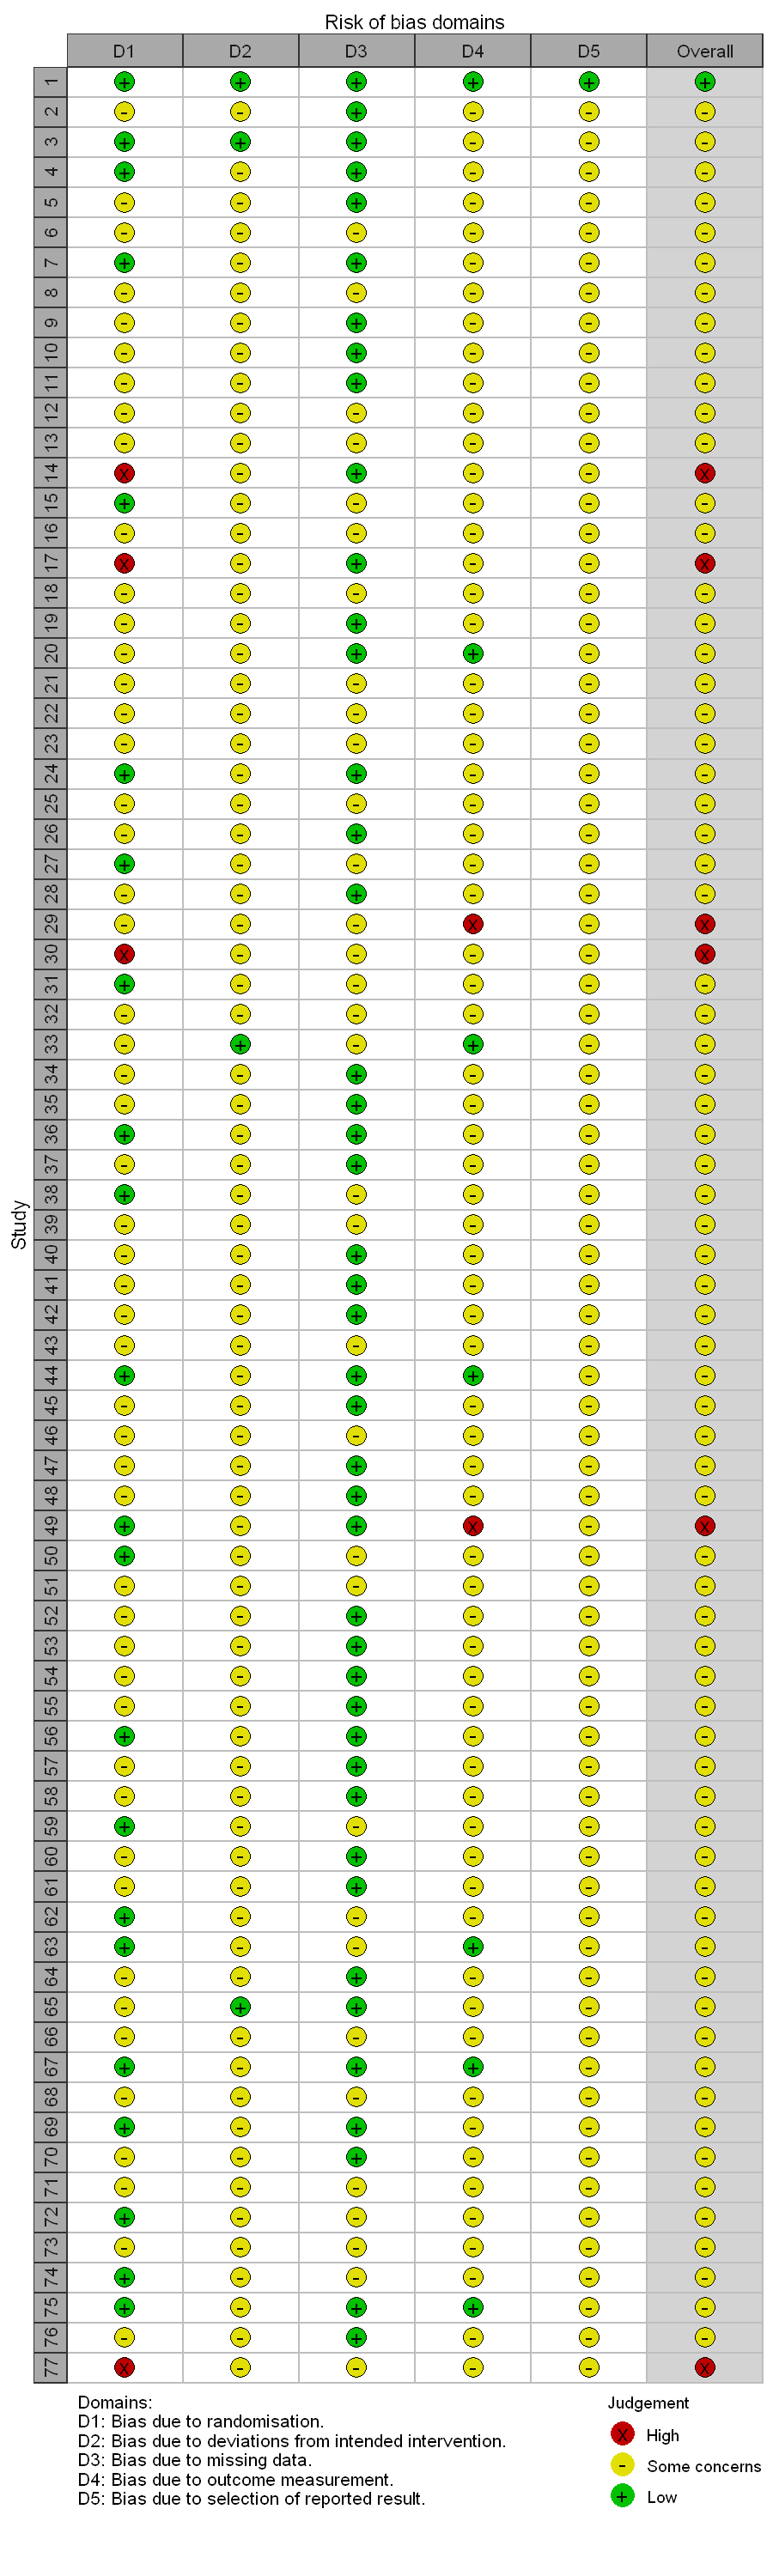

In [406]:
rob_traffic_light(
  data = rob.df,
  tool = "ROB2",
  psize = 5
)

In [407]:
# outcomes with high RoB
outcome.names.df[studies.high.rob,]

Name.of.Outcome.1   Name.of.Outcome.2 Name.of.Outcome.3
Dillbeck 1977        Anxiety (trait)     NA                NA               
Flett 2019a          Depression (state)  Anxiety (state)   Stress           
Janowiak 1994        Stress              Other:            Other:           
Johnson-Waddell 2018 Mindfulness (trait) Other:            Other:           
Philips 2019         Stress              NA                NA               
Zeidan 2010          Depression (state)  Anxiety (state)   NA               
                     Name.of.Outcome.4   Name.of.Outcome.5
Dillbeck 1977        NA                  NA               
Flett 2019a          Mindfulness (trait) Resilience Scale 
Janowiak 1994        NA                  NA               
Johnson-Waddell 2018 Other:              Other:           
Philips 2019         NA                  NA               
Zeidan 2010          NA                  NA               
                     Name.of.Outcome.6             Name.of.Outcome.7
Dillbeck 1977        NA                            NA               
Flett 2019a          Well-being or quality of life NA               
Janowiak 1994        NA                            NA               
Johnson-Waddell 2018 Other:                        Other:           
Philips 2019         NA                            NA               
Zeidan 2010          NA                            NA

In [408]:
# get study labels per outcome in which high rob studies could be present within the analyses
study.names.stress <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
  split.subgroups = F, print.forest.sub.single = F, subgroup.method = "fixed", print.meta.results = F,
  return.data = "results.meta" # ,
  # filter.forest..funnel.vec = - outlier.list[["Stress"]]
)$studlab

study.names.mindf.t <- print.meta.results(
  "Mindfulness (trait)",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
  split.subgroups = F, print.forest.sub.single = F, subgroup.method = "fixed", print.meta.results = F,
  return.data = "results.meta" # ,
  # filter.forest..funnel.vec = - outlier.list[["Stress"]]
)$studlab

study.names.stress; study.names.mindf.t

ERROR: Error in print.meta.results("Stress", preferred.scale = "DASS", regression = F, : unused argument (subgroup.method = "fixed")


In [ ]:
# check if high rob studies are included in calculations
"Janowiak 1994" %in% study.names.stress
"Johnson-Waddell 2018" %in% study.names.mindf.t

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 3, repr.plot.res = 100)

In [ ]:
# print numbers and study labels
i <- 1
for (label in rownames(rob.df)){
  cat(i, " = ", label, ", ", sep = "")
  i <- i + 1
}

In [ ]:
rob_summary(
  data = rob.df,
  tool = "ROB2",
  overall = T,
  weighted = F
)

# Generate List of all used Packages and versions

In [ ]:
session <-sessionInfo()

In [ ]:
session

In [ ]:
session$R.version$version.string

In [ ]:
packages.loaded <- names(session$otherPkgs)
versions <- c()
i <- 1
for (pkg in packages.loaded){
  versions[i] <- session$otherPkgs[[pkg]]$Version
  i <- i + 1
}
version.df <- data.frame(
  Package = c(packages.loaded),
  Version = c(versions)
) |> arrange(Package)

write.csv(t(version.df), "lib.versions.csvcsv")
version.df

# Meta-Analysis Plots

In [ ]:
# set plot size
# options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 200)

# unversal functions
# forest etc.
# print.meta.results(
#   "Stress", preferred.scale = "DASS",
#   regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
#   split.subgroups = F, print.forest.sub.single = F, subgroup.method = "fixed", print.meta.results = F,
#   return.data = "results.meta" # ,
#   # filter.forest..funnel.vec = - outlier.list[["Stress"]]
# )

# regression etc.
# print.meta.results(
#   "Stress", preferred.scale = "DASS",
#   basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.influence = T, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#   regression.label = T, return.data = "regression.results.linear"  # ,
#   # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]])}
# )

In [ ]:
names(session$loadedOnly)

## Plots

In [ ]:
# set plot size
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 200)

### Extra moderator analysis for female percent

In [ ]:
t.regression.df <- meta.analyze(
  "Stress", meditation.type.all, m.data.list, preferred.scale = "DASS",
  split.subgroups = FALSE, return.data = "regression.all"
)
get.cor.matrix(t.regression.df)

In [ ]:
print.meta.results(
  print.qq.norm = T,
  "Stress", preferred.scale = "DASS",
  basic = F, moderator.vec = c("female.percent"), print.regplot = T, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
  regression.label = T, return.data = "regression.results.linear"# ,
  # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]])}
)

### Resilience Scale

In [ ]:
print.meta.results("Resilience Scale")

### Mental Health-related Outcomes

#### Anxiety

In [ ]:
print.meta.results("Anxiety (state)")

In [ ]:
results.metafor.anxiety.t <- print.meta.results("Anxiety (trait)", return.data = "results.metafor", regression = T, regression.multiple = F)

In [ ]:
print.meta.results("Anxiety (trait)", filter.forest..funnel.vec = -c(6), regression = F, split.subgroups = F, print.influence = F)

In [ ]:
for (outlier in c(6)){
  sav <- gosh(results.metafor.anxiety.t)
  plot(sav, out = outlier)
}

#### Depression

In [ ]:
results.metafor.depression.t <- print.meta.results("Depression (trait)", return.data = "results.metafor")

In [ ]:
print.meta.results("Depression (trait)", filter.forest..funnel.vec = -c(1, 2, 7), regression = F, split.subgroups = F, print.influence = F)

In [ ]:
for (outlier in c(1, 2, 7)){
  sav <- gosh(results.metafor.depression.t)
  plot(sav, out = outlier)
}

#### Stress

##### DASS as preferred scale

In [ ]:
results.metafor.stress.dass <- print.meta.results("Stress", preferred.scale = "DASS", return.data = "results.metafor")

In [ ]:
results.meta.stress.dass <- print.meta.results(
    "Stress", preferred.scale = "DASS",
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.meta"
)
results.meta.stress.dass$k
results.meta.stress.dass$n.e.pooled
results.meta.stress.dass$n.c.pooled
results.meta.stress.dass$n.e.pooled + results.meta.stress.dass$n.c.pooled

###### Sensitivity Analysis

In [ ]:
# exclude high RoB studies
print.meta.results("Stress", preferred.scale = "DASS", exclude.high.rob.vec = studies.high.rob)  # is same for PSS

In [ ]:
# without outliers of Stress (DASS) + gosh plots (for regression)
print.meta.results(
  "Stress", preferred.scale = "DASS", basic = T, filter.forest..funnel.vec = -c(1, 12, 14),
  filter.regression.linear.list = list(-c(10), -c(11), -c(1), -c(1, 12, 14), "", ""),
  filter.regression.poly.list = list(-c(1, 10), -c(11), -c(1), -c(1, 12, 14), "", ""),
  regression = T, split.subgroups = T, print.influence = F, print.baujat.regression = F, print.gosh.regression = F
)

# order of regression filter
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6

In [ ]:
# without outliers of Stress (DASS) + gosh plots (for regression)   ###### copy for flag.x.s.r = 1 #####
print.meta.results(
  "Stress", preferred.scale = "DASS", basic = F, filter.forest..funnel.vec = -c(1, 12, 14),
  filter.regression.linear.list = list(c(""), -c(10), -c(1), -c(1, 11, 13), "", ""),
  filter.regression.poly.list = list(c(""), -c(10), -c(1), -c(11, 13), "", ""),
  regression = T, split.subgroups = F, print.influence = F, print.baujat.regression = F, print.gosh.regression = T
)

# order of regression filter
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6

In [ ]:
results.metafor.stress.dass <- print.meta.results(
    "Stress", preferred.scale = "DASS",
    regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.metafor"
)

In [ ]:
# gosh analysis by dmetar
res.gosh <- gosh(results.metafor.stress.dass)
res.gosh.diag <- gosh.diagnostics(
  res.gosh,
  km.params = list(centers = 2),
  db.params = list(
    eps = 0.08,
    MinPts = 50)
)
res.gosh.diag

In [ ]:
plot(res.gosh)

In [ ]:
res.gosh.diag.default <- gosh.diagnostics(res.gosh)

In [ ]:
res.gosh.diag.default

In [ ]:
plot(res.gosh.diag.default)

In [ ]:
plot(res.gosh.diag)

In [ ]:
sav <- gosh(results.metafor.stress.dass)
plot(sav, out = 1)

In [ ]:
sav <- gosh(results.metafor.stress.dass)
plot(sav, out = 12)

In [ ]:
sav <- gosh(results.metafor.stress.dass)
plot(sav, out = 14)

In [ ]:
# # gosh plots for forest plots
# for (outlier in c(1, 12, 14)){
#   sav <- gosh(results.metafor.stress.dass)
#   plot(sav, out = outlier)
# }

In [ ]:
# gosh plots for regression (only for programs duration as one wasnt printed above)
print.meta.results(
  "Stress", preferred.scale = "DASS",
  filter.regression.linear.list = list("", "", -c(1), "", "", ""),
  filter.regression.poly.list = list("", "", -c(1), "", "", ""),
  basic = F, regression = T, print.baujat.regression = F,
  print.regplot = F, print.regression.results = F,
  print.gosh.regression = T
)

In [ ]:
# multiple regressions without interaction
options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 100)
print.meta.results(
  outcome = "Stress", preferred.scale = "DASS", basic = F, regression = F, regression.multiple = T, regression.multiple.degree.2 = F,
  moderator.multiple.list = list(
    c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
    c("sessions.duration", "programs.duration"), c("sessions.duration", "sessions.frequency"),
    c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration"),
    c("sessions.frequency", "programs.duration", "sessions.duration")
  )
)
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

In [ ]:
# multiple regressions without interaction (without outliers)

options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 100)

print.meta.results(
  outcome = "Stress", preferred.scale = "DASS", basic = F, regression = F, regression.multiple = T, regression.multiple.degree.2 = F,
  print.gosh.regression = F, print.baujat.regression = F,
  moderator.multiple.list = list(
                                                  c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
    c("sessions.duration", "programs.duration"),                                               c("sessions.duration", "sessions.frequency"),
    c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration"),
    c("sessions.frequency", "programs.duration", "sessions.duration")
    
  ),
  filter.multiple.regression.linear.list = list(
                -c(1),   -c(10, 7),
    -c(1),               -c(9),
    -c(10, 7), -c(9),
    -c(5)
  )
)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

In [ ]:
# multiple regressions without interaction (without outliers)  ##### copy for without mean ranges #####

options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 100)

print.meta.results(
  outcome = "Stress", preferred.scale = "DASS", basic = F, regression = F, regression.multiple = T, regression.multiple.degree.2 = F,
  print.gosh.regression = T, print.baujat.regression = F,
  moderator.multiple.list = list(
                                                  c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
    c("sessions.duration", "programs.duration"),                                               c("sessions.duration", "sessions.frequency"),
    c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration"),
    c("sessions.frequency", "programs.duration", "sessions.duration")
    
  ),
  filter.multiple.regression.linear.list = list(
              -c(1, 7), "",
    -c(1, 7),            -c(1,7),
    "",       -c(1,7),
    ""
  )
)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

In [ ]:
# print gosh plot separately, as it came to an error within do.multiple.regression()
moderator.multiple.list = list(
                                                c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
  c("sessions.duration", "programs.duration"),                                               c("sessions.duration", "sessions.frequency"),
  c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration")
)

filter.multiple.regression.linear.list = list(
              -c(1),   -c(10, 7),
  -c(1),               -c(9),
  -c(10, 7), -c(9)
)

mod.comb.no <- 1
for (moderator.combination in moderator.multiple.list){
    
  regression.df <- meta.analyze(
    "Stress", meditation.type.all, m.data.list, preferred.scale = "DASS",
    split.subgroups = FALSE, return.data = "regression.all"
  )

  # cut out data after post-test (that have follow.up.period > 0) if follow.up.period is not in moderator.combination
  if (!"follow.up.period" %in% moderator.combination){
    regression.df <- regression.df[
      which(regression.df[,"follow.up.period"] == 0),
    ]
  }

  # eliminate NAs
  regression.df <- regression.df %>%
    filter(!(
      is.na(!!sym(moderator.combination[1])) |
      !!sym(moderator.combination[1]) %in% c("NA", nm.placeholder, as.character(nm.placeholder)) |
      is.na(!!sym(moderator.combination[2])) |
      !!sym(moderator.combination[2]) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
  ))
  
  if (
    is.list(filter.multiple.regression.linear.list) &
    if(is.list(filter.multiple.regression.linear.list)){filter.multiple.regression.linear.list[[mod.comb.no]][1] != ""}else{FALSE}
  ){

    for (outlier in -filter.multiple.regression.linear.list[[mod.comb.no]]){

      results.regression.linear.unfiltered <- get.results.metafor(
        regression.df, moderator = moderator.combination
      )

      cat("\n Gosh plot for", paste(moderator.combination, sep = ", "), "(outlier number:", outlier, "linear)")
      sav <- gosh(results.regression.linear.unfiltered, subsets = 15000)
      plot(sav, out = outlier)
    }
  } else {
    cat("\nno Gosh plot printed for", moderator.combination, "(linear)\n")
  }
  mod.comb.no <- mod.comb.no+1
}

In [ ]:
# multiple regression with interaction (no outliers detected)

options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 100)

print.meta.results(
  outcome = "Stress", preferred.scale = "DASS", basic = F, regression = F, regression.multiple = T, regression.multiple.degree.2 = F,
  non.interaction = F, interaction = T,
  moderator.multiple.list = list(
    c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
    c("sessions.duration", "programs.duration"), c("sessions.duration", "sessions.frequency"),
    c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration"),
    c("sessions.frequency", "programs.duration", "sessions.duration")
  )
)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6

##### PSS as preferred scale

In [ ]:
results.metafor.stress.pss <- print.meta.results("Stress", preferred.scale = "PSS", return.data = "results.metafor")

In [ ]:
# without outliers of Stress (PSS) + gosh plots (for regression)
print.meta.results(
  "Stress", preferred.scale = "PSS", basic = F, filter.forest..funnel.vec = -c(1, 12, 14),
  filter.regression.linear.list = list(-c(1, 10), -c(11), -c(1), -c(1, 12, 14), "", ""),
  filter.regression.poly.list = list(-c(1, 10), -c(11), -c(1), -c(1, 12, 14), "", ""),
  regression = T, split.subgroups = F, print.influence = F, print.baujat.regression = F, print.gosh.regression = T
)

# order of regression filter
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6

In [ ]:
# without outliers of Stress (PSS) + gosh plots (for regression)  ###### copy for flag.x.s.r = 1 #####
print.meta.results(
  "Stress", preferred.scale = "PSS", basic = F, filter.forest..funnel.vec = -c(1, 12, 14),
  filter.regression.linear.list = list("", -c(10), -c(1), -c(1, 11, 13), "", ""),
  filter.regression.poly.list = list("", -c(10), -c(1), -c(1, 11, 13), "", ""),
  regression = T, split.subgroups = F, print.influence = F, print.baujat.regression = F, print.gosh.regression = T
)

# order of regression filter
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6

In [ ]:
for (outlier in c(1, 12, 14)){
  sav <- gosh(results.metafor.stress.pss)
  plot(sav, out = outlier)
}

In [ ]:
# multiple regressions without interaction
print.meta.results(
  outcome = "Stress", preferred.scale = "PSS", basic = F, regression = F, regression.multiple = T, regression.multiple.degree.2 = F,
  moderator.multiple.list = list(
    c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
    c("sessions.duration", "programs.duration"), c("sessions.duration", "sessions.frequency"),
    c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration"),
    c("sessions.frequency", "programs.duration", "sessions.duration")
  )
)
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6

In [ ]:
# multiple regressions without interaction (without outliers)

options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 100)

print.meta.results(
  outcome = "Stress", preferred.scale = "PSS", basic = F, regression = F, regression.multiple = T, regression.multiple.degree.2 = F,
  print.gosh.regression = F, print.baujat.regression = F,
  moderator.multiple.list = list(
                                                  c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
    c("sessions.duration", "programs.duration"),                                               c("sessions.duration", "sessions.frequency"),
    c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration"),
    c("sessions.frequency", "programs.duration", "sessions.duration")
    
  ),
  filter.multiple.regression.linear.list = list(
                -c(1),   -c(10, 7),
    -c(1),               -c(9),
    -c(10, 7), -c(9),
    -c(5, 8)
  )
)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

In [ ]:
# print gosh plot separately, as it came to an error within do.multiple.regression()
moderator.multiple.list = list(
                                                c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
  c("sessions.duration", "programs.duration"),                                               c("sessions.duration", "sessions.frequency"),
  c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration")
)

filter.multiple.regression.linear.list = list(
              -c(1),   -c(10, 7),
  -c(1),               -c(9),
  -c(10, 7), -c(9)
)

mod.comb.no <- 1
for (moderator.combination in moderator.multiple.list){
    
  regression.df <- meta.analyze(
    "Stress", meditation.type.all, m.data.list, preferred.scale = "PSS",
    split.subgroups = FALSE, return.data = "regression.all"
  )

  # cut out data after post-test (that have follow.up.period > 0) if follow.up.period is not in moderator.combination
  if (!"follow.up.period" %in% moderator.combination){
    regression.df <- regression.df[
      which(regression.df[,"follow.up.period"] == 0),
    ]
  }

  # eliminate NAs
  regression.df <- regression.df %>%
    filter(!(
      is.na(!!sym(moderator.combination[1])) |
      !!sym(moderator.combination[1]) %in% c("NA", nm.placeholder, as.character(nm.placeholder)) |
      is.na(!!sym(moderator.combination[2])) |
      !!sym(moderator.combination[2]) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
  ))
  
  if (
    is.list(filter.multiple.regression.linear.list) &
    if(is.list(filter.multiple.regression.linear.list)){filter.multiple.regression.linear.list[[mod.comb.no]][1] != ""}else{FALSE}
  ){

    for (outlier in -filter.multiple.regression.linear.list[[mod.comb.no]]){

      results.regression.linear.unfiltered <- get.results.metafor(
        regression.df, moderator = moderator.combination
      )

      cat("\n Gosh plot for", paste(moderator.combination, sep = ", "), "(outlier number:", outlier, "linear)")
      sav <- gosh(results.regression.linear.unfiltered, subsets = 15000)
      plot(sav, out = outlier)
    }
  } else {
    cat("\nno Gosh plot printed for", moderator.combination, "(linear)\n")
  }
  mod.comb.no <- mod.comb.no+1
}

In [ ]:
# multiple regression with interaction (no outliers detected)

options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 100)

print.meta.results(
  outcome = "Stress", preferred.scale = "PSS", basic = F, regression = F, regression.multiple = T, regression.multiple.degree.2 = F,
  non.interaction = F, interaction = T,
  moderator.multiple.list = list(
    c("programs.duration", "sessions.duration"), c("programs.duration", "sessions.frequency"),
    c("sessions.duration", "programs.duration"), c("sessions.duration", "sessions.frequency"),
    c("sessions.frequency", "programs.duration"), c("sessions.frequency", "sessions.duration"),
    c("sessions.frequency", "programs.duration", "sessions.duration")
  )
)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)
# "sessions.duration":1, "sessions.frequency":2, "programs.duration":3, "follow.up.period":4, "delivery.mode":5, "meditation.type":6

#### Well-Being

In [ ]:
results.metafor.well.being <- print.meta.results("Well-being or quality of life", return.data = "results.metafor")

In [ ]:
print.meta.results("Well-being or quality of life", filter.forest..funnel.vec = -c(1), regression = F, split.subgroups = F, print.influence = F)

In [ ]:
for (outlier in c(1)){
  sav <- gosh(results.metafor.well.being)
  plot(sav, out = outlier)
}

### Resilience Factors

In [ ]:
print.meta.results("Acceptance")

In [ ]:
print.meta.results("Active coping")

In [ ]:
print.meta.results("Empathy")

In [ ]:
print.meta.results("Hope")

In [ ]:
print.meta.results("Mindfulness (state)")

In [ ]:
results.metfor.mindfulness.t <- print.meta.results("Mindfulness (trait)", return.data = "results.metafor")

In [ ]:
results.metfor.mindfulness.t.ex.rob <- print.meta.results("Mindfulness (trait)", exclude.high.rob.vec = studies.high.rob, return.data = "results.metafor")  # exclude Johnson-Waddell 2018 (No. 3)

In [ ]:
# exclude outlier
print.meta.results("Mindfulness (trait)", filter.forest..funnel.vec = -c(9), regression = F, split.subgroups = F, print.influence = F)

In [ ]:
for (outlier in c(9)){
  sav <- gosh(results.metfor.mindfulness.t)
  plot(sav, out = outlier)
}

In [ ]:
# exclude both
print.meta.results("Mindfulness (trait)", filter.forest..funnel.vec = -c(3, 9))

In [ ]:
for (outlier in c(8)){
  sav <- gosh(results.metfor.mindfulness.t.ex.rob)
  plot(sav, out = outlier)
}

In [ ]:
print.meta.results("Optimism or positive attributional style")

In [ ]:
print.meta.results("Positive emotion")

In [ ]:
print.meta.results("Religiosity or spirituality or religious coping")

In [ ]:
print.meta.results("Self-acceptance")

In [ ]:
print.meta.results("Self-compassion")

In [ ]:
print.meta.results("Self-efficacy")

In [ ]:
print.meta.results("Self-esteem")

### All Outcomes (Summary)

In [ ]:
# set plot size
options(repr.plot.width = 25, repr.plot.height = 9, repr.plot.res = 120)

In [ ]:
plot.summary.forest(with.outliers = F)
plot.summary.forest(with.outliers = T)

# Old Code

## Sensititvity Analyis

In [ ]:
# old code of get.sens.anal.df() (location after line 'sens.anal.df <- cbind(choices.df, sens.anal.df)''):
#       restuls.meta.n.o. <- print.meta.results(
#         outcome = outcome, preferred.scale = preferred.scale,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         return.data = "results.meta",
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )

#       restuls.metafor.rand.o. <- print.meta.results(
#         outcome = outcome, preferred.scale = preferred.scale,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         return.data = "results.metafor"
#       )

#       restuls.metafor.rand.n.o. <- print.meta.results(
#         outcome = outcome, preferred.scale = preferred.scale,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         return.data = "results.metafor",
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )

#       restuls.metafor.fix.o. <- print.meta.results(
#         outcome = outcome, preferred.scale = preferred.scale,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         return.data = "results.metafor", results.metafor.fixed = T
#       )

#       restuls.metafor.fix.n.o. <- print.meta.results(
#         outcome = outcome, preferred.scale = preferred.scale,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         return.data = "results.metafor", results.metafor.fixed = T,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
      
#       # create sensitivity analysis data frame
#       sens.anal.df <- as.data.frame(t(data.frame(
#         get.sens.anal.vec(restuls.meta.o., model)[["random"]],
#         get.sens.anal.vec(restuls.meta.n.o., model)[["common"]],
#         get.sens.anal.vec(restuls.meta.o., model)[["random"]],
#         get.sens.anal.vec(restuls.meta.n.o., model)[["common"]],
#         get.sens.anal.vec(restuls.metafor.rand.o., model),
#         get.sens.anal.vec(restuls.metafor.rand.n.o., model),
#         get.sens.anal.vec(restuls.metafor.fix.o., model),
#         get.sens.anal.vec(restuls.metafor.fix.n.o., model)
#       )))
      
#       rownames(sens.anal.df) <- NULL
      
#       ## add rownames column
#       choices.vec <- c(
#         "Outliers and influential cases included (meta; random-effets)",
#         "Outliers and influential cases excluded (meta; random-effets)",
#         "Outliers and influential cases included (meta; fixed-effets)",
#         "Outliers and influential cases excluded (meta; fixed-effets)",
#         "Outliers and influential cases included (metafor; random-effets)",
#         "Outliers and influential cases excluded (metafor; random-effets)",
#         "Outliers and influential cases included (metafor; fixed-effets)",
#         "Outliers and influential cases excluded (metafor; fixed-effets)"
#       )
      
#       sens.anal.df <- sens.anal.df %>% mutate(Choices = choices.vec) %>% relocate(Choices)

In [ ]:
# without possibility to investigate subgroup = "random"
get.sens.anal.vec <- function(res, model, model.meta = NULL, subgroup.method = NULL, sub.model.metafor.fixed = F, model.metafor.fixed = F){ 
  
  if ("rma.uni" %in%  class(res)){  # for {metafor} results
    n.cont <- sum(res$data[, "n.control"])
    n.int <- sum(res$data[, "n.int"])
    n.total <- n.cont + n.int
    pval.Q <- res$QEp
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    pval <- res$pval
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    
    if (model == "rand.fix"){
      
      if (model.metafor.fixed){
        het.metrics <- c(rep(NA, 9)[1:9])
        pred.inter.lb <- NA
        pred.inter.ub <- NA
      } else {
        het.metrics <- c(res$tau2, NA, NA, res$se.tau2, res$I2, NA, NA, res$QE, pval.Q)
        pred.inter.lb <- predict(res)$pi.lb
        pred.inter.ub <- predict(res)$pi.ub
      }

      sens.anal <- c(
        res$k, n.total, n.int, n.cont, res$b[1,1], res$ci.lb, res$ci.ub,
        pred.inter.lb, pred.inter.ub, res$se, res$zval, pval, het.metrics
      )
    } else if (model == "mixed"){
      Q.val.omnibus.test.moderators <- res$QM
      p.val.omnibus.test.moderators <- res$QMp
      is.categorical.mod <- grepl("delivery.mode", names(res$b[2,1])) | grepl("meditation.type", names(res$b[2,1]))
        # is true if moderator is delivery.mode or meditation.type

      # add number of studies per subgroup to results object if moderator is categorical
      if (is.categorical.mod){
        res$k.w <- c(0)
        for (lvl in 2:length(res$b)){  # length(res$b) = number of model coefficients
          res$k.w[lvl] <- sum(res$X[,lvl])
        }
        res$k.w[1] <- res$k - sum(res$k.w)
      } else {
        res$k.w <- NULL
      }
      
      # generate vector with model results
      mod.vals <- c()
      for (lvl in 1:length(res$b)){
        mod.vals <- append(
          mod.vals,
          as.double(c(
            res$b[lvl,1], res$ci.lb[lvl], res$ci.ub[lvl], res$se[lvl], res$zval[lvl], pval[lvl],
            if(!is.categorical.mod & length(res$b) == 2 & lvl == 2){rep(NA, 6)[1:6]}else{NULL}  # generate NAs for 2nd moderator coefficient of linear regressions of continous moderators
          ))
        )
      }
      
      # get heterogeneity metrics
      if (sub.model.metafor.fixed){
        het.metrics <- c(rep(NA, 5)[1:5])
      } else {
        het.metrics <- c(res$tau2, res$se.tau2, res$I2, res$QE, pval.Q)
      }
        
      sens.anal <- c(
        res$k, res$k.w, n.total, n.int, n.cont,
        mod.vals, res$R2, het.metrics, Q.val.omnibus.test.moderators, p.val.omnibus.test.moderators
      )
      
    } else {
      print("error in get.sens.anal.vec(): set parameter 'model' to 'rand.fix' or 'mixed' when using {metafor} results")
    }
    
  } else if ("metacont" %in%  class(res) | "metagen" %in%  class(res)){  # for {meta} resutls
    
    n.cont <- sum(res$n.c)
    n.int <- sum(res$n.e)
    n.total <- n.cont + n.int
    pval <- res$pval.random
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    pred.inter.lb <- res$lower.predict
    pred.inter.ub <- res$upper.predict
    
    
    
    if (model == "rand.fix"){
      if (model.meta == "random"){
        sens.anal <- c(
          res$k, n.total, n.int, n.cont, res$TE.random, res$lower.random, res$upper.random, pred.inter.lb, pred.inter.ub,
          res$seTE.random, res$zval.random, pval,
          res$tau2, res$lower.tau2, res$upper.tau2, NA,
          res$I2 * 100, res$lower.I2 * 100, res$upper.I2 * 100,
          res$Q, res$pval.Q
        )
      } else if (model.meta == "common"){
        sens.anal <- c(
          res$k, n.total, n.int, n.cont, res$TE.common, res$lower.common, res$upper.common, pred.inter.lb, pred.inter.ub,
          res$seTE.common, res$zval.common, pval,
          NA, NA, NA, NA,
          NA, NA, NA,
          NA, NA
        )
      } else {
        print("error in get.sens.anal.vec(): set parameter 'model.meta' to 'common' or 'random' if {meta} results are passed")
      }
    } else if (model == "mixed"){
      print("error in get.sens.anal.vec(): there is no regression calculated by {meta} on its own (only a wrapper function working with {metafor}). Set parameter 'model' to 'rand.fix' or 'subgroup' instead.")
    } else if (model == "subgroup"){
      
      # get number of studies per subgroup, treatment effect, and within group/between study heterogeneity metrics from result object (res)
      k.w <- c()
      TE.metrics <- c()
      het.metrics.w <- c()
      for (i in 1:length(res$k.w)){  # iterate over number of subgroup levls
        k.w[i] <- res$k.w[i]

        if (subgroup.method == "fixed"){
          TE.metrics <- append(TE.metrics, c(res$TE.common.w[i], res$lower.common.w[i], res$upper.common.w[i], res$seTE.common.w[i], res$zval.common.w[i]))
          het.metrics.w <- append(het.metrics.w, c(rep(NA, 8)[1:8]))
        } else {
          TE.metrics <- append(TE.metrics, c(res$TE.random.w[i], res$lower.random.w[i], res$upper.random.w[i], res$seTE.random.w[i], res$zval.random.w[i]))

          if ((subgroup.method == "random.common.tau2" & i == 1) | subgroup.method == "random.separate.tau2"){
            Q.stats.within <- if(subgroup.method == "random.common.tau2"){c(res$Q, res$pval.Q)}else{c(res$Q.w[i], res$pval.Q.w[i])}
            tau2.metrics.within <- if(subgroup.method == "random.common.tau2"){c(res$tau2.w[i], NA, NA)}else{c(res$tau2.w[i], res$lower.tau2.w[i], res$upper.tau2.w[i])}
             # tau2 confidence intervals of subgroups seem to be not reported  by {meta} result object for subgroup.method = "random.common.tau2"
            het.metrics.w <- append(
              het.metrics.w,
              c(
                tau2.metrics.within,
                res$I2.w[i] * 100, res$lower.I2.w[i] * 100, res$upper.I2.w[i] * 100,
                Q.stats.within
              )
            )
          } else {
            het.metrics.w <- append(het.metrics.w, c(rep(NA, 8)[1:8]))
          }
        }
      }
      
      # get between group Q-statistics
      if (subgroup.method == "fixed"){
        Q.stats.between <- c(res$Q.b.common, res$pval.Q.b.common)
      } else if (subgroup.method == "random.separate.tau2"){
        Q.stats.between <- c(res$Q, res$pval.Q)
      } else if (subgroup.method == "random.common.tau2"){
        Q.stats.between <- c(res$Q.b.random, res$pval.Q.b.random)
      }
      sens.anal <- as.double(c(
        res$k, k.w, n.total, n.int, n.cont,
        TE.metrics, het.metrics.w, Q.stats.between
      ))

    } else {
      print("error in get.sens.anal.vec(): set parameter 'model' to 'rand.fix' or 'subgroup' when using {meta} results")
    }
  } else {
    cat("error in get.sens.anal.vec(): unknown input object of class:", class(res))
  }
  return(sens.anal)
}

In [ ]:
get.sens.anal.vec <- function(res, model, model.meta = NULL, subgroup.method = NULL){ 
  
  if ("rma.uni" %in%  class(res)){  # for {metafor} results
    n.cont <- sum(res$data[, "n.control"])
    n.int <- sum(res$data[, "n.int"])
    n.total <- n.cont + n.int
    pval.Q <- res$QEp
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    pval <- res$pval
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    
    if (model == "rand.fix"){

      sens.anal <- c(
        res$k, n.total, n.int, n.cont, res$b[1,1], res$ci.lb, res$ci.ub,
        res$se, res$zval, pval, res$tau2, NA, NA, res$se.tau2,
        res$I2, NA, NA, res$QE, pval.Q
      )
    } else if (model == "mixed"){
      p.val.omnibus.test.moderators <- res$QM
      
      if (nrow(res$b) == 2){  # linear model --> 2 model coefficients; or subgroup analysis with 2 groups
        is.categorical.mod <- grepl("delivery.mode", names(res$b[2,1])) | grepl("meditation.type", names(res$b[2,1]))
          # is true if moderator is delivery.mode or meditation.type
        
        sens.anal <- c(
          res$k, n.total, n.int, n.cont,
          res$b["intrcpt",1], res$ci.lb[1], res$ci.ub[1], res$se[1], res$zval[1], pval[1],
          res$b[2,1], res$ci.lb[2], res$ci.ub[2], res$se[2], res$zval[2], pval[2],
          rep(if(is.categorical.mod){NULL}else{NA}, 6)[1:6],  # if is.categorical.mod, without NAs for 2nd moderator coefficient
          res$R2, res$tau2, res$se.tau2,
          res$I2, res$QE, pval.Q, p.val.omnibus.test.moderators
        )
      } else if (nrow(res$b) == 3){  # squaerd model --> 3 model coefficients; or subgroup analysis with 3 groups
        sens.anal <- c(
          res$k, n.total, n.int, n.cont,
          res$b["intrcpt",1], res$ci.lb[1], res$ci.ub[1], res$se[1], res$zval[1], pval[1],
          res$b[2,1], res$ci.lb[2], res$ci.ub[2], res$se[2], res$zval[2], pval[2],
          res$b[3,1], res$ci.lb[3], res$ci.ub[3], res$se[3], res$zval[3], pval[3],
          res$R2, res$tau2, res$se.tau2,
          res$I2, res$QE, pval.Q, p.val.omnibus.test.moderators
        )
      } else {
        cat("error in get.sens.anal.vec(): function only works with 2 or 3 model coefficients for mixed-effects models, got", nrow(res$b), "instead")
      }
    } else {
      print("error in get.sens.anal.vec(): set parameter 'model' to 'rand.fix' or 'mixed' when using {metafor} results")
    }
    
  } else if ("metacont" %in%  class(res) | "metagen" %in%  class(res)){  # for {meta} resutls
    
    n.cont <- sum(res$n.c)
    n.int <- sum(res$n.e)
    n.total <- n.cont + n.int
    pval <- res$pval.random
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    
    if (model == "rand.fix"){
      if (model.meta == "random"){
        sens.anal <- c(
          res$k, n.total, n.int, n.cont, res$TE.random, res$lower.random, res$upper.random,
          res$seTE.random, res$zval.random, pval,
          res$tau2, res$lower.tau2, res$upper.tau2, NA,
          res$I2 * 100, res$lower.I2 * 100, res$upper.I2 * 100,
          res$Q, res$pval.Q
        )
      } else if (model.meta == "common"){
        sens.anal <- c(
          res$k, n.total, n.int, n.cont, res$TE.common, res$lower.common, res$upper.common,
          res$seTE.common, res$zval.common, pval,
          NA, NA, NA, NA,
          NA, NA, NA,
          NA, NA
        )
      } else {
        print("error in get.sens.anal.vec(): set parameter 'model.meta' to 'common' or 'random' if {meta} results are passed")
      }
    } else if (model == "mixed"){
      print("error in get.sens.anal.vec(): there is no regression calculated by {meta} on its own (only a wrapper function working with {metafor}). Set parameter 'model' to 'rand.fix' or 'subgroup' instead.")
    } else if (model == "subgroup"){
      if (length(res$k.w) == 2){  # --> 2 subgroups
        if (subgroup.method == "fixed"){
          sens.anal <- as.double(c(
            res$k, res$k.w[1], res$k.w[2], n.total, n.int, n.cont,
            
            res$TE.common.w[1], res$lower.common.w[1], res$upper.common.w[1],
            res$seTE.common.w[1], res$zval.common.w[1],
            
            res$TE.common.w[2], res$lower.common.w[2], res$upper.common.w[2],
            res$seTE.common.w[2], res$zval.common.w[2],
            
            NA, NA, NA,  # tau2 values
            NA, NA, NA,  # I2 values
            NA, NA,  # hertogeneity test statistics
            
            NA, NA, NA,  # tau2 values (subgroup 2)
            NA, NA, NA,  # I2 values
            NA, NA,  # hertogeneity test statistics
            
            res$Q.b.common, res$pval.Q.b.common  # Test of between subgroup differences
          ))
          
        } else if (subgroup.method == "random.separate.tau2"){
          
          sens.anal <- as.double(c(
            res$k, res$k.w[1], res$k.w[2], n.total, n.int, n.cont,
            
            res$TE.random.w[1], res$lower.random.w[1], res$upper.random.w[1],
            res$seTE.random.w[1], res$zval.random.w[1],
            
            res$TE.random.w[2], res$lower.random.w[2], res$upper.random.w[2],
            res$seTE.random.w[2], res$zval.random.w[2],
            
            res$tau2.w[1], res$lower.tau2.w[1], res$upper.tau2.w[1],
            res$I2.w[1] * 100, res$lower.I2.w[1] * 100, res$upper.I2.w[1] * 100,
            res$Q.w[1], res$pval.Q.w[1],
            
            res$tau2.w[2], res$lower.tau2.w[2], res$upper.tau2.w[2],
            res$I2.w[2] * 100, res$lower.I2.w[2] * 100, res$upper.I2.w[2] * 100,
            res$Q.w[2], res$pval.Q.w[2],
          
            res$Q, res$pval.Q
          ))

        } else if (subgroup.method == "random.common.tau2"){
          sens.anal <- as.double(c(
            res$k, res$k.w[1], res$k.w[2], n.total, n.int, n.cont,
            
            res$TE.random.w[1], res$lower.random.w[1], res$upper.random.w[1],
            res$seTE.random.w[1], res$zval.random.w[1],
            
            res$TE.random.w[2], res$lower.random.w[2], res$upper.random.w[2],
            res$seTE.random.w[2], res$zval.random.w[2],
            
            res$tau2, res$lower.tau2, res$upper.tau2,
            res$I2 * 100, res$lower.I2 * 100, res$upper.I2 * 100,
            res$Q, res$pval.Q,
            
            NA, NA, NA,  # tau2 values (subgroup 2)
            NA, NA, NA,  # I2 values
            NA, NA,  # hertogeneity test statistics
          
            res$Q.b.random, res$pval.Q.b.random
          ))
        } else {
          print("error in get.sens.anal.vec(): set parameter 'subgroup.method' to 'fixed', 'random.separate.tau2', or 'random.common.tau2', while 'model' == 'subgroup'")
        }
      } else {
        cat("error in get.sens.anal.vec(): analysis in only implemented for 2 levels of {meta} results, got", length(res$k.w), "instead")
      }

    } else {
      print("error in get.sens.anal.vec(): set parameter 'model' to 'rand.fix' or 'subgroup' when using {meta} results")
    }
  } else {
    cat("error in get.sens.anal.vec(): unknown input object of class:", class(res))
  }
  return(sens.anal)
}

In [ ]:
get.sens.anal.vec <- function(res){
  if ("rma.uni" %in%  class(res)){  # for {metafor} results
    n.cont <- sum(res$data[, "n.control"])
    n.int <- sum(res$data[, "n.int"])
    n.total <- n.cont + n.int
    pval <- round(res$pval, 4)
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    pval.Q <- round(res$QEp, 4)
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    
    sens.anal <- c(
      res$k, n.total, n.cont, n.int, paste(round(res$b[1,1], 2), " (", round(res$ci.lb, 2), ", ", round(res$ci.ub, 2), ")", sep = ""),
      round(res$se, 2), round(res$zval, 2), pval, paste(round(res$tau2, 4), "(- , -)"), round(res$se.tau2, 4),
      paste(round(res$I2, 2), "(-, -)"), NA, round(res$QE, 2), pval.Q
    )
    
  } else if ("metacont" %in%  class(res)){  # for {meta} resutls
    
    n.cont <- sum(res$n.e)
    n.int <- sum(res$n.c)
    n.total <- n.cont + n.int
    pval <- round(res$pval.random, 4)
    # pval <- ifelse(pval == 0, "< .0001" ,pval)
    pval.Q <- round(res$pval.Q, 4)
    # pval.Q <- ifelse(pval.Q == 0, "< .0001" ,pval.Q)
    sens.anal <- list(
      random = c(
        res$k, n.total, n.cont, n.int, paste(round(res$TE.random, 2), " (", round(res$lower.random, 2), ", ", round(res$upper.random, 2), ")", sep = ""),
        round(res$seTE.random, 2), round(res$zval.random, 2), pval,
        paste(round(res$tau2, 4), " (", round(res$lower.tau2, 4), ", ", round(res$upper.tau2, 4), ")", sep = ""), NA,
        paste(round(res$I2, 2), " (", round(res$lower.I2, 2), ", ", round(res$upper.I2, 2), ")", sep = ""), NA,
        round(res$Q, 2), pval.Q
      ),
      common = c(
        res$k, n.total, n.cont, n.int, paste(round(res$TE.common, 2), " (", round(res$lower.common, 2), ", ", round(res$upper.common, 2), ")", sep = ""),
        round(res$seTE.common, 2), round(res$zval.common, 2), pval,
        paste(round(res$tau2, 4), " (", round(res$lower.tau2, 4), ", ", round(res$upper.tau2, 4), ")", sep = ""), NA,
        paste(round(res$I2, 2), " (", round(res$lower.I2, 2), ", ", round(res$upper.I2, 2), ")", sep = ""), NA,
        round(res$Q, 2), pval.Q
      )
    )
  } else {
    cat("ERROR in get.sens.anal(): unknown input object of class:", class(res))
  }
  return(sens.anal)
}

In [ ]:
# get sensitivity tables (old function)
# word only possible within Rmd file
# path <- "C:/Users/anonymous/Documents/GitHub/MA_Meta_Analyses/Sensitivity Analysis tables/"
# for (outcome in present.outcomes.sorted){
#   if (outcome == "Stress"){
#     for (preferred.scale in c("DASS", "PSS")){
#       for (file in c("png", "html", "docx")){
#         get.sens.anal.df(outcome, "rand.fix", preferred.scale, file, path)
#       }
#     }
#   } else {
#     for (file in c("png", "html", "docx")){
#       get.sens.anal.df(outcome, "rand.fix", preferred.scale = F, file, path)
#     }
#   }
# }

### Plotting Tables with gt_save | trying to integrate footnotes for every subgroup level

In [ ]:
        # get column names of SMD, CI, and PI
        cnames.SMD <- cnames[grepl("SMD", cnames)]
        cnames.CI <- cnames[grepl("CI", cnames)]
        lvl.names <- substr(restuls.meta.o.$subgroup.levels, 1, 6)
        cnames.lvl.names.vec <- c()
        for (i in 1:length(lvl.names)){
          cnames.lvl.names.vec[i] <- cnames[grepl(lvl.names[i], cnames)]
        }
        print(lvl.names)
        print(cnames.lvl.names.vec)
        footnote.sub.lvl <- function(x){  # function to loop over subgroup levels for footnote in pipe below
          for (i in 1:length(cnames.lvl.names.vec)){
            tab_footnote(
              footnote = paste(lvl.names[i], "= Test"),
              cells_column_labels(columns = cnames.lvl.names.vec[i])
            )
          }
        }     
        
        sens.anal.df.gt_tbl <- sens.anal.df |>
          gt() |>
          data_color(
            columns = colrange,
            palette = "RdYlGn",
            na_color = "gray85",
            alpha = .8
          ) |>
          tab_footnote(
            footnote = paste(
              "Meaning of digits in decision codes (same digit order): ",
              ifelse(outcome == "Stress", "preferred Scale - DASS = 1, PSS = 0; ", ""),
              ifelse(length(outliers) == 0, "", "outliers and influential cases included - yes = 1, no = 0; "),
              "subgroup method - random-effects with separate tau^2 = 1, random-effects with common tau^2 = 2, fixed = 0",
              sep = ""
            ),
            cells_column_labels(columns = "Decision Codes")
          ) |>
          tab_footnote(
            footnote = "SMD = standardized mean difference",
            cells_column_labels(columns = cnames.SMD)
          ) |>
          tab_footnote(
            footnote = "CI = confidence interval",
            cells_column_labels(columns = cnames.CI)
          ) |>
          footnote.sub.lvl()
        sens.anal.df.gt_tbl |> gtsave(
            paste(
              saving.path, "Sens.anal.table.", outcome, ".", subgroup, ".sub.",
              save.as, sep = ""
            )
          )
      }

### Subgroups

#### random separate tau2

In [ ]:
test.meta.df.list <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, print.meta.results = F, split.subgroups = F,
  return.data = "meta.df.list"
)

In [ ]:
test.meta.df.list[[1]]

In [ ]:
test.meta.sub.del.asy <- metacont(
  n.e = n.int, mean.e = mean.int, sd.e = sd.int,
  n.c = n.control, mean.c = mean.control, sd.c = sd.control,
  fixed = T, random = T, studlab = study.id,
  data = test.meta.df.list[[1]], sm = "SMD",
  subset = delivery.mode == "asynchronous guiding"
)
test.meta.sub.del.asy

In [ ]:
test.meta.sub.del.sy <- metacont(
  n.e = n.int, mean.e = mean.int, sd.e = sd.int,
  n.c = n.control, mean.c = mean.control, sd.c = sd.control,
  fixed = T, random = T, studlab = study.id,
  data = test.meta.df.list[[1]], sm = "SMD",
  subset = delivery.mode == "synchronous guiding"
)
test.meta.sub.del.sy

In [ ]:
# Subgroup treatment effects (random effect model)
test.TE.del <- c(test.meta.sub.del.asy$TE.random, test.meta.sub.del.sy$TE.random)
# Corresponding standard errors (random effect model)
test.seTE.del <- c(test.meta.sub.del.asy$seTE.random, test.meta.sub.del.sy$seTE.random)

# Do meta-analysis of subgroup estimates
test.meta.sub.del.res <- metagen(
  test.TE.del, test.seTE.del, sm="MD",
  studlab=c("asynch", "synch"),
  comb.random=FALSE
)
test.meta.sub.del.res

#### random with common tau2 

In [ ]:
# TBD S.95 in meta-analysis with r

#### different moderators

In [ ]:
test.meta.sub.del <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
  split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F,
  return.data = "results.meta"
)

In [ ]:
test.meta.sub.med <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
  split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F,
  return.data = "results.meta"
)

In [ ]:
test.meta.sub.del

In [ ]:
test.meta.sub.med

## Compare meta and metafor forest plots

In [ ]:
test <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
  return.data = "meta.df.list"
)
test[[1]]

In [ ]:
# metafor
test.results.escalc <- escalc(
  data = test[[1]], measure = "SMD",
  m1i = test[[1]][,"mean.int"], sd1i = test[[1]][,"sd.int"], n1i = test[[1]][,"n.int"],
  m2i = test[[1]][,"mean.control"], sd2i = test[[1]][,"sd.control"], n2i = test[[1]][,"n.control"],
  add=0
)
test.results.metafor <- rma.uni(
  yi, vi, measure="SMD", data = test.results.escalc # , mods = ~ delivery.mode
)
test.results.metafor

In [ ]:
print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
  return.data = "results.metafor" # ,
  # filter.forest..funnel.vec = - outlier.list[["Stress"]]
)$I2

In [ ]:
forest(test.results.metafor)

In [ ]:
test |>
  gt(rowname_col = "Choices") |>
  data_color(
    columns = 6:ncol(test),
    palette = "RdYlGn",
    na_color = "gray85",
    alpha = .8
  ) |>
  gtsave("test1.html")

In [ ]:
# meta
test.results.meta <- metacont(
  test[[1]][,"n.int"], test[[1]][,"mean.int"], test[[1]][,"sd.int"],
  test[[1]][,"n.control"], test[[1]][,"mean.control"], test[[1]][,"sd.control"],
  fixed = F, random = T, studlab = test[[1]][, "study.id"],
  data = test[[1]], sm = "SMD"
)
test.results.meta

In [ ]:
forest(test.results.meta)

In [ ]:
      forest(
        test.results.meta, # leftcols = c('studlab'),
        prediction = T, print.Q = T,
        label.left = "may improves resilience", label.right = "may reduces resilience",
        plotwidth = "5cm",
        smlab = "Standardized Mean\nDifference",
        # smlab = paste("SMD for\n", outcome, label.add),  # label to show outcome
        addrows.below.overall = 4,  # rows below SMD sclae
        colgap.forest.left = "1cm"  # left space from graph 
      )

In [ ]:
numeric(0.1)

### for specific moderators

In [ ]:
t.sens.anal.med <- get.sens.anal.df("Stress", "subgroup", subgroup = "meditation.type")
t.sens.anal.del <- get.sens.anal.df("Stress", "subgroup", subgroup = "delivery.mode")

In [ ]:
names(t.sens.anal.med)

#### Med

##### Subgroup

In [ ]:
t.selcet.med <- t.sens.anal.med |> select(c(`Decision Codes`, `SMD [Hedge\'s g] (attentional family)`, `p-value (between group)`)) # |>
  #filter(`p-value (between group)` <= 0.05)

In [ ]:
t.selcet.med

In [ ]:
max(t.sens.anal.med$`p-value (between group)`); min(t.sens.anal.med$`p-value (between group)`)

In [ ]:
max(t.sens.anal.med$`SMD [Hedge\'s g] (attentional family)`); min(t.sens.anal.med$`SMD [Hedge\'s g] (attentional family)`)

In [ ]:
max(t.sens.anal.med$`SMD CI lower threshold (attentional family)`); min(t.sens.anal.med$`SMD CI lower threshold (attentional family)`)

In [ ]:
max(t.sens.anal.med$`SMD CI upper threshold (attentional family)`); min(t.sens.anal.med$`SMD CI upper threshold (attentional family)`)

In [ ]:
max(t.sens.anal.med$`SMD [Hedge\'s g] (hybrid form)`); min(t.sens.anal.med$`SMD [Hedge\'s g] (hybrid form)`)

In [ ]:
max(t.sens.anal.med$`SMD CI lower threshold (hybrid form)`); min(t.sens.anal.med$`SMD CI lower threshold (hybrid form)`)

In [ ]:
max(t.sens.anal.med$`SMD CI upper threshold (hybrid form)`); min(t.sens.anal.med$`SMD CI upper threshold (hybrid form)`)

In [ ]:
max(t.sens.anal.med$`SMD [Hedge\'s g] (constructive family)`); min(t.sens.anal.med$`SMD [Hedge\'s g] (constructive family)`)

In [ ]:
max(t.sens.anal.med$`SMD CI lower threshold (constructive family)`); min(t.sens.anal.med$`SMD CI lower threshold (constructive family)`)

In [ ]:
max(t.sens.anal.med$`SMD CI upper threshold (constructive family)`); min(t.sens.anal.med$`SMD CI upper threshold (constructive family)`)

In [ ]:
max(t.sens.anal.med$`SMD [Hedge\'s g] (deconstructive family)`); min(t.sens.anal.med$`SMD [Hedge\'s g] (deconstructive family)`)

In [ ]:
max(t.sens.anal.med$`SMD CI lower threshold (deconstructive family)`); min(t.sens.anal.med$`SMD CI lower threshold (deconstructive family)`)

In [ ]:
max(t.sens.anal.med$`SMD CI upper threshold (deconstructive family)`); min(t.sens.anal.med$`SMD CI upper threshold (deconstructive family)`)

##### Reg

In [ ]:
t.sens.anal.med.reg <- get.sens.anal.df("Stress", "mixed", c("meditation.type"))


In [ ]:
names(t.sens.anal.med.reg)

In [ ]:
max(t.sens.anal.med.reg$`p-value for omnibus-test of moderators`); min(t.sens.anal.med.reg$`p-value for omnibus-test of moderators`)

In [ ]:
max(t.sens.anal.med.reg$`p-value (testing residual heterogeneity)`, na.rm = T); min(t.sens.anal.med.reg$`p-value (testing residual heterogeneity)`, na.rm = T)

In [ ]:
max(t.sens.anal.med.reg$`R^2 [%]`, na.rm = T); min(t.sens.anal.med.reg$`R^2 [%]`, na.rm = T)

####  Del

#####  subgroup

In [ ]:
max(t.sens.anal.del$`p-value (between group)`); min(t.sens.anal.del$`p-value (between group)`)

In [ ]:
max(t.sens.anal.del$`SMD [Hedge\'s g] (asynchronous guiding)`); min(t.sens.anal.del$`SMD [Hedge\'s g] (asynchronous guiding)`)

In [ ]:
max(t.sens.anal.del$`SMD CI lower threshold (asynchronous guiding)`); min(t.sens.anal.del$`SMD CI lower threshold (asynchronous guiding)`)

In [ ]:
max(t.sens.anal.del$`SMD CI upper threshold (asynchronous guiding)`); min(t.sens.anal.del$`SMD CI upper threshold (asynchronous guiding)`)

In [ ]:
max(t.sens.anal.del$`SMD [Hedge\'s g] (synchronous guiding)`); min(t.sens.anal.del$`SMD [Hedge\'s g] (synchronous guiding)`)

In [ ]:
max(t.sens.anal.del$`SMD CI lower threshold (synchronous guiding)`); min(t.sens.anal.del$`SMD CI lower threshold (synchronous guiding)`)

In [ ]:
max(t.sens.anal.del$`SMD CI upper threshold (synchronous guiding)`); min(t.sens.anal.del$`SMD CI upper threshold (synchronous guiding)`)

##### Reg

In [ ]:
t.sens.anal.del.reg <- get.sens.anal.df("Stress", "mixed", c("delivery.mode"))

In [ ]:
max(t.sens.anal.del.reg$`p-value for omnibus-test of moderators`); min(t.sens.anal.del.reg$`p-value for omnibus-test of moderators`)

## Investigate relationship between power and pval in arificial meta-analyses

### Function generation artificial meta-analyis

In [ ]:
numeric(0)

In [ ]:
get.test.res <- function(){
  k <- round(rnorm(1, mean = 13, sd = 3), digits = 0)
  
  nmean <- 100
  nsd <- 30

  mmean1 <- rnorm(1, mean = 73, sd = 5)
  msd1 <- 5

  smean1 <- 50
  ssd1 <- 10

  mmean2 <- rnorm(1, mean = 68, sd = 5)
  msd2 <- 3

  smean2 <- 50
  ssd2 <- 10

  n1 <- round(rnorm(k, mean = nmean, sd = nsd), digits = 0)
  mean1 <- rnorm(k, mean = mmean1, sd = msd1)
  sd1 <- rnorm(k, mean = smean1, sd = ssd1)
  n2 <- round(rnorm(k, mean = nmean, sd = nsd), digits = 0)
  mean2 <- rnorm(k, mean = mmean2, sd = msd2)
  sd2 <- rnorm(k, mean = smean2, sd = ssd2)

  
  tryCatch({
    metacont(
      n1, mean1, sd1,
      n2, mean2, sd2,
      fixed = F, random = T, studlab = 1:k,
      sm = "SMD", method.smd = "Cohen"
    )
  })
}

### Plot pval vs power for multiple meta-analyses

In [ ]:
# set plot size
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 200)

In [ ]:
?power.analysis

In [ ]:
test.pwr <- c()
test.p <- c()
sample.size <- 10000
for (i in 1:sample.size){
  test.res <- get.test.res()
  
  tryCatch(
    {
      pwr <- power.analysis(
        d = abs(test.res$TE.random),  # over all effect size (must be positive)
        k = test.res$k,  # number of included studies
        n1 = mean(test.res$n.c), n2 = mean(test.res$n.e),  # mean numbers of control and experimental goup
        heterogeneity = if(test.res$I2 <= 0.3){"low"}else if(test.res$I2 <= 0.6){"moderate"}else{"high"}
      )$Power
      test.pwr <- append(test.pwr, pwr)
      test.p <- append(test.p, test.res$pval.random)
    },
    error=function(e) NA,
    warning=function(w) NA
  )     
}

anal.df <- data.frame(
  p.val = test.p,
  power = test.pwr,
  color = ifelse(test.p > .05 & test.pwr > .5, "red", "black")
)
    
ggplot(anal.df, aes(p.val, power)) +
  geom_point(alpha = .5, col = anal.df$color) +
  geom_vline(xintercept = .05) +
  geom_hline(yintercept = .5)

## Outlier and influential analysis

### investigation of thresholds with metafor

In [ ]:
test1 <- influence(test)
test1$is.infl

In [ ]:
test <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
  return.data = "results.metafor"
)

get.influence.df(test)

In [ ]:
test.metafor.inf <- influence(print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
  return.data = "results.metafor"
))
test.metafor.inf$inf

In [ ]:
# define thresholds 
rstud.del.thresh <- qnorm(1 - (0.05 / (2 * test.metafor.inf$k))) # suggested by reporter function {metafor}
dffits.tresh <- 3 * sqrt(test.metafor.inf$p / (test.metafor.inf$k - test.metafor.inf$p)) 
hat.thresh <- 3 * (test.metafor.inf$p / test.metafor.inf$k)
dfbetas.thresh <- 1 
cook.d.thresh <- qchisq(0.5, df = test.metafor.inf$m)
cov.r.tresh <- 1

# create threshold df
threshs.df <- data.frame(matrix(
  data = c(rstud.del.thresh, dffits.tresh, dfbetas.thresh, cook.d.thresh, cov.r.tresh, NA, NA, hat.thresh, NA, NA),
  ncol = 10
))
rownames(threshs.df) <- "thresholds"
colnames(threshs.df) <- c(colnames(data.frame(print(test.metafor.inf))))
threshs.df <- threshs.df %>%
  rename(dfbetas = dfbs)
threshs.df

In [ ]:
# generate data frame of all influece metrics
inf.vals.df <- cbind(data.frame(test.metafor.inf$inf), data.frame(test.metafor.inf$dfbs)) %>%
  relocate(intrcpt, .after = dffits)%>%
  rename(dfbetas = intrcpt)

inf.vals.df <- rbind(inf.vals.df, threshs.df) %>%
  mutate(across(where(is.numeric), ~ round(., digits = 3))) %>%
  rename(is.influential = inf)
inf.vals.df

In [ ]:
plot(test.metafor.inf)

### with dmetar

In [ ]:
# find outliers with find.outliers
test.meta.results <- update.meta(
  print.meta.results(
    "Stress", preferred.scale = "DASS",
    regression = F, print.forest = T, print.funnel = F, print.influence = T, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
    return.data = "results.meta"
  ),
  prediction = TRUE
)
print(test.meta.results)
cat("\n________________________________________________\n")
test.meta.results.n.o. <- find.outliers(test.meta.results)
forest(test.meta.results.n.o.)

In [ ]:
test.meta.results.inf <- InfluenceAnalysis(test.meta.results, random = TRUE)

In [ ]:
plot(test.meta.results.inf, "baujat")

In [ ]:
plot(test.meta.results.inf, "influence")

In [ ]:
plot(test.meta.results.inf, "es")
plot(test.meta.results.inf, "i2")

### Generate influence plots from scratch with like with dmetar

In [ ]:
test.metafor.inf <- influence(print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
  return.data = "results.metafor"
))

In [ ]:
cheungviechtdata = cbind(study = substr(rownames(as.data.frame(test.metafor.inf$inf)), 1, 3), as.data.frame(test.metafor.inf$inf), is.infl = test.metafor.inf$is.infl) %>%
  add_column(as.data.frame(test.metafor.inf$dfbs), .after = "dffits") %>%
  rename(dfbetas = intrcpt)
cheungviechtdata

In [ ]:
rstudent.thresh <- qnorm(1-(0.05/(2*test.metafor.inf$k))) # suggested by reporter function {metafor}
dffits.tresh <- 3 * sqrt(test.metafor.inf$p / (test.metafor.inf$k-test.metafor.inf$p)) 
hat.thresh <- 3 * (test.metafor.inf$p / test.metafor.inf$k)
dfbetas.thresh <- 1 
cook.d.thresh <- qchisq(0.5, df=test.metafor.inf$m)

In [ ]:
test.metafor.inf$m

In [ ]:
test <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
  return.data = "results.metafor"
)

test

In [ ]:
print.meta.results(
  "Stress", preferred.scale = "DASS",
  basic = F, moderator.vec = c("programs.duration"), print.regplot = F, print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
  regression.label = T, return.data = "regression.results.linear"  # ,
  # filter.regression.linear.list = if(length(outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]]) == 0){FALSE}else{list(-outlier.list[[paste("programs.duration", ".lin", sep = "")]][["Stress"]])}
)
test

In [ ]:
influence(test)

In [ ]:
get.influence.df(test)

### investigating rma.mv influence plots

In [ ]:
# # influence metrics vor multi-variate models
# plot(cooks.distance(t.res.overall))
# plot(dfbetas(t.res.overall)$intrcpt)
# plot(hatvalues(t.res.overall))

In [ ]:
t.res.overall$dfbs

## Dashboard

In [ ]:
print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
  split.subgroups = F, print.forest.sub.single = F, subgroup.method = "fixed", print.meta.results = F,
  return.data = "results.metafor" # ,
  # filter.forest..funnel.vec = - outlier.list[["Stress"]]
)$m

### set.outcome.page

In [ ]:
# # graphical parameters stress (because shiny fails to recognize the size of subgroub forest plots)
# forest.plot.box.height.Stress <- "height: 65vh;"
#   # for 16:9 (1920 x 1080) screen = "height: 65vh;"
#   # for 3:2 (2256 x 1504) screen = "height: 99vh;"

# # Tab names per outcome page
# forest.tab.name <- "Forest & Funnel Plot (without outliers)"
# forest.no.outliers.tab.name <- "Forest & Funnel Plot comparision with/without outliers"
# regression.single.no.outliers.tab.name <- "Linear Regressions (without outliers)"
# # regression.multiple.tab.name <- "Multiple Regressions"
# # regression.multiple.no.outliers.tab.name <- "M. Regressions (w.o.)"

# # set colors
# sig.0.05.color <- "red"
# sig.0.1.color <- "yellow"

# set.outcome.page <- function(outcome, preferred.scale = FALSE){
  
# # Collect data of outcome 
#   meta.df.list <- print.meta.results(
#     outcome, preferred.scale = preferred.scale,
#     regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#     return.data = "meta.df.list"
#   )
  
# # Get p-value of Egger's regression test for funnel plot asymmetry
#   funnel.asym.p <- print.meta.results(
#     outcome, preferred.scale = preferred.scale,  meta.df.list = meta.df.list,
#     regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#     return.data = "funnel.asym.p"
#   )
#   if(length(funnel.asym.p) == 0){
#     funnel.asym.p <- 1
#   }
  
#   funnel.asym.p.n.o. <- print.meta.results(
#     outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#     regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#     return.data = "funnel.asym.p", filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) != 0){-outlier.list[[outcome]]}else{FALSE}
#   )
#   if(length(funnel.asym.p.n.o.) == 0){
#     funnel.asym.p.n.o. <- 1
#   }
  
# # Calculate all regression results
#   regression.results.list <- list(
#     linear = list(
#       programs.duration =
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#           basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["programs.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.lin"]][[outcome]])}
#         )
#       } else {NA},
#       sessions.duration =
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#           basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["sessions.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.lin"]][[outcome]])}
#         )
#       } else {NA},
#       sessions.frequency =
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#           basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["sessions.frequency.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.lin"]][[outcome]])}
#         )
#       } else {NA},
#       follow.up.period = 
#       if (
#         nrow(meta.df.list[[1]]) >= 4 &
#         (
#           nrow(meta.df.list[[2]]) >= 1 |
#           nrow(meta.df.list[[3]]) >= 1
#         )
#       ){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#           basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["follow.up.period.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.lin"]][[outcome]])}
#         )
#       } else {NA}
#     ),
    
#     squared = list(
#       programs.duration = 
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["programs.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.sq"]][[outcome]])}
#         )
#       } else {NA},
#       sessions.duration = 
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["sessions.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.sq"]][[outcome]])}
#         )
#       } else {NA},
#       sessions.frequency = 
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["sessions.frequency.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.sq"]][[outcome]])}
#         )
#       } else {NA},
#       follow.up.period = 
#       if (
#         nrow(meta.df.list[[1]]) >= 4 &
#         (
#           nrow(meta.df.list[[2]]) >= 1 |
#           nrow(meta.df.list[[3]]) >= 1
#         )
#       ){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["follow.up.period.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.sq"]][[outcome]])}
#         )
#       } else {NA}
#     )
#   )
  
# # Adjust outcome name because spaces and brackets could cause trouble later on
#   outcome.alias <- gsub("([()])", "", gsub(" ", "_", outcome))
  
# # set variables for better readability of code below
#   f.up.isnt.na <- !is.na(regression.results.list$linear$follow.up.period[1])
#     # check if there are regression results for follow-up period
  
#   k.4 <- nrow(meta.df.list[[1]]) >= 4  # check if 4 or more studies are included
  
#   tabItem(
#     tabName = paste(outcome.alias, "_page", sep = ""),
#     tabsetPanel(
#       type = "tabs",
      
# # Main Results (without outliers)
#       tabPanel(
#         forest.tab.name,
#         fluidRow(
#           box(
#             title = "Forest Plot",
#             width = 8,
#             class = "well",
#             plotOutput(paste("forest.", outcome.alias, sep = "")),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Funnel Plot (with Trim and Fill Method)",
#             background = if(funnel.asym.p <= 0.05){sig.0.05.color}else{NULL},
#             footer = paste("P-value of Egger's regression test for funnel plot asymmetry:", round(funnel.asym.p, digits = 4)),
#             width = 4,
#             class = "well",
#             plotOutput(paste("funnel.", outcome.alias, sep = "")),
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Forest Plot (devided by Delivery Mode)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.delivery.", outcome.alias, sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#               # adjust height of grey box around the plot, as the high number of studies hinders shiny to recognize the actual plot size
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (devided by Meditation Type)",
#             width = 6,
#             plotOutput(paste("subgroup.type.", outcome.alias, sep = "")),
#             class = "well",
#             align = "center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           )
#         )
#       ),
      
# # Main Results comparison with/without outliers
#       tabPanel(
#         forest.no.outliers.tab.name,
#         fluidRow(
#           box(
#             title = "Baujat Plot",
#             width = 4,
#             class = "well",
#             plotOutput(paste("baujat.", outcome.alias, ".forest.comp", sep = "")),
#             align="right",
#             collapsible = TRUE,
#             collapsed = TRUE
#           ),
#           box(
#             title = "Influence Plots",
#             width = 8,
#             class = "well",
#             plotOutput(paste("influence.", outcome.alias, ".forest", sep = "")),
#             align="center",
#             collapsible = TRUE,
#             collapsed = TRUE
#           )
#         ),
#         fluidRow(
#           box(
#             width = 6,
#             class = "well",
#             h4(paste(
#               "Outliers:",
#               paste(outlier.list[[outcome]], collapse = ", ")
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "Forest Plot (with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("forest.o.", outcome.alias, sep = "")),
#             align="right",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("forest.n.o.comp", outcome.alias, sep = "")),
#             align="right",
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Forest Plot (devided by Delivery Mode with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.delivery.", outcome.alias, ".o.", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (devided by Delivery Mode without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.delivery.", outcome.alias, ".n.o.comp", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Forest Plot (devided by Meditation Type with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.type.", outcome.alias, ".o.", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (devided by Meditation Type without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.type.", outcome.alias, ".n.o.comp", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Funnel Plot (with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("funnel.o.", outcome.alias, sep = "")),
#             footer = paste("P-value of Egger's regression test for funnel plot asymmetry:", round(funnel.asym.p, digits = 4)),
#             align="right",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Funnel Plot (without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("funnel.n.o.comp", outcome.alias, sep = "")),
#             footer = paste("P-value of Egger's regression test for funnel plot asymmetry:", round(funnel.asym.p.n.o., digits = 4)),
#             align="right",
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Gosh Plot (outlier 1)",
#             width = 4,
#             class = "well",
#             imageOutput(paste("gosh.1.", outcome.alias, ".forest.comp", sep = "")),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Gosh Plot (outlier 2)",
#             width = 4,
#             class = "well",
#             imageOutput(paste("gosh.2.", outcome.alias, ".forest.comp", sep = "")),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Gosh Plot (outlier 3)",
#             width = 4,
#             class = "well",
#             imageOutput(paste("gosh.3.", outcome.alias, ".forest.comp", sep = "")),
#             align="center",
#             collapsible = TRUE
#           )
#         )
#       ),
      
# # Linear Regressions (without outliers)
#       tabPanel(
#         regression.single.no.outliers.tab.name,
        
#     # Program's Duration
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Program's Duration (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["programs.duration.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["programs.duration.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$linear$programs.duration$QMp <= 0.05 & regression.results.list$linear$programs.duration$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$linear$programs.duration$QMp <= 0.1 & regression.results.list$linear$programs.duration$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("programs.duration.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$programs.duration$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$linear$programs.duration$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$linear$programs.duration$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$linear$programs.duration$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$linear$programs.duration$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$squared$programs.duration$QMp <= 0.05 & regression.results.list$squared$programs.duration$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$squared$programs.duration$QMp <= 0.1 & regression.results.list$squared$programs.duration$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("programs.duration.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$programs.duration$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$squared$programs.duration$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$squared$programs.duration$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$squared$programs.duration$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$squared$programs.duration$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         ),
        
#     # Sessions' Duration
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Sessions's Duration (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["sessions.duration.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["sessions.duration.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$linear$sessions.duration$QMp <= 0.05 & regression.results.list$linear$sessions.duration$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$linear$sessions.duration$QMp <= 0.1 & regression.results.list$linear$sessions.duration$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.duration.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.duration$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$linear$sessions.duration$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$linear$sessions.duration$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$linear$sessions.duration$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$linear$sessions.duration$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$squared$sessions.duration$QMp <= 0.05 & regression.results.list$squared$sessions.duration$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$squared$sessions.duration$QMp <= 0.1 & regression.results.list$squared$sessions.duration$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.duration.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.duration$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$squared$sessions.duration$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$squared$sessions.duration$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$squared$sessions.duration$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$squared$sessions.duration$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         ),
        
#     # Sessions' Frequency
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Sessions's Frequency (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["sessions.frequency.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["sessions.frequency.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$linear$sessions.frequency$QMp <= 0.05 & regression.results.list$linear$sessions.frequency$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$linear$sessions.frequency$QMp <= 0.1 & regression.results.list$linear$sessions.frequency$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.frequency.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.frequency$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$linear$sessions.frequency$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$linear$sessions.frequency$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$linear$sessions.frequency$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$linear$sessions.frequency$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$squared$sessions.frequency$QMp <= 0.05 & regression.results.list$squared$sessions.frequency$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$squared$sessions.frequency$QMp <= 0.1 & regression.results.list$squared$sessions.frequency$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.frequency.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.frequency$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$squared$sessions.frequency$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$squared$sessions.frequency$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$squared$sessions.frequency$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$squared$sessions.frequency$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         ),
        
#     # Follow-up Period
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Follow-up Period (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["follow.up.period.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["follow.up.period.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background =
#             if(nrow(meta.df.list[[1]]) >= 4 & f.up.isnt.na){
#               if(regression.results.list$linear$follow.up.period$QMp <= 0.05 & regression.results.list$linear$follow.up.period$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$linear$follow.up.period$QMp <= 0.1 & regression.results.list$linear$follow.up.period$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("follow.up.period.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4 & f.up.isnt.na){regression.results.list$linear$follow.up.period$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4 & f.up.isnt.na){
#               if(regression.results.list$squared$follow.up.period$QMp <= 0.05 & regression.results.list$squared$follow.up.period$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$squared$follow.up.period$QMp <= 0.1 & regression.results.list$squared$follow.up.period$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("follow.up.period.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4 & f.up.isnt.na){regression.results.list$linear$follow.up.period$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         )
#       )
#     )
#   )
# }

In [ ]:
# # test 1 - doesnt work follow up cant get filterd
# # graphical parameters stress (because shiny fails to recognize the size of subgroub forest plots)
# forest.plot.box.height.Stress <- "height: 65vh;"
#   # for 16:9 (1920 x 1080) screen = "height: 65vh;"
#   # for 3:2 (2256 x 1504) screen = "height: 99vh;"

# # Tab names per outcome page
# forest.no.outliers.tab.name <- "Forest & Funnel Plot (without outliers)"
# forest.comparison.tab.name <- "Forest & Funnel Plot comparision with/without outliers"
# regression.single.no.outliers.tab.name <- "Linear Regressions (without outliers)"
# regression.single.comparison.tab.name <- "Linear Regressions comparision with/without outliers/mean ranges"

# # regression.multiple.tab.name <- "Multiple Regressions"
# # regression.multiple.no.outliers.tab.name <- "M. Regressions (w.o.)"

# # set colors
# sig.0.05.color <- "red"
# sig.0.1.color <- "yellow"

# set.outcome.page <- function(outcome, preferred.scale = FALSE){
  
# # Collect data of outcome 
#   meta.df.list <- print.meta.results(
#     outcome, preferred.scale = preferred.scale,
#     regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#     return.data = "meta.df.list"
#   )
  
# # Get p-value of Egger's regression test for funnel plot asymmetry
#   funnel.asym.p <- print.meta.results(
#     outcome, preferred.scale = preferred.scale,  meta.df.list = meta.df.list,
#     regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#     return.data = "funnel.asym.p"
#   )
#   if(length(funnel.asym.p) == 0){
#     funnel.asym.p <- 1
#   }
  
#   funnel.asym.p.n.o. <- print.meta.results(
#     outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#     regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#     return.data = "funnel.asym.p", filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) != 0){-outlier.list[[outcome]]}else{FALSE}
#   )
#   if(length(funnel.asym.p.n.o.) == 0){
#     funnel.asym.p.n.o. <- 1
#   }
  
#   #############################################################
# # Calculate all regression results
#   regression.results.list <- list(
#     linear = list(
#       programs.duration = list(
#         ##################################################################################### <------------
#         if (nrow(meta.df.list[[1]]) >= 4){
#           print.meta.results(
#             outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#             basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#             print.regplot = F,
#             filter.regression.linear.list = if(length(outlier.list[["programs.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.lin"]][[outcome]])}
#           )
#         } else {NA},
#         sessions.duration =
#         if (nrow(meta.df.list[[1]]) >= 4){
#           print.meta.results(
#             outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#             basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#             print.regplot = F,
#             filter.regression.linear.list = if(length(outlier.list[["sessions.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.lin"]][[outcome]])}
#           )
#         } else {NA},
#         sessions.frequency =
#         if (nrow(meta.df.list[[1]]) >= 4){
#           print.meta.results(
#             outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#             basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#             print.regplot = F,
#             filter.regression.linear.list = if(length(outlier.list[["sessions.frequency.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.lin"]][[outcome]])}
#           )
#         } else {NA},
#         follow.up.period = 
#         if (
#           nrow(meta.df.list[[1]]) >= 4 &
#           (
#             nrow(meta.df.list[[2]]) >= 1 |
#             nrow(meta.df.list[[3]]) >= 1
#           )
#         ){
#           print.meta.results(
#             outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.linear",
#             basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#             print.regplot = F,
#             filter.regression.linear.list = if(length(outlier.list[["follow.up.period.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.lin"]][[outcome]])}
#           )
#         } else {NA}
#       )
#     ),
    
#     squared = list(
#       programs.duration = 
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["programs.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.sq"]][[outcome]])}
#         )
#       } else {NA},
#       sessions.duration = 
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["sessions.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.sq"]][[outcome]])}
#         )
#       } else {NA},
#       sessions.frequency = 
#       if (nrow(meta.df.list[[1]]) >= 4){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["sessions.frequency.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.sq"]][[outcome]])}
#         )
#       } else {NA},
#       follow.up.period = 
#       if (
#         nrow(meta.df.list[[1]]) >= 4 &
#         (
#           nrow(meta.df.list[[2]]) >= 1 |
#           nrow(meta.df.list[[3]]) >= 1
#         )
#       ){
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list, return.data = "regression.results.poly",
#           basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#           print.regplot = F,
#           filter.regression.linear.list = if(length(outlier.list[["follow.up.period.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.sq"]][[outcome]])}
#         )
#       } else {NA}
#     )
#   )
  
#   #########################################################
  
# # Adjust outcome name because spaces and brackets could cause trouble later on
#   outcome.alias <- gsub("([()])", "", gsub(" ", "_", outcome))
  
# # set variables for better readability of code below 
#   f.up.isnt.na <- !is.na(get.regression.results(meta.df.list, outcome, "follow.up.period", degree = 1, preferred.scale = preferred.scale)) 
#     # check if there are regression results for follow-up period
#   cat("f.up.isnt.na:", f.up.isnt.na)
  
#   k.4 <- nrow(meta.df.list[[1]]) >= 4  # check if 4 or more studies are included
  
#   tabItem(
#     tabName = paste(outcome.alias, "_page", sep = ""),
#     tabsetPanel(
#       type = "tabs",
      
# # Main Results (without outliers)
#       tabPanel(
#         forest.no.outliers.tab.name,
#         fluidRow(
#           box(
#             title = "Forest Plot",
#             width = 8,
#             class = "well",
#             plotOutput(paste("forest.", outcome.alias, sep = "")),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Funnel Plot (with Trim and Fill Method)",
#             background = if(funnel.asym.p <= 0.05){sig.0.05.color}else{NULL},
#             footer = paste("P-value of Egger's regression test for funnel plot asymmetry:", round(funnel.asym.p, digits = 4)),
#             width = 4,
#             class = "well",
#             plotOutput(paste("funnel.", outcome.alias, sep = "")),
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Forest Plot (devided by Delivery Mode)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.delivery.", outcome.alias, sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#               # adjust height of grey box around the plot, as the high number of studies hinders shiny to recognize the actual plot size
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (devided by Meditation Type)",
#             width = 6,
#             plotOutput(paste("subgroup.type.", outcome.alias, sep = "")),
#             class = "well",
#             align = "center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           )
#         )
#       ),
      
# # Main Results comparison with/without outliers
#       tabPanel(
#         forest.comparison.tab.name,
#         fluidRow(
#           box(
#             title = "Baujat Plot",
#             width = 4,
#             class = "well",
#             plotOutput(paste("baujat.", outcome.alias, ".forest.comp", sep = "")),
#             align="right",
#             collapsible = TRUE,
#             collapsed = TRUE
#           ),
#           box(
#             title = "Influence Plots",
#             width = 8,
#             class = "well",
#             plotOutput(paste("influence.", outcome.alias, ".forest", sep = "")),
#             align="center",
#             collapsible = TRUE,
#             collapsed = TRUE
#           )
#         ),
#         fluidRow(
#           box(
#             width = 6,
#             class = "well",
#             h4(paste(
#               "Outliers:",
#               paste(outlier.list[[outcome]], collapse = ", ")
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "Forest Plot (with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("forest.o.", outcome.alias, sep = "")),
#             align="right",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("forest.n.o.comp", outcome.alias, sep = "")),
#             align="right",
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Forest Plot (devided by Delivery Mode with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.delivery.", outcome.alias, ".o.", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (devided by Delivery Mode without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.delivery.", outcome.alias, ".n.o.comp", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Forest Plot (devided by Meditation Type with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.type.", outcome.alias, ".o.", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           ),
#           box(
#             title = "Forest Plot (devided by Meditation Type without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("subgroup.type.", outcome.alias, ".n.o.comp", sep = "")),
#             align="center",
#             style = forest.plot.box.height.Stress,
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Funnel Plot (with outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("funnel.o.", outcome.alias, sep = "")),
#             footer = paste("P-value of Egger's regression test for funnel plot asymmetry:", round(funnel.asym.p, digits = 4)),
#             align="right",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Funnel Plot (without outliers)",
#             width = 6,
#             class = "well",
#             plotOutput(paste("funnel.n.o.comp", outcome.alias, sep = "")),
#             footer = paste("P-value of Egger's regression test for funnel plot asymmetry:", round(funnel.asym.p.n.o., digits = 4)),
#             align="right",
#             collapsible = TRUE
#           )
#         ),
        
#         fluidRow(
#           box(
#             title = "Gosh Plot (outlier 1)",
#             width = 4,
#             class = "well",
#             imageOutput(paste("gosh.1.", outcome.alias, ".forest.comp", sep = "")),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Gosh Plot (outlier 2)",
#             width = 4,
#             class = "well",
#             imageOutput(paste("gosh.2.", outcome.alias, ".forest.comp", sep = "")),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "Gosh Plot (outlier 3)",
#             width = 4,
#             class = "well",
#             imageOutput(paste("gosh.3.", outcome.alias, ".forest.comp", sep = "")),
#             align="center",
#             collapsible = TRUE
#           )
#         )
#       ),
      
# # Linear Regressions (without outliers)
#       tabPanel(
#         regression.single.no.outliers.tab.name,
        
#     # Program's Duration
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Program's Duration (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["programs.duration.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["programs.duration.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("programs.duration.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("programs.duration.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         ),
        
#     # Sessions' Duration
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Sessions's Duration (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["sessions.duration.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["sessions.duration.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$linear$sessions.duration$QMp <= 0.05 & regression.results.list$linear$sessions.duration$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$linear$sessions.duration$QMp <= 0.1 & regression.results.list$linear$sessions.duration$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.duration.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.duration$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$linear$sessions.duration$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$linear$sessions.duration$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$linear$sessions.duration$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$linear$sessions.duration$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$squared$sessions.duration$QMp <= 0.05 & regression.results.list$squared$sessions.duration$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$squared$sessions.duration$QMp <= 0.1 & regression.results.list$squared$sessions.duration$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.duration.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.duration$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$squared$sessions.duration$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$squared$sessions.duration$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$squared$sessions.duration$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$squared$sessions.duration$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         ),
        
#     # Sessions' Frequency
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Sessions's Frequency (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["sessions.frequency.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["sessions.frequency.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$linear$sessions.frequency$QMp <= 0.05 & regression.results.list$linear$sessions.frequency$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$linear$sessions.frequency$QMp <= 0.1 & regression.results.list$linear$sessions.frequency$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.frequency.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.frequency$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$linear$sessions.frequency$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$linear$sessions.frequency$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$linear$sessions.frequency$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$linear$sessions.frequency$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(regression.results.list$squared$sessions.frequency$QMp <= 0.05 & regression.results.list$squared$sessions.frequency$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$squared$sessions.frequency$QMp <= 0.1 & regression.results.list$squared$sessions.frequency$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("sessions.frequency.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){regression.results.list$linear$sessions.frequency$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(regression.results.list$squared$sessions.frequency$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$squared$sessions.frequency$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(regression.results.list$squared$sessions.frequency$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(regression.results.list$squared$sessions.frequency$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         ),
        
#     # Follow-up Period
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4(paste(
#               "Follow-up Period (outliers [linear; squared]:",
#               paste(
#                 paste(outlier.list[["follow.up.period.lin"]][[outcome]], collapse = ", "), "; ",
#                 paste(outlier.list[["follow.up.period.sq"]][[outcome]], collapse = ", "), ")",
#                 sep = ""
#               )
#             ))
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background =
#             if(nrow(meta.df.list[[1]]) >= 4 & f.up.isnt.na){
#               if(regression.results.list$linear$follow.up.period$QMp <= 0.05 & regression.results.list$linear$follow.up.period$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$linear$follow.up.period$QMp <= 0.1 & regression.results.list$linear$follow.up.period$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("follow.up.period.lin", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4 & f.up.isnt.na){regression.results.list$linear$follow.up.period$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4 & f.up.isnt.na){
#               if(regression.results.list$squared$follow.up.period$QMp <= 0.05 & regression.results.list$squared$follow.up.period$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (regression.results.list$squared$follow.up.period$QMp <= 0.1 & regression.results.list$squared$follow.up.period$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("follow.up.period.sq", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4 & f.up.isnt.na){regression.results.list$linear$follow.up.period$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         )
#       ),
      
# # Linear Regressions (comparison with/without outliers/mean ranges)
#       tabPanel(
#         regression.single.comparison.tab.name,
        
#     # Program's Duration
#         # with outliers
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h3("Program's Duration")
#           )
#         ),
#         fluidRow(
#           box(
#             width = 12,
#             class = "well",
#             h4("With Outliers")
#           )
#         ),
#         fluidRow(
#           box(
#             title = "linear",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("programs.duration.lin.w.o.", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           ),
#           box(
#             title = "squared",
#             width = 6,
#             background = if(nrow(meta.df.list[[1]]) >= 4){
#               if(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05){
#                 sig.0.05.color
#               } else if (get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1){
#                 sig.0.1.color
#               } else {NULL}
#             } else {NULL},
#             class = "well",
#             plotOutput(paste("programs.duration.sq.w.o.", outcome.alias, sep = "")),
#             footer = p(paste(
#               "k: ", if(k.4){get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
#               "Test of moderators p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
#               "Regression coefficient p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
#               "R^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
#               "I^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
#               sep = ""
#             ), style="color:black"),
#             align="center",
#             collapsible = TRUE
#           )
#         )  # ,
        
#         # without outliers
# #         fluidRow(
# #           box(
# #             width = 12,
# #             class = "well",
# #             h4(paste(
# #               "without outliers (outliers [linear; squared]:",
# #               paste(
# #                 paste(outlier.list[["programs.duration.lin"]][[outcome]], collapse = ", "), "; ",
# #                 paste(outlier.list[["programs.duration.sq"]][[outcome]], collapse = ", "), ")",
# #                 sep = ""
# #               )
# #             ))
# #           )
# #         ),
# #         fluidRow(
# #           box(
# #             title = "linear",
# #             width = 6,
# #             background = if(nrow(meta.df.list[[1]]) >= 4){
# #               if(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("programs.duration.lin", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4){get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           ),
# #           box(
# #             title = "squared",
# #             width = 6,
# #             background = if(nrow(meta.df.list[[1]]) >= 4){
# #               if(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.05 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp <= 0.1 & get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("programs.duration.sq", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4){get.regression.results(meta.df.list, outcome, "programs.duration", degree = 1, filter = F, preferred.scale = preferred.scale)$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4){round(get.regression.results(meta.df.list, outcome, "programs.duration", degree = 2, filter = F, preferred.scale = preferred.scale)$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           )
# #         )  # ,
        
# #     # Sessions' Duration
# #         fluidRow(
# #           box(
# #             width = 12,
# #             class = "well",
# #             h4(paste(
# #               "Sessions's Duration (outliers [linear; squared]:",
# #               paste(
# #                 paste(outlier.list[["sessions.duration.lin"]][[outcome]], collapse = ", "), "; ",
# #                 paste(outlier.list[["sessions.duration.sq"]][[outcome]], collapse = ", "), ")",
# #                 sep = ""
# #               )
# #             ))
# #           )
# #         ),
# #         fluidRow(
# #           box(
# #             title = "linear",
# #             width = 6,
# #             background = if(nrow(meta.df.list[[1]]) >= 4){
# #               if(regression.results.list$linear$sessions.duration$QMp <= 0.05 & regression.results.list$linear$sessions.duration$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (regression.results.list$linear$sessions.duration$QMp <= 0.1 & regression.results.list$linear$sessions.duration$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("sessions.duration.lin", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4){regression.results.list$linear$sessions.duration$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4){round(regression.results.list$linear$sessions.duration$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$linear$sessions.duration$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4){round(regression.results.list$linear$sessions.duration$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4){round(regression.results.list$linear$sessions.duration$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           ),
# #           box(
# #             title = "squared",
# #             width = 6,
# #             background = if(nrow(meta.df.list[[1]]) >= 4){
# #               if(regression.results.list$squared$sessions.duration$QMp <= 0.05 & regression.results.list$squared$sessions.duration$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (regression.results.list$squared$sessions.duration$QMp <= 0.1 & regression.results.list$squared$sessions.duration$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("sessions.duration.sq", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4){regression.results.list$linear$sessions.duration$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4){round(regression.results.list$squared$sessions.duration$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$squared$sessions.duration$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4){round(regression.results.list$squared$sessions.duration$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4){round(regression.results.list$squared$sessions.duration$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           )
# #         ),
        
# #     # Sessions' Frequency
# #         fluidRow(
# #           box(
# #             width = 12,
# #             class = "well",
# #             h4(paste(
# #               "Sessions's Frequency (outliers [linear; squared]:",
# #               paste(
# #                 paste(outlier.list[["sessions.frequency.lin"]][[outcome]], collapse = ", "), "; ",
# #                 paste(outlier.list[["sessions.frequency.sq"]][[outcome]], collapse = ", "), ")",
# #                 sep = ""
# #               )
# #             ))
# #           )
# #         ),
# #         fluidRow(
# #           box(
# #             title = "linear",
# #             width = 6,
# #             background = if(nrow(meta.df.list[[1]]) >= 4){
# #               if(regression.results.list$linear$sessions.frequency$QMp <= 0.05 & regression.results.list$linear$sessions.frequency$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (regression.results.list$linear$sessions.frequency$QMp <= 0.1 & regression.results.list$linear$sessions.frequency$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("sessions.frequency.lin", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4){regression.results.list$linear$sessions.frequency$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4){round(regression.results.list$linear$sessions.frequency$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$linear$sessions.frequency$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4){round(regression.results.list$linear$sessions.frequency$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4){round(regression.results.list$linear$sessions.frequency$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           ),
# #           box(
# #             title = "squared",
# #             width = 6,
# #             background = if(nrow(meta.df.list[[1]]) >= 4){
# #               if(regression.results.list$squared$sessions.frequency$QMp <= 0.05 & regression.results.list$squared$sessions.frequency$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (regression.results.list$squared$sessions.frequency$QMp <= 0.1 & regression.results.list$squared$sessions.frequency$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("sessions.frequency.sq", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4){regression.results.list$linear$sessions.frequency$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4){round(regression.results.list$squared$sessions.frequency$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4){round(regression.results.list$squared$sessions.frequency$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4){round(regression.results.list$squared$sessions.frequency$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4){round(regression.results.list$squared$sessions.frequency$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           )
# #         ),
        
# #     # Follow-up Period
# #         fluidRow(
# #           box(
# #             width = 12,
# #             class = "well",
# #             h4(paste(
# #               "Follow-up Period (outliers [linear; squared]:",
# #               paste(
# #                 paste(outlier.list[["follow.up.period.lin"]][[outcome]], collapse = ", "), "; ",
# #                 paste(outlier.list[["follow.up.period.sq"]][[outcome]], collapse = ", "), ")",
# #                 sep = ""
# #               )
# #             ))
# #           )
# #         ),
# #         fluidRow(
# #           box(
# #             title = "linear",
# #             width = 6,
# #             background =
# #             if(nrow(meta.df.list[[1]]) >= 4 & f.up.isnt.na){
# #               if(regression.results.list$linear$follow.up.period$QMp <= 0.05 & regression.results.list$linear$follow.up.period$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (regression.results.list$linear$follow.up.period$QMp <= 0.1 & regression.results.list$linear$follow.up.period$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("follow.up.period.lin", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4 & f.up.isnt.na){regression.results.list$linear$follow.up.period$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$linear$follow.up.period$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           ),
# #           box(
# #             title = "squared",
# #             width = 6,
# #             background = if(nrow(meta.df.list[[1]]) >= 4 & f.up.isnt.na){
# #               if(regression.results.list$squared$follow.up.period$QMp <= 0.05 & regression.results.list$squared$follow.up.period$pval[2] <= 0.05){
# #                 sig.0.05.color
# #               } else if (regression.results.list$squared$follow.up.period$QMp <= 0.1 & regression.results.list$squared$follow.up.period$pval[2] <= 0.1){
# #                 sig.0.1.color
# #               } else {NULL}
# #             } else {NULL},
# #             class = "well",
# #             plotOutput(paste("follow.up.period.sq", outcome.alias, sep = "")),
# #             footer = p(paste(
# #               "k: ", if(k.4 & f.up.isnt.na){regression.results.list$linear$follow.up.period$k}else{"NA"}, "; ",
# #               "Test of moderators p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$QMp, digits = 4)}else{"NA"}, "; ",
# #               "Regression coefficient p-value: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$pval[2], digits = 4)}else{"NA"}, "; ",
# #               "R^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$R2, digits = 2)}else{"NA"}, "%; ",
# #               "I^2: ", if(k.4 & f.up.isnt.na){round(regression.results.list$squared$follow.up.period$I2, digits = 2)}else{"NA"}, "%",
# #               sep = ""
# #             ), style="color:black"),
# #             align="center",
# #             collapsible = TRUE
# #           )
# #         )
#       )
      
#     )
#   )
# }

### Outcome output

In [ ]:
# # without loop for moderators (no comparison)
# return.outcome.output <- function(output, outcome.vec, preferred.scale = FALSE){
  
#   picture.size <- 400
  
#   for (outcome in outcome.vec){
#     # this for loop was inteded to set outputs for all outcomes, but the outpunts of all outcomes got set with the plots of the last outcome
#     # passing only one outcome as outcome.vec works
#     outliers <- outlier.list[[outcome]]
    
#     meta.df.list <- print.meta.results(
#       outcome, preferred.scale = preferred.scale,
#       regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#       return.data = "meta.df.list"
#     )
    
#     outcome.alias <- gsub("([()])", "", gsub(" ", "_", outcome))  # because spaces and brackets could cause trouble later on
    
#   # Main Results
#     output[[paste("forest.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F  # ,
#           # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       }
#     )
    
#     output[[paste("subgroup.delivery.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.type.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600
#     )

#     output[[paste("funnel.", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })


#   # Main Results comparison with/without outliers
#     output[[paste("baujat.", outcome.alias, ".forest.comp", sep = "")]] <- renderPlot({  # n.o. = no outliers (included)
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = T, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })
    
#     output[[paste("influence.", outcome.alias, ".forest", sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = F, print.influence = T, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("forest.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("forest.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })
    
#     output[[paste("subgroup.delivery.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.delivery.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )
    
#     output[[paste("subgroup.type.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.type.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("funnel.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("funnel.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })

#     output[[paste("gosh.1.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.1", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)

#     output[[paste("gosh.2.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.2", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)

#     output[[paste("gosh.3.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.3", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)
    
#     output[[paste("programs.duration.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["programs.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.lin"]][[outcome]])}
#       )
#     })
  
#     output[[paste("programs.duration.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["programs.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.sq"]][[outcome]])}
#       )
#     })
    
#     output[[paste("sessions.duration.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["sessions.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.lin"]][[outcome]])}
#       )
#     })
  
#     output[[paste("sessions.duration.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["sessions.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.sq"]][[outcome]])}
#       )
#     })
  
#     output[[paste("sessions.frequency.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["sessions.frequency.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.lin"]][[outcome]])}
#       )
#     })
  
#     output[[paste("sessions.frequency.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["sessions.frequency.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.sq"]][[outcome]])}
#       )
#     })
    
#     output[[paste("follow.up.period.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["follow.up.period.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.lin"]][[outcome]])}
#       )
#     })
    
#     output[[paste("follow.up.period.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["follow.up.period.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.sq"]][[outcome]])}
#       )
#     })
#   }
  
#   return(output)
# }

In [ ]:
# # TEST (old)
# return.outcome.output <- function(output, outcome.vec, preferred.scale = FALSE){
  
#   picture.size <- 400
  
#   for (outcome in outcome.vec){
#     # this for loop was inteded to set outputs for all outcomes, but the outpunts of all outcomes got set with the plots of the last outcome
#     # passing only one outcome as outcome.vec works
#     outliers <- outlier.list[[outcome]]
    
#     meta.df.list <- print.meta.results(
#       outcome, preferred.scale = preferred.scale,
#       regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#       return.data = "meta.df.list"
#     )
    
#     outcome.alias <- gsub("([()])", "", gsub(" ", "_", outcome))  # because spaces and brackets could cause trouble later on
    
#   # Main Results
#     output[[paste("forest.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       }
#     )
    
#     output[[paste("subgroup.delivery.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.type.", outcome.alias, sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600
#     )

#     output[[paste("funnel.", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })


#   # Main Results comparison with/without outliers
#     output[[paste("baujat.", outcome.alias, ".forest.comp", sep = "")]] <- renderPlot({  # n.o. = no outliers (included)
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = T, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })
    
#     output[[paste("influence.", outcome.alias, ".forest", sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = F, print.influence = T, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("forest.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("forest.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })
    
#     output[[paste("subgroup.delivery.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.delivery.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )
    
#     output[[paste("subgroup.type.", outcome.alias, ".o.", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("subgroup.type.", outcome.alias, ".n.o.comp", sep = "")]] <- renderPlot(
#       {
#         print.meta.results(
#           outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#           regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F,
#           filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#         )
#       },
#       height = 600  # adjust height of plot (independently of from the ui frame)
#     )

#     output[[paste("funnel.o.", outcome.alias, sep = "")]] <- renderPlot({  # o. = (with) outliers
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
#       )
#     })

#     output[[paste("funnel.n.o.comp", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#         filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}
#       )
#     })

#     output[[paste("gosh.1.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.1", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)

#     output[[paste("gosh.2.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.2", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)

#     output[[paste("gosh.3.", outcome.alias, ".forest.comp", sep = "")]] <- renderImage({
#       list(
#         src = paste(gsub("/", "\\\\", getwd()), "\\", "Gosh.Plot.", outcome, ".outlier.3", ".png", sep = ""),
#         contentType = 'image/png',
#         width = picture.size,
#         height = picture.size
#       )
#     }, deleteFile = F)
    
#     output[[paste("programs.duration.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["programs.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.lin"]][[outcome]])}
#       )
#     })
  
#     output[[paste("programs.duration.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["programs.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["programs.duration.sq"]][[outcome]])}
#       )
#     })
    
#     output[[paste("sessions.duration.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["sessions.duration.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.lin"]][[outcome]])}
#       )
#     })
  
#     output[[paste("sessions.duration.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["sessions.duration.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.duration.sq"]][[outcome]])}
#       )
#     })
  
#     output[[paste("sessions.frequency.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["sessions.frequency.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.lin"]][[outcome]])}
#       )
#     })
  
#     output[[paste("sessions.frequency.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("sessions.frequency"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["sessions.frequency.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["sessions.frequency.sq"]][[outcome]])}
#       )
#     })
    
#     output[[paste("follow.up.period.lin", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T,
#         filter.regression.linear.list = if(length(outlier.list[["follow.up.period.lin"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.lin"]][[outcome]])}
#       )
#     })
    
#     output[[paste("follow.up.period.sq", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("follow.up.period"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T,
#         filter.regression.poly.list = if(length(outlier.list[["follow.up.period.sq"]][[outcome]]) == 0){FALSE}else{list(-outlier.list[["follow.up.period.sq"]][[outcome]])}
#       )
#     })
    
#     output[[paste("programs.duration.lin.w.o.", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results(
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = T, regression.degree.2 = F,
#         regression.label = T
#       )
#     })
  
#     output[[paste("programs.duration.sq.w.o.", outcome.alias, sep = "")]] <- renderPlot({
#       print.meta.results( 
#         outcome, preferred.scale = preferred.scale, meta.df.list = meta.df.list,
#         basic = F, moderator.vec = c("programs.duration"), print.baujat.regression = F, print.regression.results = F, regression.degree.1 = F, regression.degree.2 = T,
#         regression.label = T
#       )
#     })
    
#   }
  
#   return(output)
# }

## Meditation Techniques

In [ ]:
# # check if all entries (meditation techniques) are mentioned
# med.tech.missed <- FALSE
# for (intervention in 1:ncol(meditation.techniques.df)){
#   for (study in 1:nrow(meditation.techniques.df)){
#     if (
#       !is.na(meditation.techniques.df[study, intervention]) &
#       !(
#         meditation.techniques.df[study, intervention] %in% c(
#           "NA", nm.placeholder, as.character(nm.placeholder), "None", "No Intervention",
#           "Wait-List Control"
#         )
#       ) &
#       !(meditation.techniques.df[study, intervention] %in% meditation.type.all)
#     ){
#       cat(
#         study.names[study], "Intervention", intervention,
#         "| not in meditation.type.all:\n",
#         meditation.techniques.df[study, intervention], "\n\n"
#       )
#       med.tech.missed <- TRUE
#     }
#   }
# }

# if (!med.tech.missed){
#   cat("all meditation techniques mentioned")
# }

In [ ]:
# for (outcome in present.outcomes){
#   print(outcome)
#   if (outcome == "Stress"){
#     print.meta.results(
#       outcome, preferred.scale = "Depression Anxiety and Stress Scale (DASS)", regression = FALSE, print.regression.results =F, print.meta.results = F
#     )
    
#     print.meta.results(
#       outcome, preferred.scale = "Perceived Stress Scale (PSS)", regression = FALSE, print.regression.results =F, print.meta.results = F
#     )
#   } else {
#     print.meta.results(outcome, print.regression.results =F, print.meta.results = F)
#   }
    
#   cat("######################################################\n\n")
# }
# print("FINAAAL <3")

## Templates

In [ ]:
# get.heterogeneity <- function(meta.results){
#   I2.found <- FALSE
#   for (line in capture.output(meta.results)){
#     # capture.output() gets output as character vector
#     if (
#       grepl("I\\^2", line) &
#       !grepl("%", substring(sub(".*I\\^2 = ", "", line), 1, 4)) &
#       is.double(suppressWarnings(as.double(substring(sub(".*I\\^2 = ", "", line), 1, 4))))
#         # substring(sub(".*I\\^2 = ", "", line), 1, 4) returns 1st four characters after I^2
#     ){
#       # for values >= 10 % (e.g., "15.5" = 4 characters)
#       I2.found <- TRUE
#       return(
#         as.double(substring(sub(".*I\\^2 = ", "", line), 1, 4))
#       )
#     } else if (
#       grepl("I\\^2", line) &
#       is.double(suppressWarnings(as.double(substring(sub(".*I\\^2 = ", "", line), 1, 3))))
#     ){
#       # for falues < 10 %
#       I2.found <- TRUE
#       return(
#         as.double(substring(sub(".*I\\^2 = ", "", line), 1, 3))
#       )
#     } else if (
#       grepl("I\\^2", line) &
#       !is.double(suppressWarnings(as.double(substring(sub(".*I\\^2 = ", "", line), 1, 4)))) &
#       !is.double(suppressWarnings(as.double(substring(sub(".*I\\^2 = ", "", line), 1, 3))))
#     ){
#       cat(
#         "unknown heterogeneity values:", "\n",
#         substring(sub(".*I\\^2 = ", "", line), 1, 4), "\n\n"
#       )
#     }
#   }
#   if (!I2.found){
#     print("no heterogeneity found")
#   }
# }


In [ ]:
# # regression without weights being considered!!!!!!!!!!!!!!!!!
# plot.meta.regression <- function(regression.df, regression.factor){
#   ggplot(
#     # set axis
#     data=regression.df,
#     aes(
#       x = !!sym(regression.factor),  # !!sym() makes it possible to pass string as argument
#       y = hedges.g,
#       size = weights
#     )
#   ) +
  
#   # add scatter plot
#   geom_point(
#     alpha = .5,
#     colour = "blue"
#   ) +
  
#   # label points
#   geom_text(aes(
#     label=study.id,
#     hjust=1,
#     vjust=-0.8,
#     size=0.45
#   )) +
  
#   # add vertical paddings to ensure labels are displayed completely
#   scale_x_continuous(expand = expansion(mult = 0.2)) +
  
#   # add regression line with confidence interval
#   geom_smooth(
#     method = lm,
#     se = TRUE,
#     size = 1,
#     alpha = .15,
#     fill = "#33638DFF") +
  
#   # add dashed line on 0 effect level  
#   geom_hline(
#     yintercept=0,
#     linetype="dashed",
#     color = "red",
#     size =0.5
#   ) +
  
#   # hide legend
#   theme(
#     legend.position = "none"
#   )
# }

In [ ]:
# # regression without weights being considered!!!!!!!!!!!!!!!!!
# print(1)
# regs <- c("sessions.duration", "sessions.frequency", "programs.duration", "delivery.mode")

# i <- 1
# reg <- regs[i]
# regression.df <- meta.analyze(
#   "Stress", meditation.type.all, m.data.list, time.point = 2,
#   preferred.scale = "Perceived Stress Scale (PSS)",
#   sort.by = "hedges.g", regression.factor = reg
# )

# plot.meta.regression(regression.df, reg)
# i <- i + 1

# reg <- regs[i]
# regression.df <- meta.analyze(
#   "Stress", meditation.type.all, m.data.list, time.point = 2,
#   preferred.scale = "Perceived Stress Scale (PSS)",
#   sort.by = "hedges.g", regression.factor = reg
# )

# plot.meta.regression(regression.df, reg)
# i <- i + 1

# reg <- regs[i]
# regression.df <- meta.analyze(
#   "Stress", meditation.type.all, m.data.list, time.point = 2,
#   preferred.scale = "Perceived Stress Scale (PSS)",
#   sort.by = "hedges.g", regression.factor = reg
# )

# plot.meta.regression(regression.df, reg)
# i <- i + 1

# reg <- regs[i]
# regression.df <- meta.analyze(
#   "Stress", meditation.type.all, m.data.list, time.point = 2,
#   preferred.scale = "Perceived Stress Scale (PSS)",
#   sort.by = "hedges.g", regression.factor = reg
# )

# plot.meta.regression(regression.df, reg)
# i <- i + 1


# print(2)

In [ ]:
# library('readxl')
# # import csv file into R
# # data <- read_excel('review_47966_20220515233722.xlsx')
# # write.csv(data, file = 'review_47966_20220515233722.csv')
# data <- read.csv('review_47966_20220515233722.csv')

# # create df of all Meditation 1 studies
# data.med1 =  data[data$Practiced.Techniques.in.Intervention.1 == 'Meditation 1', ] # select only rows with meditation 1 as intervetion 1


# # pooled.sd <- sqrt(((n1-1)*s1^2 + (n2-1)*s2^2) / (n1+n1-2))
# # mean.diff <- mean.1 - mean.2
# # cohens'd <- mean.diff/pooled.sd
# # calculate hedges g out of cohens d with hedges_g()

# # create df for meta analysis with Meditation 1
# library('esc')
# df.meta <- data.frame(
#   study.id =	data.med1[, 'Study.ID'],
#   number.meditation =	data.med1[, 'Sample.size.Intervention.1.T1'],  # number of participants in meditation condition
#   mean.meditation =	data.med1[, 'Intervention.1.Mean.T2'],
#   sd.meditation =	data.med1[, 'Intervention.1.SD.T2'],
#   number.control =	data.med1[, 'Sample.size.Intervention.2.T1'],
#   mean.conttrol	= data.med1[, 'Intervention.2.Mean.T2'],
#   sd.control	= data.med1[, 'Intervention.2.SD.T2'],
#   med.frequency = data.med1[, 'Frequency'],
#   pooled.sd = sqrt((data.med1[, 'Sample.size.Intervention.1.T1']-1)*data.med1[, 'Intervention.1.SD.T2']^2 + (data.med1[, 'Sample.size.Intervention.2.T1']-1)*data.med1[, 'Intervention.2.SD.T2']^2) / (data.med1[, 'Sample.size.Intervention.1.T1']+data.med1[, 'Sample.size.Intervention.1.T1']-2),
#   mean.diff.T2 = data.med1[, 'Intervention.1.Mean.T2']-data.med1[, 'Intervention.2.Mean.T2']
# )

# df.meta$hedges.g <- (df.meta[, "pooled.sd"] / df.meta[, "mean.diff.T2"])

# library('meta')
# res.df_meta =  metacont(number.meditation, mean.meditation, sd.meditation, 
#                         number.control, mean.conttrol, sd.control,
#                         fixed = T, random = T, studlab = study.id,
#                         data = df.meta, sm = "SMD")

# # plot forest plot
# forest(res.df_meta, leftcols = c('studlab'))

# # plot funnel plot
# funnel(res.df_meta)

# # metabias: Test for funnel plot asymmetry, based on rank correlation or linear regression method.
# metabias(res.df_meta, method.bias = 'linreg', k.min = , plotit = T)
# # The p-value is 0.973 which implies no publication bias. However, this meta-analysis contains k=5 studies. Egger’s test may lack the statistical power to detect bias when the number of studies is small (i.e., k<10).

# # conduct meta-regression, see: https://cjvanlissa.github.io/Doing-Meta-Analysis-in-R/plotting-regressions.html
# library('metafor')
# random.effects.model <- rma(
#   df.meta[, "hedges.g"],
#   df.meta[, "pooled.sd"]
# )
#   # second paramenter in rma-function = sampling variance = pooled standard deviation?

# install.packages('ggplot2')
# library(ggplot2)

# df.meta$weights <- 1/sqrt(df.meta$pooled.sd)
# # Specify basic plot, mapping med.frequency to the x-axis, effect size 'hedges.g' to the y-axis,
# # and 'weights' to the weight parameter.
# ggplot(df.meta, aes(x = med.frequency, y = hedges.g, size = weights)) +
#   geom_point(shape = 1) + # Add scatter
#   geom_abline(intercept = random.effects.model$b[1], slope = random.effects.model$b[2]) + # Add regression line
#   theme_bw() + # Apply black and white theme
#   theme(legend.position = "none") # Remove legend
#   # see link for beatiful meta-regression with convidence intervals: https://bookdown.org/robcrystalornelas/meta-analysis_of_ecological_data/meta-regression.html#meta-regression-with-continuous-variable

# # plot traffic light plot for RoB
# ## use {robvis} via the rob_traffic_light function
# ## see: https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/risk-of-bias-plots.html#traffic-light-plots

# # plot Summary Plots
# ## use use {robvis} via the rob_summary function

## meta.analyze, fill.meta.df(), 

In [ ]:
# # for meta.analyze without descr..reg.data.list
# fill.meta.df <- function(
#   scale, time.point, intervention.no, outcome.no, study,
#   m.data.list, nm.placeholder, int.per.study
#   ){
# # Descriptive Results
# ## for control group
#   if (intervention.no == 4){
#     for (i in 1:int.per.study){
#       # if n interventions are included, these refer to the control n times
#       study.id <<- append(
#         study.id,
#         m.data.list[["one.D.info.df"]][study,"Study.ID"]
#       )

#       n.control <<- append(
#         n.control,
#         results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
#       )
#       mean.control <<- append(
#         mean.control,
#         results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
#       )
#       sd.control <<- append(
#         sd.control,
#         results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
#       )
#     }

# ## for intervention
#   } else {
#     # add descriptive results to respective vector
#     n.int <<- append(
#       n.int,
#       results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
#     )
#     mean.int <<- append(
#       mean.int,
#       results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
#     )
#     sd.int <<- append(
#       sd.int,
#       results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
#     )

#     int.per.study <<- int.per.study + 1

# # Results for meta-regression
#     sessions.duration <<- append(
#       sessions.duration,
#       get.regression.data(m.data.list, "Sessions.Duration.in.minutes", study, intervention.no, nm.placeholder)
#     )

#     sessions.frequency <<- append(
#       sessions.duration,
#       get.regression.data(m.data.list, "Frequency.in.times.per.week", study, intervention.no, nm.placeholder)
#     )

#     programs.duration <<- append(
#       sessions.duration,
#       get.regression.data(m.data.list, "Total.Duration.in.Days", study, intervention.no, nm.placeholder)
#     )

#     delivery.mode <<- append(
#       sessions.duration,
#       get.regression.data(m.data.list, "Delivery.Mode", study, intervention.no, nm.placeholder)
#     )
#   }
# }

In [ ]:
# # without fill.meta.df()
# meta.analyze <- function(
#   outcome, meditation.types, m.data.list, preferred.scale = FALSE,
#   print.forest = FALSE, print.funnel = FALSE, print.meta.results = FALSE,
#   print.descriptive = FALSE, moderator = FALSE,
#   return.data = FALSE, filter.forest..funnel.vec = FALSE, filter.regression.vec = FALSE, sort.by = FALSE
#     # meditation.types = vector of meditation types
#     # preferred.scale = preferred scale in case of 2 scales for one outcome (Stress)
#     # moderator returns regression df instead of printing because latter does not work for some reason
# ){
#   study.id <- c()

# # Set Variables
# ## Descriptive Results
#   n.int <- c()
#   n.control <- c()
#   mean.int <- c()
#   mean.control <- c()
#   sd.int <- c()
#   sd.control <- c()

# ## Meta-Regression Factors
#   # for active control groups with regression data, create vectors also for control group
#   # and insert them at the function's control group part
#   # for this script there are only passive controls that do not have regression data
#   sessions.duration <- c()
#   sessions.frequency <- c()
#   programs.duration <- c()
#   delivery.mode <- c()
  
#   follow.up.period.t1.t2 <- c()
#   follow.up.period.t1.t3 <- c()

# ## create list of all meta data vectors to pass it to fill.meta.df()
#   # arrays or data frames are not used to be able to append values to vectors separately 
#   descr..reg.data.list.t1 <- list(
#     study.id, n.int, n.control, mean.int, mean.control, sd.int, sd.control,
#     sessions.duration, sessions.frequency, programs.duration, delivery.mode,
#     follow.up.period.t1.t2, follow.up.period.t1.t3
#   )
  
#   names(descr..reg.data.list.t1) <- c(
#     "study.id", "n.int", "n.control", "mean.int", "mean.control", "sd.int", "sd.control",
#     "sessions.duration", "sessions.frequency", "programs.duration", "delivery.mode",
#     "follow.up.period.t1.t2", "follow.up.period.t1.t3"
#   )
  
#   descr..reg.data.list.t2 <- descr..reg.data.list.t1
  
#   descr..reg.data.list.t3 <- descr..reg.data.list.t1
  
#   descr..reg.data.list <- list(descr..reg.data.list.t1, descr..reg.data.list.t2, descr..reg.data.list.t3)

#   names(descr..reg.data.list) <- c("t1", "t2", "t3")
  
# #___For other than Stress (Outcomes with one scale per outcome per study)___#
#   if (preferred.scale == FALSE){
#     for (study in 1:study.no){
#       int.per.study <- 0
#       for (outcome.no in 1:7){
#         for (intervention.no in 1:4){
#           results.descriptive.array <- m.data.list[["results.descriptive.array"]]
#           if (
#             m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] ==
#             outcome &
#             !(
#               is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                 nm.placeholder |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                 as.character(nm.placeholder)
#             ) &
#             (
#               m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#               ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) &
#                intervention.no == 4)
#             ) &
#             !(
#               NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study] |
#               nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study]
#             ) &
#             !(
#               NA %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study] |
#               nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study]
#             )
#           ){
            
# # Descriptive Results
# ## For Control Group
#             if (intervention.no == 4){
#               for (i in 1:int.per.study){
#                 # if n interventions are included, these refer to the control n times
#                 study.id <- append(
#                   study.id,
#                   m.data.list[["one.D.info.df"]][study,"Study.ID"]
#                 )
                
#                 n.control <- append(
#                   n.control,
#                   results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
#                 )
#                 mean.control <- append(
#                   mean.control,
#                   results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
#                 )
#                 sd.control <- append(
#                   sd.control,
#                   results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
#                 )
#               }
            
# ## For Intervention
#             } else {
#               n.int <- append(
#                 n.int,
#                 results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
#               )
#               mean.int <- append(
#                 mean.int,
#                 results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
#               )
#               sd.int <- append(
#                 sd.int,
#                 results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
#               )
              
#               int.per.study <- int.per.study + 1
            
# # Results for Meta-Regression
#               sessions.duration <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Sessions.Duration.in.minutes", study, intervention.no, nm.placeholder)
#               )
              
#               sessions.frequency <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Frequency.in.times.per.week", study, intervention.no, nm.placeholder)
#               )
              
#               programs.duration <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Total.Duration.in.Days", study, intervention.no, nm.placeholder)
#               )
              
#               delivery.mode <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Delivery.Mode", study, intervention.no, nm.placeholder)
#               )
#             }
#           }
#         }
#       }
#     }

# #___For Stress (Sometimes 2 scales per study per outcome)___#
#   } else if (preferred.scale != FALSE){
#     for (study in 1:study.no){
#       int.per.study <- 0
#       for (time.point in 2:4){
#         for (scale in 1:2){
#           for (outcome.no in 1:7){
#             for (intervention.no in 1:4){
#               results.descriptive.array <- m.data.list[["results.descriptive.array"]]

#               if (
#                 m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
#                 !(
#                   is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#                   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#                   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder |
#                   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                     as.character(nm.placeholder)
#                 ) &
#                 (
#                   m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#                   ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
#                 ) &
#                 !(
#                   NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
#                   nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
#                 ) &
#                 !(
#                   NA %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study] |
#                   nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study]
#                 )
#               ){

#   # skip iteration if 2 scales per outcome are present and current scale is not the preferred one
#                 scale.name <- m.data.list[["outcome.measures.df.list"]][[study]][sprintf("Outcome.%d", outcome.no),
#                   "Measures.Name"]
#                 if (multiple.commas.present(scale.name)){
#                   cat("multiple commas in scale name, find solution:", scale.name, "\n\n")
#                   next
#                 } else if (grepl(",", scale.name)){  # comma = 2 scales per outcome
#                   if (scale == 1){
#                     scale.name.substring <- sub(",.*", "", scale.name)
#                       # extracts substring before comma
#                     if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                       # grepl(gsub("([()])","\\\\\\1", preferred.scale) makes parenthesis in preferred.scale searchable
#                       next
#                     }
#                   } else if (scale == 2){
#                     scale.name.substring <- sub(".*,", "", scale.name)
#                       # extracts substring after comma
#                     if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                       next
#                     }
#                   }
#                 }

#   # Descriptive Results
#   ## for control group
#                 if (intervention.no == 4){
#                   for (i in 1:int.per.study){
#                     # if n interventions are included, these refer to the control n times
#                     descr..reg.data.list[[time.point - 1]][["study.id"]] <- append(
#                       # time.point - 1 because descr..reg.data.list starts at t1
#                       descr..reg.data.list[[time.point - 1]][["study.id"]],
#                       m.data.list[["one.D.info.df"]][study,"Study.ID"]
#                     )

#                     descr..reg.data.list[[time.point - 1]][["n.control"]] <- append(
#                       descr..reg.data.list[[time.point - 1]][["n.control"]],
#                       results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
#                     )
#                     descr..reg.data.list[[time.point - 1]][["mean.control"]] <- append(
#                       descr..reg.data.list[[time.point - 1]][["mean.control"]],
#                       results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
#                     )
#                     descr..reg.data.list[[time.point - 1]][["sd.control"]] <- append(
#                       descr..reg.data.list[[time.point - 1]][["sd.control"]],
#                       results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
#                     )
#                   }

#   ## for intervention
#                 } else {
#                   # add descriptive results to respective vector
#                   descr..reg.data.list[[time.point - 1]][["n.int"]] <- append(
#                     descr..reg.data.list[[time.point - 1]][["n.int"]],
#                     results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
#                   )
#                   descr..reg.data.list[[time.point - 1]][["mean.int"]] <- append(
#                     descr..reg.data.list[[time.point - 1]][["mean.int"]],
#                     results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
#                   )
#                   descr..reg.data.list[[time.point - 1]][["sd.int"]] <- append(
#                     descr..reg.data.list[[time.point - 1]][["sd.int"]],
#                     results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
#                   )

#                   int.per.study <- int.per.study + 1

#   # Results for meta-regression
#                   descr..reg.data.list[[time.point - 1]][["sessions.duration"]] <- append(
#                     descr..reg.data.list[[time.point - 1]][["sessions.duration"]],
#                     get.regression.data(m.data.list, "Sessions.Duration.in.minutes", study, intervention.no, nm.placeholder)
#                   )

#                   descr..reg.data.list[[time.point - 1]][["sessions.frequency"]] <- append(
#                     descr..reg.data.list[[time.point - 1]][["sessions.duration"]],
#                     get.regression.data(m.data.list, "Frequency.in.times.per.week", study, intervention.no, nm.placeholder)
#                   )

#                   descr..reg.data.list[[time.point - 1]][["programs.duration"]] <- append(
#                     descr..reg.data.list[[time.point - 1]][["programs.duration"]],
#                     get.regression.data(m.data.list, "Total.Duration.in.Days", study, intervention.no, nm.placeholder)
#                   )

#                   descr..reg.data.list[[time.point - 1]][["delivery.mode"]] <- append(
#                     descr..reg.data.list[[time.point - 1]][["delivery.mode"]],
#                     get.regression.data(m.data.list, "Delivery.Mode", study, intervention.no, nm.placeholder)
#                   )
#                 }
#               }
#             }
#           }
#         }
#       }
#     }
#   }

#   meta.df.list <- list()
  
#   for (time.point in 1:3){  # here 1 is post-test
    
#     n.control <- descr..reg.data.list[[time.point]][["n.control"]]
#     mean.control <- descr..reg.data.list[[time.point]][["mean.control"]]
#     sd.control <- descr..reg.data.list[[time.point]][["sd.control"]]
#     n.int <- descr..reg.data.list[[time.point]][["n.int"]]
#     mean.int <- descr..reg.data.list[[time.point]][["mean.int"]]
#     sd.int <- descr..reg.data.list[[time.point]][["sd.int"]]

#     sessions.duration <- descr..reg.data.list[[time.point]][["sessions.duration"]]
#     sessions.frequency <- descr..reg.data.list[[time.point]][["sessions.frequency"]]
#     programs.duration <- descr..reg.data.list[[time.point]][["programs.duration"]]
#     delivery.mode <- descr..reg.data.list[[time.point]][["delivery.mode"]]
    
#     pooled.sd <- sqrt((((n.int - 1) * sd.int^2) + ((n.control - 1) * sd.control^2)) / (n.int + n.control -2))
#     mean.diff <- mean.int - mean.control
#     hedges.g <- mean.diff / pooled.sd 
#     weights <- 1/sqrt(pooled.sd)

#     # correct not understdood bug (length(sessions.frequency) = length(sessions.duration) + 1)
#     if (length(sessions.frequency) == length(sessions.duration) + 1){
#       sessions.frequency <- sessions.frequency[2:length(sessions.frequency)]
#     }
#     if (length(programs.duration) == length(sessions.duration) + 1){
#       programs.duration <- programs.duration[2:length(programs.duration)]
#     }
#     if (length(delivery.mode) == length(sessions.duration) + 1){
#       delivery.mode <- delivery.mode[2:length(delivery.mode)]
#     }
    
#     meta.df.list <- append(
#       meta.df.list,
#       list(data.frame(  # data frame as to be in a list to append it to a list
#         study.id = descr..reg.data.list[[time.point]][["study.id"]],
#         n.control = descr..reg.data.list[[time.point]][["n.control"]],
#         mean.control = descr..reg.data.list[[time.point]][["mean.control"]],
#         sd.control = descr..reg.data.list[[time.point]][["sd.control"]],
#         n.int = descr..reg.data.list[[time.point]][["n.int"]],
#         mean.int = descr..reg.data.list[[time.point]][["mean.int"]],
#         sd.int = descr..reg.data.list[[time.point]][["sd.int"]],
#         pooled.sd = pooled.sd,
#         mean.diff = mean.diff,
#         hedges.g = hedges.g,
#         weights = weights,
#         sessions.duration = descr..reg.data.list[[time.point]][["sessions.duration"]],
#         sessions.frequency = descr..reg.data.list[[time.point]][["sessions.frequency"]],
#         programs.duration = descr..reg.data.list[[time.point]][["programs.duration"]],
#         delivery.mode = descr..reg.data.list[[time.point]][["delivery.mode"]]
#       ))
      
#     # sort studies
#       if (sort.by == "hedges.g"){
#         meta.df.list[[time.point]] <- arrange(meta.df.list[[time.point]], hedges.g)
#       } else if (sort.by == "name"){
#         meta.df.list[[time.point]] <- arrange(meta.df.list[[time.point]], study.id)
#       } else if (sort.by != FALSE){
#         cat('\n\nsort by "hedges.g" or "name"\n\n')
#       }

#     # filter for studies for clustering
#       if (!FALSE %in% filter.forest..funnel.vec){
#         meta.df.list[[time.point]] <- meta.df.list[[time.point]][filter.forest..funnel.vec,]
#       }
#     )
#   }
  
#   names(meta.df.list) <- c("t1", "t2", "t3")
  
# # get results df for forest plot {meta}
#   results.forest.df <- metacont(
#     n.int, mean.int, sd.int,
#     n.control, mean.control, sd.control,
#     fixed = T, random = T, studlab = study.id,
#     data = meta.df.list[[1]], sm = "SMD"
#   )

# # Forest plot and descriptive & meta-results
#   if (print.descriptive){
#     print(meta.df.list[[1]])
#   }

#   if (print.meta.results){
#     print(results.forest.df)
#   }

#   if (print.forest){
#     label.add <- ""
#     if (preferred.scale != FALSE){
#       if (grepl("PSS", preferred.scale)){
#         label.add <- " (prefrerred scale: PSS)"
#       } else if (grepl("DASS", preferred.scale)){
#         label.add <- " (prefrerred scale: DASS)"
#       } 
#     }
#     forest(
#       results.forest.df, leftcols = c('studlab'),
#       prediction = TRUE,
#       label.c = "Passive Control", label.e = "Meditation",
#       plotwidth = "4cm",
#       label.left = paste(outcome, label.add)
#     )
#   }

# # Funnel plot
#   # get results for funnel and meta-regression plot
#   results.funnel <- get.funnel..regression.results(meta.df.list[[1]])
#     # method argument is set default to:
#     # method="REML" = restricted maximum likelihood estimator (Viechtbauer, 2005; Raudenbush, 2009)
  
#   if (print.funnel){
#     # # with {meta}
#     # funnel(results.forest.df)

#     # with {metafor}
#     trim.and.fill <- trimfill(results.funnel)

#     funnel(
#       trim.and.fill, legend = TRUE, label = TRUE,
#       level=c(90, 95, 99), shade=c("white", "gray55", "gray75"), refline=0
#     )
#   }

# # Meta-Regression {metafor}
# ## Session's Duration
#   if (moderator != FALSE){
#     regression.df <- meta.df.list[[1]] %>%
#       filter(!is.na(!!sym(moderator)))
    
#     if (!FALSE %in% filter.regression.vec){
#       regression.df <- regression.df[filter.regression.vec,]
#     }
    
#     return(regression.df)
#   }

# # Return Results
#   if (return.data == "descriptive"){
#     return(meta.df.list[[1]])
#   } else if (return.data == "meta results"){
#     return(return.data == "results forest")
#   } else if (return.data == "hedges.g"){
#     return(meta.df.list[[1]][, "hedges.g"])
#   }
# }


In [ ]:
# # without descr..reg.data.list
# meta.analyze <- function(
#   outcome, meditation.types, m.data.list, time.point, preferred.scale = FALSE,
#   print.forest = FALSE, print.funnel = FALSE, print.meta.results = FALSE,
#   print.descriptive = FALSE, moderator = FALSE,
#   return.data = FALSE, filter.forest..funnel.vec = FALSE, filter.regression.vec = FALSE, sort.by = FALSE
#     # meditation.types = vector of meditation types
#     # preferred.scale = preferred scale in case of 2 scales for one outcome (Stress)
#     # moderator returns regression df instead of printing because latter does not work for some reason
# ){
#   study.id <<- c()

# # Set Variables
# ## Descriptive Results
#   n.int <<- c()
#   n.control <<- c()
#   mean.int <<- c()
#   mean.control <<- c()
#   sd.int <<- c()
#   sd.control <<- c()

# ## Meta-Regression Factors
#   # for active control groups with regression data, create vectors also for control group
#   # and insert them at the function's control group part
#   # for this script there are only passive controls that do not have regression data
#   sessions.duration <<- c()
#   sessions.frequency <<- c()
#   programs.duration <<- c()
#   delivery.mode <<- c()
  
#   follow.up.period.t1.t2 <<- c()
#   follow.up.period.t1.t3 <<- c()

# #___For other than Stress (Outcomes with one scale per outcome per study)___#
#   if (preferred.scale == FALSE){
#     for (study in 1:study.no){
#       int.per.study <- 0
#       for (outcome.no in 1:7){
#         for (intervention.no in 1:4){
#           results.descriptive.array <- m.data.list[["results.descriptive.array"]]
#           if (
#             m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] ==
#             outcome &
#             !(
#               is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                 nm.placeholder |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                 as.character(nm.placeholder)
#             ) &
#             (
#               m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#               ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) &
#                intervention.no == 4)
#             ) &
#             !(
#               NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study] |
#               nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study]
#             ) &
#             !(
#               NA %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study] |
#               nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study]
#             )
#           ){
            
# # Descriptive Results
# ## For Control Group
#             if (intervention.no == 4){
#               for (i in 1:int.per.study){
#                 # if n interventions are included, these refer to the control n times
#                 study.id <- append(
#                   study.id,
#                   m.data.list[["one.D.info.df"]][study,"Study.ID"]
#                 )
                
#                 n.control <- append(
#                   n.control,
#                   results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
#                 )
#                 mean.control <- append(
#                   mean.control,
#                   results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
#                 )
#                 sd.control <- append(
#                   sd.control,
#                   results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
#                 )
#               }
            
# ## For Intervention
#             } else {
#               n.int <- append(
#                 n.int,
#                 results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
#               )
#               mean.int <- append(
#                 mean.int,
#                 results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
#               )
#               sd.int <- append(
#                 sd.int,
#                 results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
#               )
              
#               int.per.study <- int.per.study + 1
            
# # Results for Meta-Regression
#               sessions.duration <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Sessions.Duration.in.minutes", study, intervention.no, nm.placeholder)
#               )
              
#               sessions.frequency <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Frequency.in.times.per.week", study, intervention.no, nm.placeholder)
#               )
              
#               programs.duration <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Total.Duration.in.Days", study, intervention.no, nm.placeholder)
#               )
              
#               delivery.mode <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Delivery.Mode", study, intervention.no, nm.placeholder)
#               )
#             }
#           }
#         }
#       }
#     }

# #___For Stress (Sometimes 2 scales per study per outcome)___#
#   } else if (preferred.scale != FALSE){
#     for (study in 1:study.no){
#       int.per.study <<- 0
#       for (scale in 1:2){
#         for (outcome.no in 1:7){
#           for (intervention.no in 1:4){
#             results.descriptive.array <- m.data.list[["results.descriptive.array"]]

#             if (
#               m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
#               !(
#                 is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                   as.character(nm.placeholder)
#               ) &
#               (
#                 m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#                 ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
#               ) &
#               !(
#                 NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
#                 nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
#               ) &
#               !(
#                 NA %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study] |
#                 nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study]
#               )
#             ){

# # skip iteration if 2 scales per outcome are present and current scale is not the preferred one
#               scale.name <- m.data.list[["outcome.measures.df.list"]][[study]][sprintf("Outcome.%d", outcome.no),
#                 "Measures.Name"]
#               if (multiple.commas.present(scale.name)){
#                 cat("multiple commas in scale name, find solution:", scale.name, "\n\n")
#                 next
#               } else if (grepl(",", scale.name)){  # comma = 2 scales per outcome
#                 if (scale == 1){
#                   scale.name.substring <- sub(",.*", "", scale.name)
#                     # extracts substring before comma
#                   if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                     # grepl(gsub("([()])","\\\\\\1", preferred.scale) makes parenthesis in preferred.scale searchable
#                     next
#                   }
#                 } else if (scale == 2){
#                   scale.name.substring <- sub(".*,", "", scale.name)
#                     # extracts substring after comma
#                   if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                     next
#                   }
#                 }
#               }
#               fill.meta.df(
#                 scale, time.point, intervention.no, outcome.no, study,
#                 m.data.list, nm.placeholder, int.per.study
#               )
#             }
#           }
#         }
#       }
#     }
#   }

#   pooled.sd <- sqrt((((n.int - 1) * sd.int^2) + ((n.control - 1) * sd.control^2)) / (n.int + n.control -2))
#   mean.diff <- mean.int - mean.control
#   hedges.g <- mean.diff / pooled.sd 
#   weights <- 1/sqrt(pooled.sd)
  
#   # correct not understdood bug (length(sessions.frequency) = length(sessions.duration) + 1)
#   if (length(sessions.frequency) == length(sessions.duration) + 1){
#     sessions.frequency <- sessions.frequency[2:length(sessions.frequency)]
#   }
#   if (length(programs.duration) == length(sessions.duration) + 1){
#     programs.duration <- programs.duration[2:length(programs.duration)]
#   }
#   if (length(delivery.mode) == length(sessions.duration) + 1){
#     delivery.mode <- delivery.mode[2:length(delivery.mode)]
#   }
  
#   meta.df <- data.frame(
#     study.id =	study.id,
#     n.control =	n.control,
#     mean.control =	mean.control,
#     sd.control =	sd.control,
#     n.int =	n.int,
#     mean.int	= mean.int,
#     sd.int	= sd.int,
#     pooled.sd = pooled.sd,
#     mean.diff = mean.diff,
#     hedges.g = hedges.g,
#     weights = weights,
#     sessions.duration = sessions.duration,
#     sessions.frequency = sessions.frequency,
#     programs.duration = programs.duration,
#     delivery.mode = delivery.mode
#   )

# # sort studies
#   if (sort.by == "hedges.g"){
#     meta.df <- arrange(meta.df, hedges.g)
#   } else if (sort.by == "name"){
#     meta.df <- arrange(meta.df, study.id)
#   } else if (sort.by != FALSE){
#     cat('\n\nsort by "hedges.g" or "name"\n\n')
#   }

# # filter for studies for clustering
#   if (!FALSE %in% filter.forest..funnel.vec){
#     meta.df <- meta.df[filter.forest..funnel.vec,]
#   }
  
# # get results df for forest plot {meta}
#   results.forest.df <- metacont(
#     n.int, mean.int, sd.int,
#     n.control, mean.control, sd.control,
#     fixed = T, random = T, studlab = study.id,
#     data = meta.df, sm = "SMD"
#   )

# # Forest plot and descriptive & meta-results
#   if (print.descriptive){
#     print(meta.df)
#   }

#   if (print.meta.results){
#     print(results.forest.df)
#   }

#   if (print.forest){
#     label.add <- ""
#     if (preferred.scale != FALSE){
#       if (grepl("PSS", preferred.scale)){
#         label.add <- " (prefrerred scale: PSS)"
#       } else if (grepl("DASS", preferred.scale)){
#         label.add <- " (prefrerred scale: DASS)"
#       } 
#     }
#     forest(
#       results.forest.df, leftcols = c('studlab'),
#       prediction = TRUE,
#       label.c = "Passive Control", label.e = "Meditation",
#       plotwidth = "4cm",
#       label.left = paste(outcome, label.add)
#     )
#   }

# # Funnel plot
#   # get results for funnel and meta-regression plot
#   results.funnel <- get.funnel..regression.results(meta.df)
#     # method argument is set default to:
#     # method="REML" = restricted maximum likelihood estimator (Viechtbauer, 2005; Raudenbush, 2009)
  
#   if (print.funnel){
#     # # with {meta}
#     # funnel(results.forest.df)

#     # with {metafor}
#     trim.and.fill <- trimfill(results.funnel)

#     funnel(
#       trim.and.fill, legend = TRUE, label = TRUE,
#       level=c(90, 95, 99), shade=c("white", "gray55", "gray75"), refline=0
#     )
#   }

# # Meta-Regression {metafor}
# ## Session's Duration
#   if (moderator != FALSE){
#     regression.df <- meta.df %>%
#       filter(!is.na(!!sym(moderator)))
    
#     if (!FALSE %in% filter.regression.vec){
#       regression.df <- regression.df[filter.regression.vec,]
#     }
    
#     return(regression.df)
#   }

# # Return Results
#   if (return.data == "descriptive"){
#     return(meta.df)
#   } else if (return.data == "meta results"){
#     return(return.data == "results forest")
#   } else if (return.data == "hedges.g"){
#     return(meta.df[, "hedges.g"])
#   }
# }


In [ ]:
# # old working
# meta.analyze <- function(
#   outcome, meditation.types, m.data.list, time.point, preferred.scale = FALSE,
#   print.forest = FALSE, print.funnel = FALSE, print.meta.results = FALSE,
#   print.descriptive = FALSE, moderator = FALSE,
#   return.data = FALSE, filter.forest..funnel.vec = FALSE, filter.regression.vec = FALSE, sort.by = FALSE
#     # meditation.types = vector of meditation types
#     # preferred.scale = preferred scale in case of 2 scales for one outcome (Stress)
#     # moderator returns regression df instead of printing because latter does not work for some reason
# ){
#   study.id <- c()

# # Set Variables
# ## Descriptive Results
#   n.int <- c()
#   n.control <- c()
#   mean.int <- c()
#   mean.control <- c()
#   sd.int <- c()
#   sd.control <- c()

# ## Meta-Regression Factors
#   # for active control groups with regression data, create vectors also for control group
#   # and insert them at the function's control group part
#   # for this script there are only passive controls that do not have regression data
#   sessions.duration <- c()
#   sessions.frequency <- c()
#   programs.duration <- c()
#   delivery.mode <- c()
  
#   follow.up.period.t1.t2 <- c()
#   follow.up.period.t1.t3 <- c()

# #___For other than Stress (Outcomes with one scale per outcome per study)___#
#   if (preferred.scale == FALSE){
#     for (study in 1:study.no){
#       int.per.study <- 0
#       for (outcome.no in 1:7){
#         for (intervention.no in 1:4){
#           results.descriptive.array <- m.data.list[["results.descriptive.array"]]
#           if (
#             m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] ==
#             outcome &
#             !(
#               is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                 nm.placeholder |
#               m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                 as.character(nm.placeholder)
#             ) &
#             (
#               m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#               ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) &
#                intervention.no == 4)
#             ) &
#             !(
#               NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study] |
#               nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study]
#             ) &
#             !(
#               NA %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study] |
#               nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study]
#             )
#           ){
            
# # Descriptive Results
# ## For Control Group
#             if (intervention.no == 4){
#               for (i in 1:int.per.study){
#                 # if n interventions are included, these refer to the control n times
#                 study.id <- append(
#                   study.id,
#                   m.data.list[["one.D.info.df"]][study,"Study.ID"]
#                 )
                
#                 n.control <- append(
#                   n.control,
#                   results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
#                 )
#                 mean.control <- append(
#                   mean.control,
#                   results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
#                 )
#                 sd.control <- append(
#                   sd.control,
#                   results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
#                 )
#               }
            
# ## For Intervention
#             } else {
#               n.int <- append(
#                 n.int,
#                 results.descriptive.array[intervention.no, "n", time.point, outcome.no, "Scale.1", study]
#               )
#               mean.int <- append(
#                 mean.int,
#                 results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, "Scale.1", study]
#               )
#               sd.int <- append(
#                 sd.int,
#                 results.descriptive.array[intervention.no, "SD", time.point, outcome.no, "Scale.1", study]
#               )
              
#               int.per.study <- int.per.study + 1
            
# # Results for Meta-Regression
#               sessions.duration <- append(
#                 sessions.duration,
#                 get.regression.data(m.data.list, "Sessions.Duration.in.minutes", study, intervention.no, nm.placeholder)
#               )
              
#               sessions.frequency <- append(
#                 sessions.frequency,
#                 get.regression.data(m.data.list, "Frequency.in.times.per.week", study, intervention.no, nm.placeholder)
#               )
              
#               programs.duration <- append(
#                 programs.duration,
#                 get.regression.data(m.data.list, "Total.Duration.in.Days", study, intervention.no, nm.placeholder)
#               )
              
#               delivery.mode <- append(
#                 delivery.mode,
#                 get.regression.data(m.data.list, "Delivery.Mode", study, intervention.no, nm.placeholder)
#               )
#             }
#           }
#         }
#       }
#     }

# #___For Stress (Sometimes 2 scales per study per outcome)___#
#   } else if (preferred.scale != FALSE){
#     for (study in 1:study.no){
#       int.per.study <- 0
#       for (scale in 1:2){
#         for (outcome.no in 1:7){
#           for (intervention.no in 1:4){
#             results.descriptive.array <- m.data.list[["results.descriptive.array"]]

#             if (
#               m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
#               !(
#                 is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                   as.character(nm.placeholder)
#               ) &
#               (
#                 m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#                 ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
#               ) &
#               !(
#                 NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
#                 nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
#               ) &
#               !(
#                 NA %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study] |
#                 nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study]
#               )
#             ){

# # skip iteration if 2 scales per outcome are present and current scale is not the preferred one
#               scale.name <- m.data.list[["outcome.measures.df.list"]][[study]][sprintf("Outcome.%d", outcome.no),
#                 "Measures.Name"]
#               if (multiple.commas.present(scale.name)){
#                 cat("multiple commas in scale name, find solution:", scale.name, "\n\n")
#                 next
#               } else if (grepl(",", scale.name)){  # comma = 2 scales per outcome
#                 if (scale == 1){
#                   scale.name.substring <- sub(",.*", "", scale.name)
#                     # extracts substring before comma
#                   if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                     # grepl(gsub("([()])","\\\\\\1", preferred.scale) makes parenthesis in preferred.scale searchable
#                     next
#                   }
#                 } else if (scale == 2){
#                   scale.name.substring <- sub(".*,", "", scale.name)
#                     # extracts substring after comma
#                   if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                     next
#                   }
#                 }
#               }

# # Descriptive Results
# ## for control group
#               if (intervention.no == 4){
#                 for (i in 1:int.per.study){
#                   # if n interventions are included, these refer to the control n times
#                   study.id <- append(
#                     study.id,
#                     m.data.list[["one.D.info.df"]][study,"Study.ID"]
#                   )
                  
#                   n.control <- append(
#                     n.control,
#                     results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
#                   )
#                   mean.control <- append(
#                     mean.control,
#                     results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
#                   )
#                   sd.control <- append(
#                     sd.control,
#                     results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
#                   )
#                 }
              
# ## for intervention
#               } else {
#                 # add descriptive results to respective vector
#                 n.int <- append(
#                   n.int,
#                   results.descriptive.array[intervention.no, "n", time.point, outcome.no, scale, study]
#                 )
#                 mean.int <- append(
#                   mean.int,
#                   results.descriptive.array[intervention.no, "Mean", time.point, outcome.no, scale, study]
#                 )
#                 sd.int <- append(
#                   sd.int,
#                   results.descriptive.array[intervention.no, "SD", time.point, outcome.no, scale, study]
#                 )
                
#                 int.per.study <- int.per.study + 1
              
# # Results for meta-regression
#                 sessions.duration <- append(
#                   sessions.duration,
#                   get.regression.data(m.data.list, "Sessions.Duration.in.minutes", study, intervention.no, nm.placeholder)
#                 )
                
#                 sessions.frequency <- append(
#                   sessions.duration,
#                   get.regression.data(m.data.list, "Frequency.in.times.per.week", study, intervention.no, nm.placeholder)
#                 )
                
#                 programs.duration <- append(
#                   sessions.duration,
#                   get.regression.data(m.data.list, "Total.Duration.in.Days", study, intervention.no, nm.placeholder)
#                 )
                
#                 delivery.mode <- append(
#                   sessions.duration,
#                   get.regression.data(m.data.list, "Delivery.Mode", study, intervention.no, nm.placeholder)
#                 )
#               }
#             }
#           }
#         }
#       }
#     }
#   }

#   pooled.sd <- sqrt((((n.int - 1) * sd.int^2) + ((n.control - 1) * sd.control^2)) / (n.int + n.control -2))
#   mean.diff <- mean.int - mean.control
#   hedges.g <- mean.diff / pooled.sd 
#   weights <- 1/sqrt(pooled.sd)
  
#   # correct not understdood bug (length(sessions.frequency) = length(sessions.duration) + 1)
#   if (length(sessions.frequency) == length(sessions.duration) + 1){
#     sessions.frequency <- sessions.frequency[2:length(sessions.frequency)]
#   }
#   if (length(programs.duration) == length(sessions.duration) + 1){
#     programs.duration <- programs.duration[2:length(programs.duration)]
#   }
#   if (length(delivery.mode) == length(sessions.duration) + 1){
#     delivery.mode <- delivery.mode[2:length(delivery.mode)]
#   }
  
#   meta.df <- data.frame(
#     study.id =	study.id,
#     n.control =	n.control,
#     mean.control =	mean.control,
#     sd.control =	sd.control,
#     n.int =	n.int,
#     mean.int	= mean.int,
#     sd.int	= sd.int,
#     pooled.sd = pooled.sd,
#     mean.diff = mean.diff,
#     hedges.g = hedges.g,
#     weights = weights,
#     sessions.duration = sessions.duration,
#     sessions.frequency = sessions.frequency,
#     programs.duration = programs.duration,
#     delivery.mode = delivery.mode
#   )

# # sort studies
#   if (sort.by == "hedges.g"){
#     meta.df <- arrange(meta.df, hedges.g)
#   } else if (sort.by == "name"){
#     meta.df <- arrange(meta.df, study.id)
#   } else if (sort.by != FALSE){
#     cat('\n\nsort by "hedges.g" or "name"\n\n')
#   }

# # filter for studies for clustering
#   if (!FALSE %in% filter.forest..funnel.vec){
#     meta.df <- meta.df[filter.forest..funnel.vec,]
#   }
  
# # get results df for forest plot {meta}
#   results.forest.df <- metacont(
#     n.int, mean.int, sd.int,
#     n.control, mean.control, sd.control,
#     fixed = T, random = T, studlab = study.id,
#     data = meta.df, sm = "SMD"
#   )

# # Forest plot and descriptive & meta-results
#   if (print.descriptive){
#     print(meta.df)
#   }

#   if (print.meta.results){
#     print(results.forest.df)
#   }

#   if (print.forest){
#     label.add <- ""
#     if (preferred.scale != FALSE){
#       if (grepl("PSS", preferred.scale)){
#         label.add <- " (prefrerred scale: PSS)"
#       } else if (grepl("DASS", preferred.scale)){
#         label.add <- " (prefrerred scale: DASS)"
#       } 
#     }
#     forest(
#       results.forest.df, leftcols = c('studlab'),
#       prediction = TRUE,
#       label.c = "Passive Control", label.e = "Meditation",
#       plotwidth = "4cm",
#       label.left = paste(outcome, label.add)
#     )
#   }

# # Funnel plot
#   # get results for funnel and meta-regression plot
#   results.funnel <- get.funnel..regression.results(meta.df)
#     # method argument is set default to:
#     # method="REML" = restricted maximum likelihood estimator (Viechtbauer, 2005; Raudenbush, 2009)
  
#   if (print.funnel){
#     # # with {meta}
#     # funnel(results.forest.df)

#     # with {metafor}
#     trim.and.fill <- trimfill(results.funnel)

#     funnel(
#       trim.and.fill, legend = TRUE, label = TRUE,
#       level=c(90, 95, 99), shade=c("white", "gray55", "gray75"), refline=0
#     )
#   }

# # Meta-Regression {metafor}
# ## Session's Duration
#   if (moderator != FALSE){
#     regression.df <- meta.df %>%
#       filter(!is.na(!!sym(moderator)))
    
#     if (!FALSE %in% filter.regression.vec){
#       regression.df <- regression.df[filter.regression.vec,]
#     }
    
#     return(regression.df)
#   }

# # Return Results
#   if (return.data == "descriptive"){
#     return(meta.df)
#   } else if (return.data == "meta results"){
#     return(return.data == "results forest")
#   } else if (return.data == "hedges.g"){
#     return(meta.df[, "hedges.g"])
#   }
# }


In [ ]:
# # for meta.analyze() without descr..reg.data.list
# print.meta.results <- function(
#   outcome,
#   moderator.vec = c("sessions.duration", "sessions.frequency", "programs.duration"),
#   preferred.scale = FALSE
# ){
#   meta.analyze(
#     outcome, meditation.type.all, m.data.list, time.point = 2, print.forest = TRUE,
#     print.funnel = TRUE,  preferred.scale = preferred.scale,  sort.by = "hedges.g",
#     print.descriptive = TRUE
#   )
#   for (moderator in moderator.vec){
    
#     regression.df <- meta.analyze(
#       outcome, meditation.type.all, m.data.list, time.point = 2, preferred.scale = preferred.scale,
#       moderator = moderator
#     )
    
#     results.regression <- get.funnel..regression.results(
#       regression.df, moderator = moderator
#     )

#     regplot(
#       results.regression,
#       refline=0,
#       # xlim = c(0,60), predlim = c(0,60),
#       label=TRUE
#     )

#     print(results.regression)
#   }
# }

In [ ]:
# # from {dmetar} package
# #' A priori power calculator
# #'
# #' This function performs an \emph{a priori} power estimation of a meta-analysis
# #' for different levels of assumed between-study heterogeneity.
# #'
# #' @usage power.analysis(d, OR, k, n1, n2, p = 0.05, heterogeneity = 'fixed')
# #'
# #' @param d The hypothesized, or plausible overall effect size of a treatment/intervention under study compared
# #' to control, expressed as the standardized mean difference (\emph{SMD}). Effect sizes must be positive
# #' numerics (i.e., expressed as positive effect sizes).
# #' @param OR The hypothesized, or plausible overall effect size of a treatment/intervention under study compared
# #' to control, expressed as the Odds Ratio (\emph{OR}). If both \code{d} and \code{OR} are specified, results
# #' will only be computed for the value of \code{d}.
# #' @param k The expected number of studies to be included in the meta-analysis.
# #' @param n1 The expected, or plausible mean sample size of the treatment group in the studies to be included in the meta-analysis.
# #' @param n2 The expected, or plausible mean sample size of the control group in the studies to be included in the meta-analysis.
# #' @param p The alpha level to be used for the power computation. Default is \eqn{\alpha = 0.05}.
# #' @param heterogeneity Which level of between-study heterogeneity to assume for the meta-analysis. Can be either
# #' \code{"fixed"} for no heterogeneity/a fixed-effect model, \code{"low"} for low heterogeneity, \code{"moderate"}
# #' for moderate-sized heterogeneity or \code{"high"} for high levels of heterogeneity. Default is \code{"fixed"}.
# #'
# #' @details While researchers conducting primary studies can plan the size of their sample
# #' based on the effect size they want to find, the situation is a different in
# #' meta-analysis, where one can only work with the published material.
# #' However, researchers have some control over the number of studies they want to include in their
# #' meta-analysis (e.g., through more leniently or strictly defined inclusion criteria).
# #' Therefore, one can change the power to some extent by including more or less studies into
# #' the meta-analysis. Conventionally, a power of \eqn{1-\beta = 0.8} is deemed sufficient to detect an existing effect.
# #' There are four things one has to make assumptions about when assessing the power of a meta-analysis a priori.
# #'
# #' \itemize{
# #' \item The number of included or includable studies
# #' \item The overall size of the studies we want to include (are the studies in the field rather small or large?)
# #' \item The effect size. This is particularly important, as assumptions have to be made
# #' about how big an effect size has to be to still be clinically meaningful. One study calculated
# #' that for interventions for depression, even effects as small as \emph{SMD}=0.24 may still
# #' be meaningful for patients (Cuijpers et al. 2014). If the aim is to study negative effects of an
# #' intervention (e.g., death or symptom deterioration), even very small effect sizes are extremely
# #' important and should be detected.
# #' \item The heterogeneity of our studies’ effect sizes, as this also affects the precision of the pooled estimate,
# #' and thus its potential to find significant effects.
# #' }
# #'
# #' The \code{power.analysis} function implements the formula by Borenstein et al. (2011) to calculate
# #' the power estimate. Odds Ratios are converted to \code{d} internally before the power is estimated, and
# #' are then reconverted.
# #'
# #' @references
# #'
# #' Harrer, M., Cuijpers, P., Furukawa, T.A, & Ebert, D. D. (2019).
# #' \emph{Doing Meta-Analysis in R: A Hands-on Guide}. DOI: 10.5281/zenodo.2551803. \href{https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/power-analysis.html}{Chapter 13}
# #'
# #'Cuijpers, P., Turner, E.H., Koole, S. L., Van Dijke, A., & Smit, F. (2014).
# #'What Is the Threshold for a Clinically Relevant Effect? The Case of Major Depressive Disorders.
# #'\emph{Depression and Anxiety, 31}(5): 374–78.
# #'
# #'Borenstein, M., Hedges, L.V., Higgins, J.P.T. and Rothstein, H.R. (2011). Introduction to Meta-Analysis. John Wiley & Sons.
# #'
# #' @author Mathias Harrer & David Daniel Ebert
# #'
# #' @return Returns a \code{list} with two elements:
# #'
# #' \itemize{
# #' \item \code{Plot}: A plot showing the effect size (x), power (y), estimated power (red point) and
# #' estimated power for changing effect sizes (blue line). A dashed line at 80\% power is also provided as a visual threshold for sufficient power.
# #' \item \code{Power}: The \strong{estimated power} of the meta-analysis, expressed as a value between 0 and 1 (i.e., 0\%-100\%).
# #' }
# #'
# #' @export power.analysis
# #'
# #' @import ggplot2
# #'
# #' @seealso \code{\link{power.analysis.subgroup}}
# #'
# #' @examples
# #'
# #' # Example 1: Using SMD and fixed-effect model (no heterogeneity)
# #' power.analysis(d=0.124, k=10, n1=50, n2=50, heterogeneity = 'fixed')
# #'
# #' # Example 2: Using OR and assuming moderate heterogeneity
# #' pa = power.analysis(OR=0.77, k=12, n1=50, n2=50, heterogeneity = 'high')
# #' summary(pa)
# #'
# #' # Only show plot
# #' plot(pa)


# power.analysis = function(d, OR, k, n1, n2, p = 0.05, heterogeneity = "fixed") {

#     odds = FALSE

#     if (missing(OR) & missing(d)) {
#         stop("Either 'd' or 'OR' must be provided.")
#     }

#     if (!(heterogeneity %in% c("fixed", "low", "moderate", "high"))) {
#         stop("'heterogeneity' must be either 'fixed', 'low', 'moderate', 'high'.")
#     }

#     # Cohen's d not provided: calculate from OR
#     if (missing(d)) {
#         odds = TRUE
#         d = log(OR) * (sqrt(3)/pi)
#         token1 = "log"
#     } else {

#         token1 = "no.log"

#     }

#     es = d

#     if (heterogeneity == "fixed") {

#         het.factor = 1
#         v.d = ((n1 + n2)/(n1 * n2)) + ((d * d)/(2 * (n1 + n2)))
#         v.m = v.d/k
#         lambda = (d/sqrt(v.m))
#         plevel = 1 - (p/2)
#         zval = qnorm(p = plevel, 0, 1)
#         power = 1 - (pnorm(zval - lambda)) + (pnorm(-zval - lambda))

#         token2 = "fixed"

#     }

#     if (heterogeneity == "low") {

#         het.factor = 1.33
#         v.d = ((n1 + n2)/(n1 * n2)) + ((d * d)/(2 * (n1 + n2)))
#         v.m = v.d/k
#         v.m = 1.33 * v.m
#         lambda = (d/sqrt(v.m))
#         plevel = 1 - (p/2)
#         zval = qnorm(p = plevel, 0, 1)
#         power = 1 - (pnorm(zval - lambda)) + (pnorm(-zval - lambda))

#         token2 = "low"

#     }

#     if (heterogeneity == "moderate") {

#         het.factor = 1.67
#         v.d = ((n1 + n2)/(n1 * n2)) + ((d * d)/(2 * (n1 + n2)))
#         v.m = v.d/k
#         v.m = 1.67 * v.m
#         lambda = (d/sqrt(v.m))
#         plevel = 1 - (p/2)
#         zval = qnorm(p = plevel, 0, 1)
#         power = 1 - (pnorm(zval - lambda)) + (pnorm(-zval - lambda))

#         token2 = "moderate"

#     }

#     if (heterogeneity == "high") {

#         het.factor = 2
#         v.d = ((n1 + n2)/(n1 * n2)) + ((d * d)/(2 * (n1 + n2)))
#         v.m = v.d/k
#         v.m = 2 * v.m
#         lambda = (d/sqrt(v.m))
#         plevel = 1 - (p/2)
#         zval = qnorm(p = plevel, 0, 1)
#         power = 1 - (pnorm(zval - lambda)) + (pnorm(-zval - lambda))

#         token2 = "high"

#     }

#     # Loop for data for plot
#     dvec = (1:1000)/1000

#     if (d > 1) {
#         dvec = (1:(d * 1000))/1000
#     }

#     powvect = vector()

#     for (i in 1:length(dvec)) {
#         d = dvec[i]
#         v.d = ((n1 + n2)/(n1 * n2)) + ((d * d)/(2 * (n1 + n2)))
#         v.m = v.d/k
#         v.m = het.factor * v.m
#         lambda = (d/sqrt(v.m))
#         plevel = 1 - (p/2)
#         zval = qnorm(p = plevel, 0, 1)
#         powvect[i] = 1 - (pnorm(zval - lambda)) + (pnorm(-zval - lambda))
#     }

#     # Generate plot

#     if (odds == FALSE) {
#         plotdat = as.data.frame(cbind(dvec, powvect))
#         plot = ggplot(data = plotdat, aes(x = dvec, y = powvect)) + geom_line(color = "blue", size = 2) +
#             geom_point(aes(x = es, y = power), color = "red", size = 5) + theme_minimal() + geom_hline(yintercept = 0.8,
#             color = "black", linetype = "dashed") + ylab("Power") + xlab("Effect size (SMD)")
#     } else {
#         dvecs = exp(dvec * (pi/sqrt(3)))
#         dvec.inv = exp(-dvec * (pi/sqrt(3)))
#         dvec = as.vector(rbind(dvec.inv, dvecs))
#         powvect = as.vector(rbind(powvect, powvect))
#         plotdat = as.data.frame(cbind(dvec, powvect))
#         plot = ggplot(data = plotdat, aes(x = dvec, y = powvect)) + geom_line(color = "blue", size = 2) +
#             geom_point(aes(x = exp(es * (pi/sqrt(3))), y = power), color = "red", size = 5) + theme_minimal() +
#             geom_hline(yintercept = 0.8, color = "black", linetype = "dashed") + ylab("Power") + xlab("Effect size (OR)") +
#             scale_x_log10()
#     }

#     return.list = list("Plot" = plot, "Power" = power)
#     class(return.list) = c("power.analysis", token1, token2)
#     invisible(return.list)
#     return.list


# }

In [ ]:
# # investigate relations between Power and pvals
# test.p.vec <- c()
# test.pwr.vec <- c()
# for (outcome in present.outcomes){
#   test.res <- print.meta.results(
#     outcome, preferred.scale = ifelse(outcome == "Stress", "DASS", F),
#     regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
#     return.data = "results.meta"
#   )
#   len <- length(test.p.vec)
#   val <- test.res$pval.random
#   test.p.vec[len + 1] <- ifelse(is.numeric(val), val, NA)
#   len <- length(test.pwr.vec)
#   val <- test.res$power
#   test.pwr.vec[len + 1] <- ifelse(is.numeric(val), val, NA)
# }
# plot(
#   data.frame(
#     p = test.p.vec,
#     pwr = test.pwr.vec
#   )
# )

### Get no of included studies from meta results

In [ ]:
# # returns values of meta.results after search.term from start to end as double
# get.studies.no <- function(meta.results){
#   k.found <- FALSE
#   search.term <- "Number of studies combined: k = "
#   for (line in capture.output(meta.results)){
#     # capture.output() gets output as character vector
#     if (
#       grepl(search.term, line) &
#       is.double(suppressWarnings(as.double(sub(sprintf(".*%s", search.term), "", line))))
#         # sub(sprintf(".*%s", search.term), "", line) returns characters after search.term
#     ){
#       k.found <- TRUE
#       return(
#         as.double(sub(sprintf(".*%s", search.term), "", line))
#       )
#       break
#     }
#   }
#   if (!k.found){
#     print("no k found")
#   }
# }


### Get effect size from meta results

In [ ]:
# # returns values of meta.results after search.term from start to end as double
# get.effect.size <- function(meta.results){
#   g.found <- FALSE
#   search.term <- "Random effects model "
#   start <- 1
#   end.1 <- 7
#   end.2 <- 6
#   for (line in capture.output(meta.results)){
#     # capture.output() gets output as character vector
#     if (
#       grepl(search.term, line) &
#       substring(sub(sprintf(".*%s", search.term), "", line), start, start) == "-" &
#       is.double(suppressWarnings(as.double(substring(sub(sprintf(".*%s", search.term), "", line), start, end.1))))
#         # substring(sub(sprintf(".*%s", search.term), "", line), start, end.1) returns characters from start to end after search.term
#     ){
#       g.found <- TRUE
#       return(
#         as.double(substring(sub(sprintf(".*%s", search.term), "", line), start, end.1))
#       )
#       break
#     } else if (
#       grepl(search.term, line) &
#       !substring(sub(sprintf(".*%s", search.term), "", line), start, start) == "-" &
#       is.double(suppressWarnings(as.double(substring(sub(sprintf(".*%s", search.term), "", line), start, end.2))))
#     ){
#       g.found <- TRUE
#       return(
#         as.double(substring(sub(sprintf(".*%s", search.term), "", line), start, end.2))
#       )
#       break
#     }
#   }
#   if (!g.found){
#     print("no effect size found")
#   }
# }


In [ ]:
# # for single plots approach to return returning.plots.list
# meta.analyze <- function(
# # includes...
#   # ...printing forest and funnel plots,
#   # ...returning...
#     # ...filtered single regression data frame (regression plotting was outsourced to print.meta.results function)
#     # ...single plots
#     # ...other data
  
#   # mandatory infos
#   outcome, meditation.types, m.data.list, preferred.scale = FALSE,
  
#   # print plots or data
#   print.forest = FALSE, print.funnel = FALSE, print.meta.results = FALSE,
#   print.descriptive = FALSE, print.influence = FALSE, report = FALSE,
  
#   # regression and subgroup analysis 
#   moderator = FALSE, split.subgroups = TRUE, subgroups = c("delivery.mode", "meditation.type"),
  
#   # filter and sorting
#   filter.forest..funnel.vec = FALSE, filter.regression.vec = FALSE, sort.by = "hedges.g",
#   exclude.high.rob.vec = FALSE,
  
#   # return
#   return.data = FALSE, return.plots.vec = FALSE
#     # meditation.types = vector of meditation types
#     # preferred.scale = preferred scale in case of 2 scales for one outcome (Stress)
#     # moderator returns regression df instead of printing because latter does not work for some reason
#     # filter.forest..funnel.vec (filters basic data frame) and filter.regression.vec (filters regression results) should not be combined
# ){
  
#   if (!is.logical(return.plots.vec)){
#     returning.plots.list <- list(rep("", length(return.plots.vec)))
#     names(returning.plots.list) <- return.plots.vec
#   }
  
#   study.id <- c()

# # Set Variables
# ## Descriptive Results
#   n.int <- c()
#   n.control <- c()
#   mean.int <- c()
#   mean.control <- c()
#   sd.int <- c()
#   sd.control <- c()

# ## Meta-Regression Factors
#   # for active control groups with regression data, create vectors also for control group
#   # and insert them at the function's control group part
#   # for this script there are only passive controls that do not have regression data
#   sessions.duration <- c()
#   sessions.frequency <- c()
#   programs.duration <- c()
#   delivery.mode <- c()
#   follow.up.period <- c()
#   meditation.type <- c()
  
# ## create list of all meta data vectors to pass it to fill.meta.df()
#   # arrays or data frames are not used to be able to append values to vectors separately 
#   descr..reg.data.list.t1 <- list(
#     study.id, n.int, n.control, mean.int, mean.control, sd.int, sd.control,
#     sessions.duration, sessions.frequency, programs.duration, delivery.mode,
#     follow.up.period, meditation.type
#   )
  
#   names(descr..reg.data.list.t1) <- c(
#     "study.id", "n.int", "n.control", "mean.int", "mean.control", "sd.int", "sd.control",
#     "sessions.duration", "sessions.frequency", "programs.duration", "delivery.mode",
#     "follow.up.period", "meditation.type"
#   )
  
#   descr..reg.data.list.t2 <- descr..reg.data.list.t1
  
#   descr..reg.data.list.t3 <- descr..reg.data.list.t1
  
#   descr..reg.data.list <- list(descr..reg.data.list.t1, descr..reg.data.list.t2, descr..reg.data.list.t3)

#   names(descr..reg.data.list) <- c("t1", "t2", "t3")

# #___For other than Stress (Outcomes with one scale per outcome per study)___#
#   if (preferred.scale == FALSE){
#     for (study in 1:study.no){
#       for (time.point in 2:4){  # in this case 2 is post-test
#         int.per.study <- 0
#         for (outcome.no in 1:7){
#           for (intervention.no in 1:4){
#             results.descriptive.array <- m.data.list[["results.descriptive.array"]]
#             if (
#               m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] ==
#               outcome &
#               !(
#                 is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                   nm.placeholder |
#                 m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                   as.character(nm.placeholder)
#               ) &
#               (
#                 m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#                 ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) &
#                  intervention.no == 4)
#               ) &
#               !(
#                 NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study] |
#                 nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, "Scale.1", study]
#               ) &
#               !(
#                 NA %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study] |
#                 nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, "Scale.1", study]
#               )
#             ){
#               descr..reg.data.list <- fill.meta.df(
#                 "Scale.1", time.point - 1, intervention.no, outcome.no, study,
#                 m.data.list, nm.placeholder, int.per.study, descr..reg.data.list,
#                 "descr..reg.data.list"
#                 # time.point - 1 because descr..reg.data.list starts with pos-test
#               )
#               int.per.study <- fill.meta.df(
#                 "Scale.1", time.point - 1, intervention.no, outcome.no, study,
#                 m.data.list, nm.placeholder, int.per.study, descr..reg.data.list,
#                 "int.per.study"
#               )
#             }
#           }
#         }
#       }
#     }

# #___For Stress (Sometimes 2 scales per study per outcome)___#
#   } else if (preferred.scale != FALSE){
#     for (study in 1:study.no){
#       for (time.point in 2:4){  # in this case 2 is post-test
#         int.per.study <- 0
#         for (scale in 1:2){
#           for (outcome.no in 1:7){
#             for (intervention.no in 1:4){
#               results.descriptive.array <- m.data.list[["results.descriptive.array"]]

#               if (
#                 m.data.list[["outcome.names.df"]][study, sprintf("Name.of.Outcome.%d", outcome.no)] == outcome &
#                 !(
#                   is.na(m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"]) |
#                   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == "NA" |
#                   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] == nm.placeholder |
#                   m.data.list[["intervention.comparisons.df.list"]][[study]][intervention.no,"Name"] ==
#                     as.character(nm.placeholder)
#                 ) &
#                 (
#                   m.data.list[["meditation.techniques.df"]][study, intervention.no] %in% meditation.types |
#                   ((TRUE %in% (m.data.list[["meditation.techniques.df"]][study,] %in% meditation.types)) & intervention.no == 4)
#                 ) &
#                 !(
#                   NA %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study] |
#                   nm.placeholder %in% results.descriptive.array[intervention.no,,time.point, outcome.no, scale, study]
#                 ) &
#                 !(
#                   NA %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study] |
#                   nm.placeholder %in% results.descriptive.array["Control",,time.point, outcome.no, scale, study]
#                 )
#               ){

#   # skip iteration if 2 scales per outcome are present and current scale is not the preferred one
#                 scale.name <- m.data.list[["outcome.measures.df.list"]][[study]][sprintf("Outcome.%d", outcome.no),
#                   "Measures.Name"]
#                 if (multiple.commas.present(scale.name)){
#                   cat("multiple commas in scale name, find solution:", scale.name, "\n\n")
#                   next
#                 } else if (grepl(",", scale.name)){  # comma = 2 scales per outcome
#                   if (scale == 1){
#                     scale.name.substring <- sub(",.*", "", scale.name)
#                       # extracts substring before comma
#                     if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                       # grepl(gsub("([()])","\\\\\\1", preferred.scale) makes parenthesis in preferred.scale searchable
#                       next
#                     }
#                   } else if (scale == 2){
#                     scale.name.substring <- sub(".*,", "", scale.name)
#                       # extracts substring after comma
#                     if (!grepl(gsub("([()])","\\\\\\1", preferred.scale), scale.name.substring)){
#                       next
#                     }
#                   }
#                 }
                
#                 descr..reg.data.list <- fill.meta.df(
#                   scale, time.point - 1, intervention.no, outcome.no, study,
#                   m.data.list, nm.placeholder, int.per.study, descr..reg.data.list,
#                   "descr..reg.data.list"
#                   # time.point - 1 because descr..reg.data.list starts with pos-test
#                 )
#                 int.per.study <- fill.meta.df(
#                   scale, time.point - 1, intervention.no, outcome.no, study,
#                   m.data.list, nm.placeholder, int.per.study, descr..reg.data.list,
#                   "int.per.study"
#                 )
#               }
#             }
#           }
#         }
#       }
#     }
#   }
  
# # Create data frame list from descr..reg.data.list
#   meta.df.list <- list()
  
#   for (time.point in 1:3){  # here 1 is post-test
    
#     n.control <- descr..reg.data.list[[time.point]][["n.control"]]
#     mean.control <- descr..reg.data.list[[time.point]][["mean.control"]]
#     sd.control <- descr..reg.data.list[[time.point]][["sd.control"]]
#     n.int <- descr..reg.data.list[[time.point]][["n.int"]]
#     mean.int <- descr..reg.data.list[[time.point]][["mean.int"]]
#     sd.int <- descr..reg.data.list[[time.point]][["sd.int"]]

#     sessions.duration <- descr..reg.data.list[[time.point]][["sessions.duration"]]
#     sessions.frequency <- descr..reg.data.list[[time.point]][["sessions.frequency"]]
#     programs.duration <- descr..reg.data.list[[time.point]][["programs.duration"]]
#     delivery.mode <- descr..reg.data.list[[time.point]][["delivery.mode"]]
    
#     follow.up.period <- descr..reg.data.list[[time.point]][["follow.up.period"]]
    
#     meditation.type <- descr..reg.data.list[[time.point]][["meditation.type"]]
    
#     pooled.sd <- sqrt((((n.int - 1) * sd.int^2) + ((n.control - 1) * sd.control^2)) / (n.int + n.control -2))
#     mean.diff <- mean.int - mean.control
#     hedges.g <- mean.diff / pooled.sd 
#     weights <- 1/sqrt(pooled.sd)
    
#     meta.df.list <- append(
#       meta.df.list,
#       list(data.frame(  # data frame as to be in a list to append it to a list
#         study.id = descr..reg.data.list[[time.point]][["study.id"]],
#         n.control = n.control,
#         mean.control = mean.control,
#         sd.control = sd.control,
#         n.int = n.int,
#         mean.int = mean.int,
#         sd.int = sd.int,
#         pooled.sd = pooled.sd,
#         mean.diff = mean.diff,
#         hedges.g = hedges.g,
#         weights = weights,
#         sessions.duration = sessions.duration,
#         sessions.frequency = sessions.frequency,
#         programs.duration = programs.duration,
#         delivery.mode = delivery.mode,
#         follow.up.period = follow.up.period,
#         meditation.type = meditation.type,
#         meditation.total = sessions.duration * sessions.frequency * (programs.duration / 7)
#       ))
#     )

#     # sort studies
#     if (sort.by == "hedges.g"){
#       meta.df.list[[time.point]] <- arrange(meta.df.list[[time.point]], hedges.g)
#     } else if (sort.by == "name"){
#       meta.df.list[[time.point]] <- arrange(meta.df.list[[time.point]], study.id)
#     } else if (sort.by != FALSE){
#       cat('\n\nsort by "hedges.g" or "name"\n\n')
#     }
    
    
#     # filter studies
#     if (!FALSE %in% exclude.high.rob.vec){
#       studies.high.rob.included <- which(meta.df.list[[time.point]]$study.id %in% studies.high.rob)
#       if (length(studies.high.rob.included) > 0){
#         meta.df.list[[time.point]] <- meta.df.list[[time.point]][
#           -studies.high.rob.included,
#         ]
#       }
#     }
    
#     if (!FALSE %in% filter.forest..funnel.vec){
#       meta.df.list[[time.point]] <- meta.df.list[[time.point]][filter.forest..funnel.vec,]
#     }
#   }
                           
#   names(meta.df.list) <- c("t1", "t2", "t3")
  
#   if (nrow(meta.df.list[[1]]) >= 1){
    
# # get results df for forest plot {meta}
#     results.meta <- metacont(
#       n.int, mean.int, sd.int,
#       n.control, mean.control, sd.control,
#       fixed = T, random = T, studlab = study.id,
#       data = meta.df.list[[1]], sm = "SMD"
#     )
    
# # calculate power
#     results.meta.cohens.d <- metacont(
#       n.int, mean.int, sd.int,
#       n.control, mean.control, sd.control,
#       fixed = T, random = T, studlab = study.id,
#       data = meta.df.list[[1]], sm = "SMD", method.smd = "Cohen"
#     )
    
#     if (results.meta.cohens.d$TE.random > 0){
#       te.random <- results.meta.cohens.d$TE.random
#     } else {
#       te.random <- -results.meta.cohens.d$TE.random
#     }
#     power.obj <- power.analysis(
#       d = te.random,  # over all effect size (must be positive)
#       k = results.meta.cohens.d$k,  # number of included studies
#       n1 = mean(results.meta.cohens.d$n.c), n2 = mean(results.meta.cohens.d$n.e)  # mean numbers of control and experimental goup
#     )
    
#     results.meta$power <- round(100 * power.obj$Power, digits = 2)
    
# # Print Forest plot or descriptive or meta-results
#     if (print.descriptive){
#       print(meta.df.list[[1]])
#     }

#     if (print.meta.results){
#       print(results.meta)
#     }

#     if (print.forest){
#       label.add <- ""
#       if (preferred.scale != FALSE){
#         if (grepl("PSS", preferred.scale)){
#           label.add <- " (PSS) "
#         } else if (grepl("DASS", preferred.scale)){
#           label.add <- " (DASS) "
#         } 
#       }
      
#       forest(
#         results.meta, leftcols = c('studlab'),
#         prediction = TRUE,
#         label.c = "Passive Control", label.e = "Meditation",
#         plotwidth = "5cm",
#         smlab = paste("SMD for\n", outcome, label.add),
#         hetlab = paste("Power =", as.character(results.meta$power), "%; "),
#         addrows.below.overall = 3,  # rows below SMD sclae
#         colgap.forest.left = "1cm"  # left space from graph 
#       )
      
#       if ("forest" %in% return.plots.vec){
#         plot.index <- which(returning.plots.list == "forest")
#         print("Check")  ###############################
#         print(returning.plots.list)
#         returning.plots.list[plot.index] <- recordPlot()
#         print(returning.plots.list)
#       }
#     }
    
#     # Subgroup Analysis
#     if (split.subgroups){
#       if (results.meta$k >= 4){
#         forest.sub <- list(rep("", length(subgroups)))
#         i <- 1
#         for (subgroup in subgroups){
#           cat("\n")
#           cat("# Subgroup Analysis:", subgroup, "\n")
          
#           if (outcome == "Well-being or quality of life" & subgroup == "delivery.mode"){
#             # for some reason it does not work in this case
#             print(meta.df.list[[1]][,c("study.id", "delivery.mode")])
#             next
#           }
          
#           results.meta.sub <- update.meta(
#             results.meta, subgroup = eval(parse(text = subgroup))
#               # eval(parse()) makes it possible to pass string as variable
#           )
#           print(results.meta.sub)
#           forest(
#             results.meta.sub, leftcols = c('studlab'),
#             prediction = TRUE,
#             label.c = "Passive Control", label.e = "Meditation",
#             plotwidth = "5cm", addrows.below.overall = 3,
#             colgap.forest.left = "3cm", squaresize = 1.2
#           )
          
#           if ("forest.sub" %in% return.plots.vec){
#             forest.sub[i] <- recordPlot()
#           }
#           i <- i + 1
#         }
#         if ("forest.sub" %in% return.plots.vec){
#           plot.index <- which(returning.plots.list == "forest.sub")
#           returning.plots.list[plot.index] <- forest.sub
#         }
#         cat("\n")
#       } else {
#         cat("\n")
#         print("k < 4 => no Subgroup Analysis")
#         cat("\n\n")
#       }
#     }
    
#     # Sensitivity Analysis (influential outliers present?)
#     if(print.influence & results.meta$k >= 3){
#       results.influence <- get.results.metafor(meta.df.list[[1]])
      
#       par(mar = c(5, 6, 4, 2))  # to set plot parameters?
#       plot(influence(results.influence), cex = 0.8, las = 1)
#       if ("influence.forest" %in% return.plots.vec){
#         plot.index <- which(returning.plots.list == "influence.forest")
#         returning.plots.list[plot.index] <- recordPlot()
#       }
      
#       baujat(results.influence)
#       if ("baujat.forest" %in% return.plots.vec){
#         plot.index <- which(returning.plots.list == "baujat.forest")
#         returning.plots.list[plot.index] <- recordPlot()
#       }
      
#     } else if (print.influence & results.meta$k < 3){
#       print("number of included studies is below 3 --> now sensitivity analysis")
#     }
    
#     if(report){
#       results.report <- get.results.metafor(meta.df.list[[1]])
#       reporter(results.report)
#     }
#   } else {
#     cat("no studies included for outcome:", outcome, "\n\n")
#   }

#   if (print.funnel & nrow(meta.df.list[[1]]) >= 3){
    
# # Funnel plot
#     # get results for funnel and meta-regression plot
#     results.funnel <- get.results.metafor(meta.df.list[[1]])
#       # method argument is set default to:
#       # method="REML" = restricted maximum likelihood estimator (Viechtbauer, 2005; Raudenbush, 2009)

#     # # with {meta}
#     # funnel(results.meta)

#     # with {metafor}
#     trim.and.fill <- trimfill(results.funnel)

#     funnel(
#       trim.and.fill, legend = TRUE,  yaxis="seinv", label = FALSE,
#       level=c(90, 95, 99), shade=c("white", "gray55", "gray75"),
#       refline=0, lty = 0, refline2 = results.meta$TE.random, lty2 = 3
#         # results.meta$TE.random = overall effect size of the random effects model
#     )
    
#     if ("funnel" %in% return.plots.vec){
#       plot.index <- which(returning.plots.list == "funnel")
#       returning.plots.list[plot.index] <- recordPlot()
#     }
    
#   } else if (print.funnel & nrow(meta.df.list[[1]]) < 3){
#     print(sprintf("Number of included studies (%d) for the funnel plot is below 3 for outcome: %s", nrow(meta.df.list[[1]]), outcome))
#     cat("\n")
#   }

# # Meta-Regression {metafor}
#   # only preparing data frames for regression analysis in print.meta.results().
#   # (an unknown error occured while doing this in the curren function)
#   if (moderator %in% c(
#     "sessions.duration", "sessions.frequency", "programs.duration", "meditation.total", "delivery.mode",
#     "follow.up.period", "meditation.type"
#     )
#   ){
#   # follow.up.period
#     if (moderator == "follow.up.period"){
#       regression.df.list <- list()
#       for (t in 1:3){
#         regression.df <- meta.df.list[[t]] %>%
#           filter(!(
#             is.na(!!sym(moderator)) |
#             !!sym(moderator) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
#           ))
#           # filters out rows in which the moderator's column is NA
        
#         regression.df.list <- append(
#           regression.df.list,
#           list(regression.df)
#         )
#       }
#       regression.df <- rbind(regression.df.list[[1]], regression.df.list[[2]], regression.df.list[[3]])
#         # rbind() appends rows of data frames together
      
#   # other moderators    
#     } else {
#       regression.df <- meta.df.list[[1]] %>%
#         filter(!(
#           is.na(!!sym(moderator)) |
#           !!sym(moderator) %in% c("NA", nm.placeholder, as.character(nm.placeholder))
#         ))
#     }
    
#   # filter
#     if (!FALSE %in% filter.regression.vec){
#       regression.df <- regression.df[filter.regression.vec,]
#     }
    
#     if(moderator != FALSE & is.logical(return.plots.vec)){
#       return(regression.df)
#     } else if (moderator != FALSE & !is.logical(return.plots.vec)){
#       return(list(regression.df, returning.plots.list))
#     }

    
#   } else if (moderator != FALSE) {
#     print('set moderator to "follow.up.period", "sessions.duration", "sessions.frequency", "programs.duration", "meditation.total", or "delivery.mode"')
#   }

# # Return Data
#   if (moderator == FALSE & return.data == FALSE & !is.logical(return.plots.vec)){
#     return.plots.possible <- c("forest", "forest.sub", "influence.forest", "baujat.forest", "funnel")
#     if (FALSE %in% (return.plots.vec %in% return.plots.possible)){
#       cat(
#         "\nfollowing plots of return.plots.vec are invalid for the meta.analyze function:",
#         paste(
#           return.plots.vec[
#             which(!return.plots.vec %in% return.plots.possible)
#           ],
#           collapse = ", "
#         ),
#         '\nuse one of these instead: "forest", "forest.sub", "influence.forest", "baujat.forest", "funnel"\n\n'
#       )
#     }
#     return(returning.plots.list)
  
#   } else if (moderator == FALSE & return.data != FALSE & is.logical(return.plots.vec)){
#     if (return.data == "descriptive"){
#         return(meta.df.list)
#     } else if (return.data == "regression.all"){
#       return(rbind(meta.df.list[[1]], meta.df.list[[2]], meta.df.list[[3]]))
#     } else if (return.data == "results.meta"){
#       if (nrow(meta.df.list[[1]]) >= 1){
#         results.meta <- metacont(
#           n.int, mean.int, sd.int,
#           n.control, mean.control, sd.control,
#           fixed = T, random = T, studlab = study.id,
#           data = meta.df.list[[1]], sm = "SMD"
#         )

#         if (results.meta$TE.random > 0){
#           te.random <- results.meta$TE.random
#         } else {
#           te.random <- -results.meta$TE.random
#         }
#         power.obj <- power.analysis(
#           d = te.random,  # over all effect size (must be positive)
#           k = results.meta$k,  # number of included studies
#           n1 = mean(results.meta$n.c), n2 = mean(results.meta$n.e)  # mean numbers of control and experimental goup
#         )
#         results.meta$power <- round(100 * power.obj$Power, digits = 2)

#         return(results.meta)
#       } else {
#         return(
#           data.frame(k = c(0))
#         )
#       }
#     } else if (return.data == "results.metafor"){
#       return(get.results.metafor(meta.df.list[[1]]))
#     } else if (return.data == "hedges.g"){
#       return(meta.df.list[[1]][, "hedges.g"])
#     } else {
#       print('set return.data to "descriptive", "regression.all", "results.meta", "results.metafor", or "hedges.g"')
#     }
#   } else if (moderator != FALSE & return.data != FALSE){
#     if (!is.logical(return.plots.vec)){
#       print("Argument moderator and return.data are != FALSE. Only regression.df and return.plots.vec were returned.")
#     } else {
#       print("Argument moderator and return.data are != FALSE. Only regression data was returned.")
#     }
#   }
# }

## Multiple Regression Plot

In [ ]:
# multiple.regression.plot <- function(comb.reg.plot.linear.list){
  
#   for (comb.reg.plot.linear.list.i in comb.reg.plot.linear.list){
#     model.res.list <- comb.reg.plot.linear.list.i[[1]]
#     mod.fix.val.low <- comb.reg.plot.linear.list.i[[2]][1]
#     mod.fix.val.med <- comb.reg.plot.linear.list.i[[2]][2]
#     mod.fix.val.high <- comb.reg.plot.linear.list.i[[2]][3]
#     moderator.combination <- comb.reg.plot.linear.list.i[[3]]
    
#     print(
#       ggplot(model.res.list[["low"]], aes(x = X.mod.1, y = pred, group = 1)) + 
#         # 3 regression lines (for low, medium, and high moderator 2 values)
#         geom_line(aes(col="low"), data = model.res.list[["low"]]) + 
#         geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "red", data = model.res.list[["low"]]) +
#         geom_line(aes(col="medium"), data = model.res.list[["medium"]]) + 
#         geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "blue", model.res.list[["medium"]]) +
#         geom_line(aes(col="high"), data = model.res.list[["high"]]) + 
#         geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "chartreuse3", model.res.list[["high"]]) +

#         # bubbles (SMDs x Moderator 1 x weights)
#         geom_point(aes(x= !!sym(moderator.combination[2]), y = hedges.g, size = weights), color="darkslategray", alpha = 0.5, data = model.res.list[["data"]]) +

#         # labels
#         ylab("Standard Mean Difference") +
#         xlab(moderator.combination[1]) +
#         labs(title = paste("Multiple Regression Plot of", moderator.combination[1], "&", moderator.combination[2])) +
#         scale_color_manual(
#           name = moderator.combination[2], values = c("low" = 'red', "medium" = 'blue', "high" = 'chartreuse3'),
#           breaks = c("low", "medium", "high")
#         ) +
#         scale_size_continuous(guide = "none")  # +
#     )
#       # coord_cartesian(ylim = c(NA, 0))  # to change display range
#   }
# }

In [ ]:
# print.meta.results(
#   outcome = "Stress",
#   preferred.scale = "DASS", moderator.multiple.list = list(c("sessions.duration", "sessions.frequency")),
#   regression.multiple = T,
#   print.meta.results = F, basic = F,
#   regression.label = T, regression = F,
#   print.gosh.regression = T, regression.multiple.degree.2 = F,
#   print.regression.results = T
# )

In [ ]:
# results.escalc

In [ ]:
# test.df.list <- list("", "", "", "")
# names(test.df.list) <- c("low", "medium", "high", "data")

# for (multiplicator in 1:3){
#   mod.pred.vals <- seq(-1, max(results.regression.linear$data$sessions.duration, na.rm = T) + 5, length=500)
#   mod.fix.vals <- rep(max(results.regression.linear$data$sessions.frequency, na.rm = T) / 4 * multiplicator, 500)
#   test <- predict(results.regression.linear, newmods = unname(cbind(mod.pred.vals, mod.fix.vals)), addx=TRUE)
#   test.df <- data.frame(
#     pred = test$pred,
#     ci.lb = test$ci.lb,
#     ci.ub = test$ci.ub,
#     pi.lb = test$pi.lb,
#     pi.ub = test$pi.ub,
#     X.sessions.duration = test$X[,"sessions.duration"]
#   )
#   test.df.list[[multiplicator]] <- test.df
# }
# test.df.list

In [ ]:
# dat.escalc <- data.frame(
#   results.escalc[
#     which(!(
#       is.na(results.escalc[,"sessions.duration"]) |
#       is.na(results.escalc[,"sessions.frequency"]) 
#     ))
#     ,
#   ]
# )
# dat.escalc

In [ ]:
# dat <- results.regression.linear$data[
#   which(!(
#     is.na(results.regression.linear$data[,"sessions.duration"]) |
#     is.na(results.regression.linear$data[,"sessions.frequency"]) 
#   ))
#   ,
# ]
# test.df.list[[4]] <- dat[,c("study.id", "hedges.g", "weights", "sessions.duration", "sessions.frequency")]
# test.df.list[[4]]

In [ ]:
# # set correct SMD and weights that are used by metafor
# test.df.list[[4]]$hedges.g <- dat.escalc$yi
# test.df.list[[4]]$weights <- 1 / dat.escalc$vi
# test.df.list[[4]]

In [ ]:
# # get fixed sessions frequencies 
# max(results.regression.linear$data$sessions.frequency, na.rm = T) / 4 * 1
# max(results.regression.linear$data$sessions.frequency, na.rm = T) / 4 * 2
# max(results.regression.linear$data$sessions.frequency, na.rm = T) / 4 * 3

In [ ]:
# # set plot size
# options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 100)

In [ ]:
# ggplot(test.df.list[["low"]], aes(x = X.sessions.duration, y = pred, group = 1)) + 
#   geom_line(aes(col="9.48"), data = test.df.list[["low"]]) + 
#   geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "red", data = test.df.list[["low"]]) +
#   geom_line(aes(col="18.95"), data = test.df.list[["medium"]]) + 
#   geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "blue", test.df.list[["medium"]]) +
#   geom_line(aes(col="28.43"), data = test.df.list[["high"]]) + 
#   geom_ribbon(aes(ymin = ci.lb, ymax = ci.ub), alpha = 0.05, fill = "chartreuse3", test.df.list[["high"]]) +
#   geom_point(aes(x=sessions.duration, y = hedges.g, size = weights), color="darkslategray", alpha = 0.5, data = test.df.list[["data"]]) +
#   ylab("Standard Mean Difference") +
#   xlab("Sessions' Duration [min]") +
#   labs(title = "Multiple Regression Plot of Sessions' Frequency & Sessions' Duration of Stress") +
#   scale_color_manual(
#     name = "Sessions' Frequency [1/week]", values = c("9.48" = 'red', "18.95" = 'blue', "28.43" = 'chartreuse3'),
#     breaks = c("9.48", "18.95", "28.43")
#   ) +
#   scale_size_continuous(guide = "none")# +
#   # coord_cartesian(ylim = c(NA, 0))  # to change display range

In [ ]:
# # without outlayers
# print.meta.results(
#   outcome = "Stress",
#   preferred.scale = "DASS", moderator.multiple.list = list(c("sessions.frequency", "programs.duration")),
#   regression.multiple = T, filter.multiple.regression.linear.list = list(-c(11)),
#   print.meta.results = F, basic = F,
#   regression.label = T, regression = F,
#   print.gosh.regression = T, regression.multiple.degree.2 = F
# )

## Trying to implement Cubic Regression

In [ ]:
# test.regression.data <- print.meta.results(
#   "Stress", preferred.scale = "DASS", return.data = "regression.all"
# )

### 3rd Grade

In [ ]:
# test.regression.data.t1 <- test.regression.data[-c(9,15,16,17,18),]
# test.regression.data.t1

In [ ]:
# results.escalc <- escalc(
#   data = test.regression.data.t1, measure = "SMD",
#   m1i = test.regression.data.t1[,"mean.int"], sd1i = test.regression.data.t1[,"sd.int"], n1i = test.regression.data.t1[,"n.int"],
#   m2i = test.regression.data.t1[,"mean.control"], sd2i = test.regression.data.t1[,"sd.control"], n2i = test.regression.data.t1[,"n.control"]
# )

In [ ]:
# degree <- 3

# res.cub.test <- rma(yi, vi, mods = ~ poly(programs.duration, degree=degree, raw=TRUE), data=results.escalc)
# res.cub.test

In [ ]:
# xs <- seq(-1, max(test.regression.data.t1$programs.duration) + 5, length=500)
# sav <- predict(res.cub.test, newmods=unname(poly(xs, degree=degree, raw=TRUE)))
# regplot(res.cub.test, mod=2, pred=sav, xvals=xs, las=1, digits=1, bty="l",
#         xlab="Programs' Duration", main="Cubic Polynomial Model")

### 2nd Grade

In [ ]:
# degree <- 2

# res.cub.test <- rma(yi, vi, mods = ~ poly(programs.duration, degree=degree, raw=TRUE), data=results.escalc)
# res.cub.test

In [ ]:
# xs <- seq(-1, max(test.regression.data.t1$programs.duration) + 5, length=500)
# sav <- predict(res.cub.test, newmods=unname(poly(xs, degree=degree, raw=TRUE)))
# regplot(res.cub.test, mod=2, pred=sav, xvals=xs, las=1, digits=1, bty="l",
#         xlab="Programs' Duration", main="Cubic Polynomial Model")

### Multiple Regression 2nd Grad

In [ ]:
regression.df.filtered

In [ ]:
results.regression.poly

















In [ ]:
test.results.escalc

In [ ]:
# test.results.escalc <- escalc(
#   data = regression.df.filtered, measure = "SMD",
#   m1i = regression.df.filtered[,"mean.int"], sd1i = regression.df.filtered[,"sd.int"], n1i = regression.df.filtered[,"n.int"],
#   m2i = regression.df.filtered[,"mean.control"], sd2i = regression.df.filtered[,"sd.control"], n2i = regression.df.filtered[,"n.control"]
# )

# test.results.metafor <- rma.uni(
#   yi, vi, mods = ~
#   poly(sessions.duration, degree=2, raw=TRUE) +
#   poly(sessions.frequency, degree=2, raw=TRUE), 
#   data=test.results.escalc
# )

# test.results.metafor

In [ ]:
# test.results.metafor.1 <- rma.uni(
#   yi, vi, mods = ~
#   poly(test.results.escalc[,"sessions.duration"], degree=2, raw=TRUE) +
#   poly(test.results.escalc[, "sessions.frequency"], degree=2, raw=TRUE), 
#   data=test.results.escalc
# )
# test.results.metafor.1








In [ ]:
regression.df.filtered[,moderator.combination[1]]

In [ ]:
# regression.df.filtered[,moderator.combination[2]]

In [ ]:
# rows.no.na <- which(
#   !is.na(regression.df.filtered[,moderator.combination[1:2]])
# )
# rows.no.na

In [ ]:
# regression.df.filtered.1 <- regression.df.filtered[rows.no.na,]

In [ ]:
# test.results.escalc <- escalc(
#   data = regression.df.filtered.1, measure = "SMD",
#   m1i = regression.df.filtered.1[,"mean.int"], sd1i = regression.df.filtered.1[,"sd.int"], n1i = regression.df.filtered.1[,"n.int"],
#   m2i = regression.df.filtered.1[,"mean.control"], sd2i = regression.df.filtered.1[,"sd.control"], n2i = regression.df.filtered.1[,"n.control"]
# )

# test.results.metafor <- rma.uni(
#   yi, vi, mods = ~
#   poly(test.results.escalc[,moderator.combination[1]], degree=2, raw=TRUE) +
#   poly(test.results.escalc[,moderator.combination[2]], degree=2, raw=TRUE), 
#   data=test.results.escalc
# )

# test.results.metafor

## Summary Plot

In [ ]:
# before adding rma.mv
# with overall TE
# using random effect models
# fonts adjusted for plot size  fonts adjusted for plot size options(repr.plot.width = 25, repr.plot.height = 9, repr.plot.res = 120)
plot.summary.forest <- function(with.outliers = F) {
  # get total effect sizes and confidence intervals of all outcomes
  outcomes <- c()
  k <- c()
  o <- c()  # total observations
  o.i <- c()  # observations in intervention
  o.c <- c()  # observations in control
  te <- c()
  ci.l <- c()
  ci.u <- c()
  I2 <- c()
  pow <- c()
  mean.int <- c()
  mean.control <- c()
  seTE.random <- c()
  
  present.outcomes.ordered.te <- present.outcomes
  
  for (outcome in present.outcomes.ordered.te){
    if (outcome == "Stress"){
      preferred.scale <- "DASS"
    } else {
      preferred.scale <- FALSE
    }
    results.meta <- meta.analyze(
      outcome = outcome, meditation.types = meditation.type.all, m.data.list = m.data.list,
      return.data = "results.meta", preferred.scale = preferred.scale, split.subgroups = FALSE,
      filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) > 0 & !with.outliers){-outlier.list[[outcome]]}else{FALSE}
    )
    if (results.meta$k > 0){
      outcomes <- append(outcomes, outcome)
      k <- append(
        k,
        length(unique(
          print.meta.results(
            outcome, preferred.scale = preferred.scale,
            regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
            return.data = "meta.df.list"
          )[[1]][,1]
        ))
      )
      o.i <- append(o.i, sum(results.meta$data[, "n.int"]))
      o.c <- append(o.c, sum(results.meta$data[, "n.control"]))
      o <- append(
        o, sum(results.meta$data[, "n.int"]) + sum(results.meta$data[, "n.control"])
      )
      te  <- append(te, results.meta$TE.random)
      ci.l  <- append(ci.l, results.meta$lower.random)
      ci.u <- append(ci.u, results.meta$upper.random)
      I2 <- append(I2, results.meta$I2)
      pow <- append(pow, results.meta$power)
      seTE.random <- append(seTE.random, results.meta$seTE.random)
    }
  }

  df.sum <- data.frame(
    outcomes = outcomes,
    k = k,
    o.i = o.i,
    o.c = o.c,
    o = o,
    te = te,
    ci.l = ci.l,
    ci.u = ci.u,
    I2 = I2,
    pow = pow,
    seTE.random = seTE.random
  )

  # correct scale  directions
  for (outcome in df.sum[,"outcomes"]){
    if (outcome.direction.df[outcome.direction.df[,"Outcome"] == outcome, "High.or.low.means.resilient"] == "v"){
      df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.l", "ci.u")] <- -1 * df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.u", "ci.l")]
    }
  }
  
  # insert overall mean  (bad approach | better: with metafor::rma.mv(); see https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/multilevel-ma.html#multilevel-R)
  res.overall.meta <- metamean(n = df.sum$o, mean = df.sum$te, sd = df.sum$seTE.random * sqrt(df.sum$o), studlab = df.sum$outcomes)
  df.overall <- data.frame(
    outcomes = "Overall",
    k = c(sum(df.sum$k)),
    o.i = c(sum(df.sum$o.i)),
    o.c = c(sum(df.sum$o.c)),
    o = c(sum(df.sum$o)),
    te = c(res.overall.meta$TE.fixed),
    ci.l = c(res.overall.meta$lower.fixed),
    ci.u = c(res.overall.meta$upper.fixed),
    I2 = c(res.overall.meta$I2),
    pow = c(NA),
    seTE.random = c(NA)
  )
  df.sum <- rbind(
    df.sum,
    df.overall
  )
  
  res.overall.meta$I2 * 100
  # create col with I^2 is 0 instead of NA
  df.sum$I2.trans <- df.sum$I2*100

  df.sum[is.na(df.sum$I2.trans), "I2.trans"] <- 0
  
  # addd column of te that does not get rounded (for correct order in plot/table later)
  df.sum$te.prec <- df.sum$te
  df.sum[df.sum$outcomes == "Overall", "te.prec"] <- -100  # to set it at the bottom line
  # roud values
  df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")] <- round(df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")], 2)

  # create col of strings with te an ci vaulues
  df.sum$te.ci <- paste(
    as.character(df.sum$te), " (",
    as.character(df.sum$ci.l), ", ",
    as.character(df.sum$ci.u), ")",
    sep = ""
  )

  # create col of strings with observation and no. of interventions
  df.sum$o.k <- paste(
    as.character(df.sum$o), " (",
    as.character(df.sum$k), ")",
    sep = ""
  )
  df.sum[df.sum$outcomes == "Overall", "o.k"] <- as.character(df.sum[df.sum$outcomes == "Overall", "o"])
  
  # set band colours for table
  df.sum <- arrange(df.sum, te.prec)  # sort df.sum according to te
  df.sum$colour <- c("lightcyan1", rep(c("white", "gray95"), nrow(df.sum) / 2))
  
  # set color range for coloring heterogeneity
  fun_color_range <- colorRampPalette(c("chartreuse4", "gold", "red"))  # Create color generating function
  my_colors <- fun_color_range(20)
    
  
  # drop column of power
  df.sum <- df.sum %>% select(!pow)
  # forest plot
  p <- ggplot(df.sum, aes(y = te, x = reorder(outcomes, te.prec))) + 
    geom_vline(xintercept = df.sum$outcomes, colour = df.sum$colour, size = 19) +
    geom_pointrange(
      aes(
        ymin = ci.l, ymax = ci.u, colour = I2.trans, size = o
      ),
      alpha = 0.5, shape = 15
    ) +
    coord_flip() +
    guides(colour = guide_legend(override.aes = list(size=1)), reverse=TRUE) +
    scale_colour_gradientn(colors = my_colors, name="Heterogeneity") + 
    scale_size_continuous(
      name = "Data Points", range = c(0.5, 1.7),
      breaks = c(
        4000, 950, 450, 200, 50
      )
    ) +
    geom_hline(aes(yintercept=0), colour = 'red', lty=2) +
    geom_hline(aes(yintercept=0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.8), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.8), colour = 'darkgray', lty=3) +
    theme_bw() +
    theme(
      legend.key=element_rect(fill='cornsilk2'),
      axis.text.y = element_blank(), axis.title.y = element_blank(),
      axis.text=element_text(size=18), #change font size of axis text
      axis.title=element_text(size=18), #change font size of axis titles
      plot.title=element_text(size=33),
      legend.title = element_text(size=19),
      legend.text = element_text(size=16)
    ) +
    ggtitle("") + ylab("SMD [Hedge's g]")
  # table
  font.size <- 7

  data_table <- ggplot(data = df.sum, aes(y = reorder(outcomes, te.prec))) +
    geom_hline(aes(yintercept = outcomes, colour = arrange(df.sum, te.prec)$colour), size = 19) +

    geom_text(aes(x = 0, label = outcomes), hjust = 0, size = font.size) +
    geom_text(aes(x = 1, label = o.k), nudge_x = 0.1, hjust = 0, size = font.size) +
    geom_text(aes(x = 2, label = te.ci), hjust = 0, nudge_x = - 0.1, size = font.size) +
    geom_text(aes(x = 3, label = I2.trans), hjust = 0, nudge_x = - 0.1, size = font.size) +
    # geom_text(aes(x = 4, label = pow), hjust = 0, nudge_x = - 0.5, size = font.size) +

    scale_colour_identity() +
    theme_void() +
    ggtitle(expression(paste("       Outcome                                   Data Points (Interventions)  SMD (CI) [Hedge's g]               I"^{2}*" [%]"))) +
    theme(
      plot.margin = margin(2, 0, 48, 0),
      plot.title=element_text(size=23, face="bold"),
    )
  
  # combine forest plot and table
  grid.arrange(
    data_table, p, ncol = 2,
    widths = c(4/7, 3/7)
  )
}

In [ ]:
# function before adding overall estimate
# using random effect models
# fonts adjusted for plot size options(repr.plot.width = 25, repr.plot.height = 9, repr.plot.res = 120)
plot.summary.forest <- function(with.outliers = F) {
  # get total effect sizes and confidence intervals of all outcomes
  outcomes <- c()
  k <- c()
  o <- c()  # total observations
  o.i <- c()  # observations in intervention
  o.c <- c()  # observations in control
  te <- c()
  ci.l <- c()
  ci.u <- c()
  I2 <- c()
  pow <- c()
  mean.int <- c()
  pooled.sd.int <- c()
  mean.control <- c()
  pooled.sd.control <-c()
  
  present.outcomes.ordered.te <- present.outcomes
  
  for (outcome in present.outcomes.ordered.te){
    if (outcome == "Stress"){
      preferred.scale <- "DASS"
    } else {
      preferred.scale <- FALSE
    }
    results.meta <- meta.analyze(
      outcome = outcome, meditation.types = meditation.type.all, m.data.list = m.data.list,
      return.data = "results.meta", preferred.scale = preferred.scale, split.subgroups = FALSE,
      filter.forest..funnel.vec = if(length(outlier.list[[outcome]]) > 0 & !with.outliers){-outlier.list[[outcome]]}else{FALSE}
    )
    if (results.meta$k > 0){
      outcomes <- append(outcomes, outcome)
      k <- append(
        k,
        length(unique(
          print.meta.results(
            outcome, preferred.scale = preferred.scale,
            regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
            return.data = "meta.df.list"
          )[[1]][,1]
        ))
      )
      o.i <- append(o.i, sum(results.meta$data[, "n.int"]))
      o.c <- append(o.c, sum(results.meta$data[, "n.control"]))
      o <- append(
        o, sum(results.meta$data[, "n.int"]) + sum(results.meta$data[, "n.control"])
      )
      te  <- append(te, results.meta$TE.random)
      ci.l  <- append(ci.l, results.meta$lower.random)
      ci.u <- append(ci.u, results.meta$upper.random)
      I2 <- append(I2, results.meta$I2)
      pow <- append(pow, results.meta$power)
    }
  }

  df.sum <- data.frame(
    outcomes = outcomes,
    k = k,
    o.i = o.i,
    o.c = o.c,
    o = o,
    te = te,
    ci.l = ci.l,
    ci.u = ci.u,
    I2 = I2,
    pow = pow
  )

  # correct scale  directions
  for (outcome in df.sum[,"outcomes"]){
    if (outcome.direction.df[outcome.direction.df[,"Outcome"] == outcome, "High.or.low.means.resilient"] == "v"){
      df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.l", "ci.u")] <- -1 * df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.u", "ci.l")]
    }
  }

  # create col with I^2 is 0 instead of NA
  df.sum$I2.trans <- df.sum$I2*100

  df.sum[is.na(df.sum$I2.trans), "I2.trans"] <- 0
  
  # addd column of te that does not get rounded (for correct order in plot/table later)
  df.sum$te.prec <- df.sum$te

  # roud values
  df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")] <- round(df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")], 2)

  # create col of strings with te an ci vaulues
  df.sum$te.ci <- paste(
    as.character(df.sum$te), " (",
    as.character(df.sum$ci.l), ", ",
    as.character(df.sum$ci.u), ")",
    sep = ""
  )

  # create col of strings with observation and no. of studies
  df.sum$o.k <- paste(
    as.character(df.sum$o), " (",
    as.character(df.sum$k), ")",
    sep = ""
  )

  # set band colours for table
  df.sum <- arrange(df.sum, te)  # sort df.sum according to te
  df.sum$colour <- rep(c("white", "gray95"), nrow(df.sum) / 2)
  
  # set color range for coloring heterogeneity
  fun_color_range <- colorRampPalette(c("chartreuse4", "gold", "red"))  # Create color generating function
  my_colors <- fun_color_range(20)
    
  
  # drop column of power
  df.sum <- df.sum %>% select(!pow)
  
  # forest plot
  p <- ggplot(df.sum, aes(y = te, x = reorder(outcomes, te.prec))) + 
    geom_vline(xintercept = df.sum$outcomes, colour = df.sum$colour, size = 19) +
    geom_pointrange(
      aes(
        ymin = ci.l, ymax = ci.u, colour = I2.trans, size = o
      ),
      alpha = 0.5, shape = 15
    ) +
    coord_flip() +
    guides(colour = guide_legend(override.aes = list(size=1)), reverse=TRUE) +
    scale_colour_gradientn(colors = my_colors, name="Heterogeneity") + 
    scale_size_continuous(
      name = "Observations", range = c(0.5, 1.7),
      breaks = c(
        950, 450, 200, 50
      )
    ) +
    geom_hline(aes(yintercept=0), colour = 'red', lty=2) +
    geom_hline(aes(yintercept=0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.8), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.8), colour = 'darkgray', lty=3) +
    theme_bw() +
    theme(
      legend.key=element_rect(fill='cornsilk2'),
      axis.text.y = element_blank(), axis.title.y = element_blank(),
      axis.text=element_text(size=18), #change font size of axis text
      axis.title=element_text(size=18), #change font size of axis titles
      plot.title=element_text(size=33),
      legend.title = element_text(size=19),
      legend.text = element_text(size=16)
    ) +
    ggtitle("") + ylab("SMD [Hedge's g]")

  # table
  font.size <- 7

  data_table <- ggplot(data = df.sum, aes(y = reorder(outcomes, te.prec))) +
    geom_hline(aes(yintercept = outcomes, colour = arrange(df.sum, te.prec)$colour), size = 19) +

    geom_text(aes(x = 0, label = outcomes), hjust = 0, size = font.size) +
    geom_text(aes(x = 1, label = o.k), nudge_x = 0.1, hjust = 0, size = font.size) +
    geom_text(aes(x = 2, label = te.ci), hjust = 0, nudge_x = - 0.1, size = font.size) +
    geom_text(aes(x = 3, label = I2.trans), hjust = 0, nudge_x = - 0.1, size = font.size) +
    # geom_text(aes(x = 4, label = pow), hjust = 0, nudge_x = - 0.5, size = font.size) +

    scale_colour_identity() +
    theme_void() +
    ggtitle(expression(paste("       Outcome                                      Oberservations (Studies)  SMD (CI) [Hedge's g]               I"^{2}*" [%]"))) +
    theme(
      plot.margin = margin(2, 0, 48, 0),
      plot.title=element_text(size=23, face="bold"),
    )
  
  # combine forest plot and table
  grid.arrange(
    data_table, p, ncol = 2,
    widths = c(4/7, 3/7)
  )
}

### calculate overall SMD for all outcomes (not working with old method)

In [ ]:
# Get z-transformed pooled standard deviation per group
get.pooled.sd.z.g <- function(n, mean, sd){
  s.l <- T
  if (length(n) != length(sd)){
    cat("\nError in get.pooled.var(): Length of input has to be same length. Got n = ", length(n), ", sd = ", length(sd), "instead.\n", sep ="")
    s.l <- F
  }
  if(s.l){
    # get z-transformed standard deviations
    # single data of every participant would be necessary 
    
    # get numerator of pooled smd's formular
    numer <- 0
    k <- length(n)
    for (i in 1:k){
      numer <- numer + 
    }
    
    # calculat
  } else {
    return(NA)
  }
}

In [ ]:
# {meta}'s transformation of cohens d to hedges g
N <- n.e + n.c

S.within <- sqrt(((n.e - 1) * sd.e^2 + (n.c - 1) * sd.c^2) / (N - 2))

smd <- (mean.e - mean.c) / S.within  # cohens da

J <- function(x)
  exp(lgamma(x / 2) - log(sqrt(x / 2)) - lgamma((x - 1) / 2))

TE <- J(N - 2) * smd  # smd = cohnes d, TE = hedges g  # line 1682 of https://github.com/cran/meta/blob/master/R/metacont.R

In [ ]:

test <- print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
  split.subgroups = F, print.forest.sub.single = F, subgroup.method = "fixed", print.meta.results = F,
  return.data = "results.meta" # ,
  # filter.forest..funnel.vec = - outlier.list[["Stress"]]
)

In [ ]:
t.df.sum <- plot.summary.forest()

In [ ]:
t.df.sum

In [ ]:
test$data

In [ ]:
t.df.sum$sd.i <- get.pooled.sd.z.g(test$n.int, test$sd.int)

In [ ]:
t.df.sum$pooled.sd <- get.pooled.sd(t.df.sum$o.i,  t.df.sum$sd.i, t.df.sum$o.c, t.df.sum$sd.c)

In [ ]:
total.te metamean(n = t.df.sum$o, mean = t.df.sum$te, sd = t.df.sum$pooled.sd)

In [ ]:
print.meta.results(
  "Stress", preferred.scale = "DASS",
  regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F,
  split.subgroups = F, print.forest.sub.single = F, subgroup.method = "fixed", print.meta.results = F,
  return.data = "results.meta" # ,
  # filter.forest..funnel.vec = - outlier.list[["Stress"]]
)[]

### working approach to calculate overall smd

In [ ]:
t.df.sum <- plot.summary.forest(T)

In [ ]:
t.df.sum

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 200)
test.res.meta.n.o. <- metamean(n = t.df.sum$o, mean = t.df.sum$te, sd = t.df.sum$seTE.random * sqrt(t.df.sum$o), studlab = t.df.sum$outcomes, subset = 1:15)
forest(test.res.meta.n.o.)
# insert in summary function

In [ ]:
test.res.meta <- metamean(n = t.df.sum$o, mean = t.df.sum$te, sd = t.df.sum$seTE.random * sqrt(t.df.sum$o), studlab = t.df.sum$outcomes)
forest(test.res.meta, prediction = T)
test.res.meta


In [ ]:
gs("smmean")

In [ ]:
test.res.esc <- escalc(data = t.df.sum, measure = "SMD", yi = te, sei = seTE.random)

In [ ]:
test.res.metafor <- rma.uni(
  yi, vi, measure="SMD", data = test.res.esc, method = "REML"
)

In [ ]:
plot.influnece(test.res.metafor, study.ids = "num")

In [ ]:
test.res.metafor$data$outcomes

In [ ]:
baujat.rma(test.res.metafor)

### Without preset function (with outliers)

In [ ]:
# install.packages("tidyr")
# install.packages("gridExtra")
# install.packages("forcats")
# install.packages("tidyr")

In [ ]:
# set plot size
options(repr.plot.width = 25, repr.plot.height = 9, repr.plot.res = 100)

In [ ]:
# get total effect sizes and confidence intervals of all outcomes
outcomes <- c()
k <- c()
o <- c()  # total observations
o.i <- c()  # observations in intervention
o.c <- c()  # observations in control
te <- c()
ci.l <- c()
ci.u <- c()
I2 <- c()
pow <- c()

for (outcome in present.outcomes){
  outliers <- outlier.list[[outcome]]
  
  if (outcome == "Stress"){
    preferred.scale <- "PSS"
  } else {
    preferred.scale <- FALSE
  }
  results.meta <- meta.analyze(
    outcome = outcome, meditation.types = meditation.type.all, m.data.list = m.data.list,
    return.data = "results.meta", preferred.scale = preferred.scale, split.subgroups = FALSE  # ,
    # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers}    
  )
  if (results.meta$k > 0){
    outcomes <- append(outcomes, outcome)
    k <- append(
      k,
      print.meta.results(
        outcome, preferred.scale = preferred.scale,
        regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F,
        return.data = "results.meta",
        # filter.forest..funnel.vec = if(length(outliers) == 0){FALSE}else{-outliers} 
      )$k
    )
    o.i <- append(o.i, sum(results.meta$data[, "n.int"]))
    o.c <- append(o.c, sum(results.meta$data[, "n.control"]))
    o <- append(
      o, sum(results.meta$data[, "n.int"]) + sum(results.meta$data[, "n.control"])
    )
    te  <- append(te, results.meta$TE.random)
    ci.l  <- append(ci.l, results.meta$lower.random)
    ci.u <- append(ci.u, results.meta$upper.random)
    I2 <- append(I2, results.meta$I2)
    pow <- append(pow, results.meta$power)
  }
}

df.sum <- data.frame(
  outcomes = outcomes,
  k = k,
  o.i = o.i,
  o.c = o.c,
  o = o,
  te = te,
  ci.l = ci.l,
  ci.u = ci.u,
  I2 = I2,
  pow = pow
)

# correct scale  directions
for (outcome in df.sum[,"outcomes"]){
  if (outcome.direction.df[outcome.direction.df[,"Outcome"] == outcome, "High.or.low.means.resilient"] == "v"){
    df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.l", "ci.u")] <- -1 * df.sum[df.sum[,"outcomes"] == outcome, c("te", "ci.u", "ci.l")]
  }
}

# sort by te
df.sum <- arrange(df.sum, te)

# create col with I^2 is 0 instead of NA
df.sum$I2.trans <- df.sum$I2*100

df.sum[is.na(df.sum$I2.trans), "I2.trans"] <- 0

# roud values
df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")] <- round(df.sum[,c("o", "te", "ci.l", "ci.u", "I2", "I2.trans", "pow")], 2)

# create col of strings with te an ci vaulues
df.sum$te.ci <- paste(
  as.character(df.sum$te), " (",
  as.character(df.sum$ci.l), ", ",
  as.character(df.sum$ci.u), ")",
  sep = ""
)

# create col of strings with observation and no. of studies
df.sum$o.k <- paste(
  as.character(df.sum$o), " (",
  as.character(df.sum$k), ")",
  sep = ""
)

# set band colours for table
df.sum$colour <- rep(c("white", "gray95"), nrow(df.sum) / 2)

# correct differece of order due to rounding in band coulor
df.sum[df.sum[,"outcomes"] == "Self-efficacy", "colour"] <- "white"
df.sum[df.sum[,"outcomes"] == "Self-compassion", "colour"] <- "gray95"
df.sum[df.sum[,"outcomes"] == "Mindfulness (trait)", "colour"] <- "white"
df.sum[df.sum[,"outcomes"] == "Depression (trait)", "colour"] <- "gray95"

# correct further band coulor
df.sum[df.sum[,"outcomes"] == "Self-efficacy", "colour"] <- "gray95"
df.sum[df.sum[,"outcomes"] == "Self-compassion", "colour"] <- "white"
df.sum[df.sum[,"outcomes"] == "Active Coping", "colour"] <- "white"

df.sum

In [ ]:
fun_color_range <- colorRampPalette(c("chartreuse4", "gold", "red"))  # Create color generating function
my_colors <- fun_color_range(20)
my_colors           

In [ ]:
# found order of band colours in forest plot (incorrect because coping flexibility was renamed to active coping)
correct.order <- c(
  which(df.sum$outcomes == "Stress"),
  which(df.sum$outcomes == "Anxiety (state)"),
  which(df.sum$outcomes == "Anxiety (trait)"),
  which(df.sum$outcomes == "Depression (trait)"),
  which(df.sum$outcomes == "Self-efficacy"),
  which(df.sum$outcomes == "Resilience Scale"),
  which(df.sum$outcomes == "Hope"),
  which(df.sum$outcomes == "Optimism or positive attributional style"),
  which(df.sum$outcomes == "Mindfulness (trait)"),
  which(df.sum$outcomes == "Well-being or quality of life"),
  which(df.sum$outcomes == "Positive emotion"),
  which(df.sum$outcomes == "Mindfulness (state)"),
  which(df.sum$outcomes == "Active coping"),
  which(df.sum$outcomes == "Self-compassion"),
  which(df.sum$outcomes == "Self-acceptance"),
  which(df.sum$outcomes == "Empathy")
)
correct.order

In [ ]:
# forest plot
correct.color.order.forest <- c('white','white','gray95','gray95','gray95','gray95','white','gray95','white','gray95','gray95','gray95','white','white','white','white')

# plot.summary.forest <- function(df.sum, correct.color.order.forest, my_colors){
  p <- ggplot(df.sum, aes(y = te, x = reorder(outcomes, te))) + 
    geom_vline(xintercept = outcomes, colour = correct.color.order.forest, size = 19) +
    geom_pointrange(
      aes(
        ymin = ci.l, ymax = ci.u, colour = I2.trans, size = o
      ),
      alpha = 0.5, shape = 15
    ) +
    coord_flip() +
    guides(colour = guide_legend(override.aes = list(size=0.5)), reverse=TRUE) +
    scale_colour_gradientn(colors = my_colors, name="Heterogeneity [%]") + 
    scale_size_continuous(
      name = "Observations", range = c(0.5, 1.7),
      breaks = c(
        950, 450, 200, 50
      )
    ) +
    geom_hline(aes(yintercept=0), colour = 'red', lty=2) +
    geom_hline(aes(yintercept=0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=0.8), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.2), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.5), colour = 'darkgray', lty=3) +
    geom_hline(aes(yintercept=-0.8), colour = 'darkgray', lty=3) +
    theme_bw() +
    theme(
      legend.key=element_rect(fill='cornsilk2'),
      legend.title=element_text(size=18),
      legend.text=element_text(size=16),
      axis.text.y = element_blank(), axis.title.y = element_blank(),
      plot.margin = margin(27, 0, 3, 0),
      axis.text=element_text(size=18), #change font size of axis text
      axis.title=element_text(size=16), #change font size of axis titles
      plot.title=element_text(size=25)
    ) +
    ylab("SMD [Hedge's g]")

  # table
  font.size <- 5.8

  data_table <- ggplot(data = df.sum, aes(y = reorder(outcomes, te))) +
    geom_hline(aes(yintercept = outcomes, colour = colour), size = 19) +

    geom_text(aes(x = 0, label = outcomes), hjust = 0, size = font.size) +
    geom_text(aes(x = 1, label = o.k), nudge_x = 0.1, hjust = 0, size = font.size) +
    geom_text(aes(x = 2, label = te.ci), hjust = 0, nudge_x = - 0.1, size = font.size) +
    geom_text(aes(x = 3, label = I2.trans), hjust = 0, nudge_x = - 0.1, size = font.size) +
    geom_text(aes(x = 4, label = pow), hjust = 0, nudge_x = - 0.5, size = font.size) +

    scale_colour_identity() +
    theme_void() +
    ggtitle("         Outcome                                           Oberservations (Studies)  SMD (CI) [Hedge's g]                   I^2 [%]              Power [%]") +
    theme(
      plot.margin = margin(5, 0, 47, 0),
      plot.title=element_text(size=17, face="bold")
    )
  # combine plots
  grid.arrange(
    data_table, p, ncol = 2,
    widths = c(4/7, 3/7)
  )
# }
# plot.summary.forest(df.sum, correct.color.order.forest, my_colors)

### older

In [ ]:
# ###dataframe


# forestdf <- structure(list(labels = structure(1:36, .Label = c("Age*", "Sex – male vs. female", 
#                                                                "Body-mass index*,1 ", "Systolic blood pressure*", "Race - vs. white", 
#                                                                "Asian", "Black", "Townsend deprivation index", "Social habit", 
#                                                                "Smoking - vs. never", "Previous", "Current", "Alcohol use - vs. never", 
#                                                                "Once or twice a week", "Three or four times a week", "Daily or almost daily", 
#                                                                "Comorbidity", "Cancer", "Diabetes", "Chronic obstructive pulmonary disease2", 
#                                                                "Asthma", "Ischemic heart disease3", "Hypothyroidism", "Hypercholesterolemia", 
#                                                                "Allergic rhinitis", "Depression", "Serology", "White blood cell count", 
#                                                                "Red blood cell count", "Hemoglobin concentration", "Mean corpuscular volume", 
#                                                                "Mean corpuscular hemoglobin concentration", "Platelet count", 
#                                                                "Lymphocyte count", "Monocyte count", "Neutrophil count"), class = "factor"), 
#                            rr = c(1.18, 1.45, 1.76, 0.98, NA, 2.16, 2.65, 1.09, NA, 
#                                   NA, 1.35, 1.15, NA, 0.73, 0.63, 0.63, NA, 1.23, 1.34, 1.51, 
#                                   1.12, 1.46, 0.96, 1.1, 1.18, 1.38, NA, 1.03, 0.87, 0.93, 
#                                   1, 0.94, 1, 1.03, 1.17, 1.06), rrhigh = c(1.08, 1.28, 1.57, 
#                                                                             0.95, NA, 1.63, 2.03, 1.07, NA, NA, 1.18, 0.94, NA, 0.58, 
#                                                                             0.49, 0.5, NA, 0.99, 1.08, 1.09, 0.93, 1.15, 0.71, 0.92, 
#                                                                             0.91, 1.1, NA, 1.02, 0.73, 0.87, 0.99, 0.88, 1, 1.01, 1.03, 
#                                                                             1.01), rrlow = c(1.28, 1.64, 1.97, 1.02, NA, 2.86, 3.44, 
#                                                                                              1.11, NA, NA, 1.55, 1.42, NA, 0.9, 0.79, 0.81, NA, 1.53, 
#                                                                                              1.66, 2.09, 1.34, 1.85, 1.3, 1.31, 1.52, 1.74, NA, 1.04, 
#                                                                                              1.03, 0.98, 1.01, 1.01, 1, 1.05, 1.32, 1.1)), class = "data.frame", row.names = c(NA, 
#                                                                                                                                                                                -36L))


# forestdf$labels <- factor(forestdf$labels,levels = forestdf$labels)
# levels(forestdf$labels)

In [ ]:
# # summary fores plot without table
# ggplot(df.sum, aes(y = te, x = reorder(outcomes, te))) + 
#   geom_pointrange(
#     aes(
#       ymin = ci.l, ymax = ci.u, colour = I2.trans, size = o
#     ),
#     alpha = 0.5, shape = 15
#   ) +
#   coord_flip() +
#   guides(colour = guide_legend(override.aes = list(size=0.5)), reverse=TRUE) +
#   scale_colour_gradientn(colors = my_colors, name="Heterogeneity") + 
#   scale_size_continuous(
#     name = "Observations", range = c(0.5, 1.7),
#     breaks = c(
#       950, 500, 50
#     )
#   ) +
#   geom_hline(aes(yintercept=0), colour = 'red', lty=2) +
#   theme_bw() +
#   theme(legend.key=element_rect(fill='cornsilk2')) +
#   ylab("Hedge's g") + xlab('Outcome') + ggtitle('Summary Forest Plot')

In [ ]:
# #

# fplottable <- structure(list(labels = structure(c(1L, 30L, 7L, 33L, 27L, 4L, 
# 6L, 35L, 32L, 31L, 26L, 11L, 2L, 24L, 34L, 12L, 10L, 8L, 14L, 
# 9L, 5L, 18L, 17L, 16L, 3L, 13L, 29L, 36L, 28L, 15L, 21L, 20L, 
# 25L, 19L, 22L, 23L), .Label = c("Age*", "Alcohol use - vs. never", 
# "Allergic rhinitis", "Asian", "Asthma", "Black", "Body-mass index*,1 ", 
# "Cancer", "Chronic obstructive pulmonary disease2", "Comorbidity", 
# "Current", "Daily or almost daily", "Depression", "Diabetes", 
# "Hemoglobin concentration", "Hypercholesterolemia", "Hypothyroidism", 
# "Ischemic heart disease3", "Lymphocyte count", "Mean corpuscular hemoglobin concentration", 
# "Mean corpuscular volume", "Monocyte count", "Neutrophil count", 
# "Once or twice a week", "Platelet count", "Previous", "Race - vs. white", 
# "Red blood cell count", "Serology", "Sex – male vs. female", 
# "Smoking - vs. never", "Social habit", "Systolic blood pressure*", 
# "Three or four times a week", "Townsend deprivation index", "White blood cell count"
# ), class = "factor"), No..of.Events = c(1073L, 581L, 1061L, 1031L, 
# NA, 57L, 68L, 1072L, NA, NA, 442L, 117L, NA, 262L, 191L, 172L, 
# NA, 96L, 107L, 41L, 146L, 86L, 52L, 170L, 66L, 84L, NA, 1009L, 
# 1009L, 1009L, 1009L, 1009L, 1009L, 1005L, 1005L, 1005L), ARR..95..CI. = c("1.18 (1.08-1.28)", 
# "1.45 (1.28-1.64)", "1.76 (1.57-1.97)", "0.98 (0.95-1.02)", "", 
# "2.16 (1.63-2.86)", "2.65 (2.03-3.44)", "1.09 (1.07-1.11)", "", 
# "", "1.35 (1.18-1.55)", "1.15 (0.94-1.42)", "", "0.73 (0.58-0.90)", 
# "0.63 (0.49-0.79)", "0.63 (0.50-0.81)", "", "1.23 (0.99-1.53)", 
# "1.34 (1.08-1.66)", "1.51 (1.09-2.09)", "1.12 (0.93-1.34)", "1.46 (1.15-1.85)", 
# "0.96 (0.71-1.30)", "1.10 (0.92-1.31)", "1.18 (0.91-1.52)", "1.38 (1.10-1.74)", 
# "", "1.03 (1.02-1.04)", "0.87 (0.73-1.03)", "0.93 (0.87-0.98)", 
# "1.00 (0.99-1.01)", "0.94 (0.88-1.01)", "1.00 (1.00-1.00)", "1.03 (1.01-1.05)", 
# "1.17 (1.03-1.32)", "1.06 (1.01-1.10)")), class = "data.frame", row.names = c(NA, 
# -36L))

In [ ]:
# forestdf$colour <- rep(c("white", "gray95"), 18)
# p <- ggplot(forestdf, aes(x = rr, y = labels, xmin = rrlow, xmax = rrhigh)) +
#   geom_hline(aes(yintercept = labels, colour = colour), size = 7) + 
#   geom_pointrange(shape = 22, fill = "black") +
#   geom_vline(xintercept = 1, linetype = 3) +
#   xlab("Variable") +
#   ylab("Adjusted Relative Risk with 95% Confidence Interval") +
#   theme_classic() +
#   scale_colour_identity() +
#   scale_y_discrete(limits = rev(forestdf$labels)) +
#   scale_x_log10(limits = c(0.25, 4), 
#                 breaks = c(0.25, 0.5, 1, 2, 4), 
#                 labels = c("0.25", "0.5", "1", "2", "4"), expand = c(0,0)) +
#   theme(axis.text.y = element_blank(), axis.title.y = element_blank())

# names(fplottable) <- c("labels", "eventnum", "arr")
# fplottable$labels <- factor(fplottable$labels, rev(levels(forestdf$labels)))
# fplottable$colour <- rep(c("white", "gray95"), 18)

# data_table <- ggplot(data = fplottable, aes(y = labels)) +
#   geom_hline(aes(yintercept = labels, colour = colour), size = 7) +
#   geom_text(aes(x = 0, label = labels), hjust = 0) +
#   geom_text(aes(x = 5, label = eventnum)) +
#   geom_text(aes(x = 7, label = arr), hjust = 1) +
#   scale_colour_identity() +
#   theme_void() + 
#   theme(plot.margin = margin(5, 0, 35, 0))

# grid.arrange(data_table,p, ncol = 2)

## Calculate age and sex values

In [ ]:
# # get overall mean age of T1 (post-test)
# age.overall.t1 <- NA
# for (study in 1:study.no){
  
#   # get over all mean age T1
#   if (
#     !is.na(population.characteristics.array["Mean.Age", "Over.All", "T1", study]) &
#     population.characteristics.array["Mean.Age", "Over.All", "T1", study] != nm.placeholder
#   ){
#     age.overall.t1 <- population.characteristics.array["Mean.Age", "Over.All", "T1", study]
  
#   # if over all mean age T1 is NA, over all mean age T0 is over all mean age T1
#   } else if (
#     !is.na(population.characteristics.array["Mean.Age", "Over.All", "T0", study]) &
#     population.characteristics.array["Mean.Age", "Over.All", "T0", study] != nm.placeholder
#   ){
#     age.overall.t1 <- population.characteristics.array["Mean.Age", "Over.All", "T0", study]
   
#   # if over all mean age at T1 and T0 is NA, calculate over all mean age from mean of groups
#   } else if (
#     (
#       is.na(population.characteristics.array["Mean.Age", "Over.All", "T1", study]) |
#       population.characteristics.array["Mean.Age", "Over.All", "T1", study] == nm.placeholder
#     ) &
#     (
#       is.na(population.characteristics.array["Mean.Age", "Over.All", "T0", study]) |
#       population.characteristics.array["Mean.Age", "Over.All", "T0", study] == nm.placeholder
#     )
#   ){
    
#     no.participants.vec <- c()
#     mean.age.vec <- c()
#     t.range <- c(1,0)
#     for (intervention in 1:4){
#       for (t in t.range){
        
#         try(
#           if (!(
#                 is.na(population.characteristics.array["Mean.Age", intervention, t, study]) |
#                 (population.characteristics.array["Mean.Age", intervention, t, study] %in% nm.placeholder) |
#                 is.na(population.characteristics.array["No.Participants", intervention, t, study]) |
#                 (population.characteristics.array["No.Participants", intervention, t, study] %in% nm.placeholder)
#           )){

#             no.participants.vec <- append(
#               no.participants.vec,
#               population.characteristics.array["No.Participants", intervention, t, study]
#             )

#             mean.age.vec <- append(
#               mean.age.vec,
#               population.characteristics.array["Mean.Age", intervention, t, study]
#             )
#             break  # do not add values of T0 if values of T1 are present
#           },
#           silent=TRUE
#         )
#       }
#     }
    
#     mean.age.x.n.vec <- c()
    
#     if (length(no.participants.vec) != length(mean.age.vec)){
#       cat(
#         "\n\nERROR#1: length of no.participants.vec and mean.age.vec are not equal in:",
#         "\n", study.names[study], "| Intervention", intervention, "| T", t, "\n\n"
#       )
#     }
    
#     if (length(no.participants.vec) > 0){
#       mean.age.x.n.vec <- mean.age.vec * no.participants.vec
#       age.overall.t1 <- sum(mean.age.x.n.vec) / sum(no.participants.vec)
#     }
#   } else {
#       print("ERROR#2: unknown case")
#   }
#   population.characteristics.array["Mean.Age", "Over.All", "T1", study] <- age.overall.t1
# }

In [ ]:
# for (study in 1:study.no){
#   if (
#     !TRUE %in%
#     c(
#       population.characteristics.array[
#         c("No.Females", "No.Males", "No.Participants"),
#         "Over.All", "T1", study
#       ] %in%
#       c(NA, nm.placeholder)
#     )
#   ){
#     population.characteristics.array[c("Females.Percent", "Males.Percent"), "Over.All", "T1", study] <- round(
#       population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T1", study] /
#       rep(population.characteristics.array["No.Participants", "Over.All", "T1", study], 2) * 100,
#       digits = 2
#     )
    
#     population.characteristics.array["Diverse.Percent", "Over.All", "T1", study] <- round(
#       100 -
#       sum(population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T1", study]) /
#       population.characteristics.array["No.Participants", "Over.All", "T1", study] * 100,
#       digits = 2
#     )
    
#   } else if (
#     !TRUE %in%
#     c(
#       population.characteristics.array[
#         c("No.Females", "No.Males", "No.Participants"),
#         "Over.All", "T0", study
#       ] %in%
#       c(NA, nm.placeholder)
#     )
#   ){
#     population.characteristics.array[c("Females.Percent", "Males.Percent"), "Over.All", "T1", study] <- round(
#       population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T0", study] /
#       rep(population.characteristics.array["No.Participants", "Over.All", "T0", study], 2) * 100,
#       digits = 2
#     )
    
#     population.characteristics.array["Diverse.Percent", "Over.All", "T1", study] <- round(
#       100 -
#       sum(population.characteristics.array[c("No.Females", "No.Males"), "Over.All", "T0", study]) /
#       population.characteristics.array["No.Participants", "Over.All", "T0", study] * 100,
#       digits = 2
#     )
#   } else (
#     cat("\nnot enough sex data in study:", study.names[study])
#   )
# }

In [ ]:
# # calculate Sex.Percent for T1 (post-test) of studies in which sex values are present at T1
# population.characteristics.array["Sex.Percent", "Over.All", "T1",] <- round(
#   as.vector(population.characteristics.array["No.Females", "Over.All", "T1",]) /
#   as.vector(population.characteristics.array["No.Participants", "Over.All", "T1",]),
#   digits = 2
# )

# # calculate Sex.Percent for T1 (post-test) out of T0 of studies in which sex values are not present at T1
# na.val.vec <- as.vector(which(
#   is.na(population.characteristics.array["Sex.Percent", "Over.All", "T1",])
# ))

# population.characteristics.array["Sex.Percent", "Over.All", "T1", na.val.vec] <- round(
#   as.vector(population.characteristics.array["No.Females", "Over.All", "T0", na.val.vec]) /
#   as.vector(population.characteristics.array["No.Participants", "Over.All", "T0", na.val.vec]),
#   digits = 2
# )

# ## set negative values (occured due to nm.placeholder = -999) to NA
# nm.val.vec <- as.vector(which(
#   population.characteristics.array["Sex.Percent", "Over.All", "T1",] < 0
# ))

# population.characteristics.array["Sex.Percent", "Over.All", "T1", na.val.vec] <- NA

## ShinyDashboard

In [ ]:
# Define UI for app that draws a histogram ----
ui <- fluidPage(

  # Main panel for displaying outputs ----
  mainPanel(
    fluidRow(
      class = "Forest_Funnel",
      column(
        7,
        class = "well",
        plotOutput("forest"),
        align="center"
      ),
      column(
        5,
        class = "well",
        plotOutput("funnel")
      )
    ),

    fluidRow(
      class = "Forest_Baujat",
      column(
        7,
        class = "well",
        plotOutput("subgroup.delivery"),
        align="center",
        style = "height: 103vh;"  # adjust height of grey box around the plot
      ),
      column(
        5,
        class = "well",
        plotOutput("baujat"),
        align="center"
      )
    ),

    fluidRow(
      class = "Forest",
      column(
        7,
        plotOutput("subgroup.type"),
        class = "well",
        align = "left",
        style = "height: 103vh;"
      ),
      column(
        5
      )
    )
  )
)

server <- function(input, output, session) {

  output$forest <- renderPlot(
    {
      print.meta.results(
        "Stress", preferred.scale = "DASS",
        regression = F, print.forest = T, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
      )
    }
  )
  
  output$subgroup.delivery <- renderPlot(
    {
      print.meta.results(
        "Stress", preferred.scale = "DASS",
        regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "delivery.mode", print.meta.results = F
      )
    },
    height = 600  # adjust height of plot (independently of from the ui frame)
  )
  
  output$subgroup.type <- renderPlot(
    {
      print.meta.results(
        "Stress", preferred.scale = "DASS",
        regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = F, split.subgroups = T, print.forest.sub.single = "meditation.type", print.meta.results = F
      )
    },
    height = 600
  )
  
  output$funnel <- renderPlot({
    print.meta.results(
      "Stress", preferred.scale = "DASS",
      regression = F, print.forest = F, print.funnel = T, print.influence = F, print.baujat = F, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
    )
  })
  
  output$baujat <- renderPlot({
    print.meta.results(
      "Stress", preferred.scale = "DASS",
      regression = F, print.forest = F, print.funnel = F, print.influence = F, print.baujat = T, split.subgroups = F, print.forest.sub.single = F, print.meta.results = F
    )
  })
  
  # end session by closing the window / tab
  session$onSessionEnded(function() {
        stopApp()
  })
}

shinyApp(ui, server)

## Tools for setting unique scale names

In [643]:
outcome.measures.df.list$`Flett 2019a`

Measures.Name                                                      
Outcome.1 CES-D                                                              
Outcome.2 HADS                                                               
Outcome.3 PSS                                                                
Outcome.4 BResS                                                              
Outcome.5 Cognitive Affective Mindfulness Scale–Revised (Feldman et al. 2007)
Outcome.6 Flourishing Scale (Diener et al. 2010)                             
Outcome.7 NA                                                                 
          Start.and.End.Point High.or.low.means.resilient
Outcome.1 NA                  v                          
Outcome.2 NA                  v                          
Outcome.3 NA                  v                          
Outcome.4 NA                  ^                          
Outcome.5 NA                  ^                          
Outcome.6 NA                  ^                          
Outcome.7 NA                  NA

In [641]:
search.df.list(outcome.measures.df.list, "BResS")

search term found in:
df: Flett 2019b 
row: Outcome.4 
col: Measures.Name 
value: BResS 

search term found in:
df: Flett 2019a 
row: Outcome.4 
col: Measures.Name 
value: BResS 



In [642]:
outcome.names.df["Flett 2019a",]

Name.of.Outcome.1  Name.of.Outcome.2 Name.of.Outcome.3
Flett 2019a Depression (state) Anxiety (state)   Stress           
            Name.of.Outcome.4   Name.of.Outcome.5 Name.of.Outcome.6            
Flett 2019a Mindfulness (trait) Resilience Scale  Well-being or quality of life
            Name.of.Outcome.7
Flett 2019a NA

In [421]:
sort(uncategorized.scales)

[1] "12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)"                       
 [2] "Brief Resilience Scale (Smith et al. 2008)"                                                          
 [3] "Cognitive Affective Mindfulness Scale–Revised (Feldman et al. 2007)"                                 
 [4] "College Adjustment Scales"                                                                           
 [5] "Flourishing Scale (Diener et al. 2010)"                                                              
 [6] "Jefferson Scale of Empathy (JSE; Hojat 2016a; Hojat et al. 2018; Thomas Jefferson University 2021a) "
 [7] "Modified Differential Emotions Scale (Fredrickson et al. 2003)"                                      
 [8] "modified version of the General Self-Efficacy Scale (GSES; Schwarzer & Jerusalem 1995)"              
 [9] "Self-Compassion Scale-Short Form (SCS-SF)"                                                           
[10] "Self Checklists-90 (SCL-90)"                                                                         
[11] "Self Checklists-90 (SCL-90)"                                                                         
[12] "State self-compassion scale (Breines & Chen, 2013)"                                                  
[13] "Stress in General Scale (SIG; Stanton et al. 2001)"

In [422]:
as.data.frame(table(uncategorized.scales)) |> arrange(-Freq, uncategorized.scales)

uncategorized.scales                                                                                
1  Self Checklists-90 (SCL-90)                                                                         
2  12-item\nCognitive Affective Mindfulness Scale–Revised (Feldman\net al. 2007)                       
3  Brief Resilience Scale (Smith et al. 2008)                                                          
4  Cognitive Affective Mindfulness Scale–Revised (Feldman et al. 2007)                                 
5  College Adjustment Scales                                                                           
6  Flourishing Scale (Diener et al. 2010)                                                              
7  Jefferson Scale of Empathy (JSE; Hojat 2016a; Hojat et al. 2018; Thomas Jefferson University 2021a) 
8  Modified Differential Emotions Scale (Fredrickson et al. 2003)                                      
9  modified version of the General Self-Efficacy Scale (GSES; Schwarzer & Jerusalem 1995)              
10 Self-Compassion Scale-Short Form (SCS-SF)                                                           
11 State self-compassion scale (Breines & Chen, 2013)                                                  
12 Stress in General Scale (SIG; Stanton et al. 2001)                                                  
   Freq
1  2   
2  1   
3  1   
4  1   
5  1   
6  1   
7  1   
8  1   
9  1   
10 1   
11 1   
12 1

In [639]:
paste(uncategorized.scales[grepl("Smith et al", uncategorized.scales)], collapse = '", "')

[1] ""

# Notes
- Different Scales
    - 2 Array-Dims with same values
    - Results in Dim "Scale.2" only if 2nd scale is present, else: NA

- Ignore 2nd scale entry for Sloan 2016
- Huberty has different sessions' frequency during follow-up

# ToDo
- interpret abbreviations nsts or ntc of notes --> check if scales in this studies really measure the trait or the state outcome? --> Check scales for state oder trait

- check why regression does not work for outcome == "Well-being or quality of life" & subgroup == "delivery.mode"

- check last scale directions that does not have a source

- qualitative ergebnisse auswerten?

- double check Evidence of Effectiveness in Study Characteristics Table with key.authors conclusion of one.D.info.df